# Activity 6 - Fundamental Fourier Transform in Python

Import the necessary libraries.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq, fftshift, ifftshift
import warnings
warnings.filterwarnings('ignore')

Create a composite signal consisting of three different sinewaves of varying frequencies and amplitude.

In [2]:
dt = 0.001 # Define the steps.
t = np.arange(0, 1, dt) # Generate array values from 0 to 1 with dt steps.
F = 50 # Set a frequency of 50 Hz.
sin1 = (5. * np.sin(2 * np.pi * F * t)) # First sinewave.
sin2 = (3 * np.sin(2 * np.pi * F * 3. * t)) # Second sinewave.
sin3 = (10 * np.sin(2 * np.pi * 10 * t)) # Third sinewave.
y = sin1 + sin2 + sin3 # Define the composite signal.
y # Preview the resulting composite signal.

array([ 0.00000000e+00,  4.60004115e+00,  7.04542815e+00,  6.84594910e+00,
        5.47882570e+00,  5.09016994e+00,  6.67317235e+00,  9.22992887e+00,
        1.06096326e+01,  9.33040390e+00,  5.87785252e+00,  2.40210394e+00,
        1.05337525e+00,  2.31755032e+00,  4.71320560e+00,  6.09016994e+00,
        5.45135243e+00,  3.79093085e+00,  3.25617471e+00,  5.32562890e+00,
        9.51056516e+00,  1.36579676e+01,  1.56149683e+01,  1.48932830e+01,
        1.29721941e+01,  1.20000000e+01,  1.29721941e+01,  1.48932830e+01,
        1.56149683e+01,  1.36579676e+01,  9.51056516e+00,  5.32562890e+00,
        3.25617471e+00,  3.79093085e+00,  5.45135243e+00,  6.09016994e+00,
        4.71320560e+00,  2.31755032e+00,  1.05337525e+00,  2.40210394e+00,
        5.87785252e+00,  9.33040390e+00,  1.06096326e+01,  9.22992887e+00,
        6.67317235e+00,  5.09016994e+00,  5.47882570e+00,  6.84594910e+00,
        7.04542815e+00,  4.60004115e+00, -9.74275084e-15, -4.60004115e+00,
       -7.04542815e+00, -

Add noise to the composite signal.

In [3]:
noise = np.random.normal(0, 5, len(y)) # Generate the same number of random values as noise to the composite signal. 
ns = y + noise # Add the generated noise to create a noisy signal.
ns # Preview the resulting noisy signal.

array([ 1.32306615e+00,  6.65538639e+00,  8.18496504e+00,  6.81423052e+00,
        1.38650483e+01, -5.19743458e+00,  5.82589918e+00,  1.32249224e+01,
        6.57956344e+00,  8.36195273e+00,  2.21446806e+00, -1.02061793e+01,
       -4.58807141e+00, -1.84852186e-01,  3.45894867e+00,  5.84597437e+00,
        1.27755163e+01,  6.73341673e+00, -2.71537766e+00,  4.79206951e+00,
        9.83056996e+00,  1.78224688e+01,  1.20246532e+01,  5.64914521e+00,
        2.04425344e+01,  1.73024648e+01,  1.37128686e+01,  1.02584032e+01,
        9.54501865e+00,  1.65251217e+01,  6.21160566e+00,  1.31004589e+01,
        1.72815201e+00,  1.09641537e+01,  1.19794918e+01,  1.32969581e+01,
        7.25059055e-01, -7.23484235e+00,  4.91111567e+00,  1.66113066e+00,
       -2.26225080e+00,  4.54184222e+00,  3.73574451e+00,  1.38105494e+01,
        1.04157653e+01,  4.36484413e+00,  7.27258962e+00,  6.64421636e+00,
        7.40411007e+00,  7.82800823e-01, -5.98383401e+00, -5.57479247e+00,
       -6.36727255e+00, -

Plot the composite signal and and compare its form with added noise.

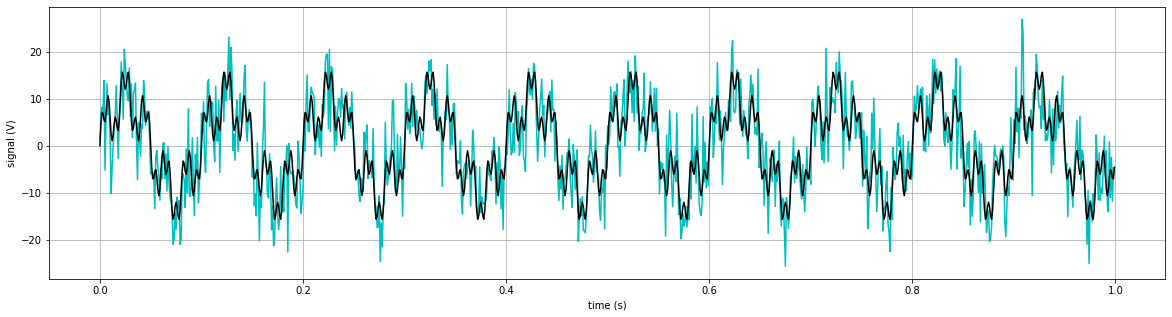

In [4]:
plt.figure(figsize=(20,5)) # Define plot size.
plt.grid(True) # Enable plot grid.
ax = plt.gca() # Get current axes.
plt.plot(t, ns, color='c') # Set color for noisy signal to cyan.
plt.plot(t, y, color='k') # Set color for the actual signal to black.
plt.xlabel("time (s)") # Set x label as time.
plt.ylabel("signal (V)") # Set y label as signal.
plt.show() # Show the plot.

Apply Fast Fourier Transfrom.

In [5]:
n = len(y) # Get the number of samples for y.
y_fft = np.fft.fft(y, n) # Fast Fourier Transform using y and number of samples.
freq = (1. / (dt * n)) * np.arange(n) # Frequencies.
psd = y_fft * np.conj(y_fft) / n # Power Spectral Density.
L = np.arange( 1., np.floor(n/2), dtype='int') # Round off to lowest whole number for y-axis representation.

Plot the Fast Fourier Transform in frequency domain.

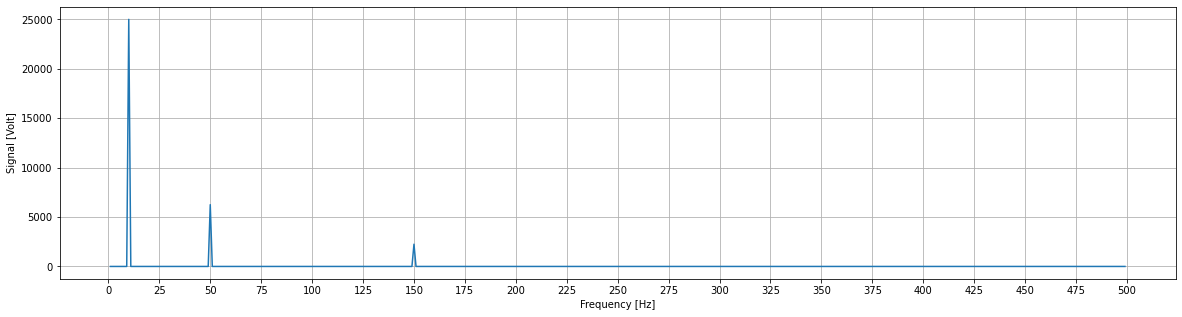

In [6]:
plt.figure(figsize=(20,5)) # Define plot size.
plt.grid(True) # Enable plot grid.
ax = plt.gca() # Get current axes.
ax.set_xticks(np.arange(0, len(freq) + 1, 25)) # Set the x ticks to increase the displayed x values in between intervals. 
plt.plot(freq[L], psd[L]) # Plot the frequencies as x and PSD as y.
plt.xlabel("Frequency [Hz]") # Set x label to frequency.
plt.ylabel("Signal [Volt]") # Set y label to signal.
plt.show() # Show the plot.

### Analyzing the B1 values using Fast Fourier Transform.

Filter the B1 files from the dataset using glob with regex.

In [7]:
import glob
steps = sorted(glob.glob('./dataset/G1_Hd1_FTDS_SP1_050418_162003_1_0_*[0-9]_B1.csv'), key=len) # Get steps with wildcard 0-9 for B1 using regex.
print("Number of files: {}".format(len(steps))) # Count the number of files.

Number of files: 196


Create a for loop to do analysis for each step.

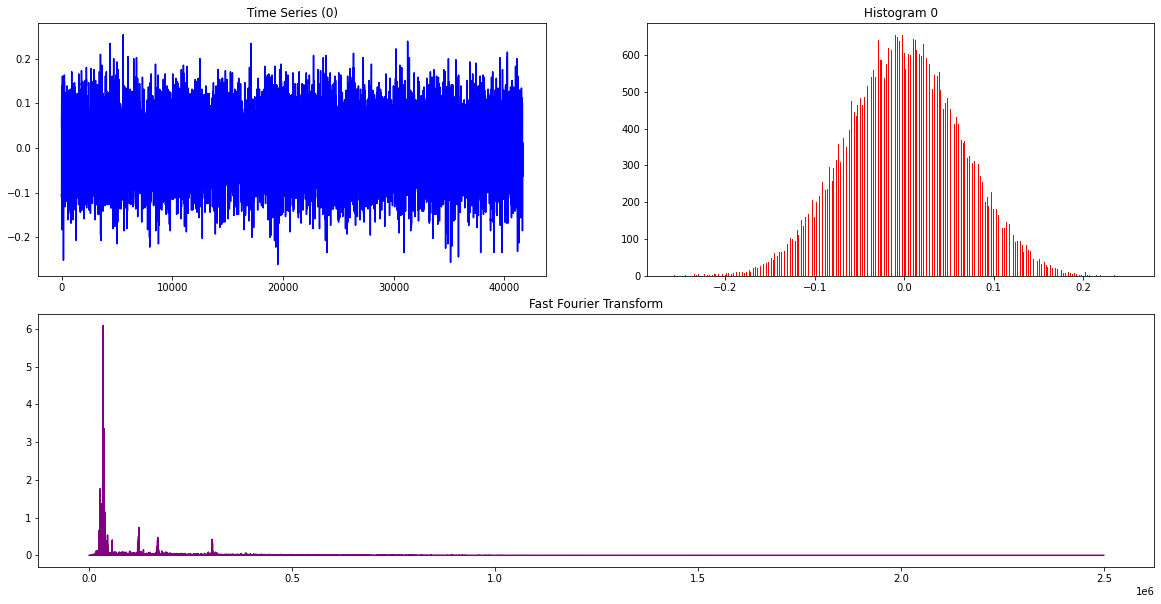

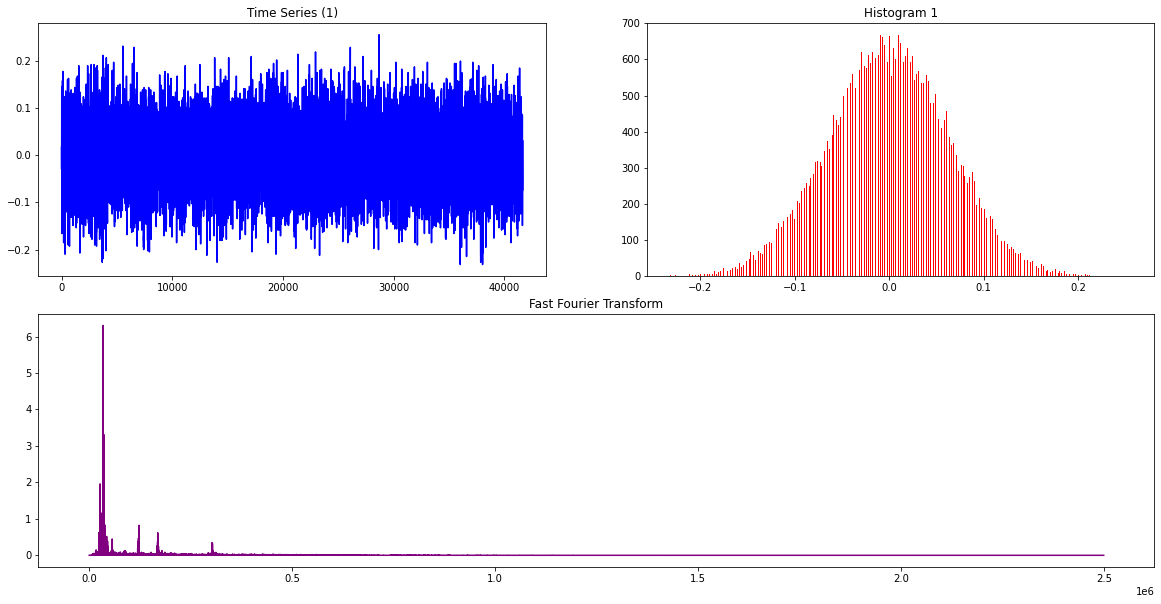

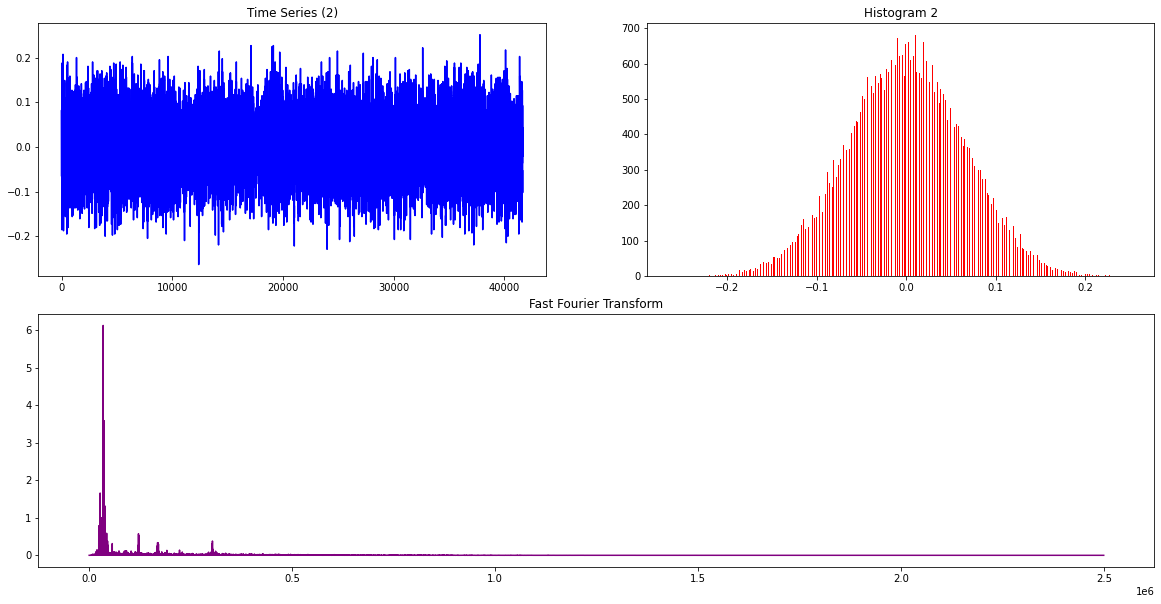

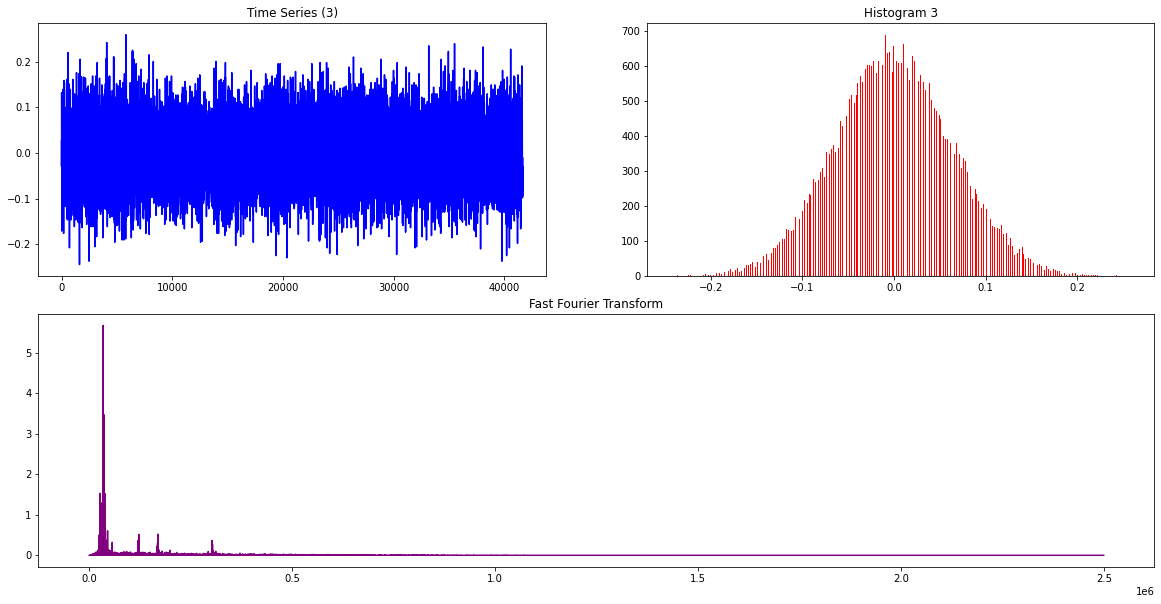

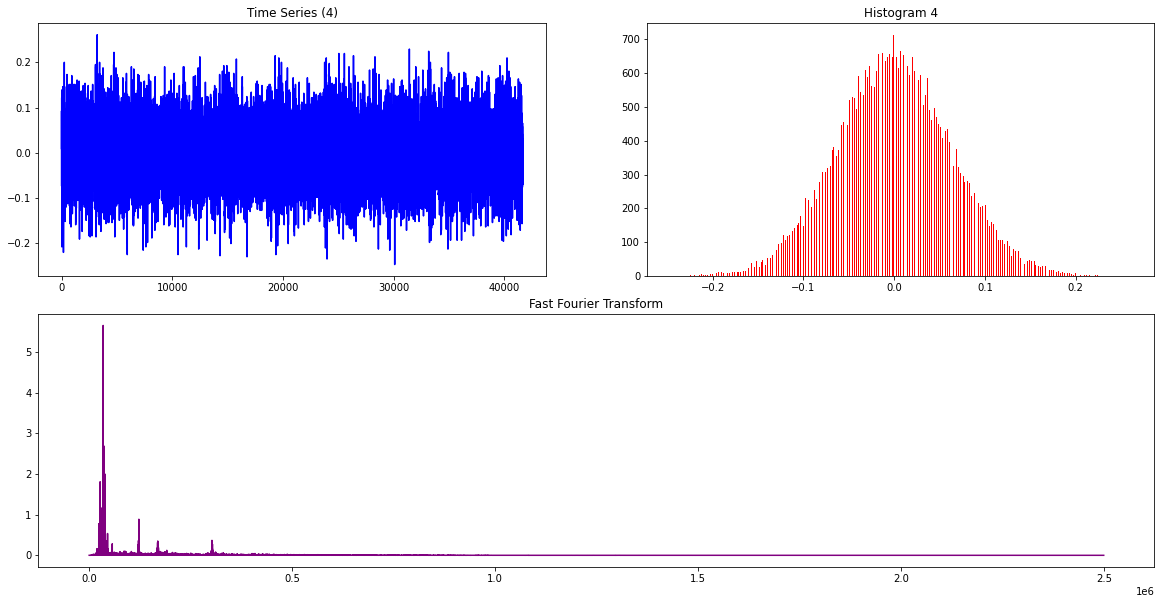

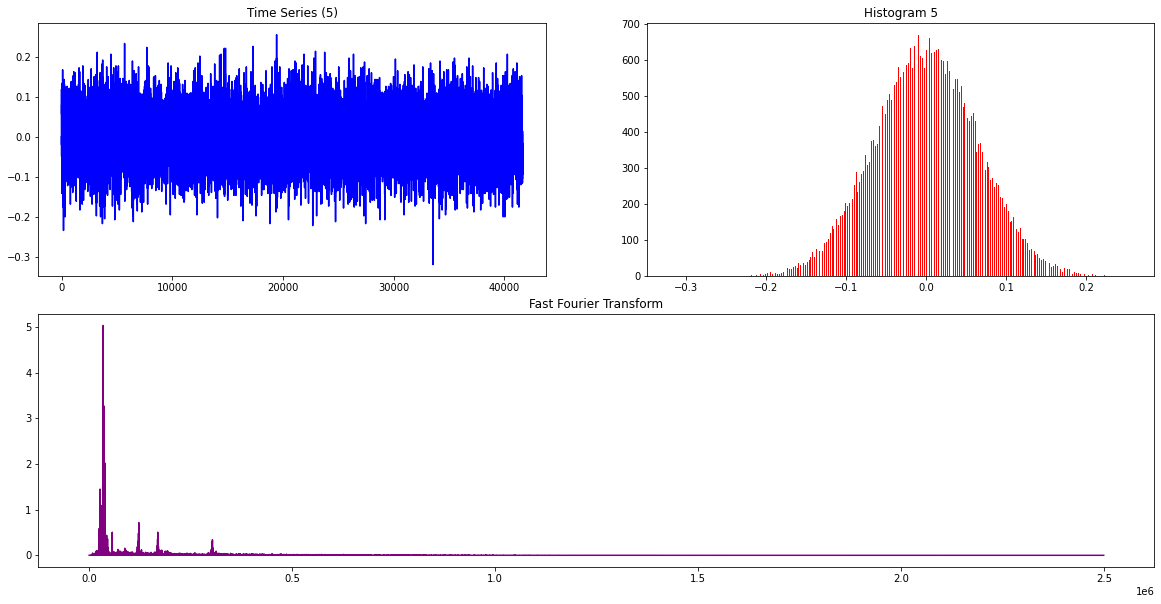

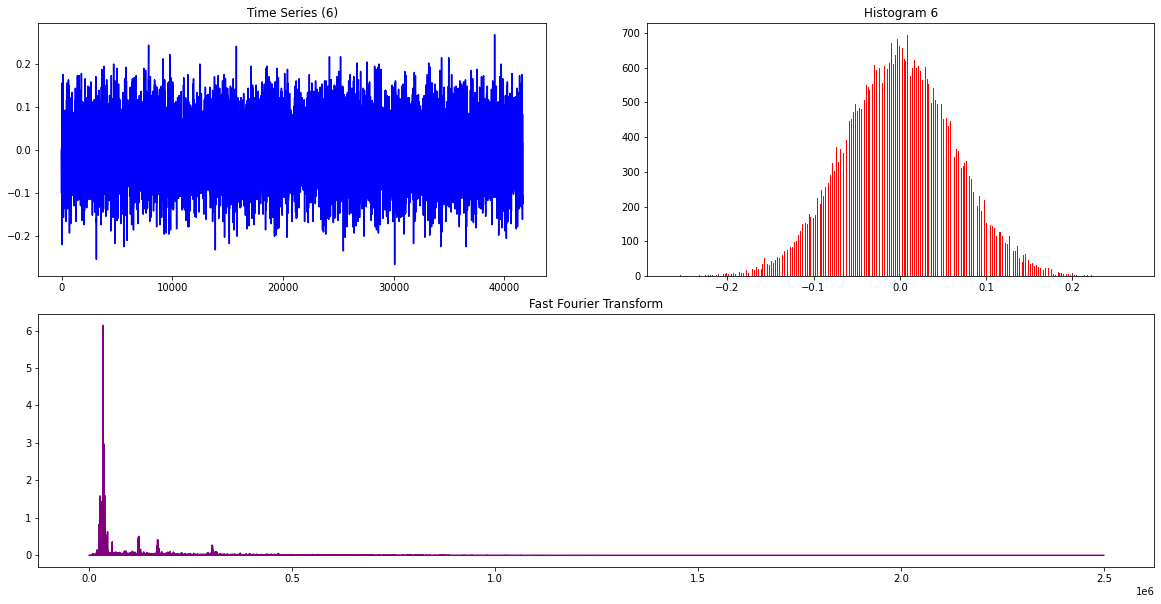

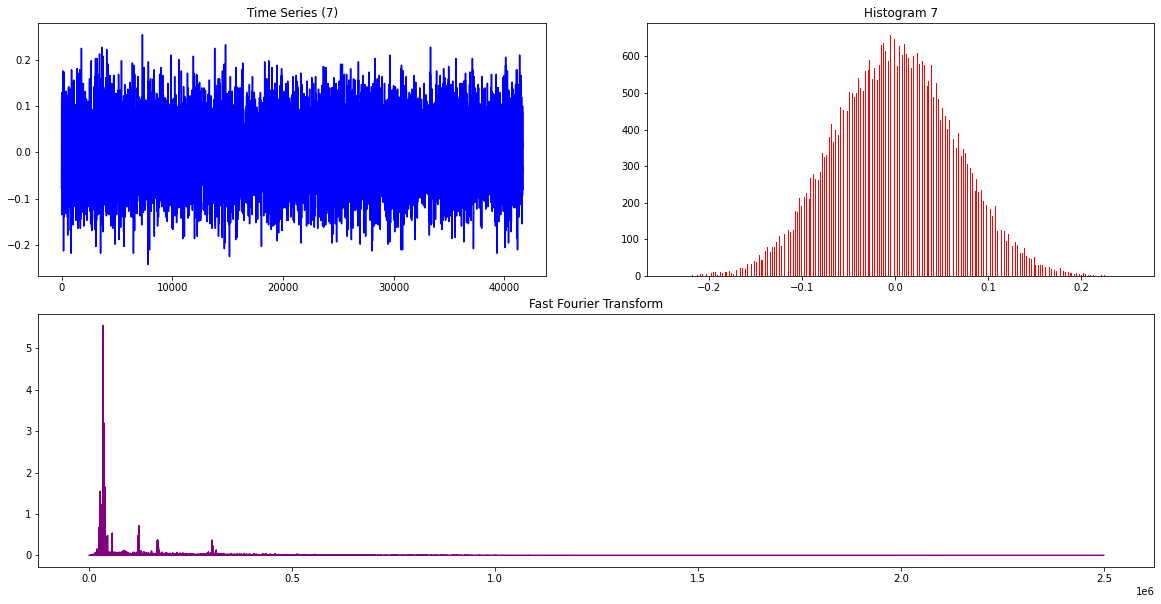

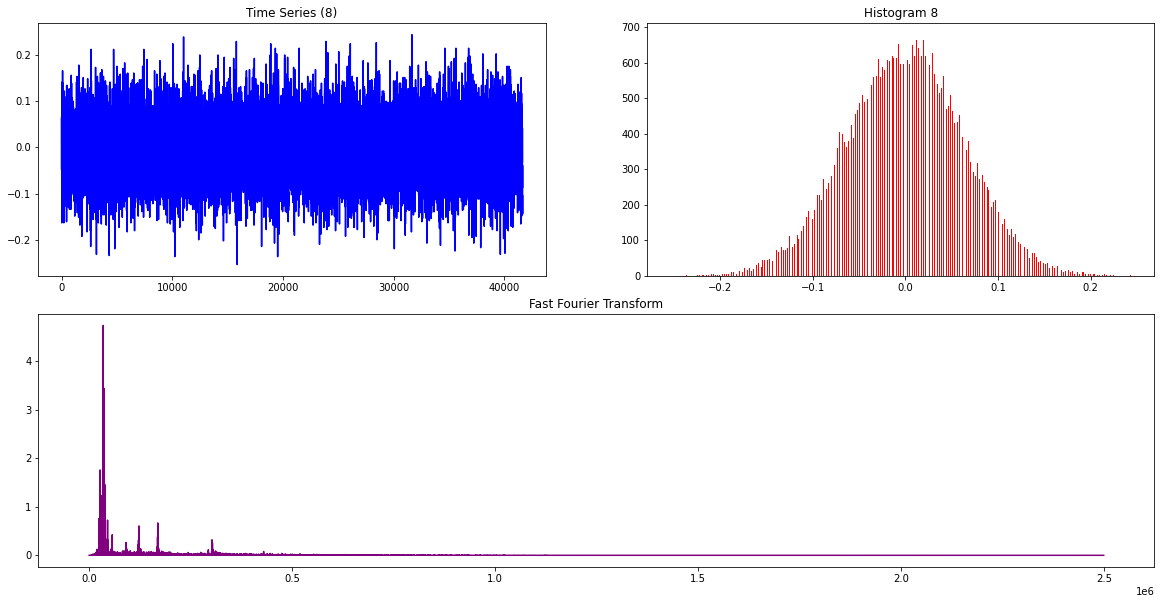

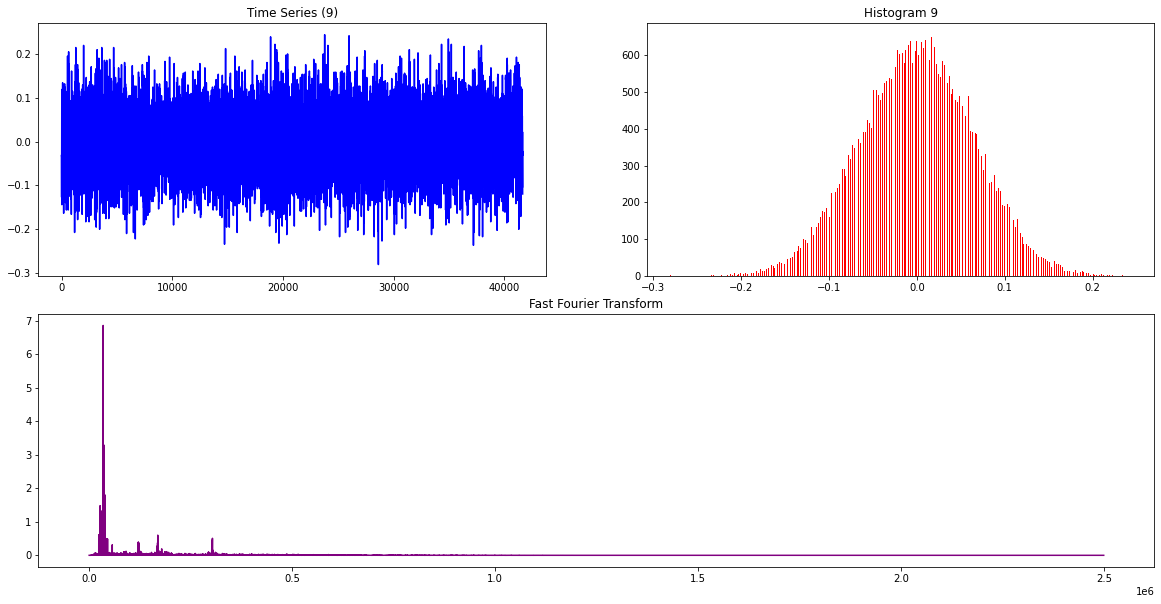

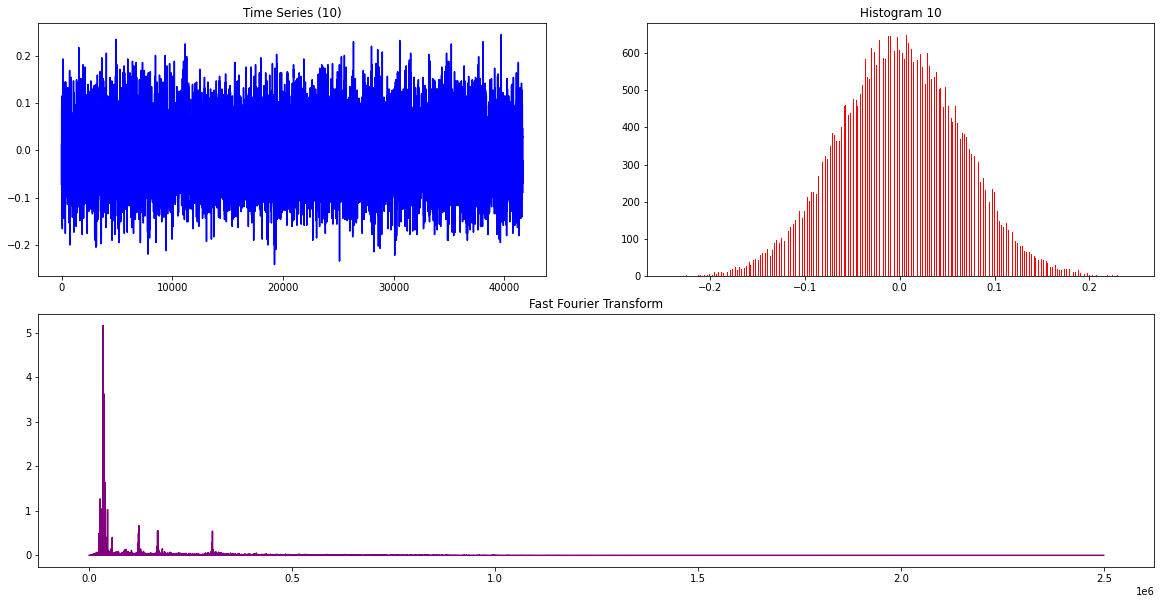

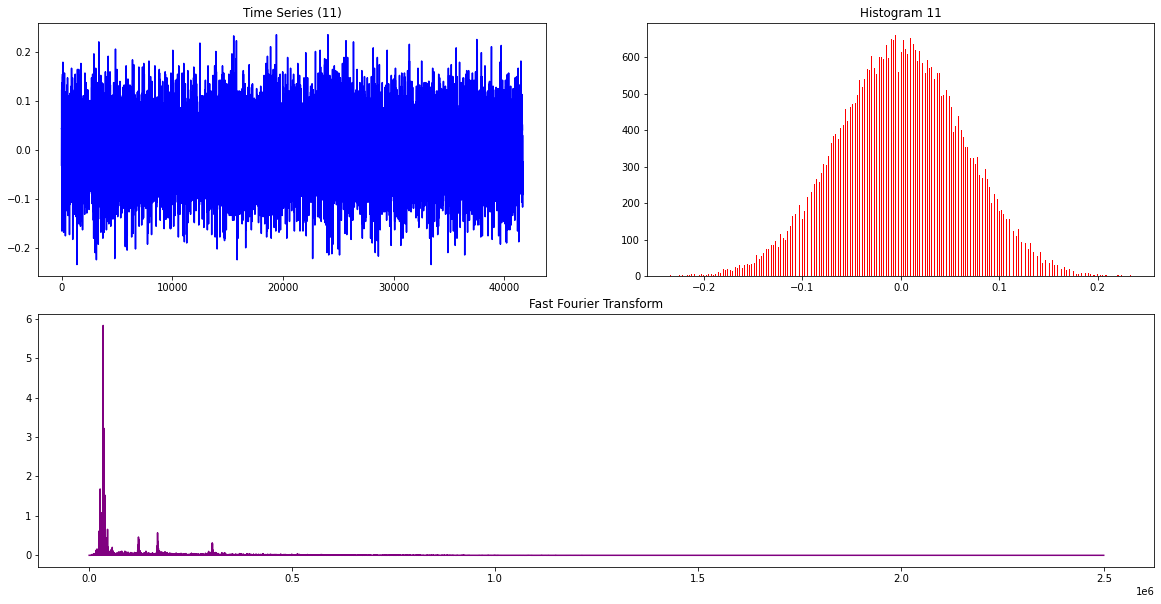

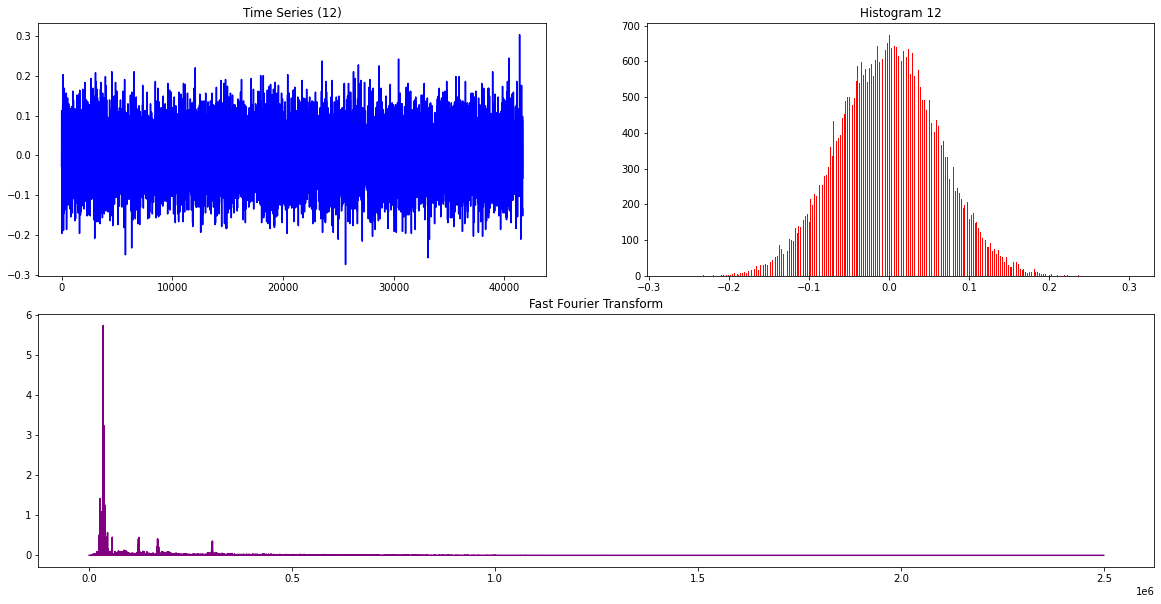

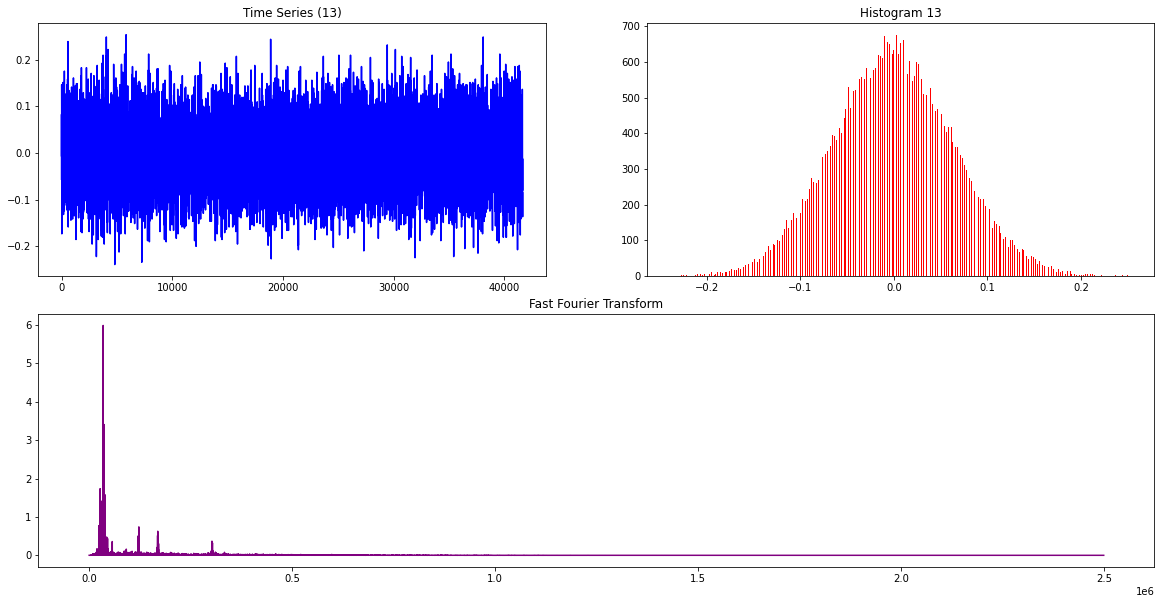

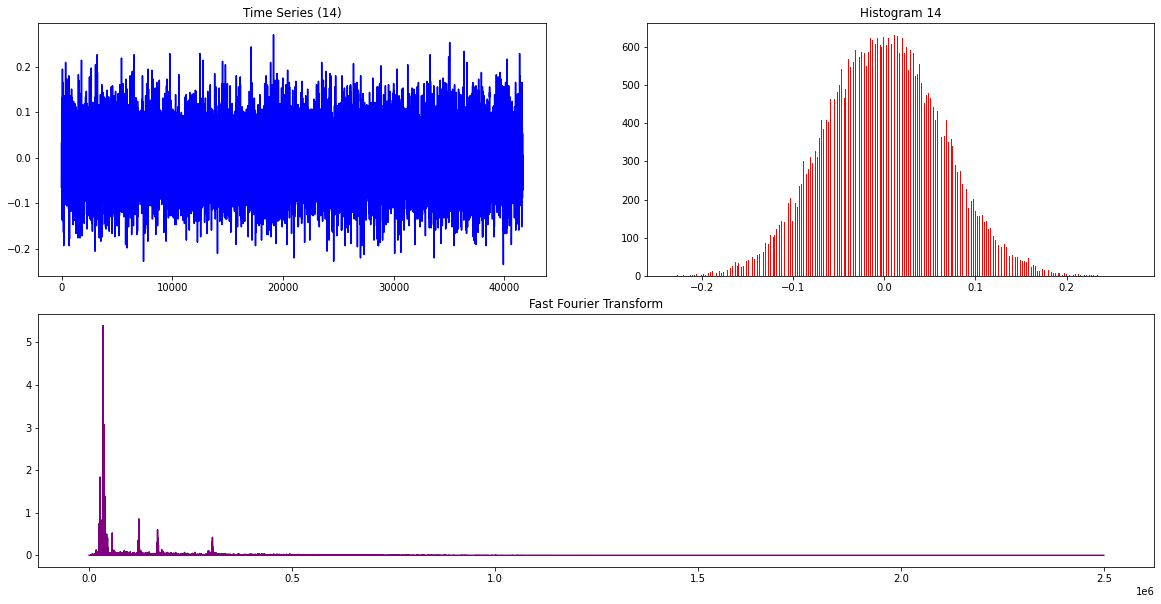

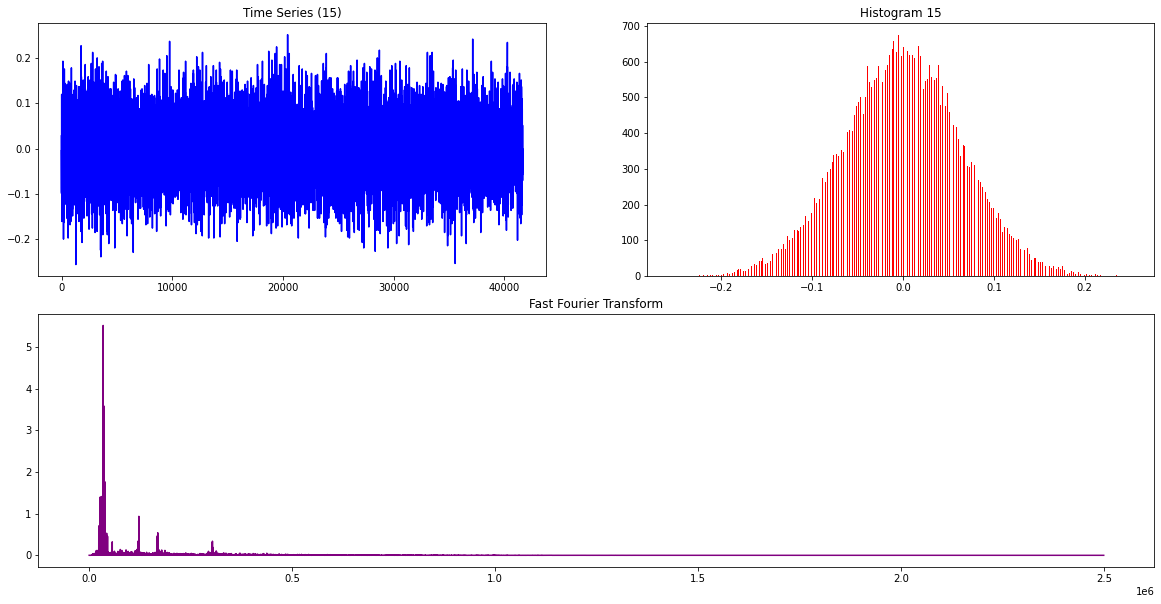

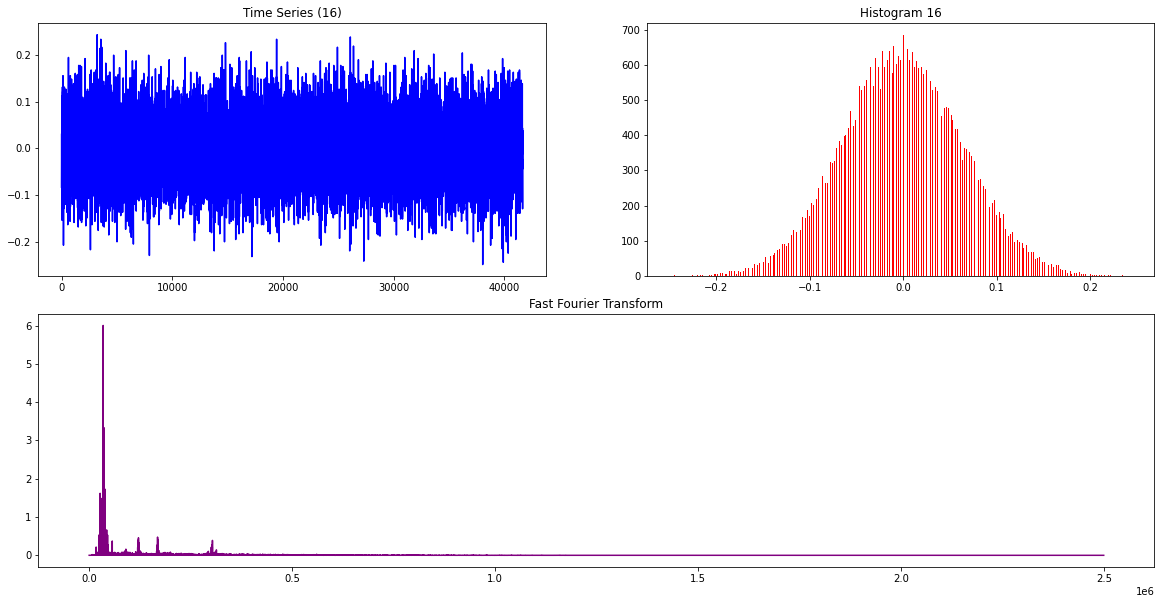

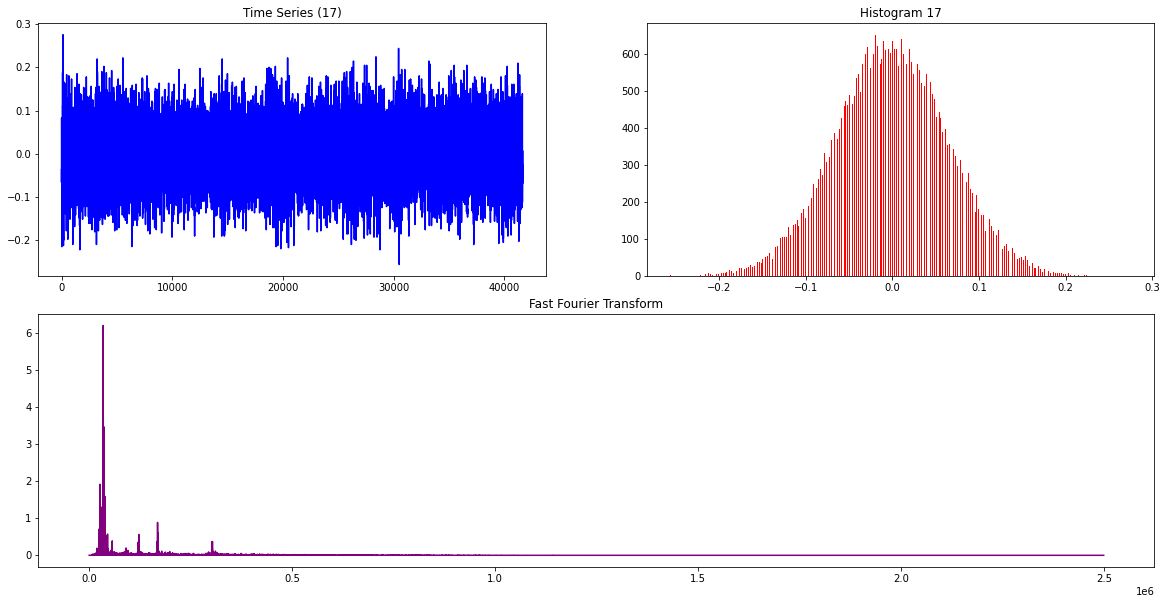

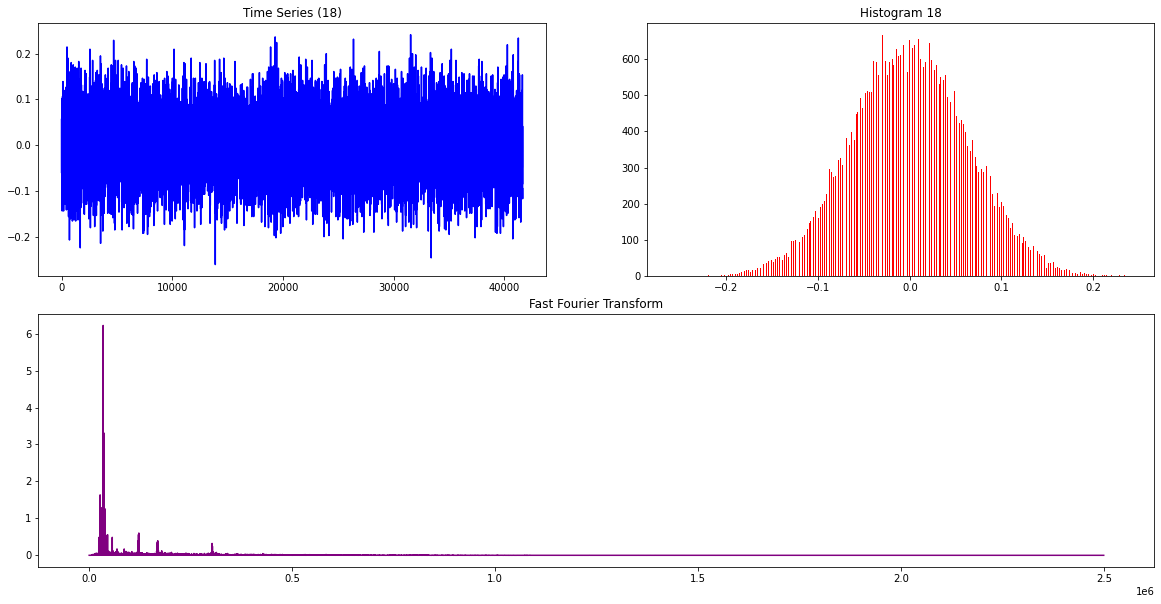

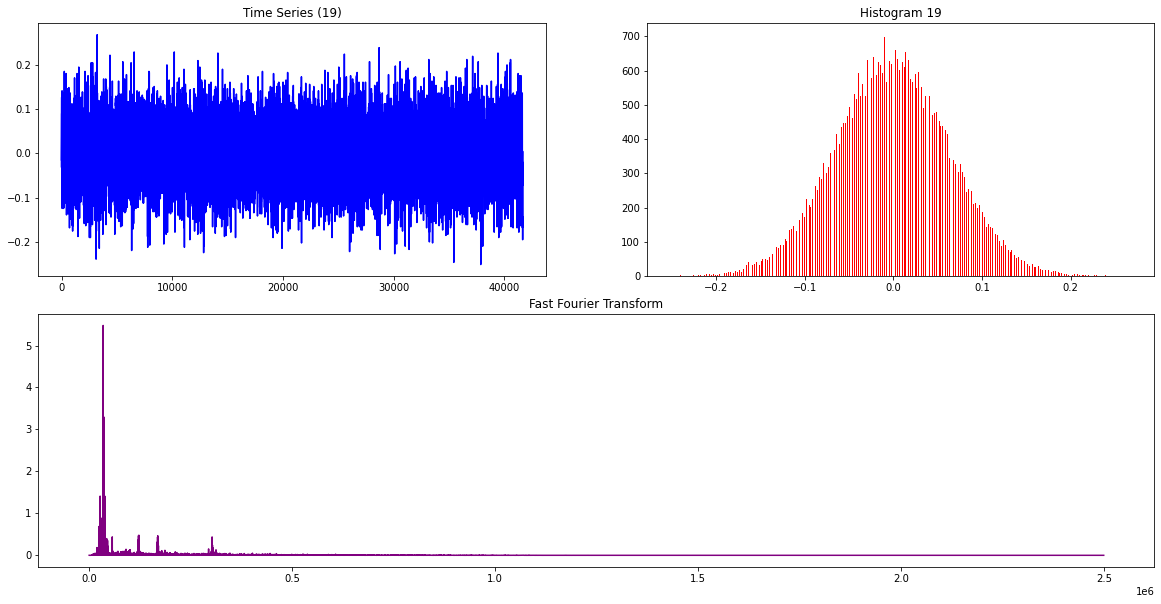

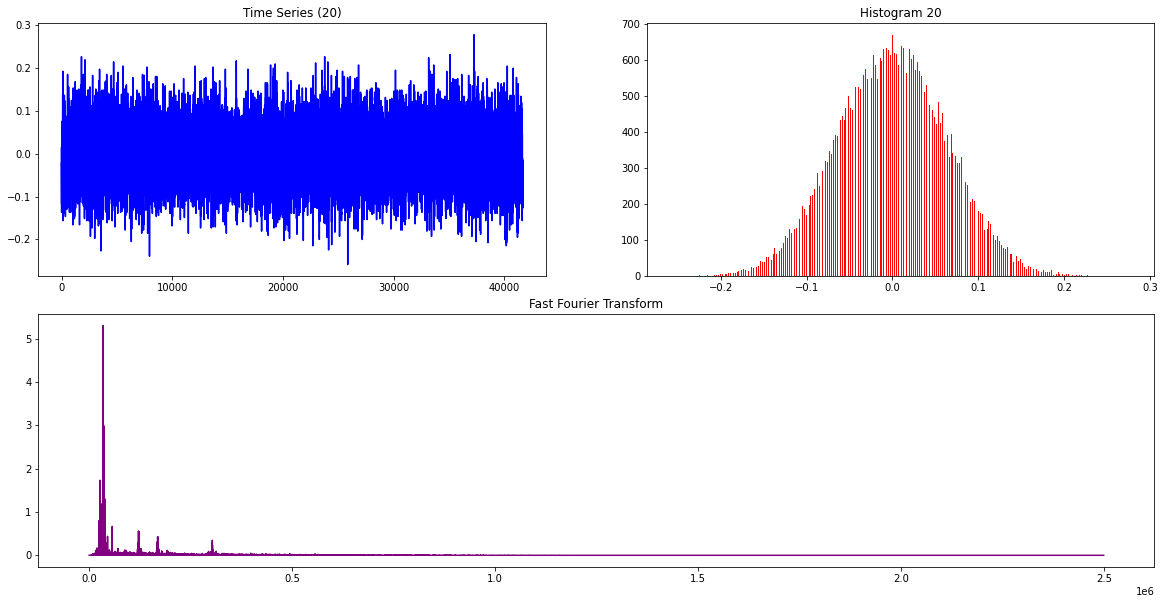

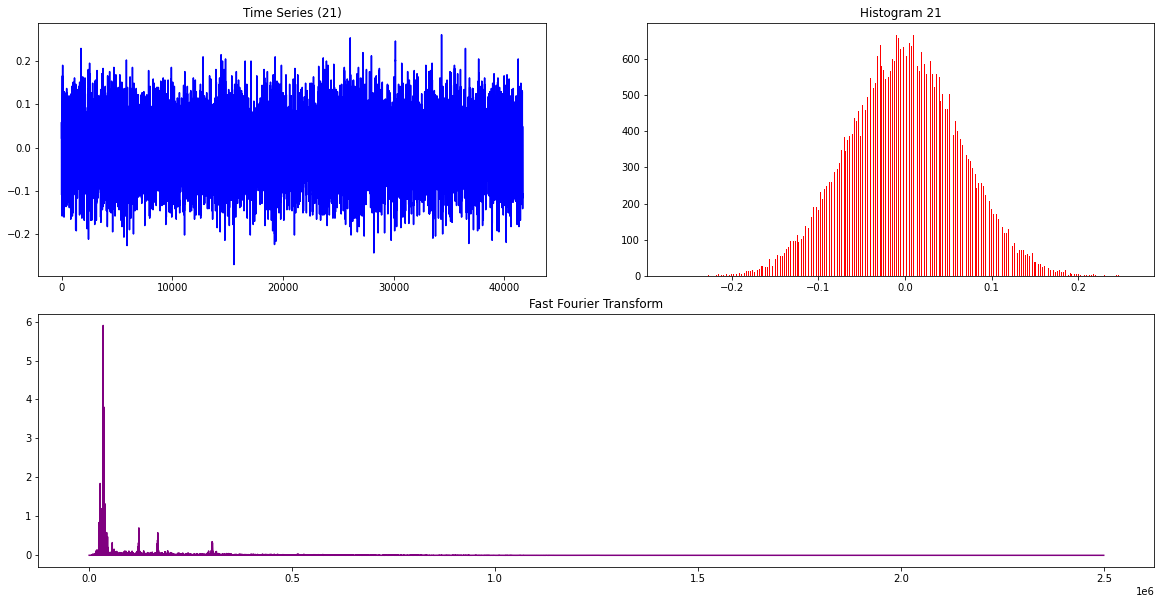

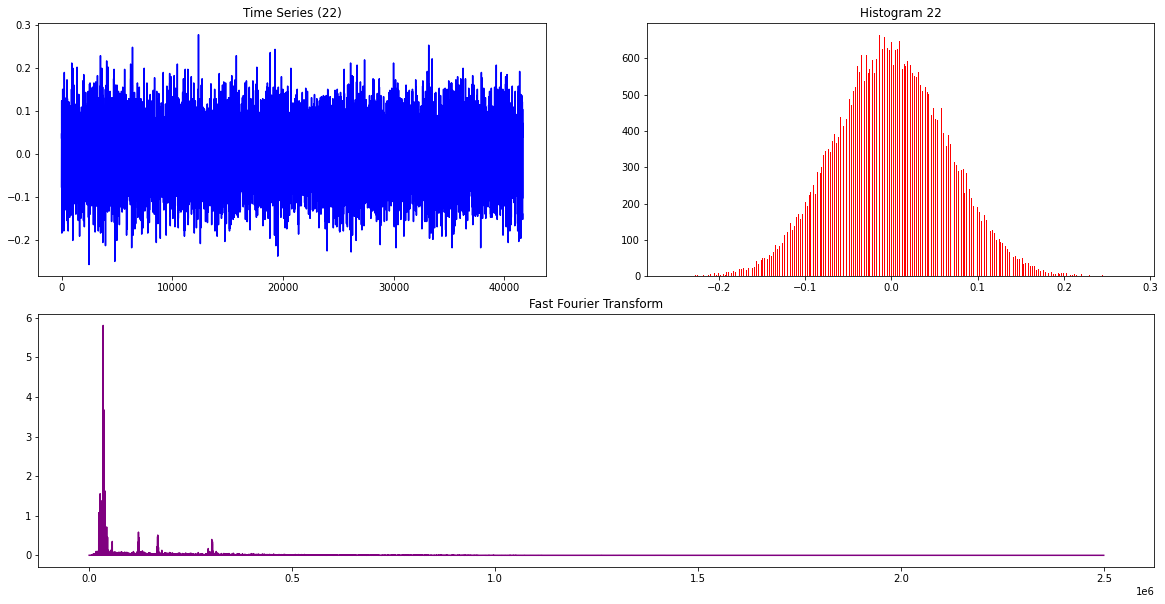

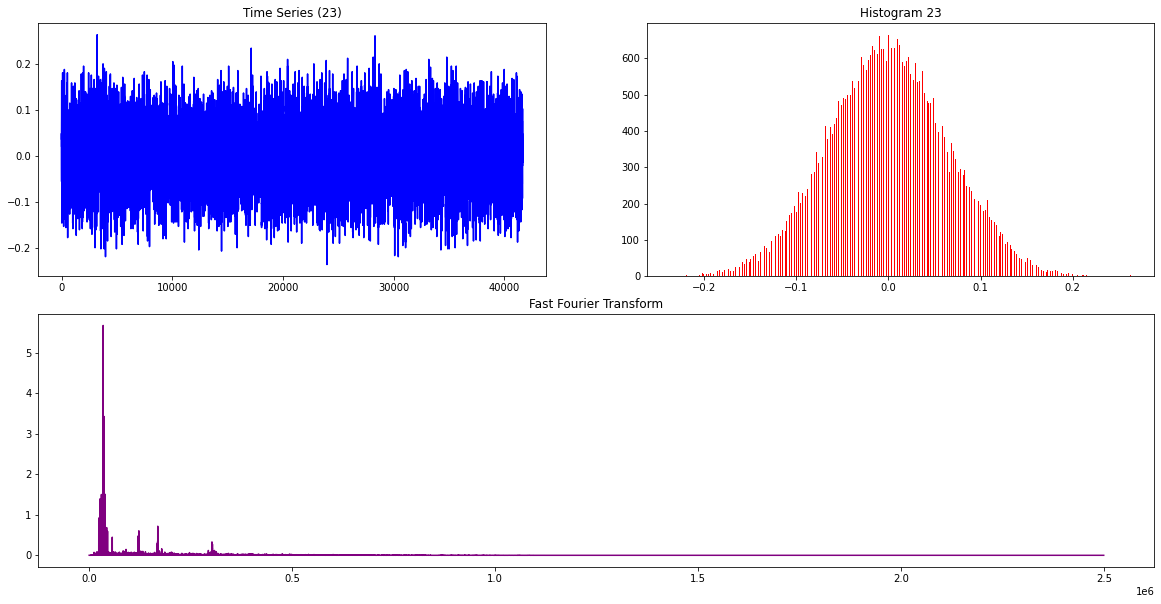

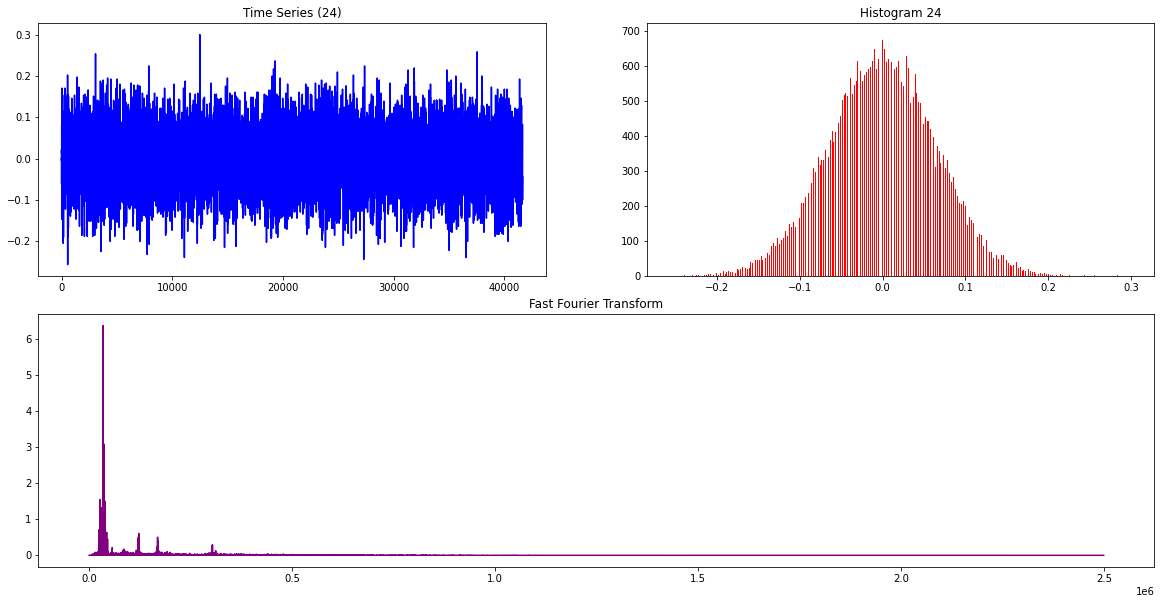

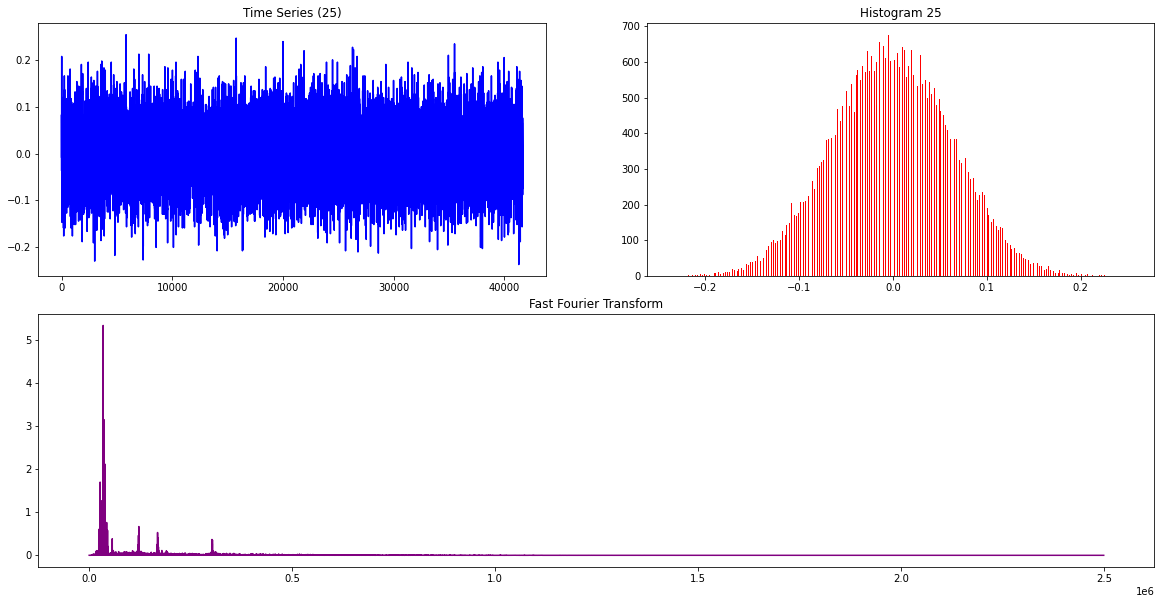

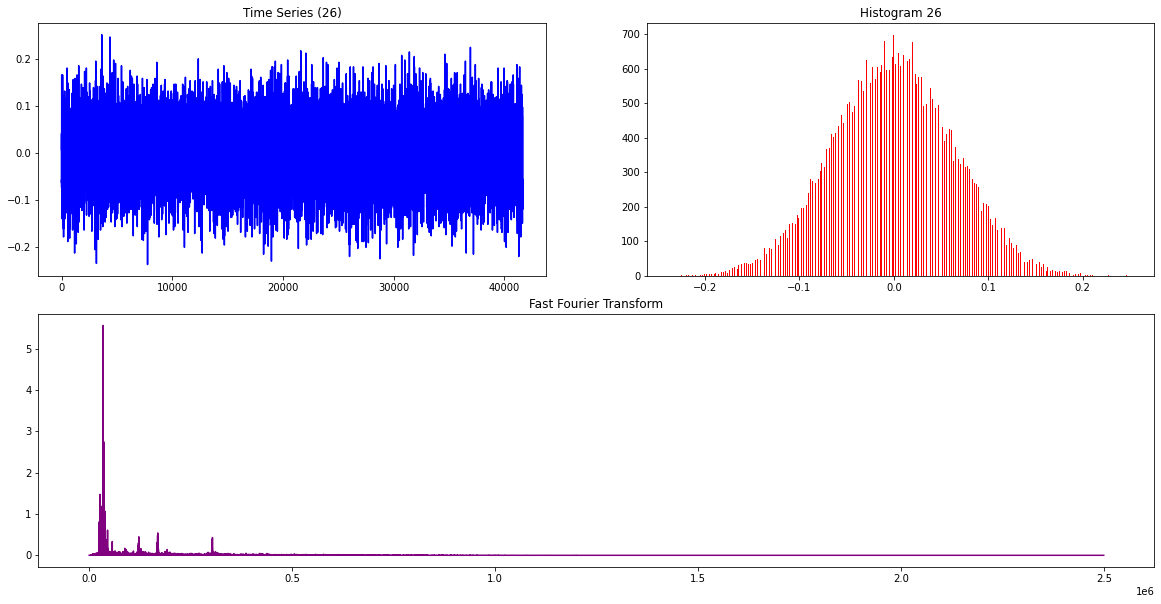

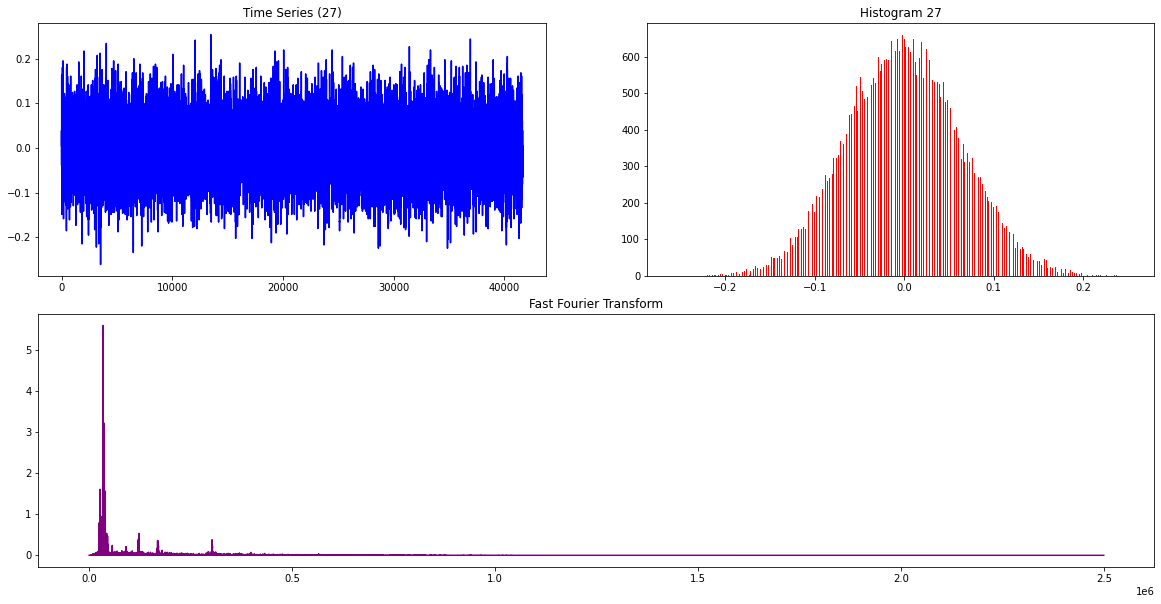

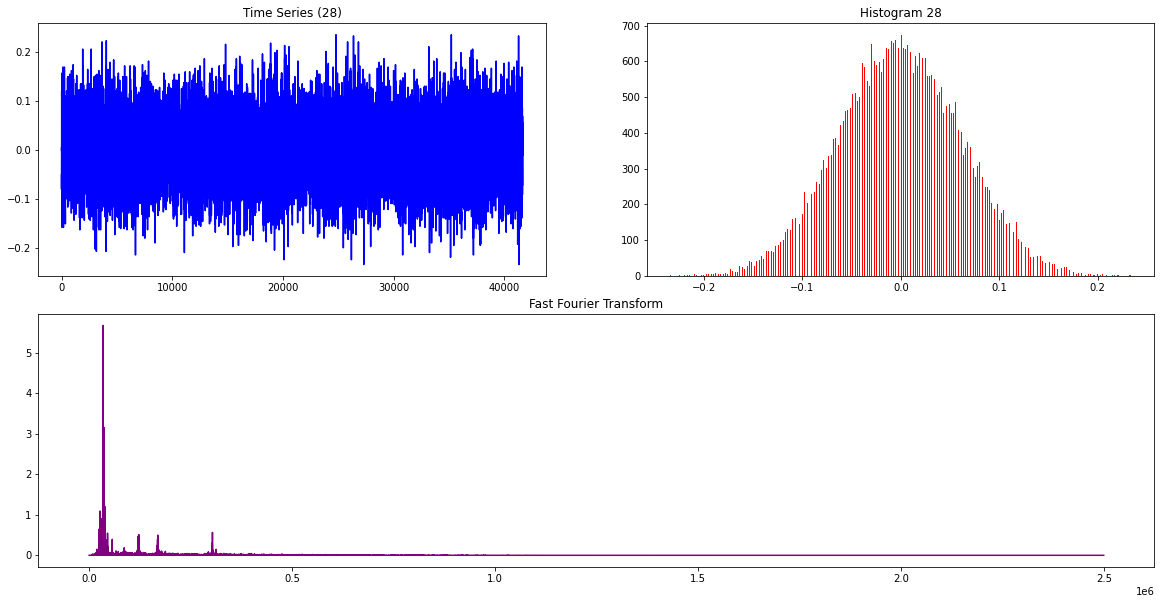

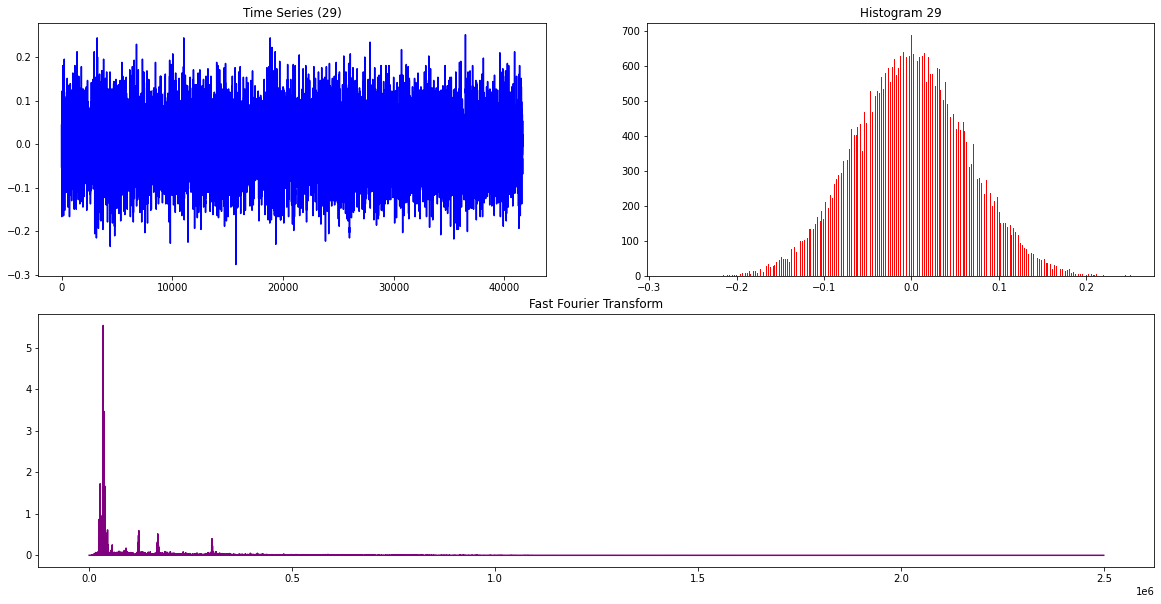

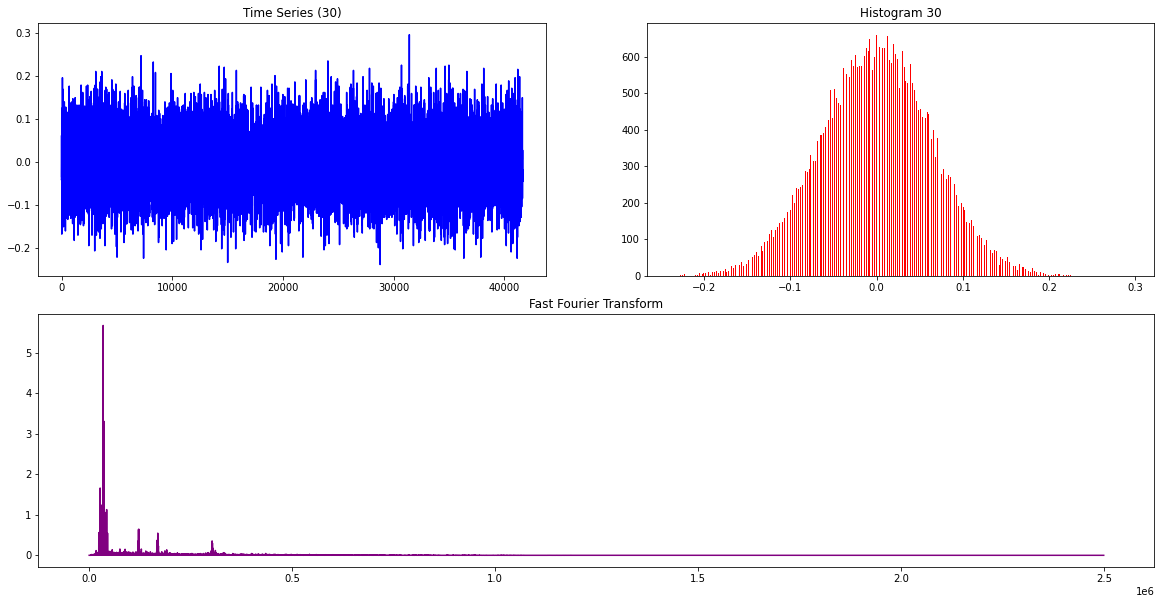

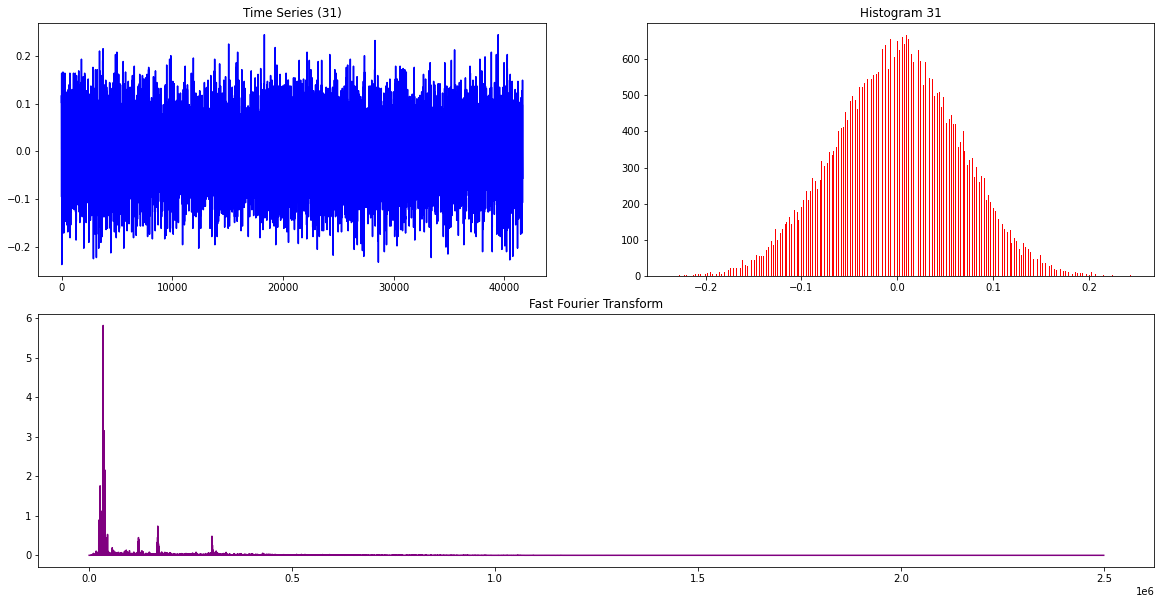

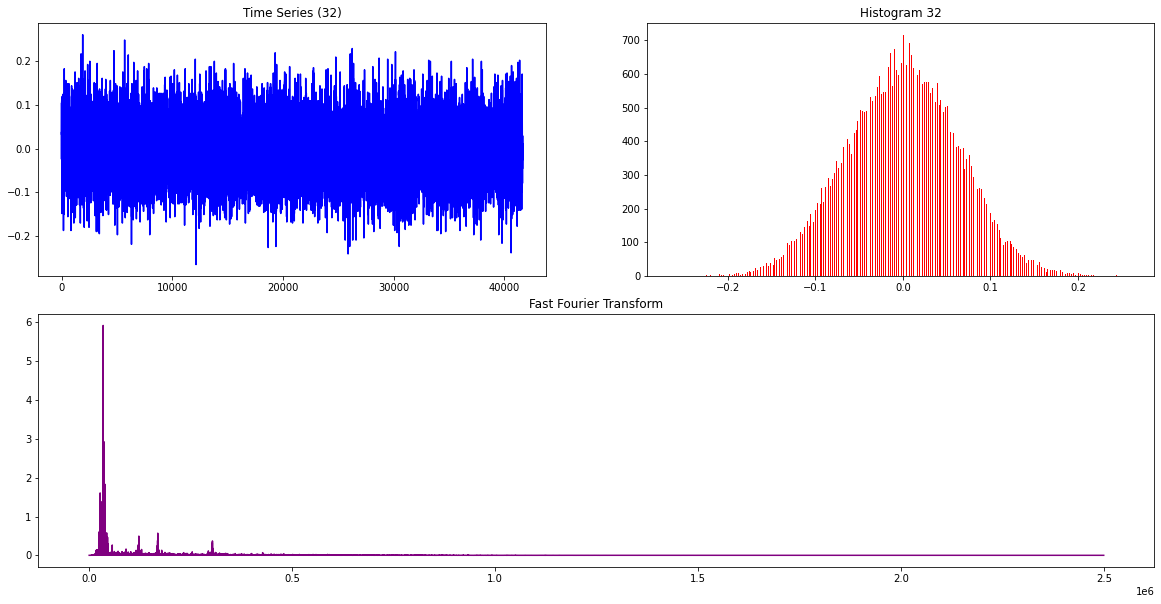

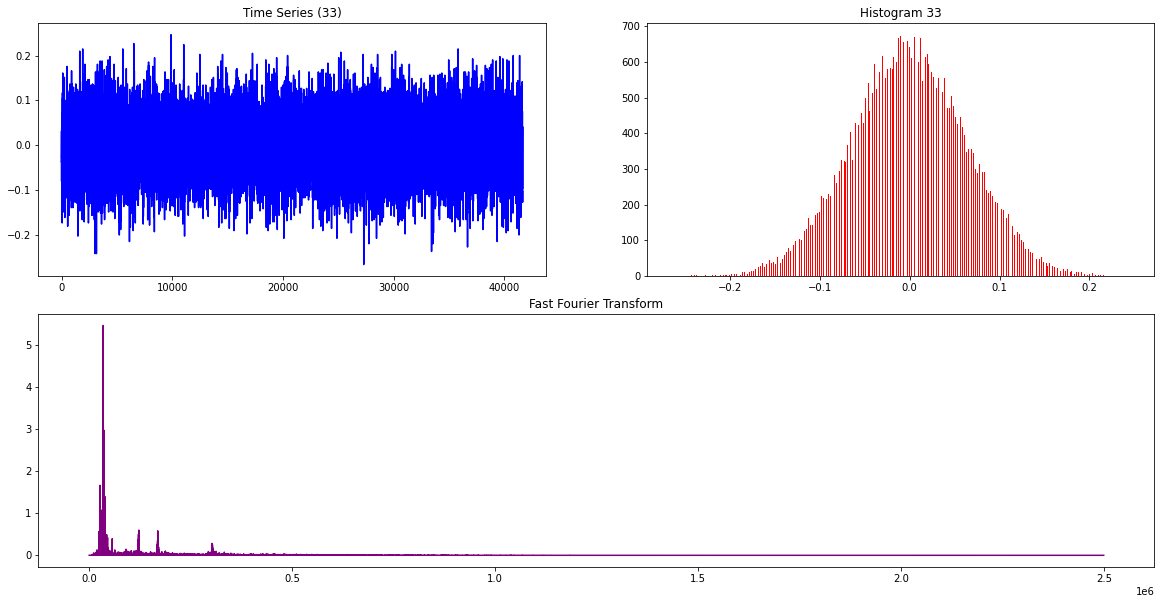

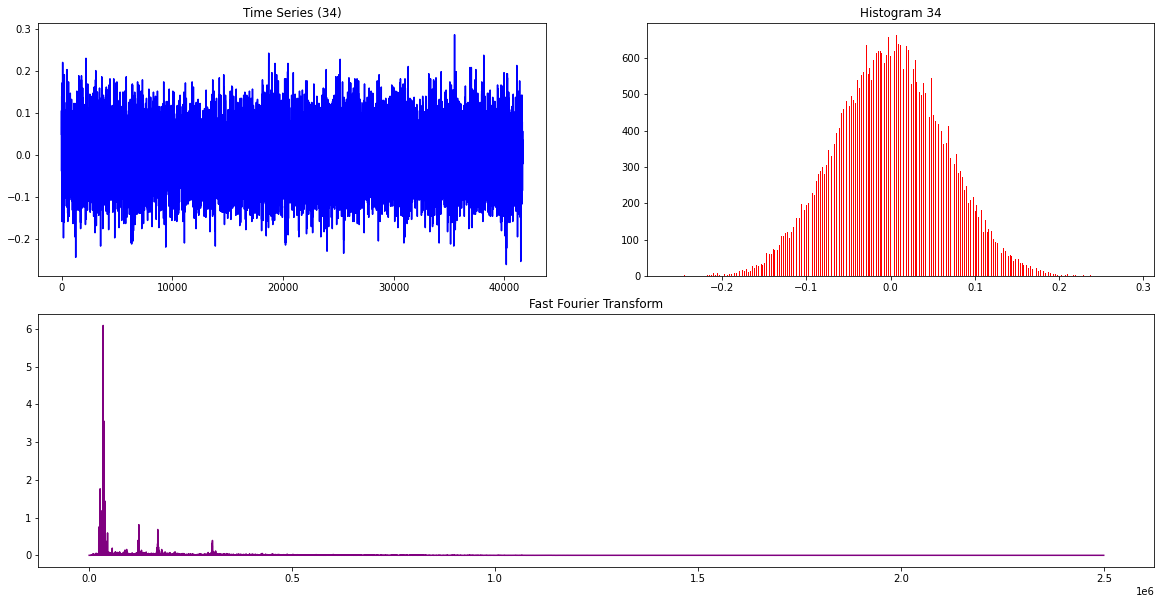

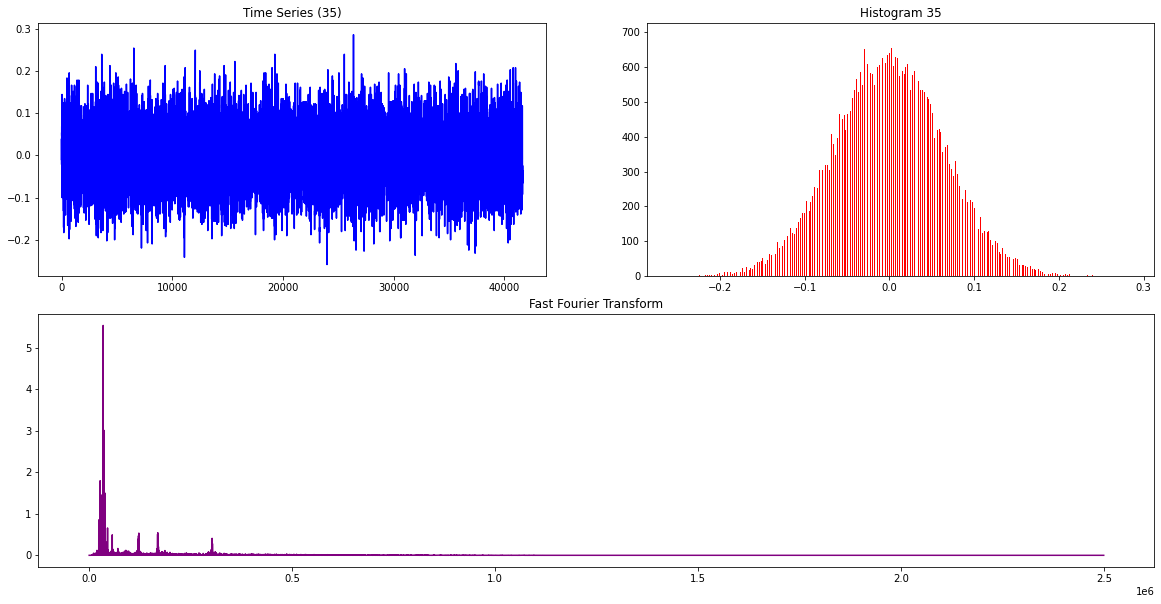

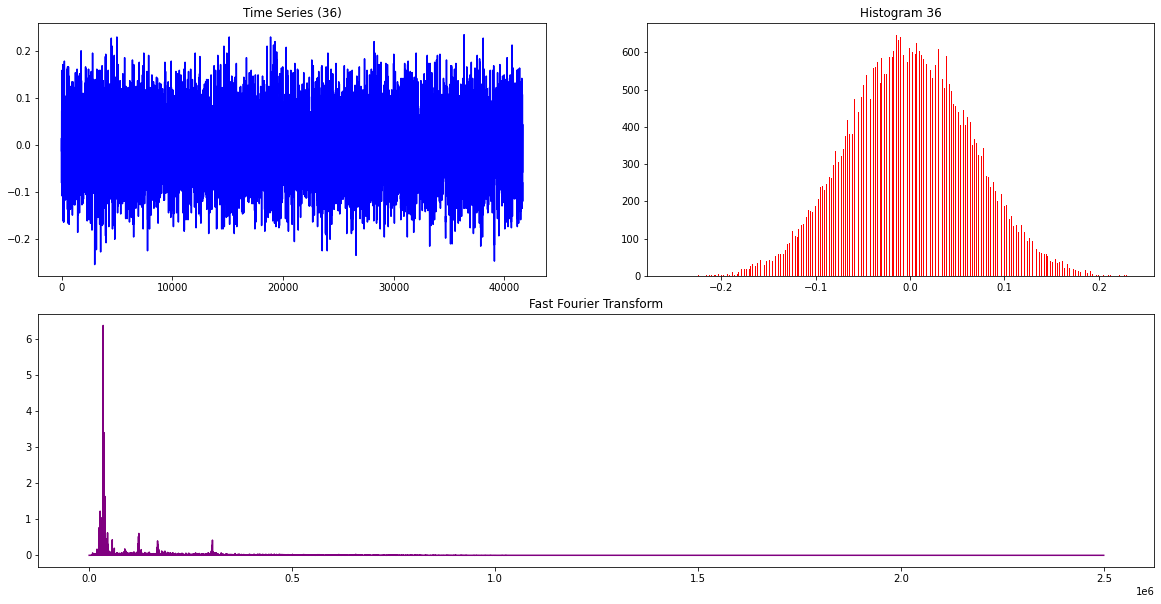

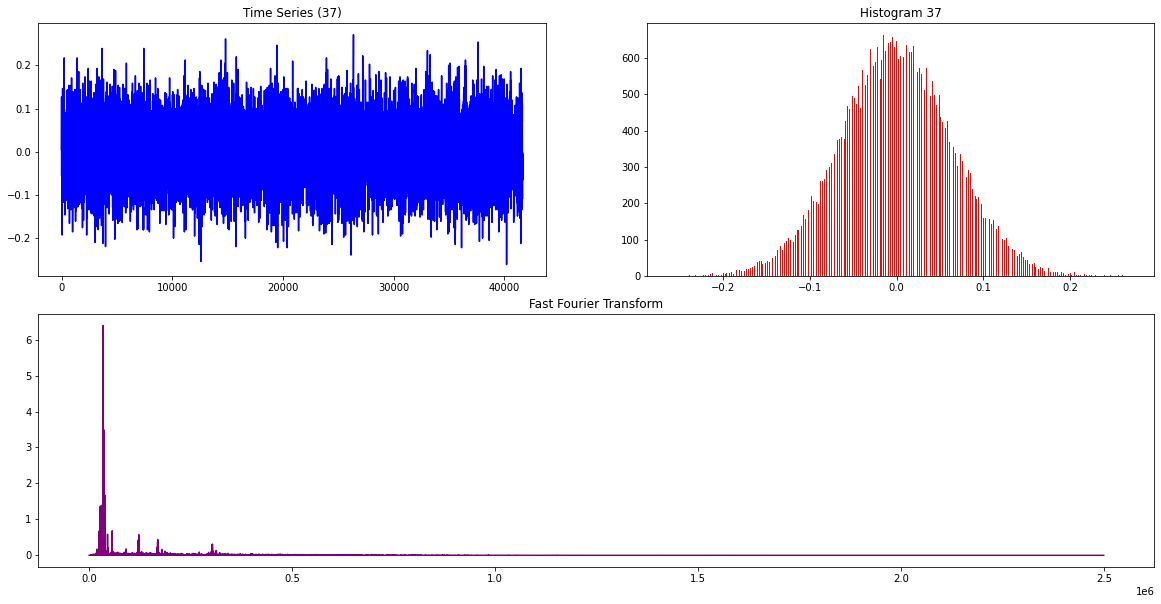

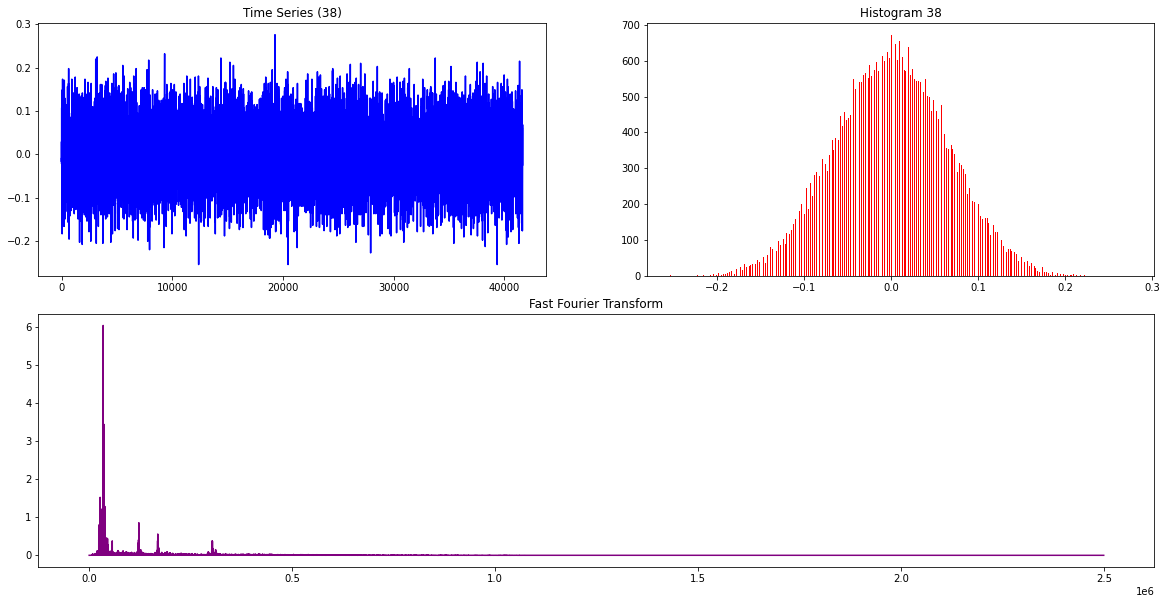

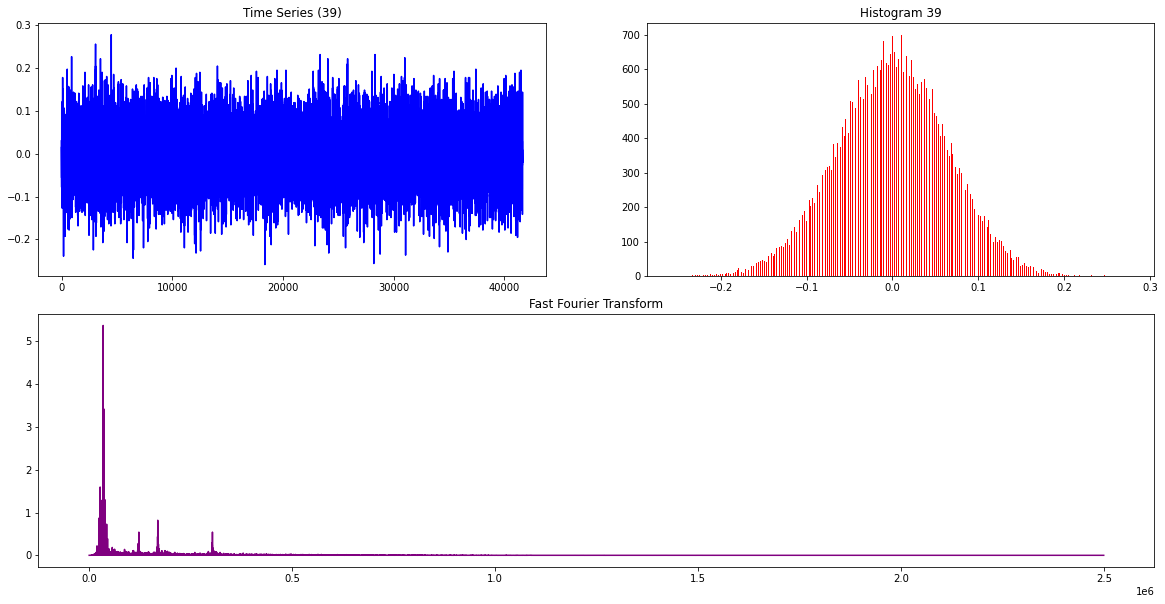

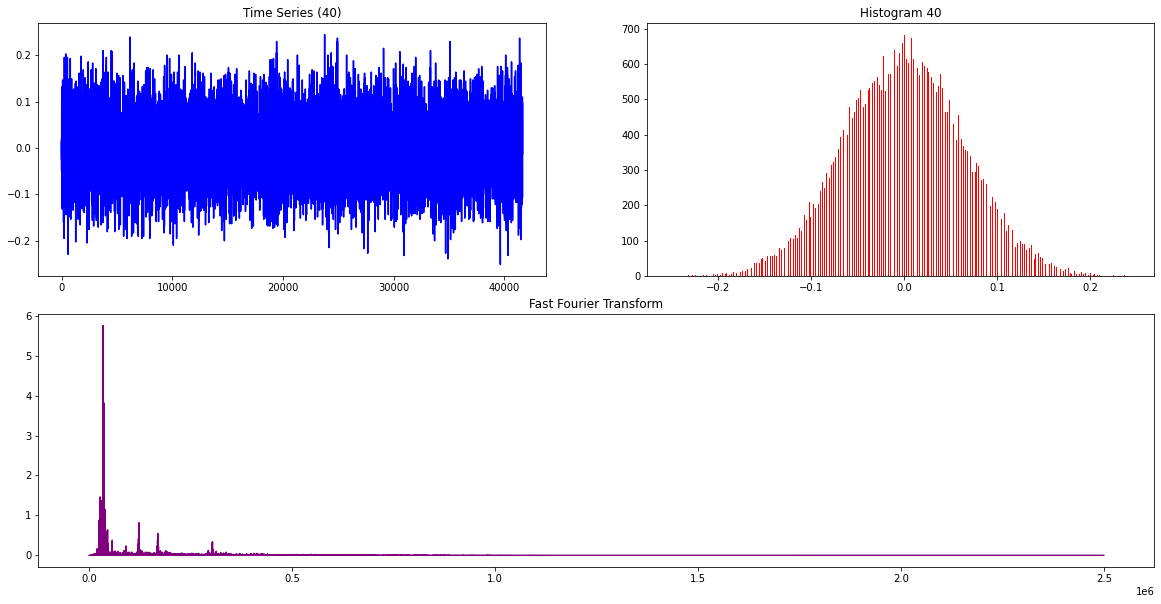

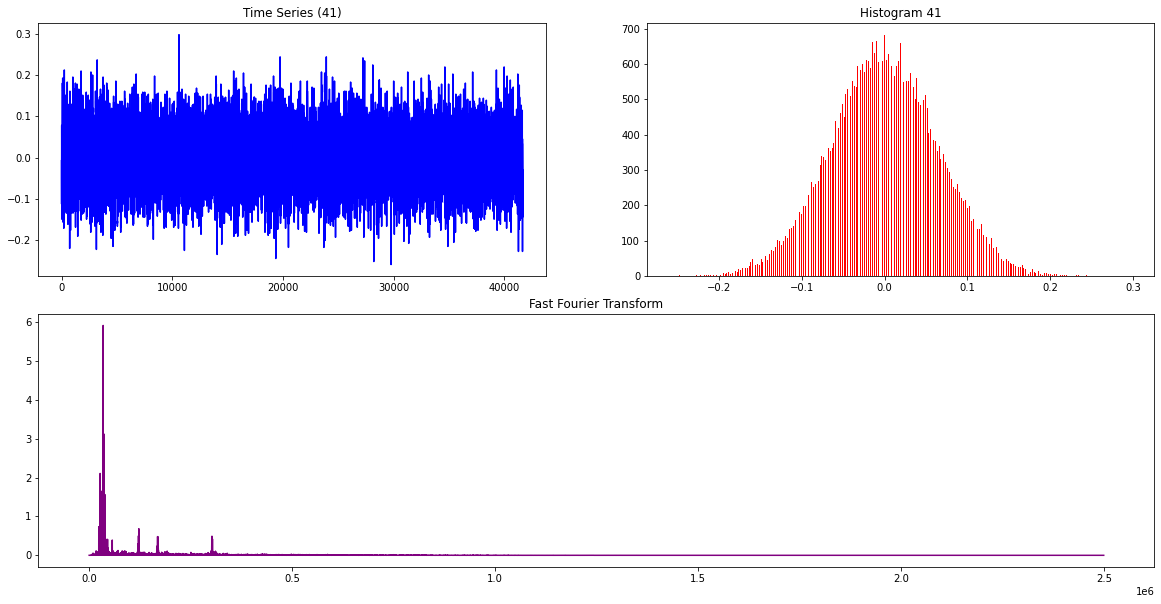

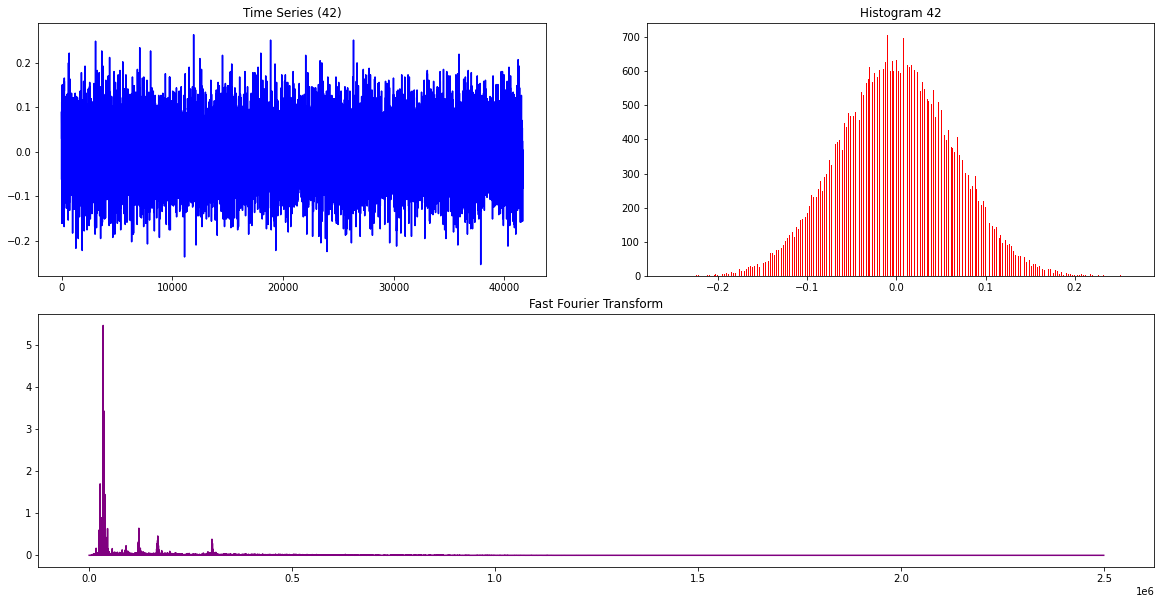

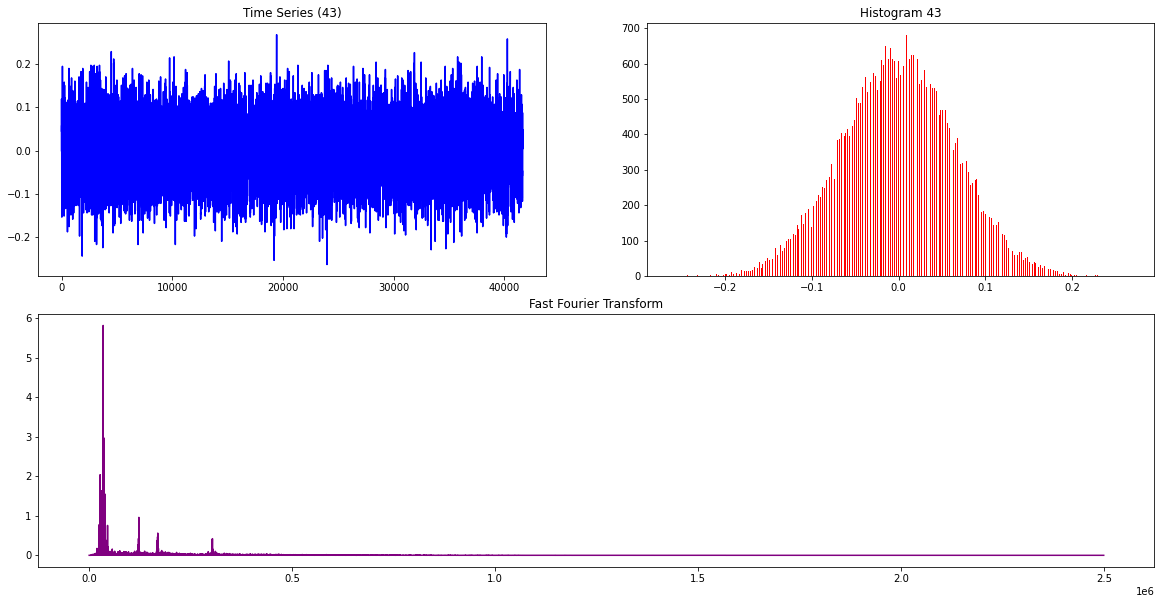

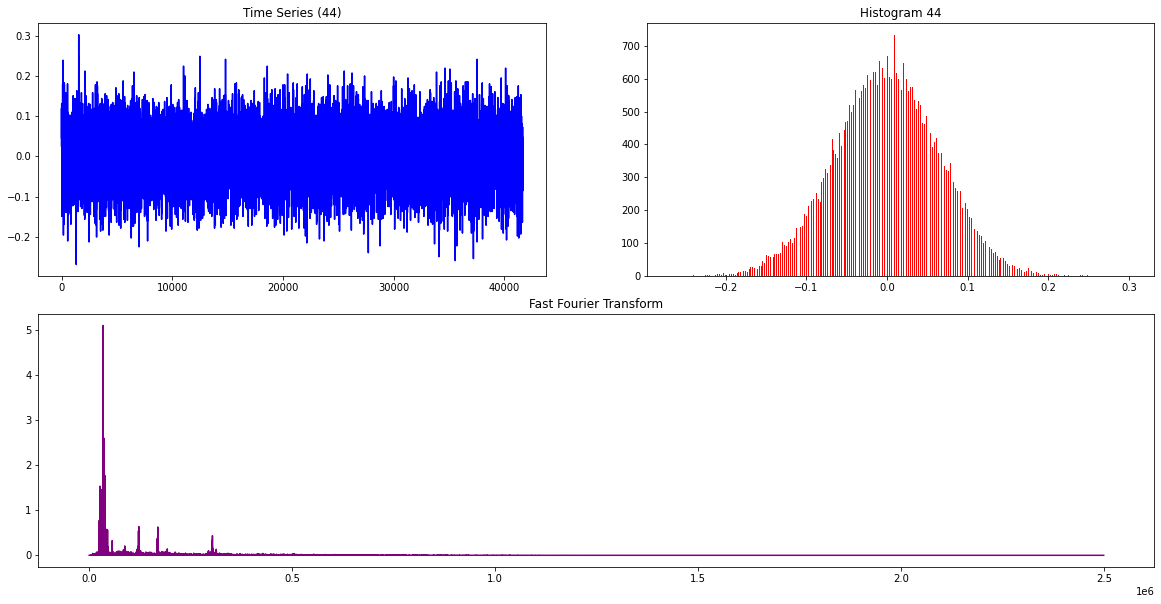

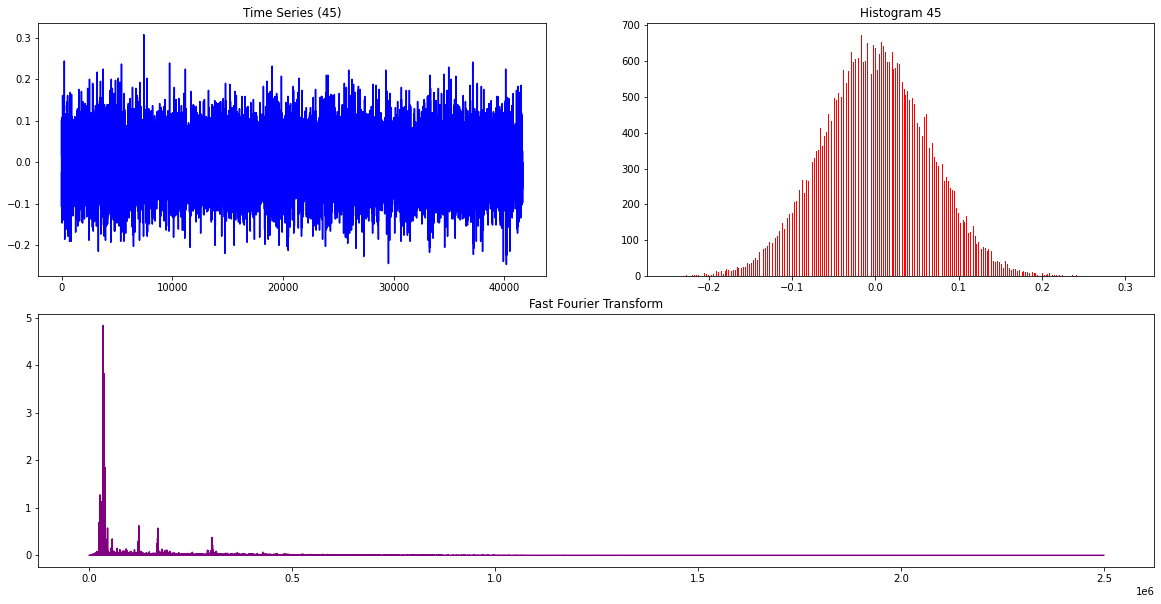

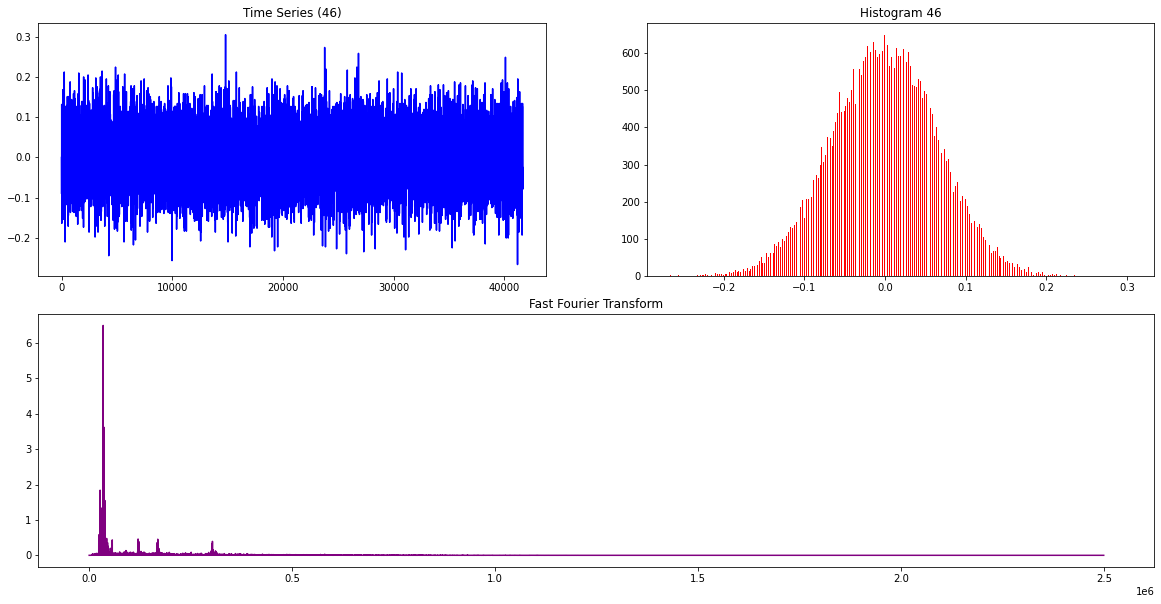

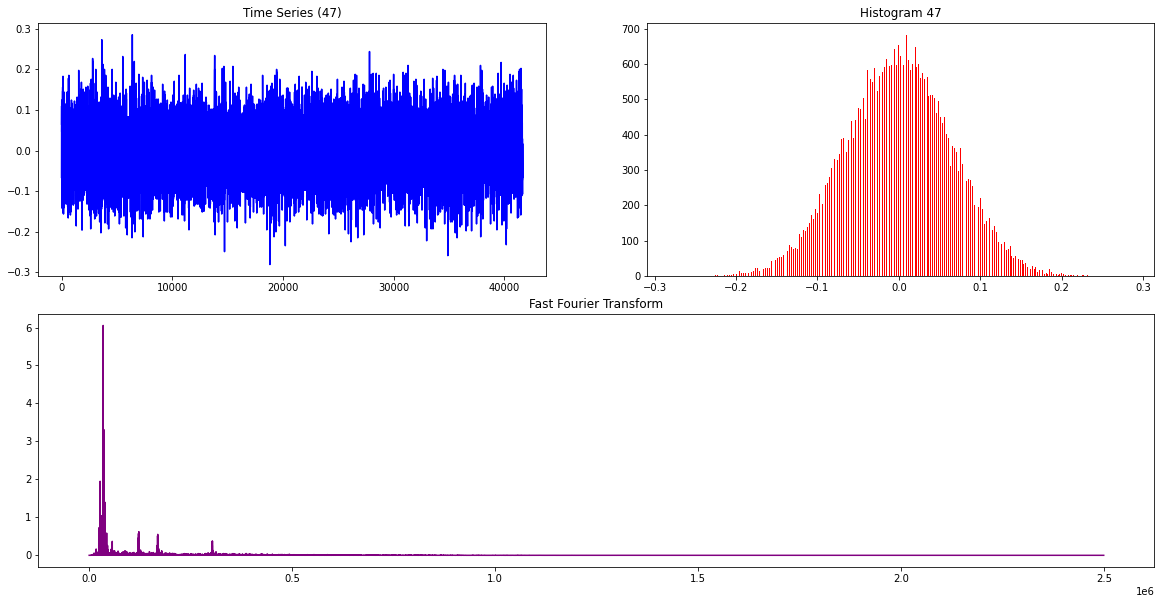

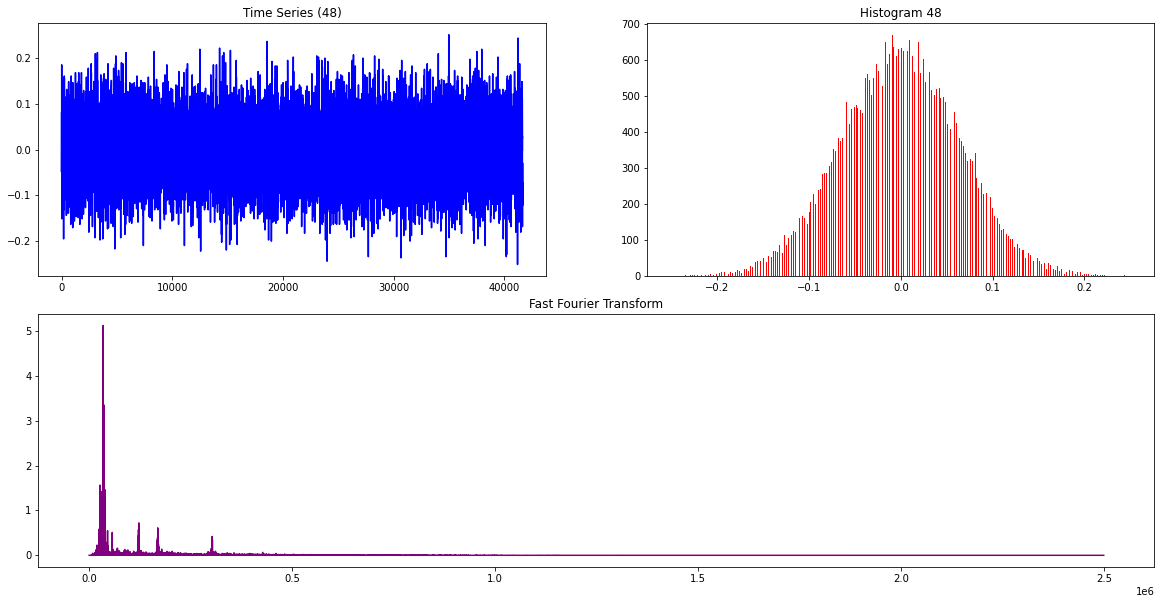

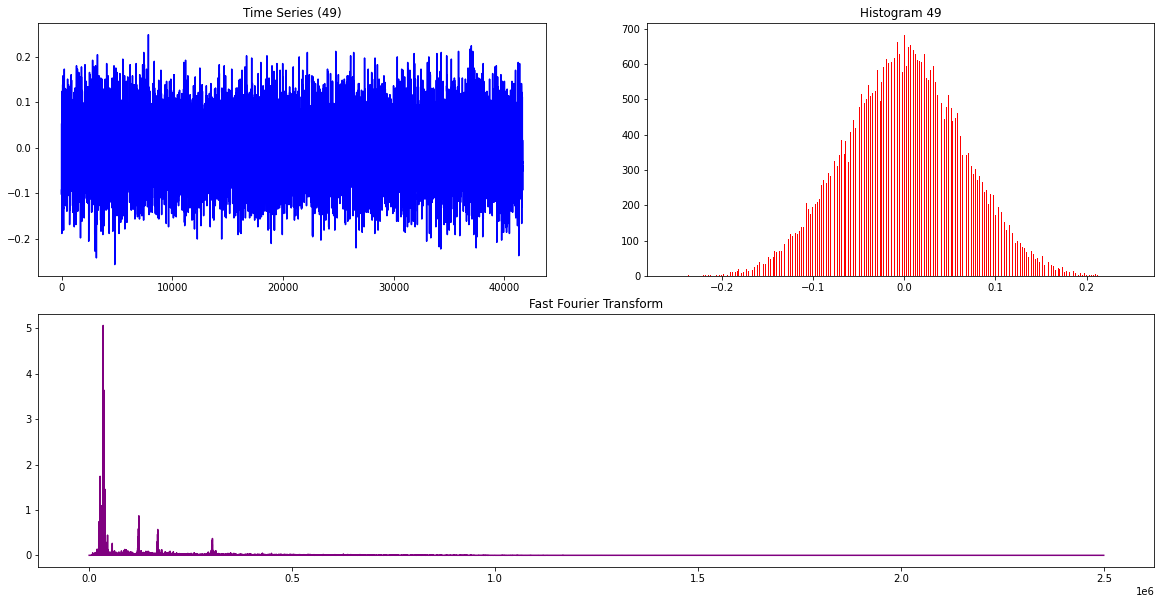

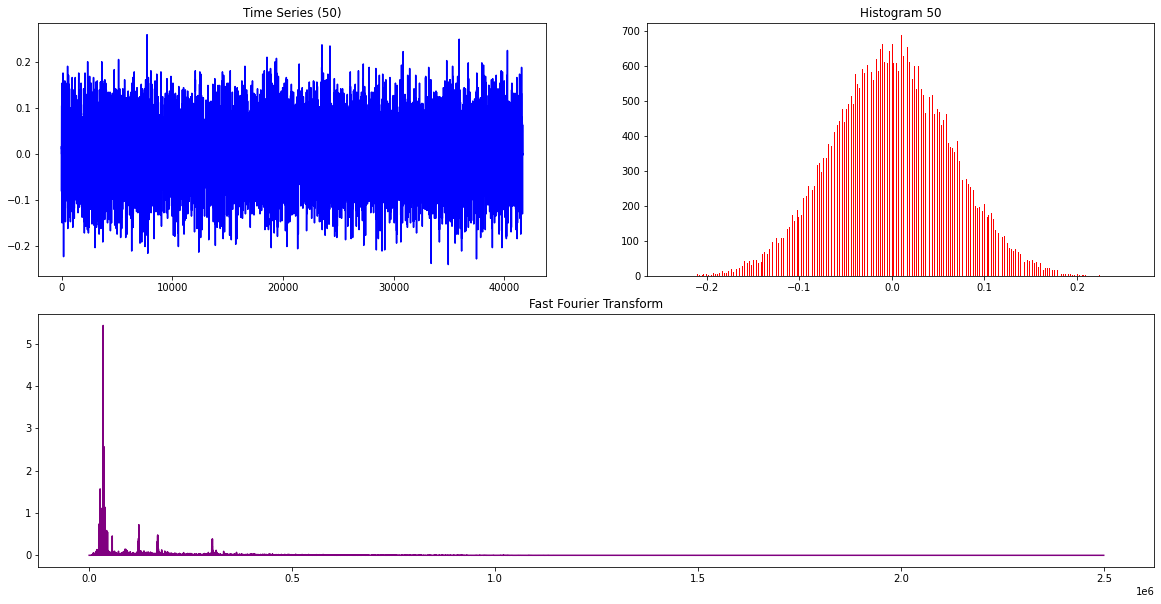

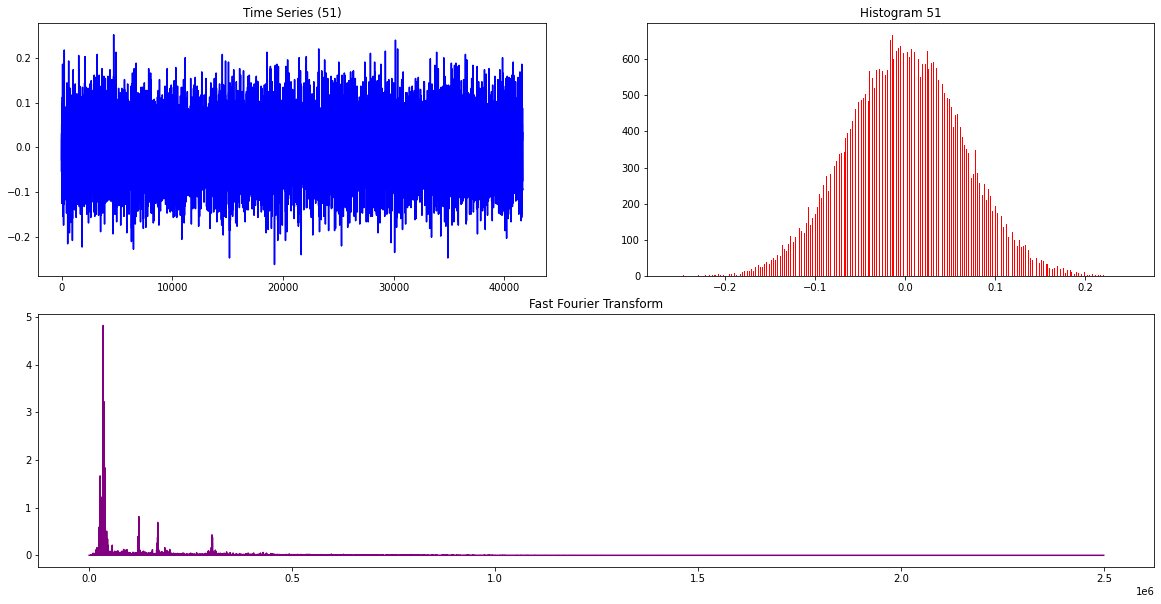

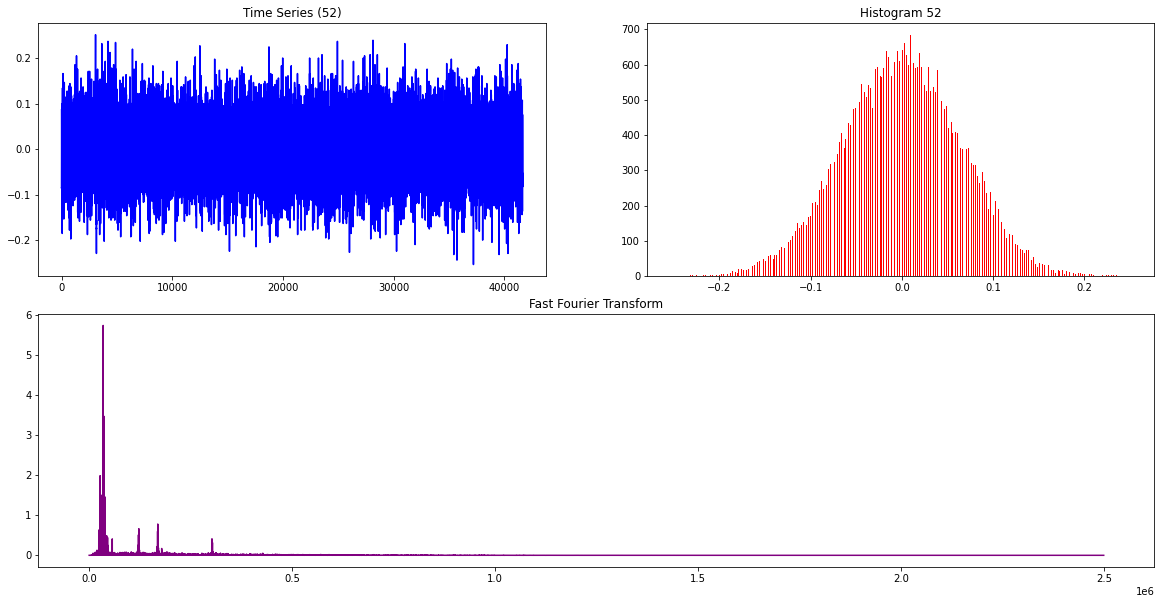

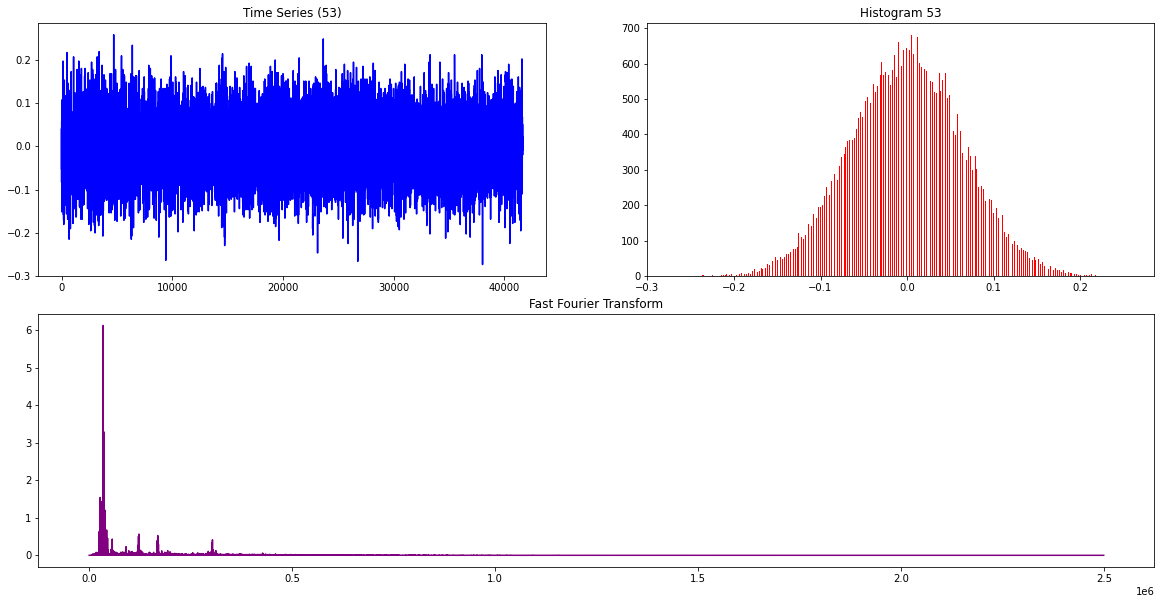

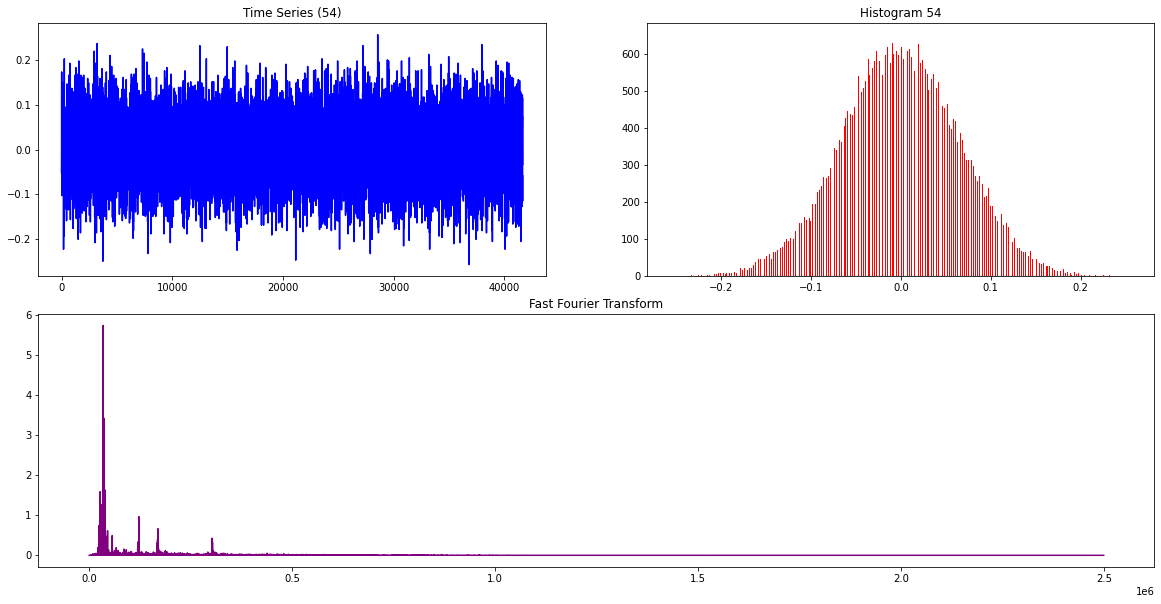

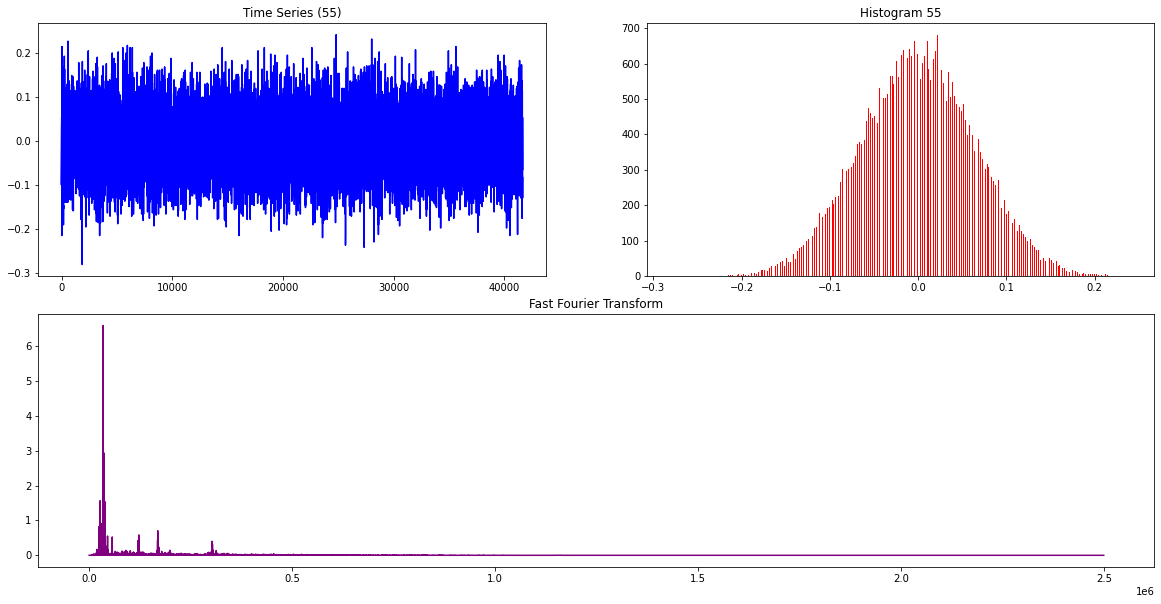

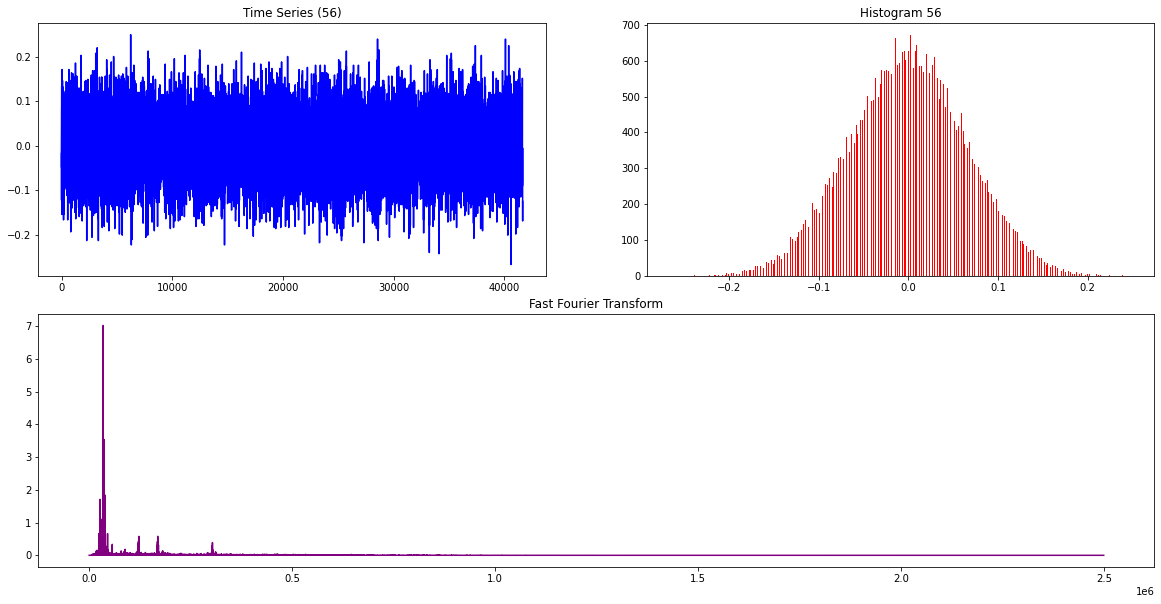

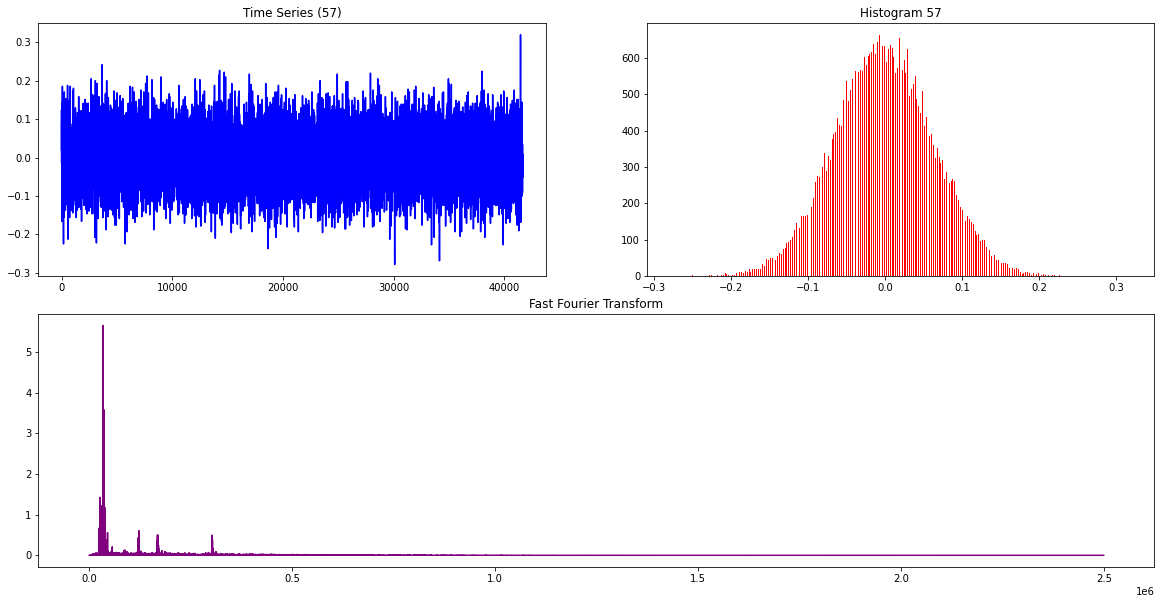

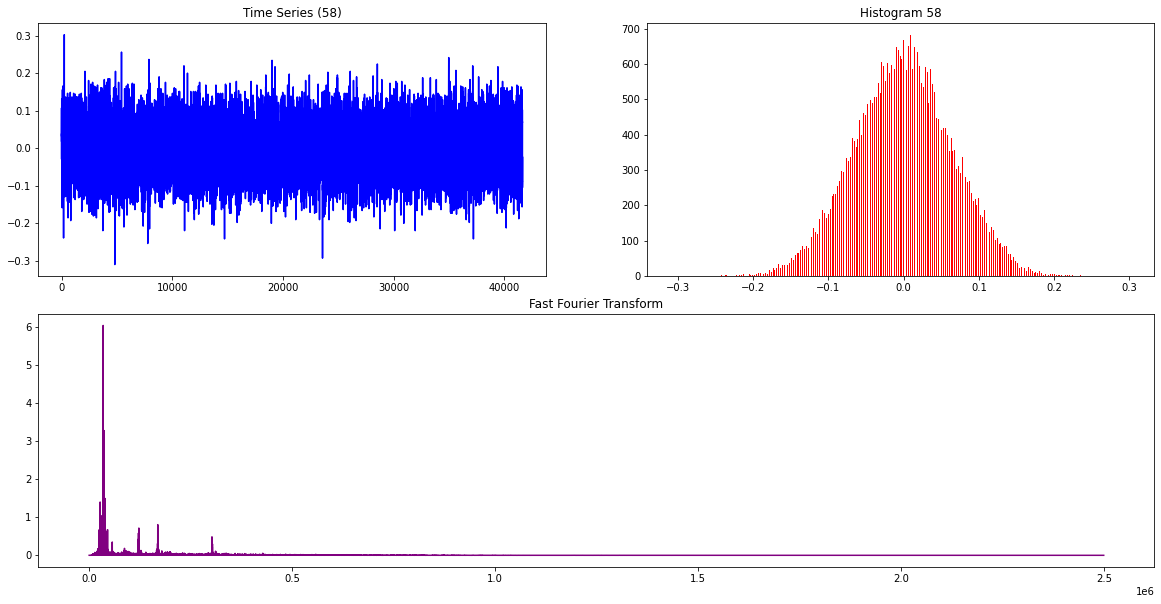

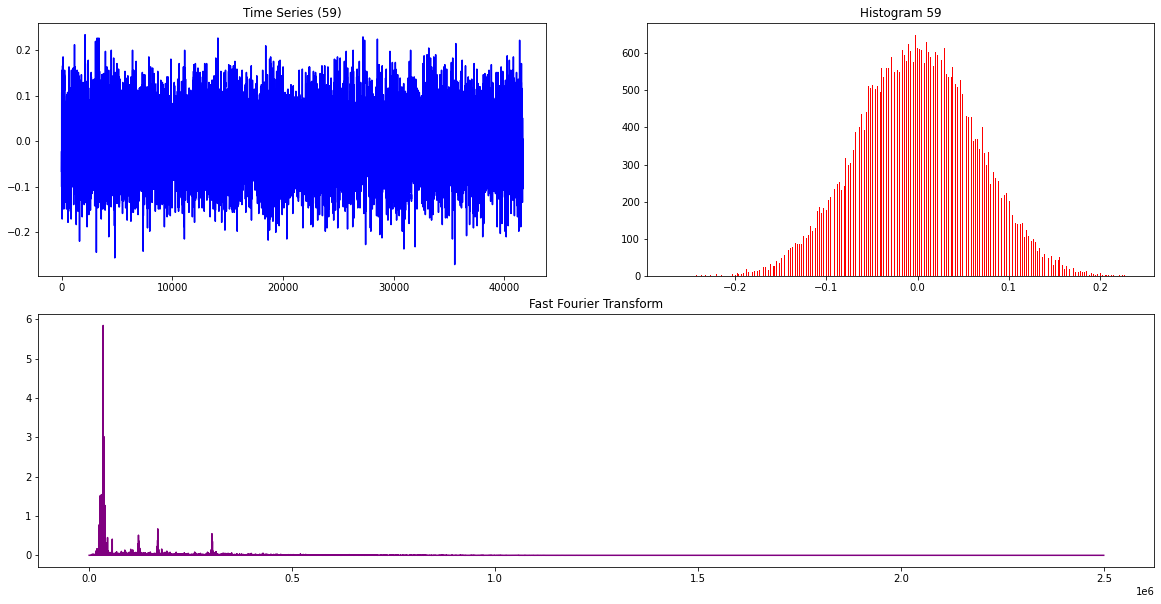

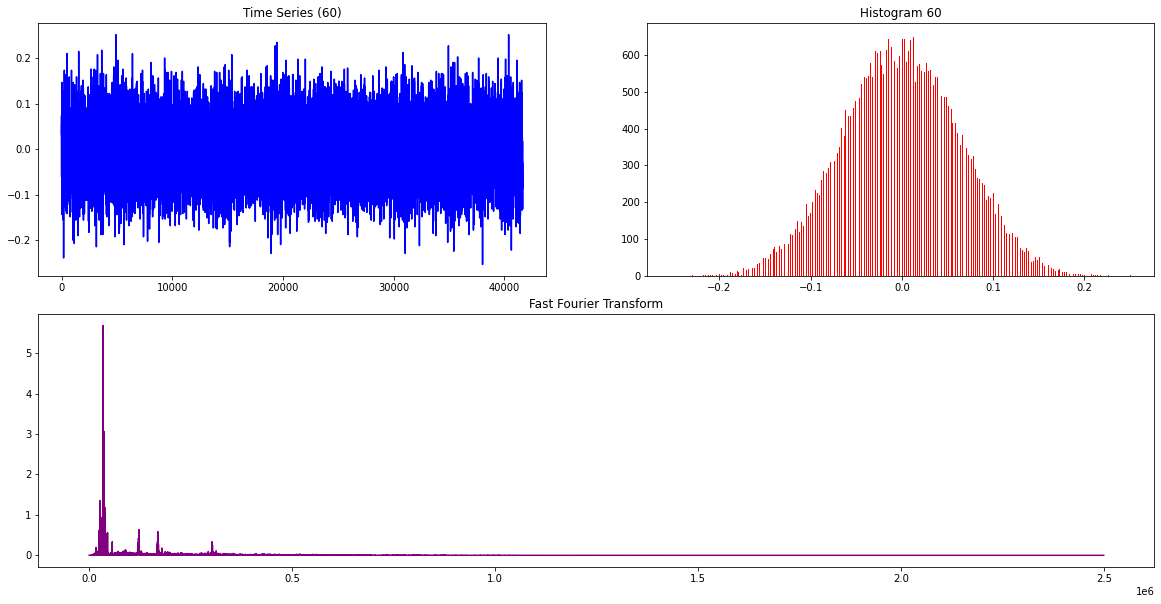

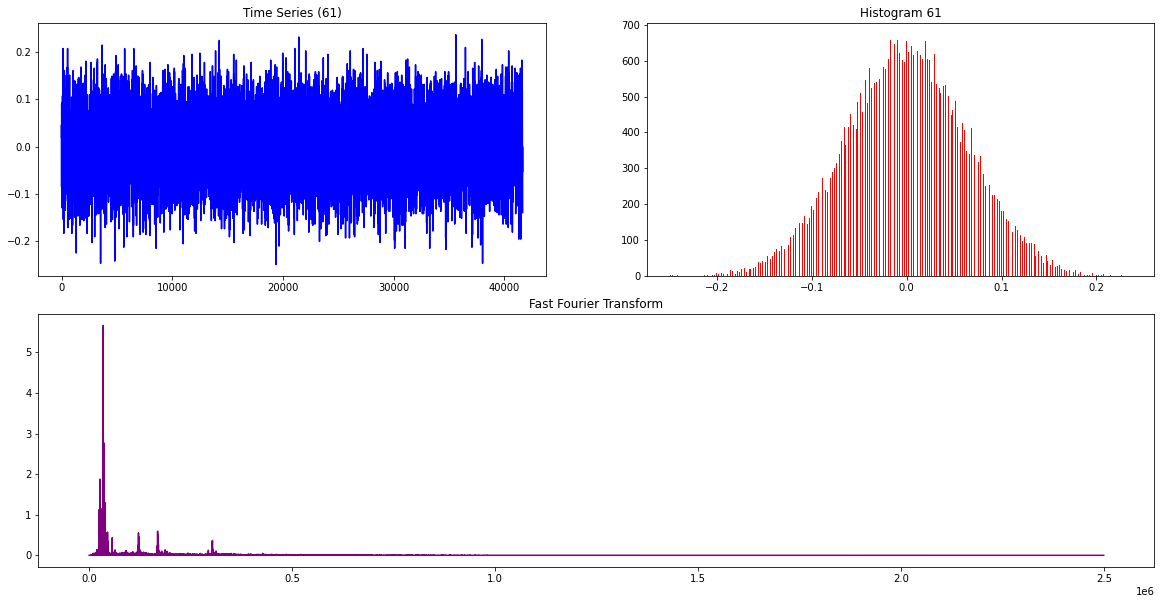

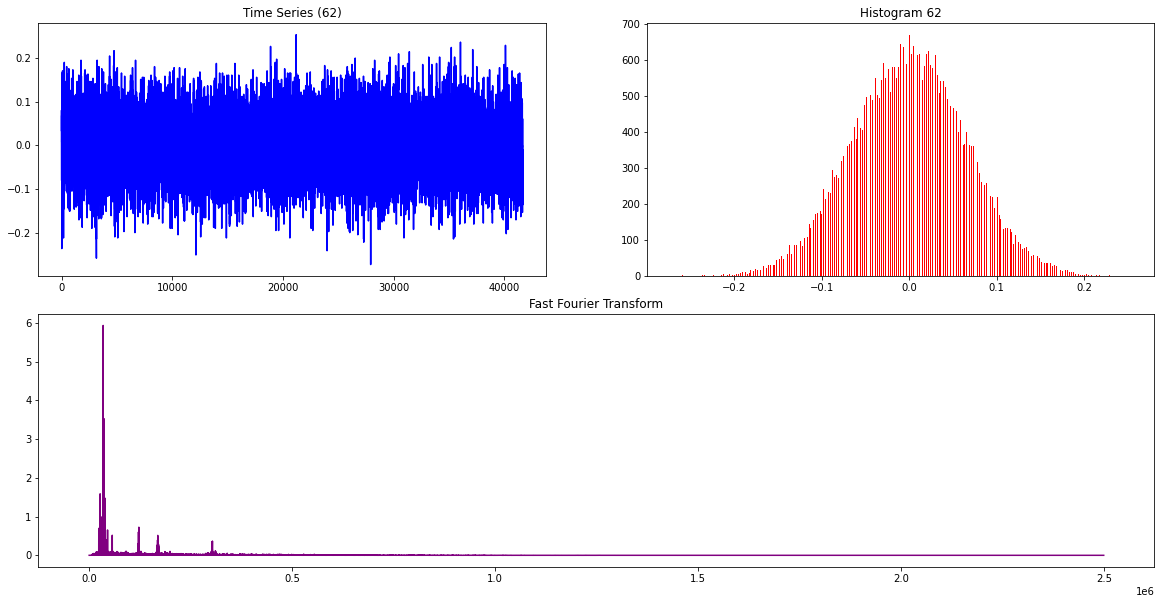

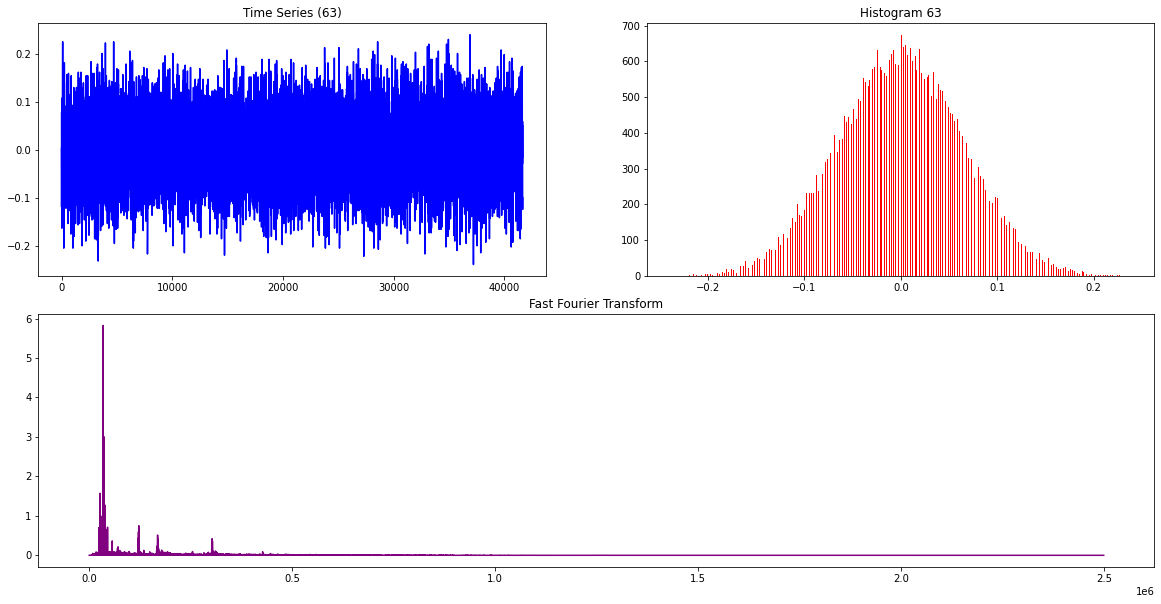

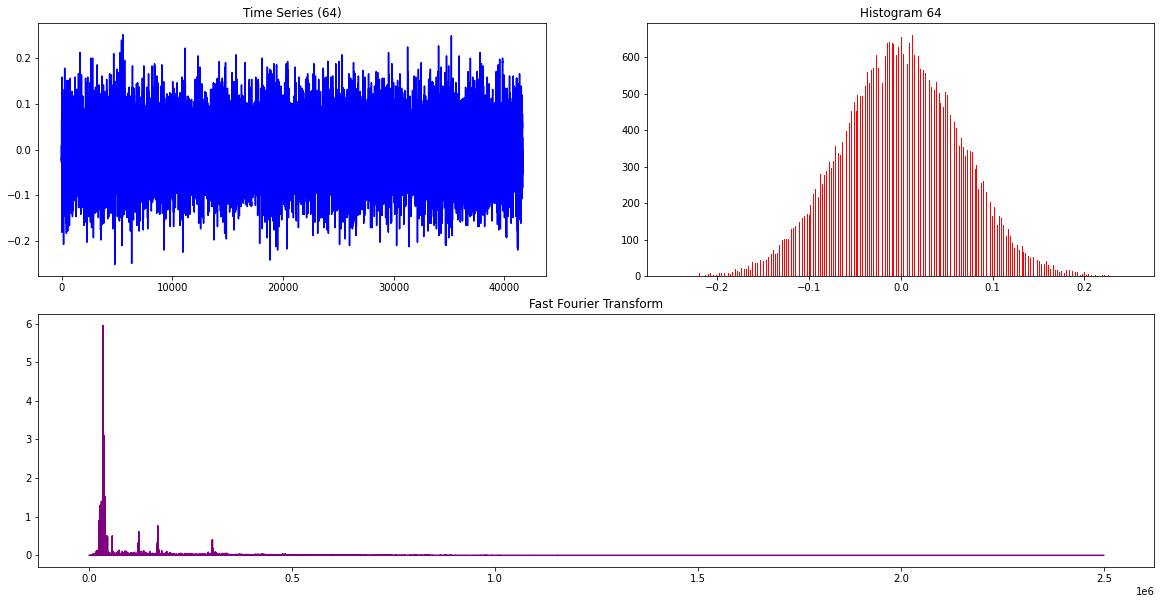

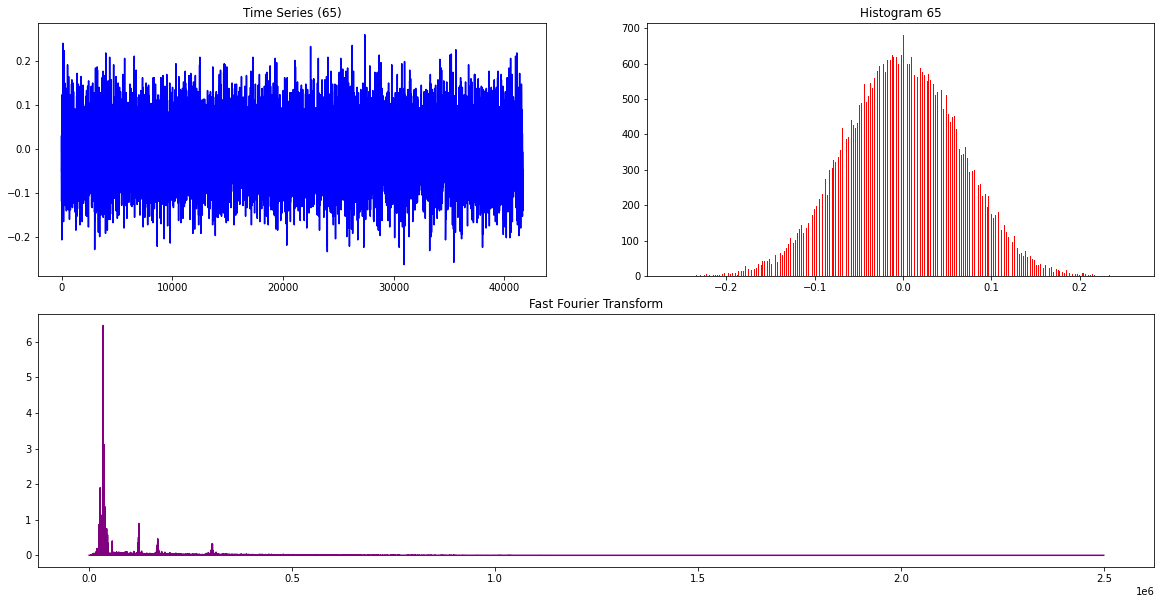

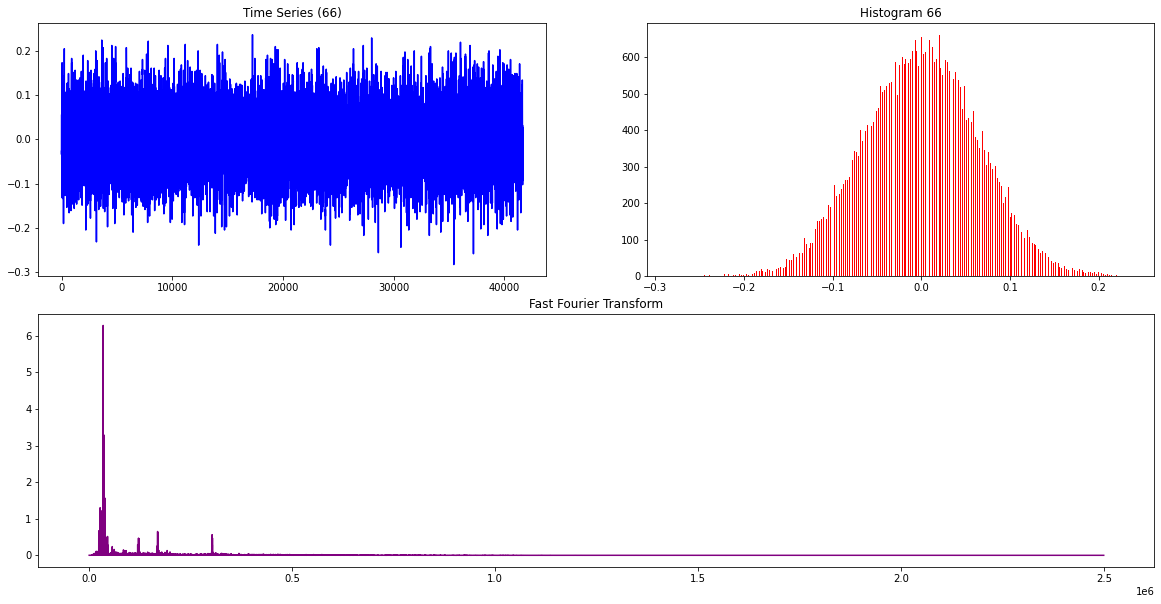

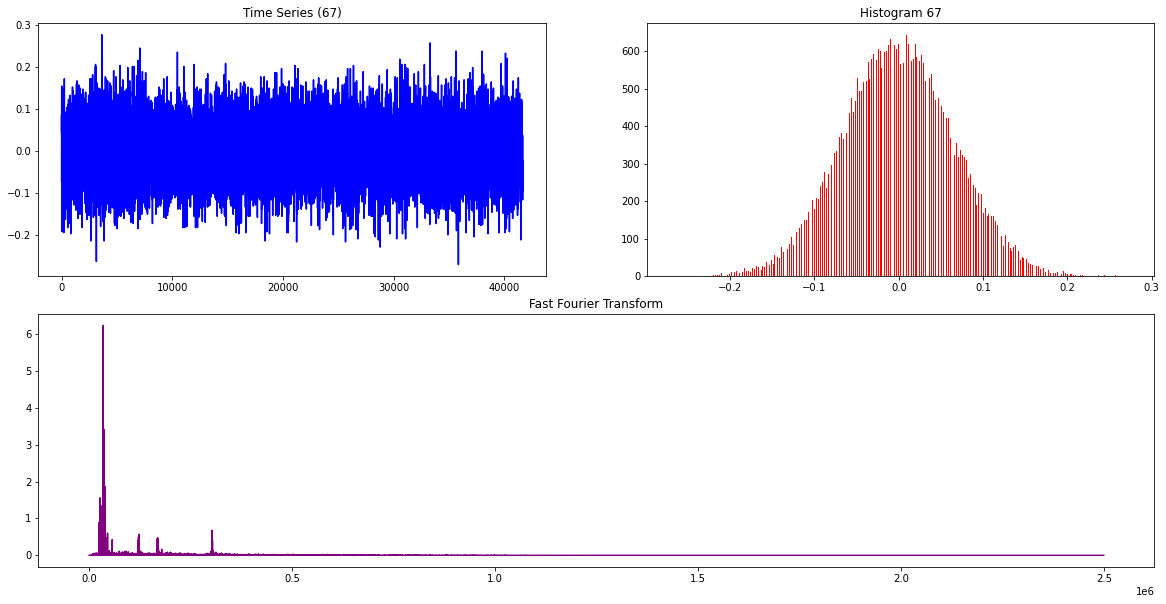

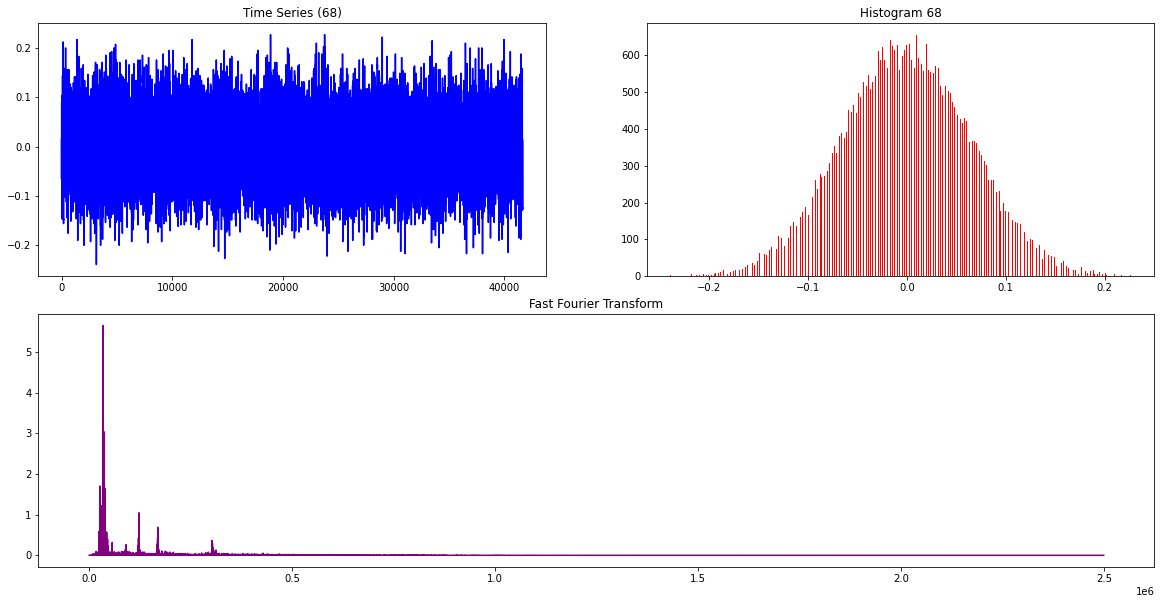

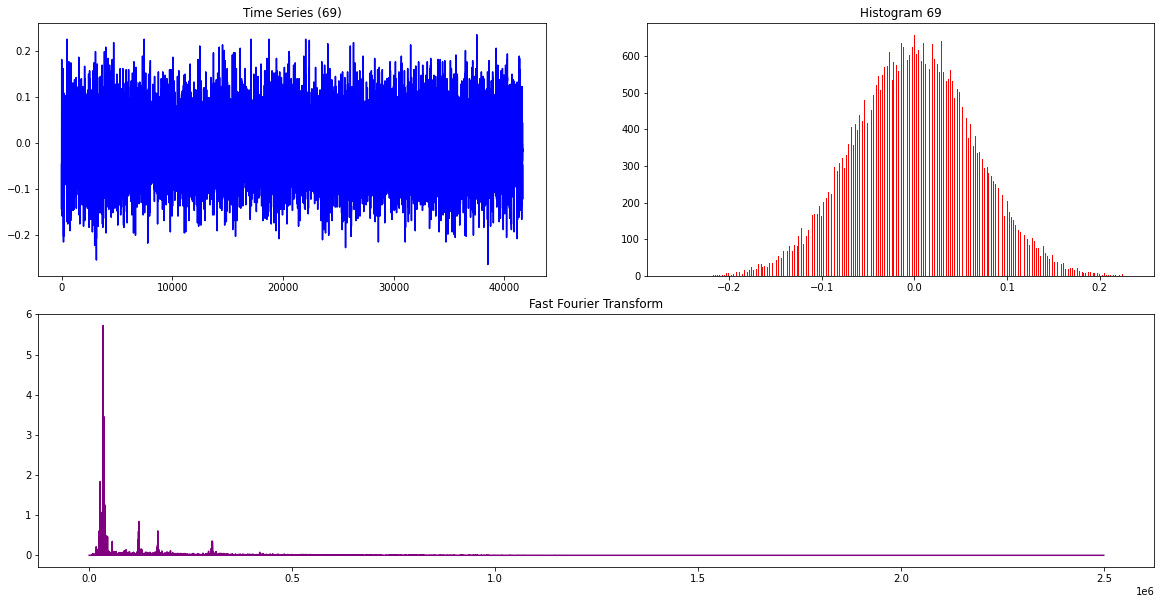

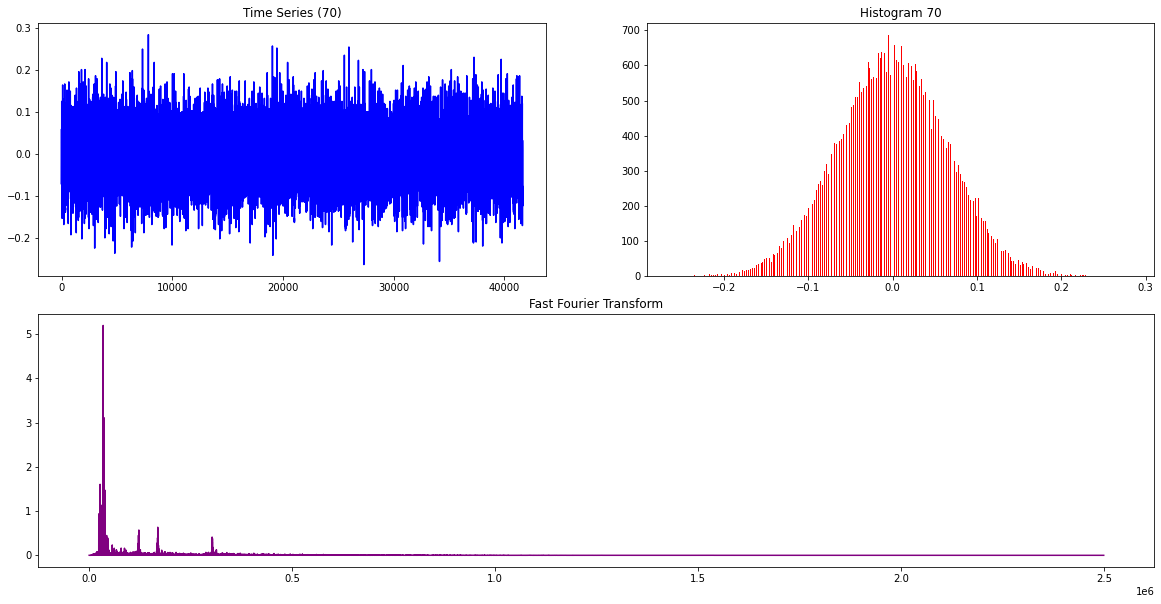

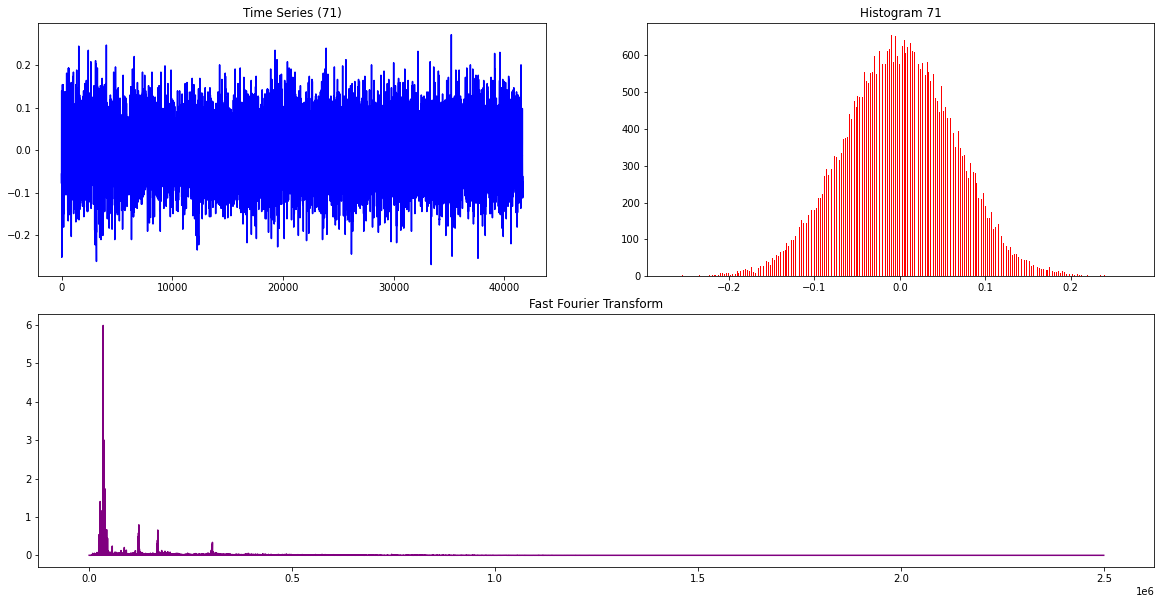

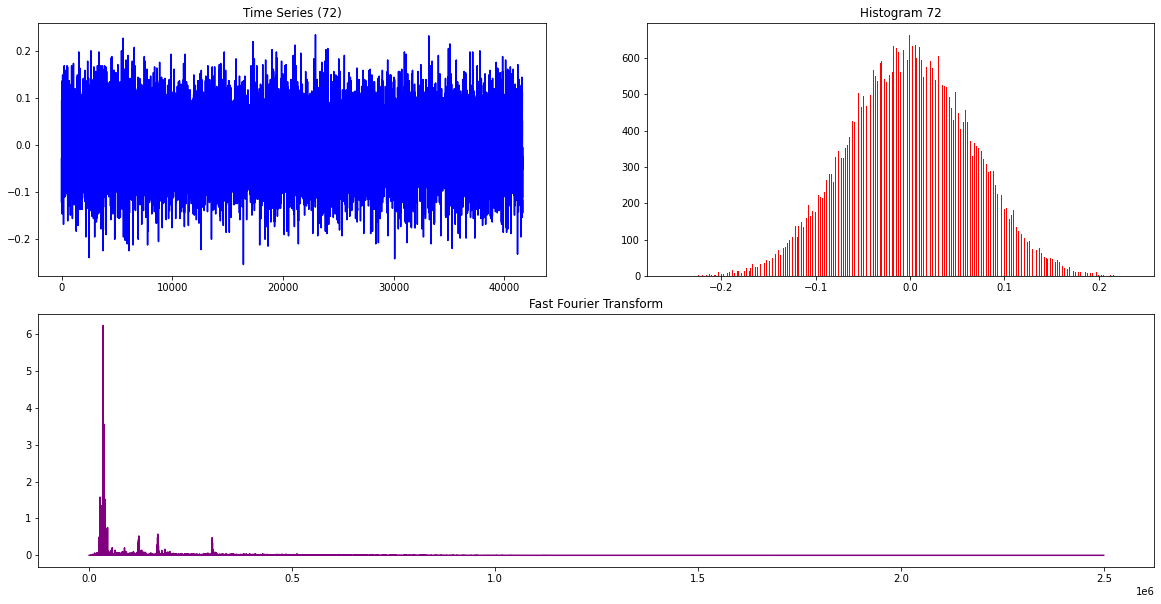

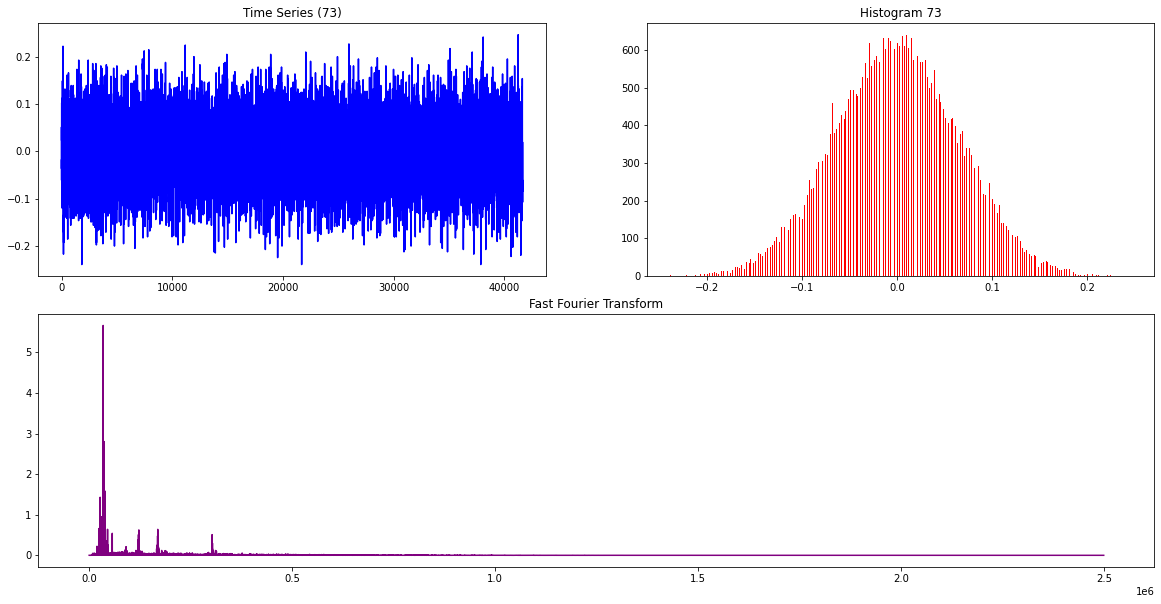

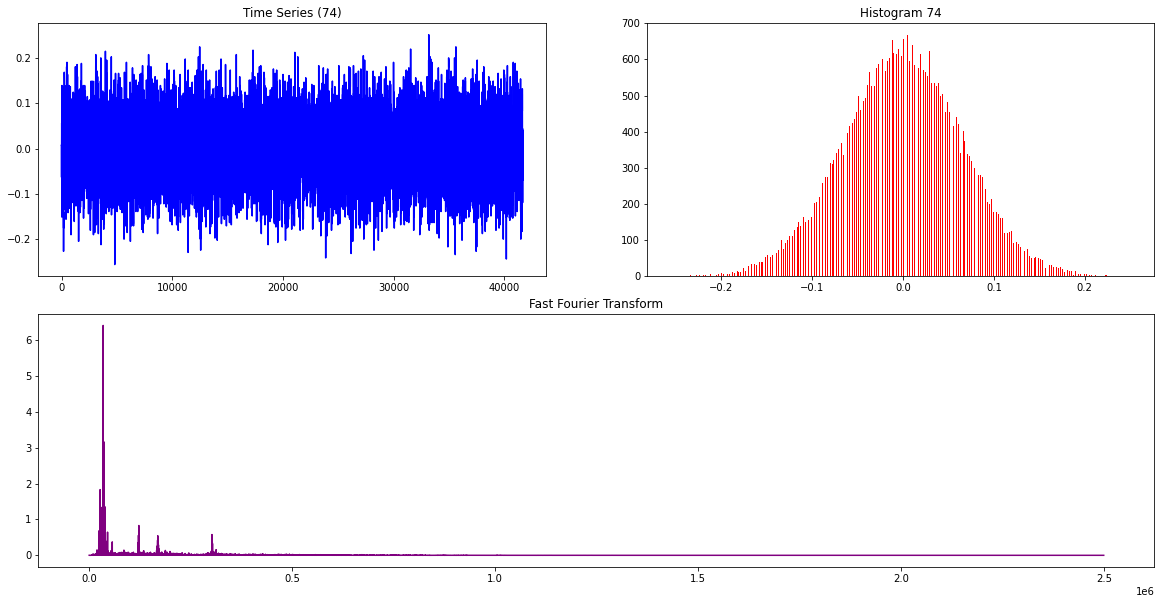

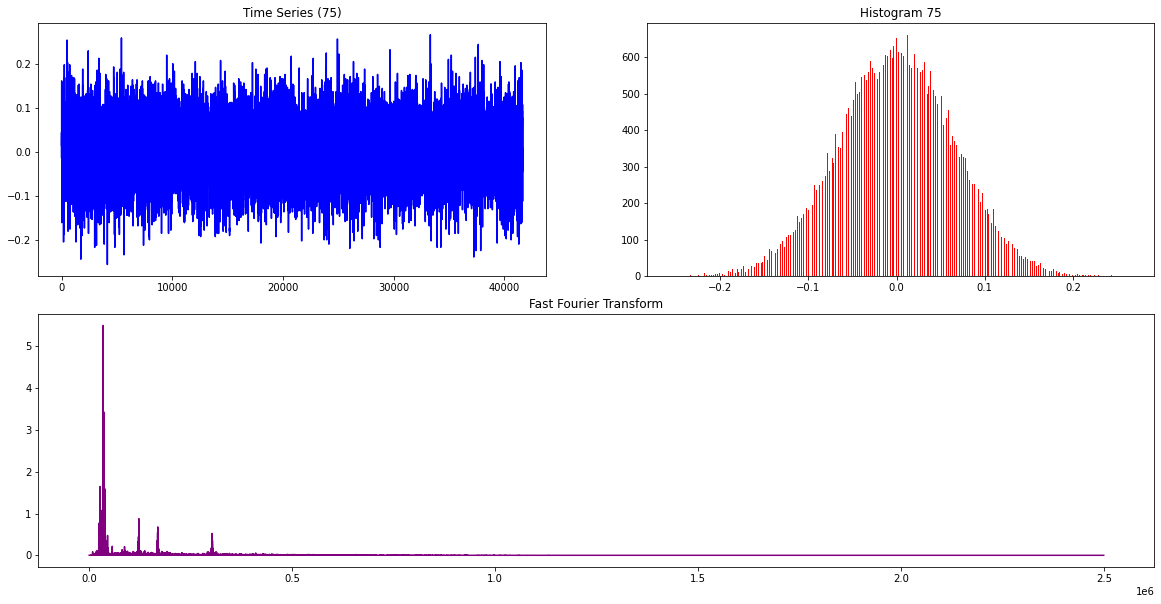

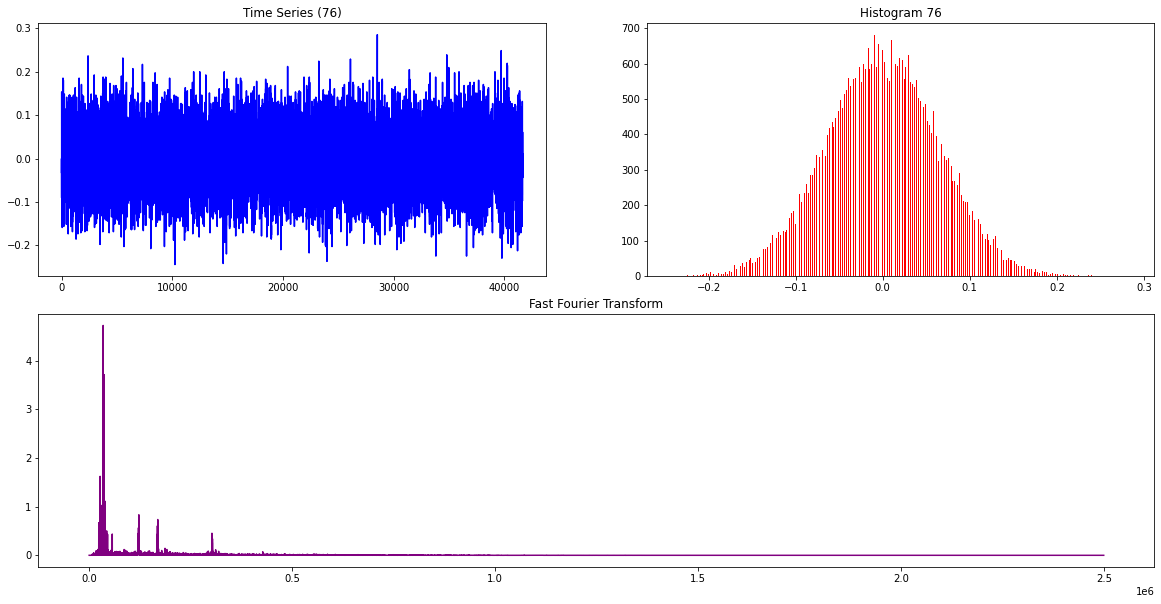

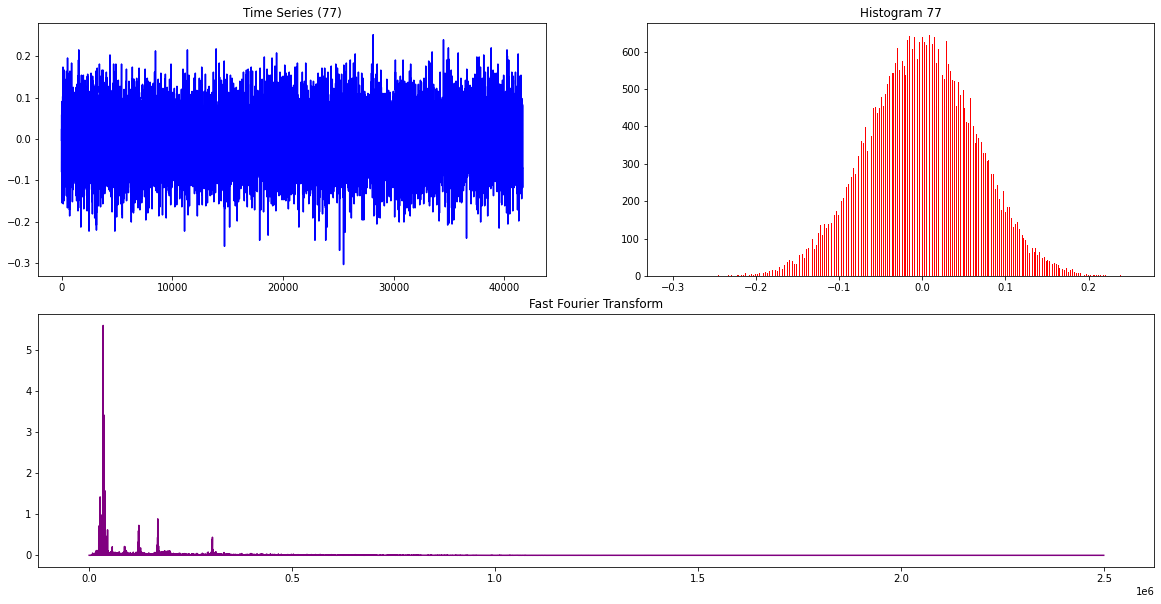

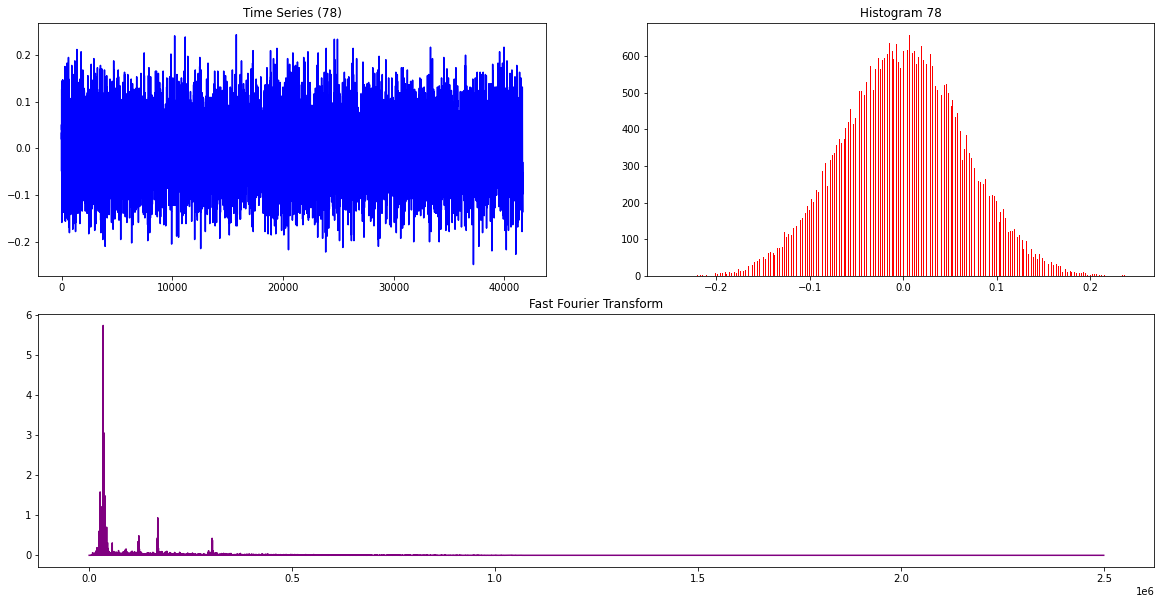

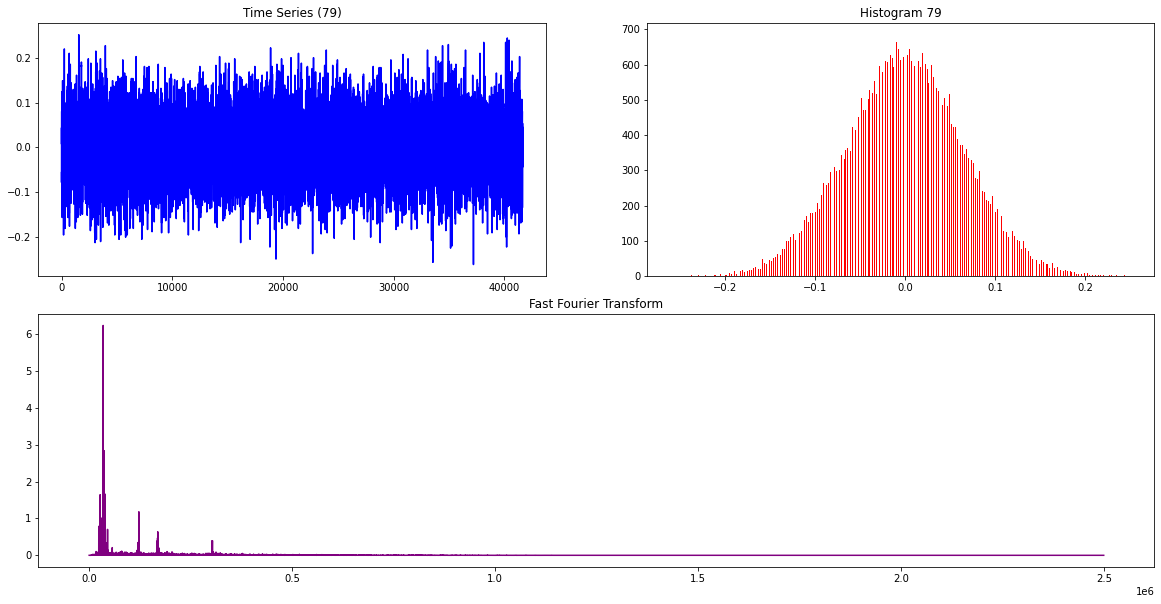

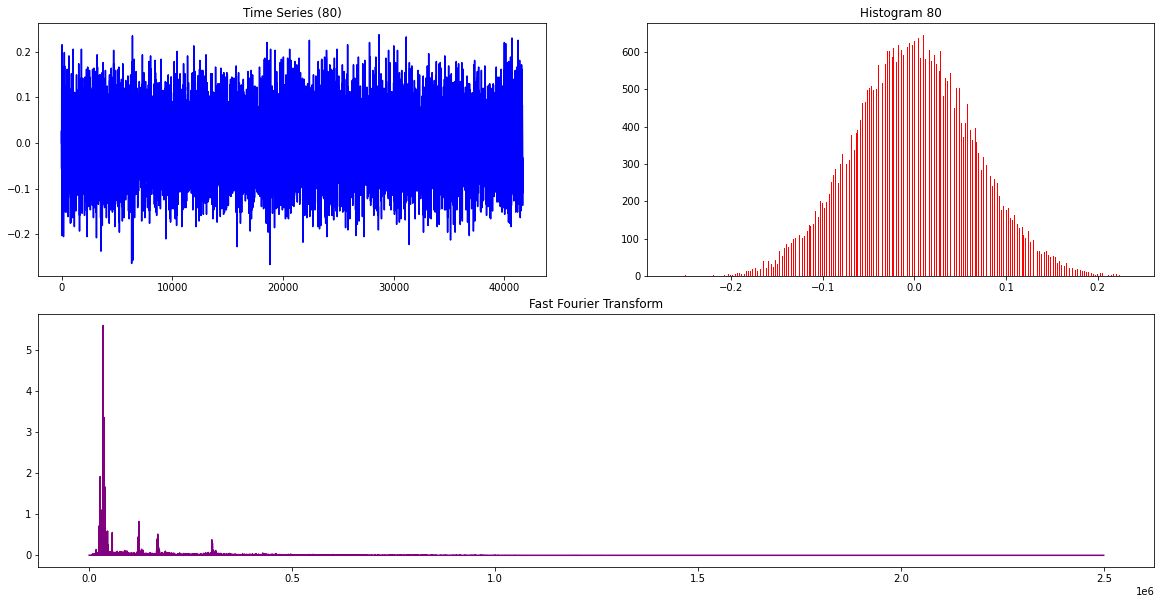

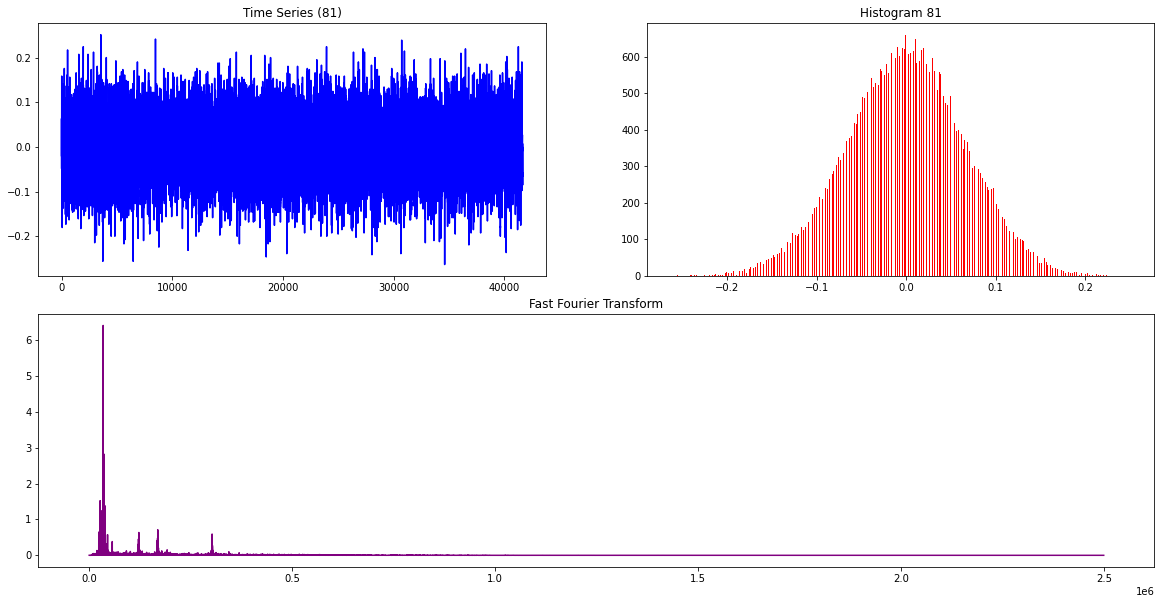

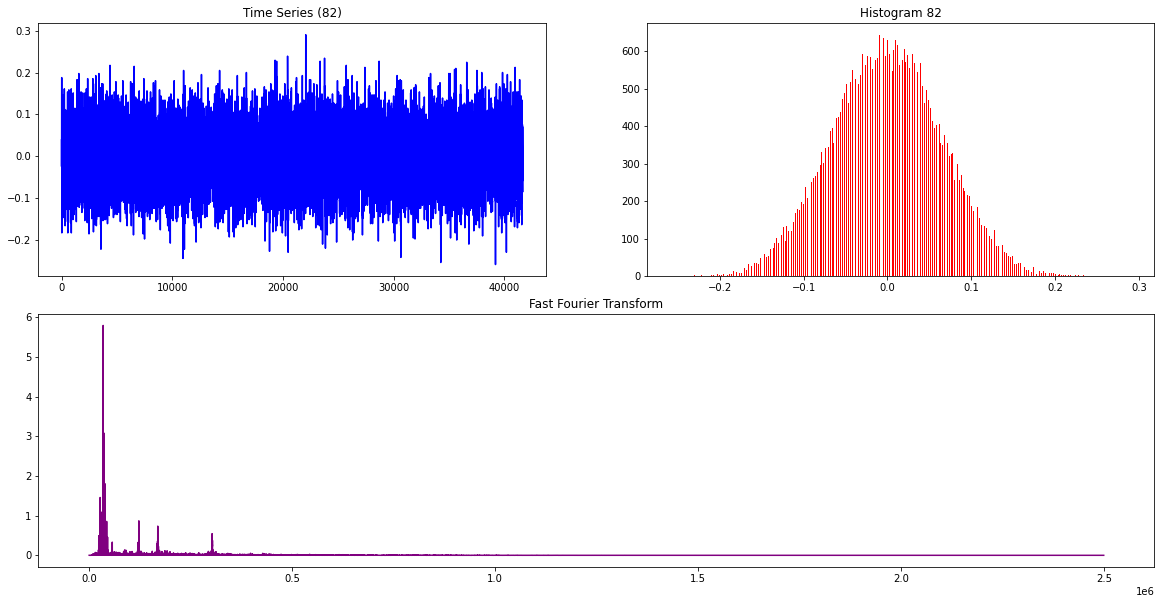

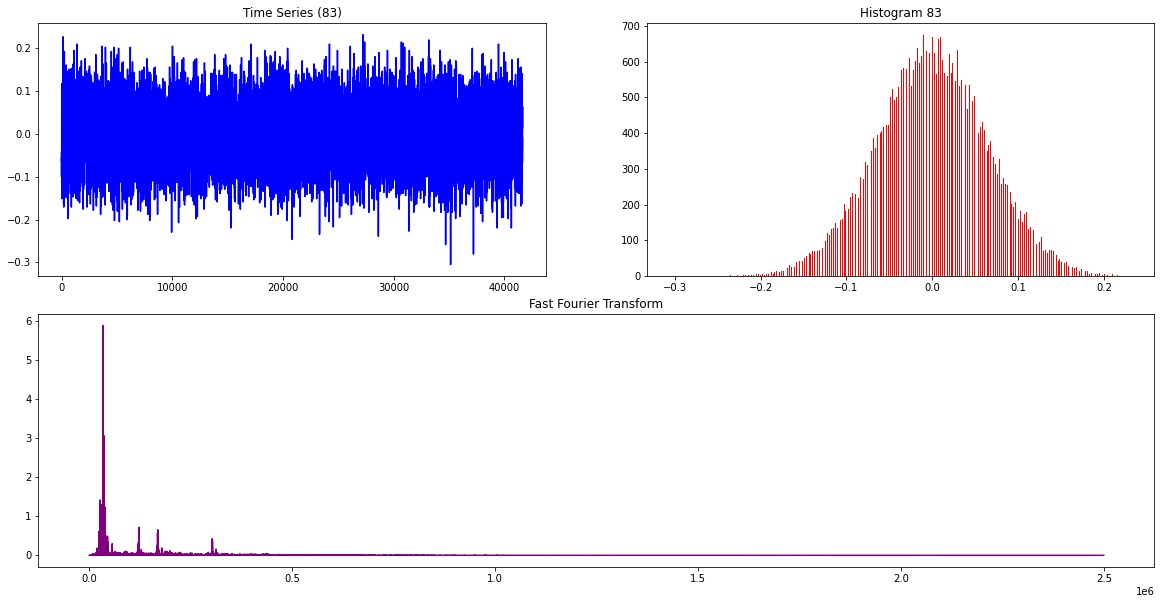

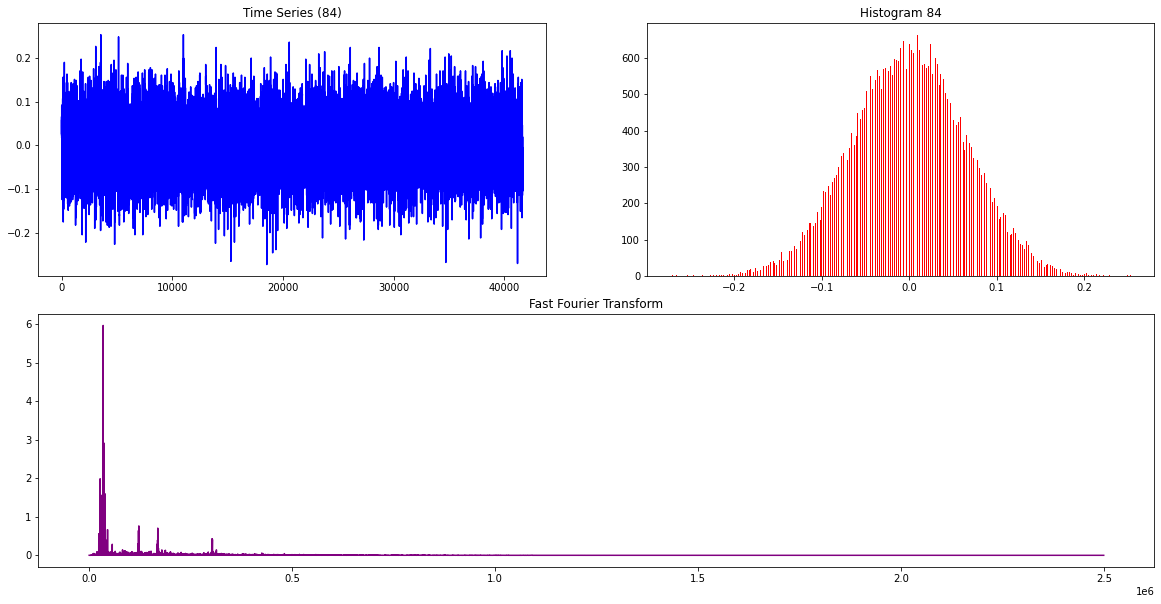

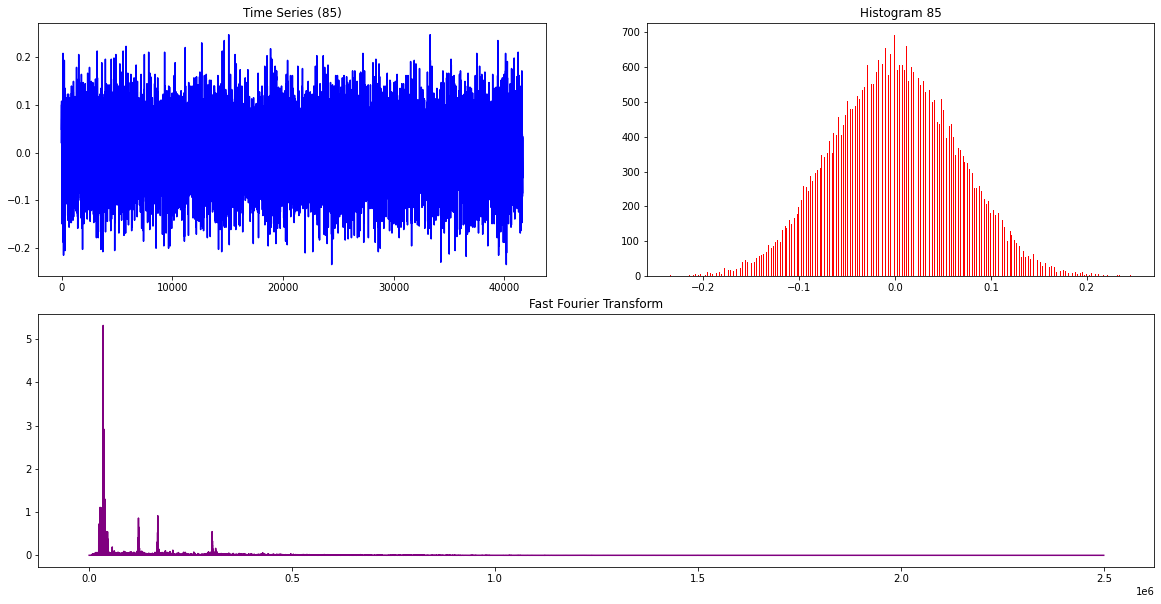

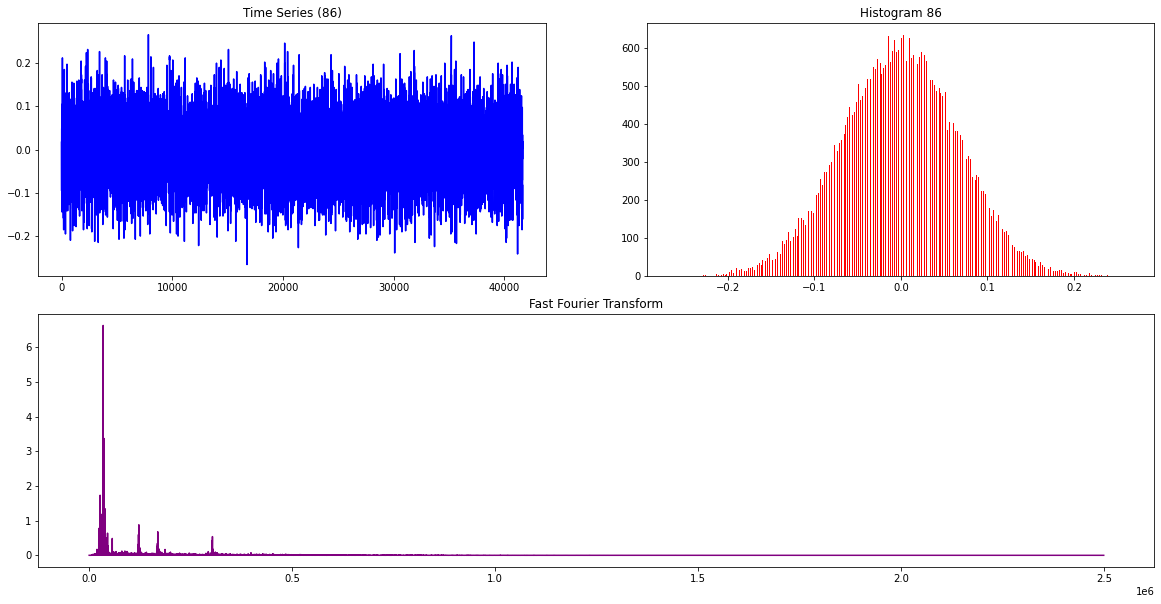

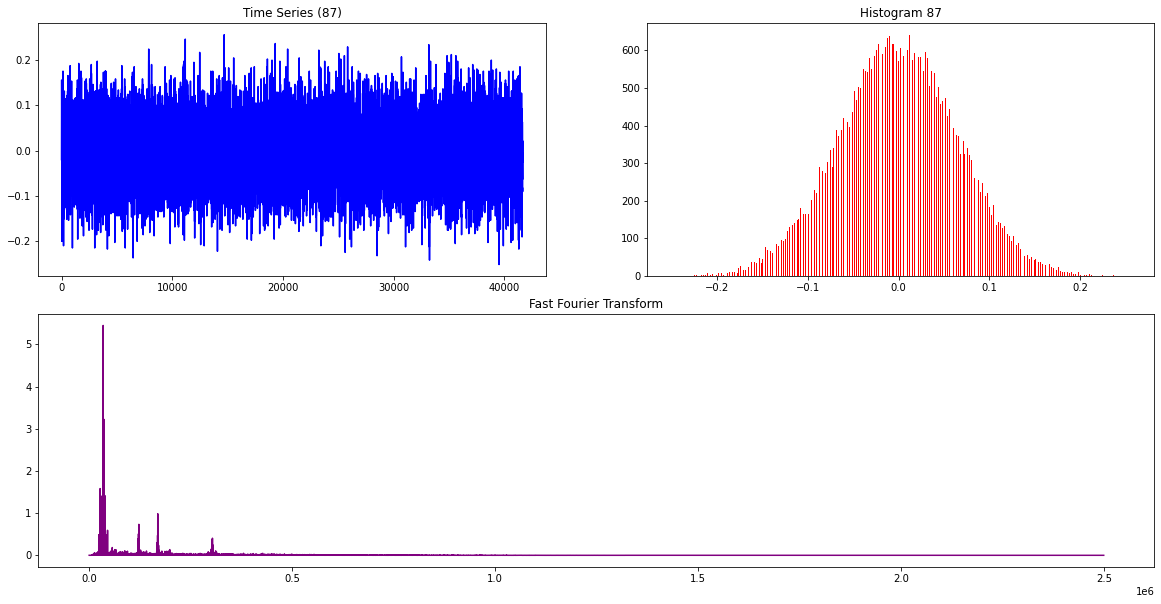

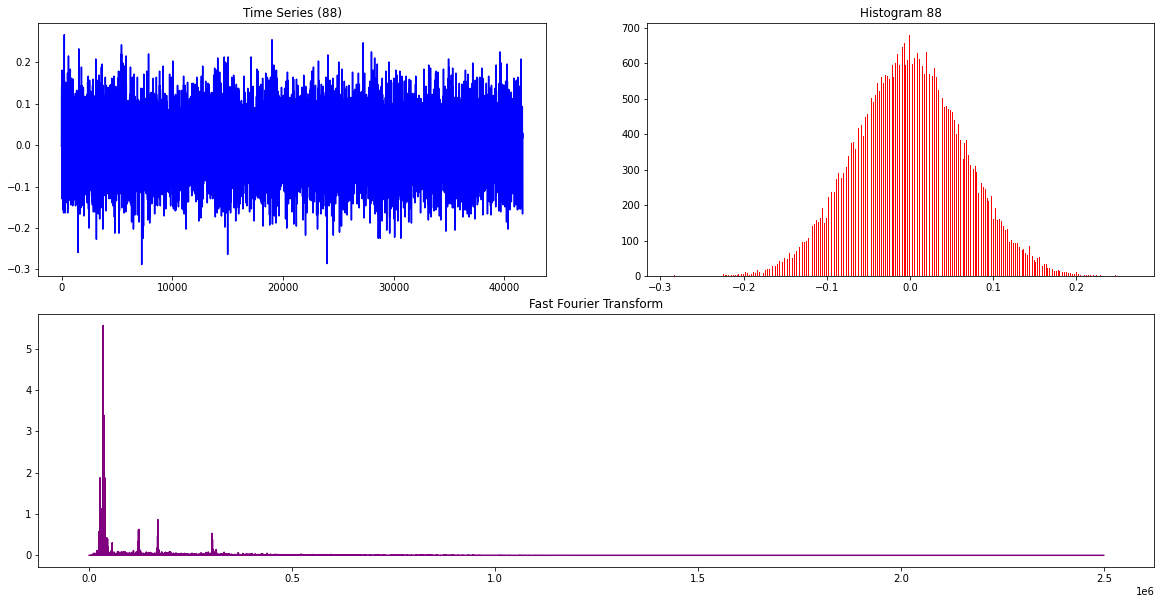

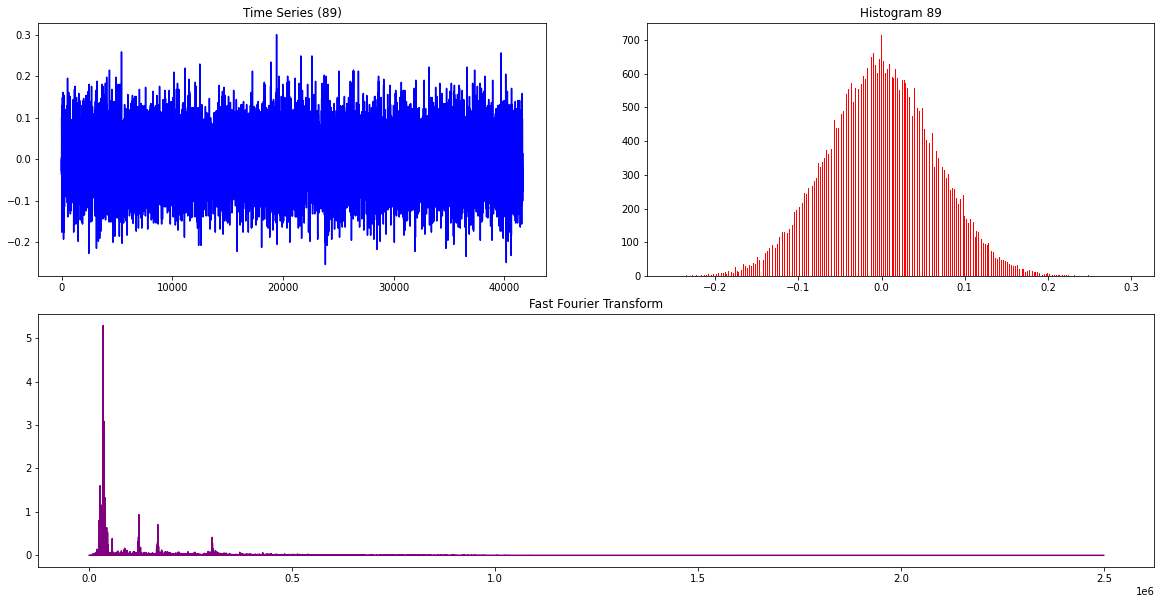

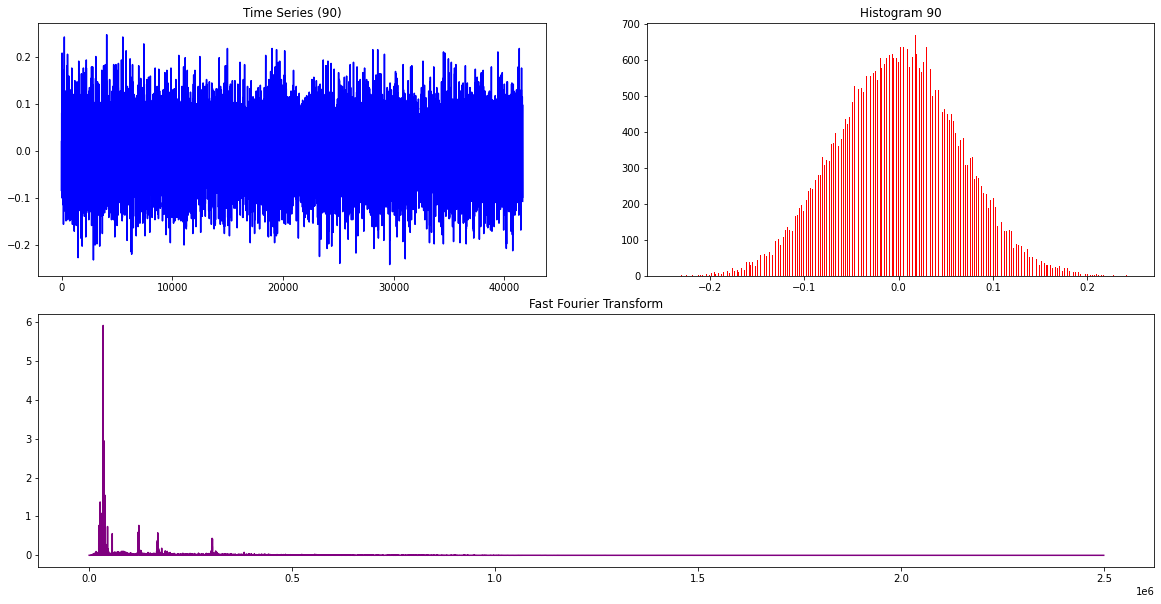

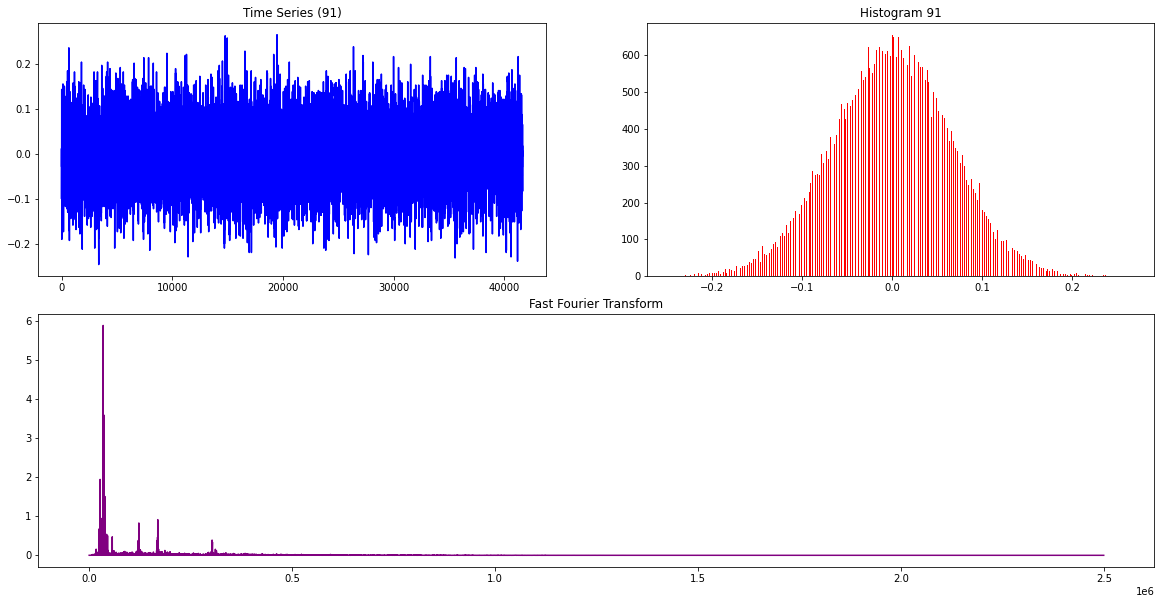

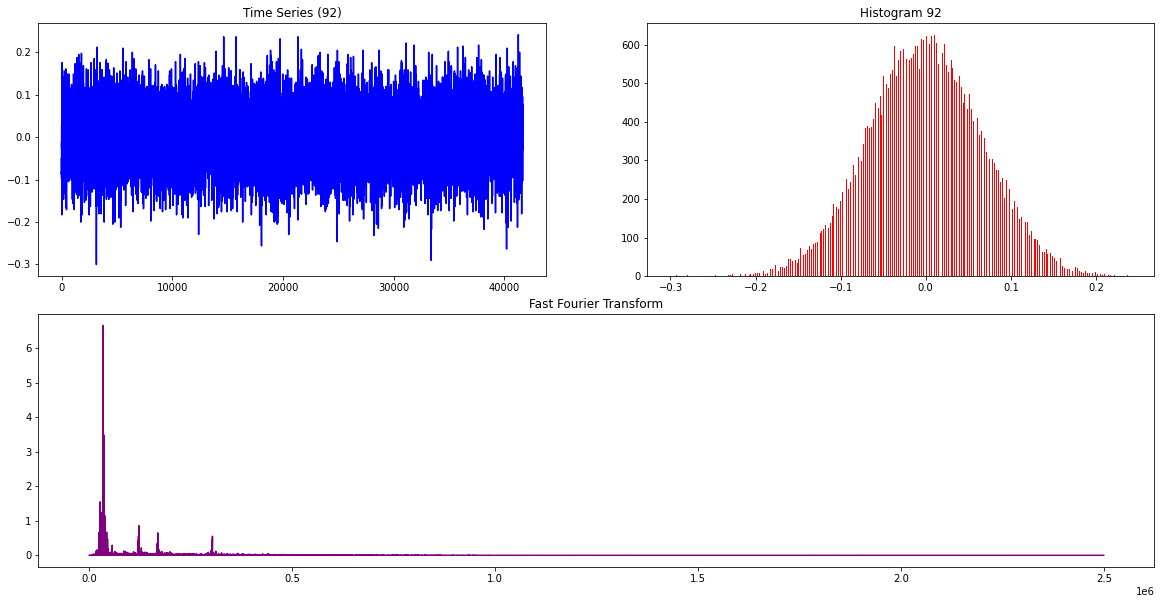

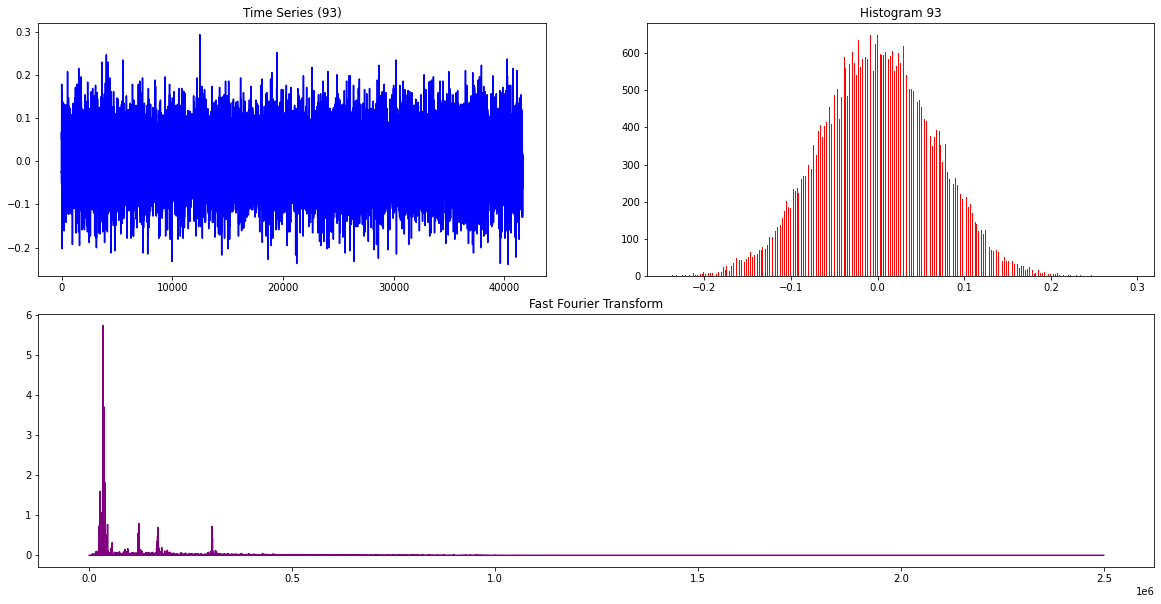

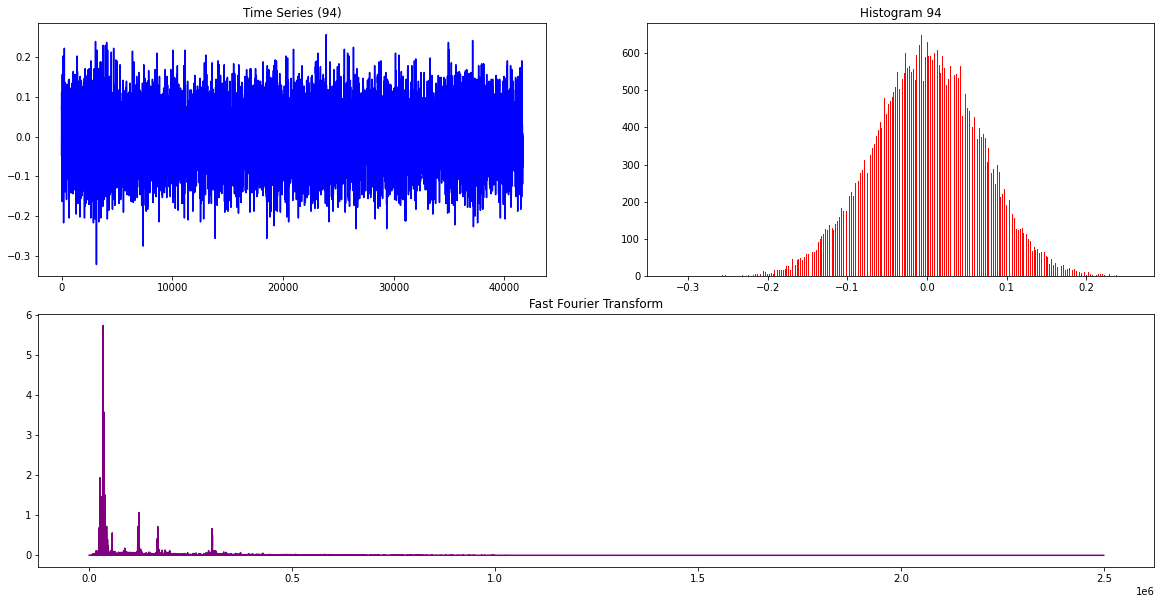

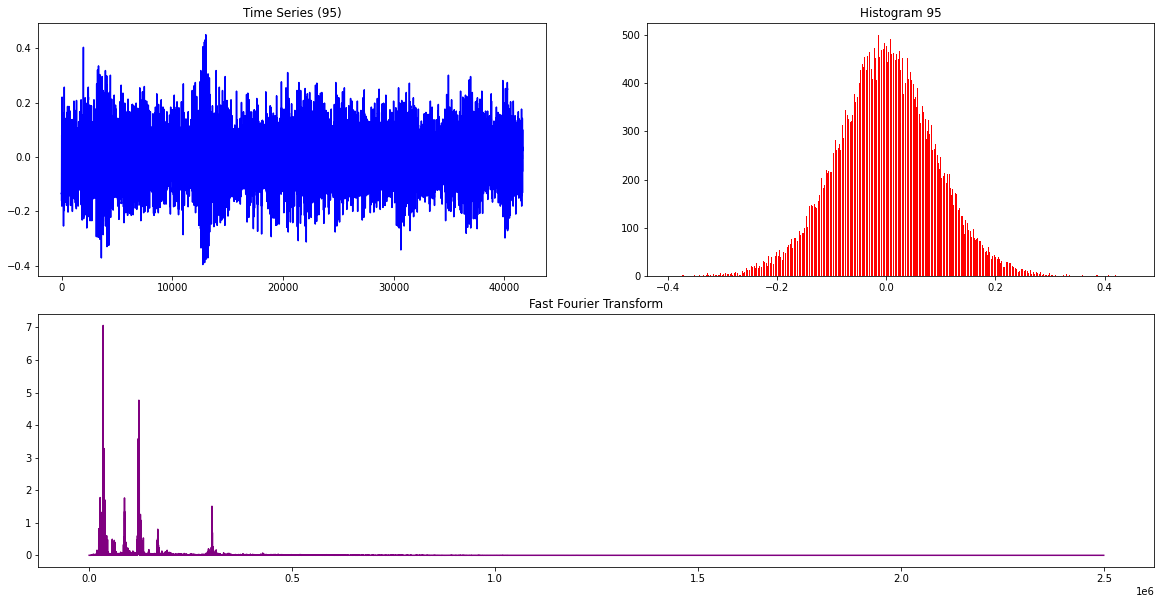

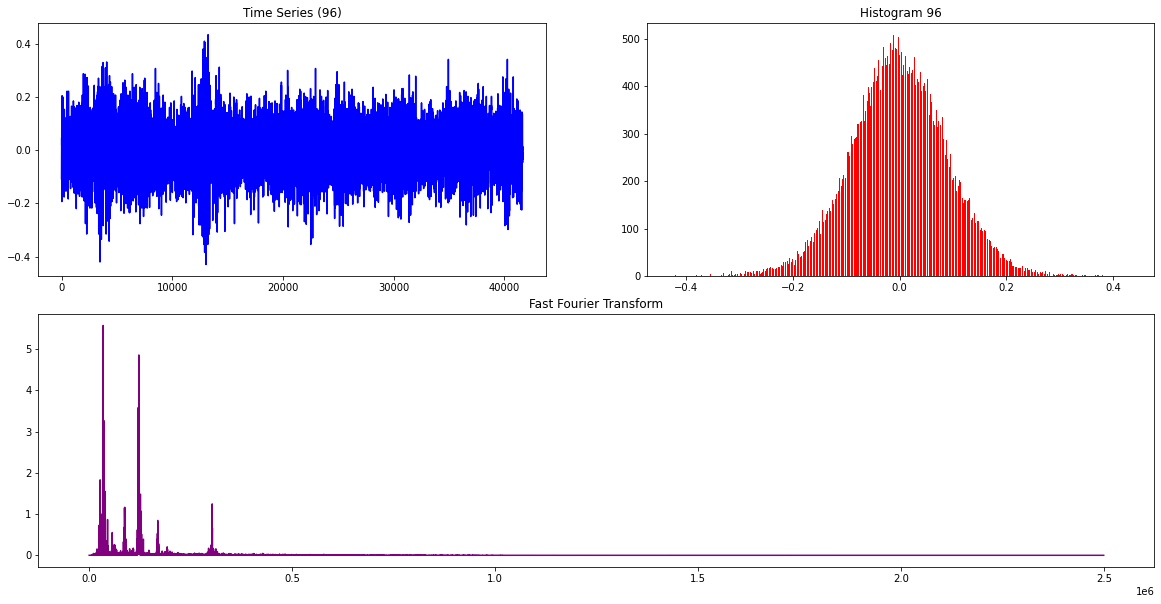

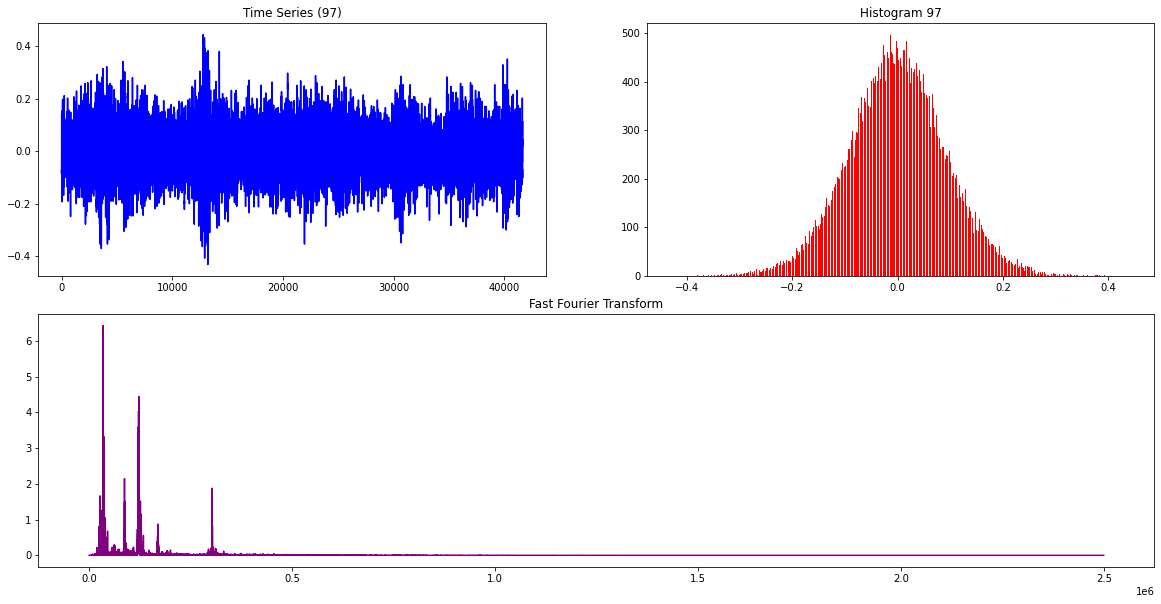

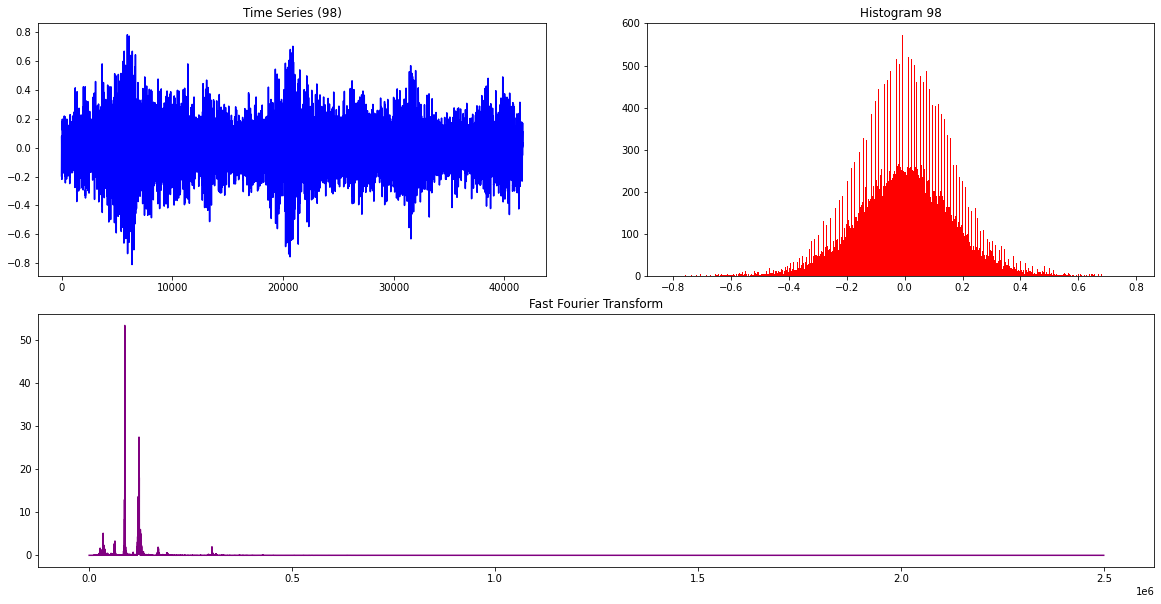

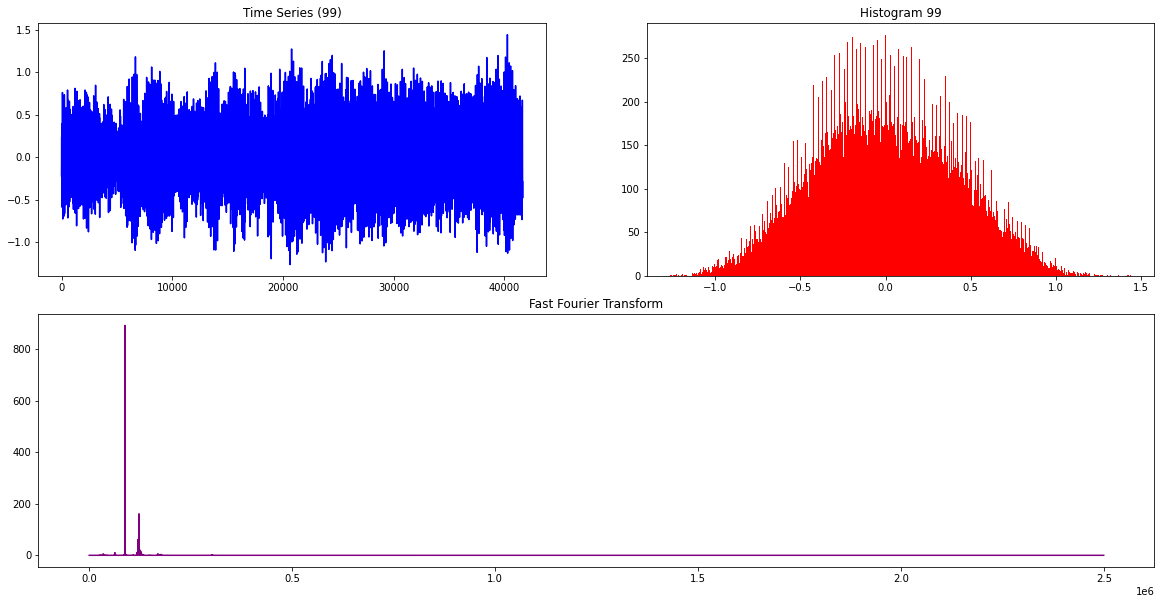

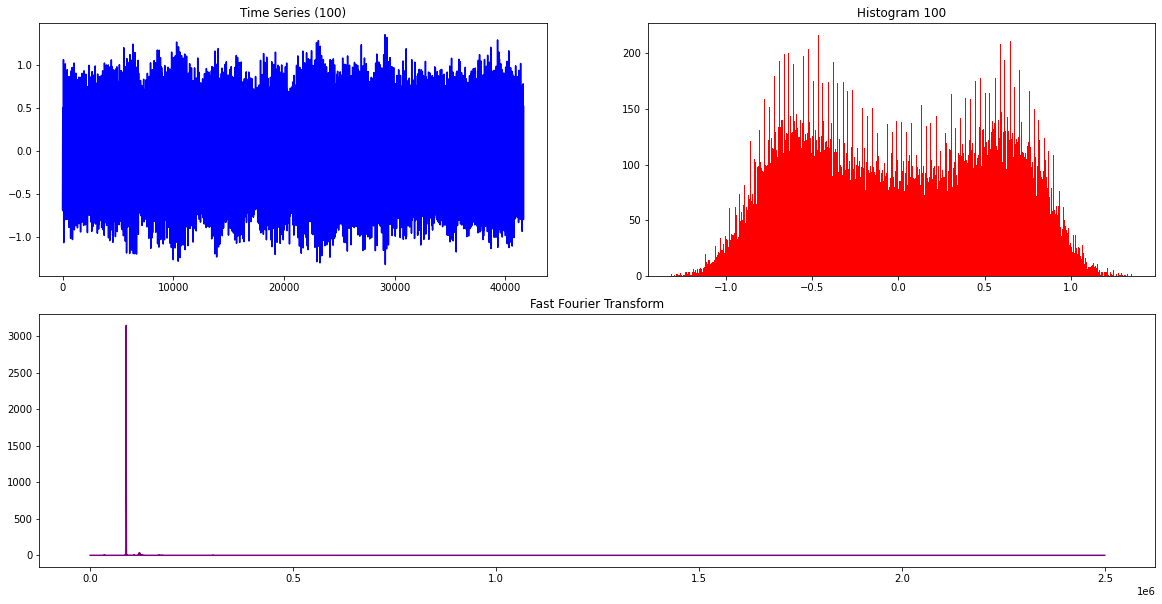

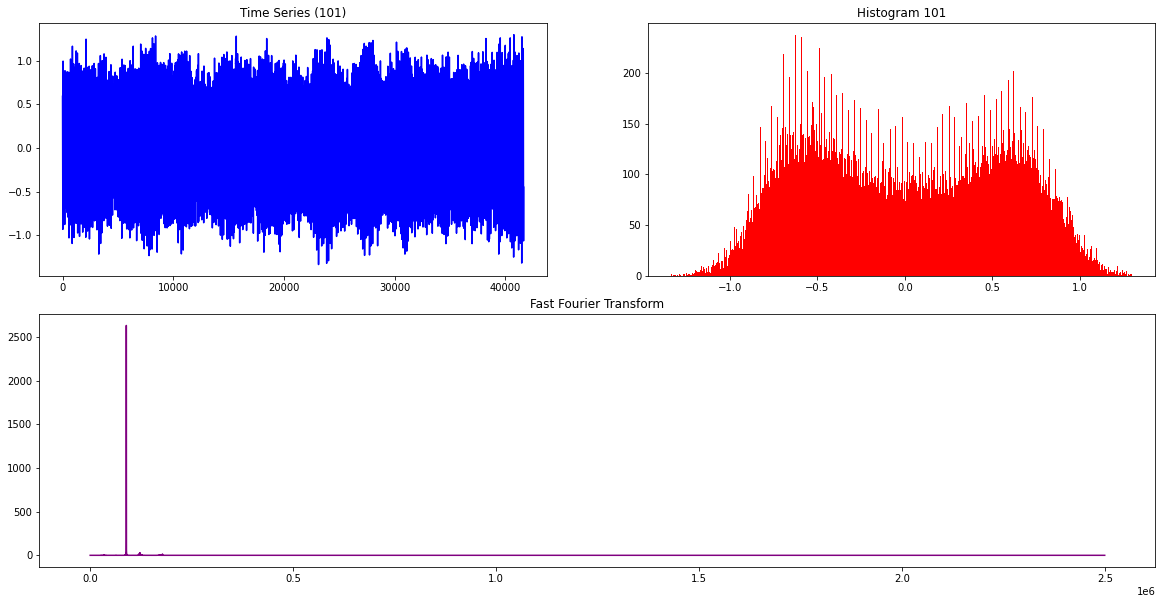

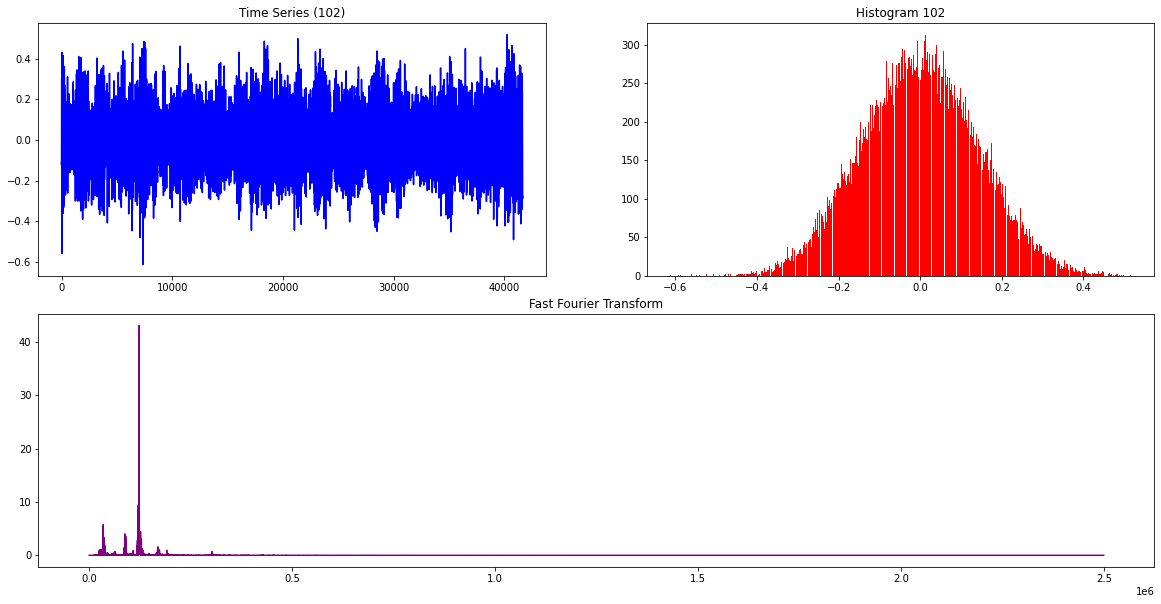

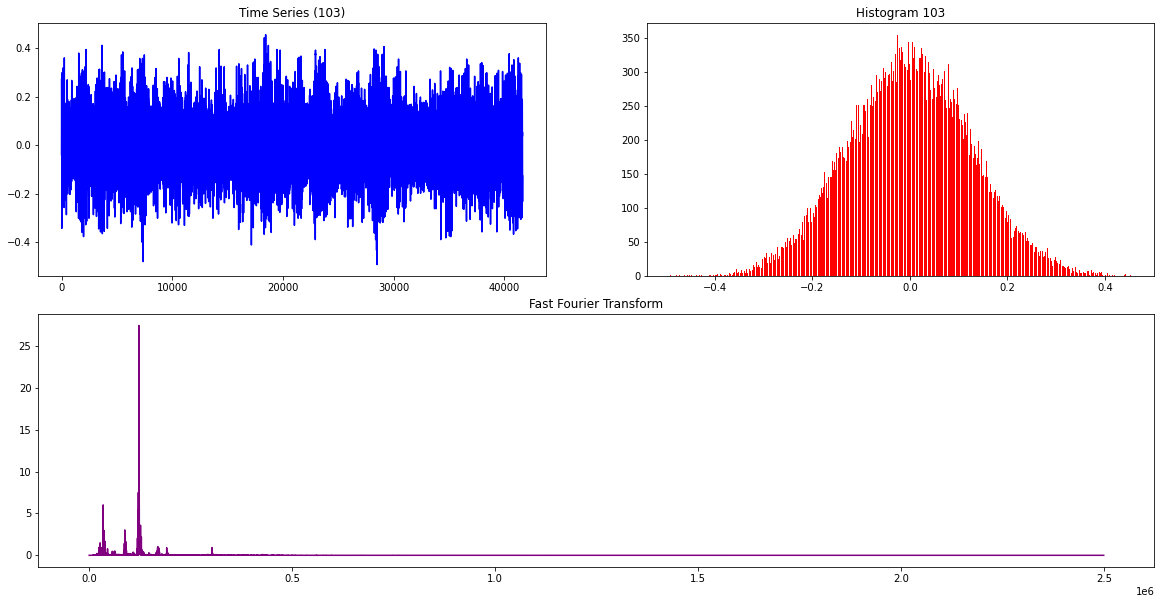

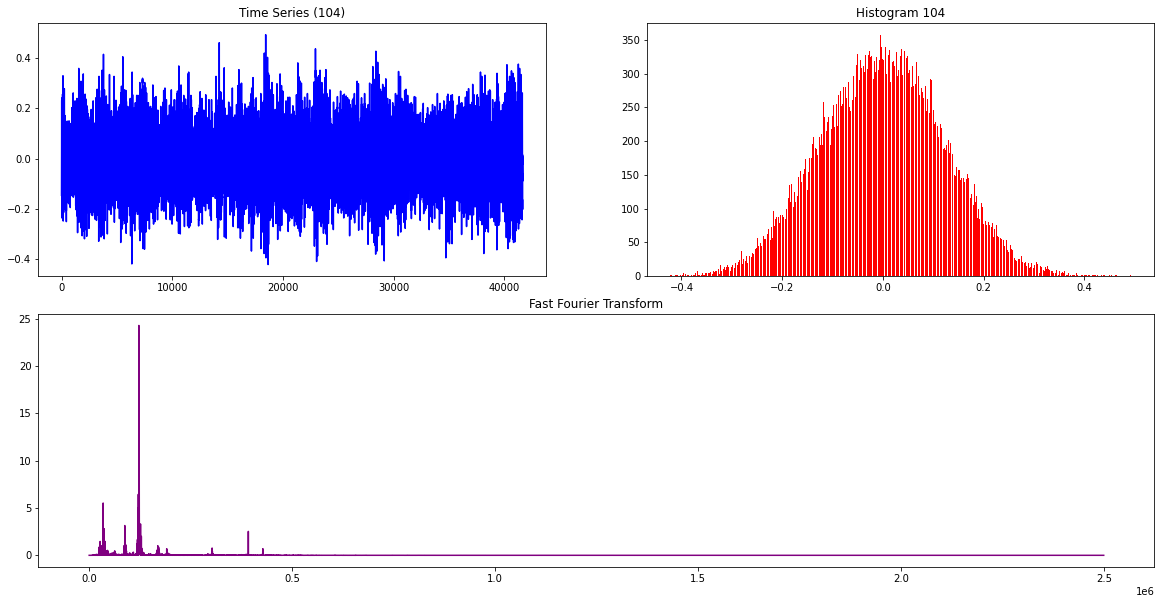

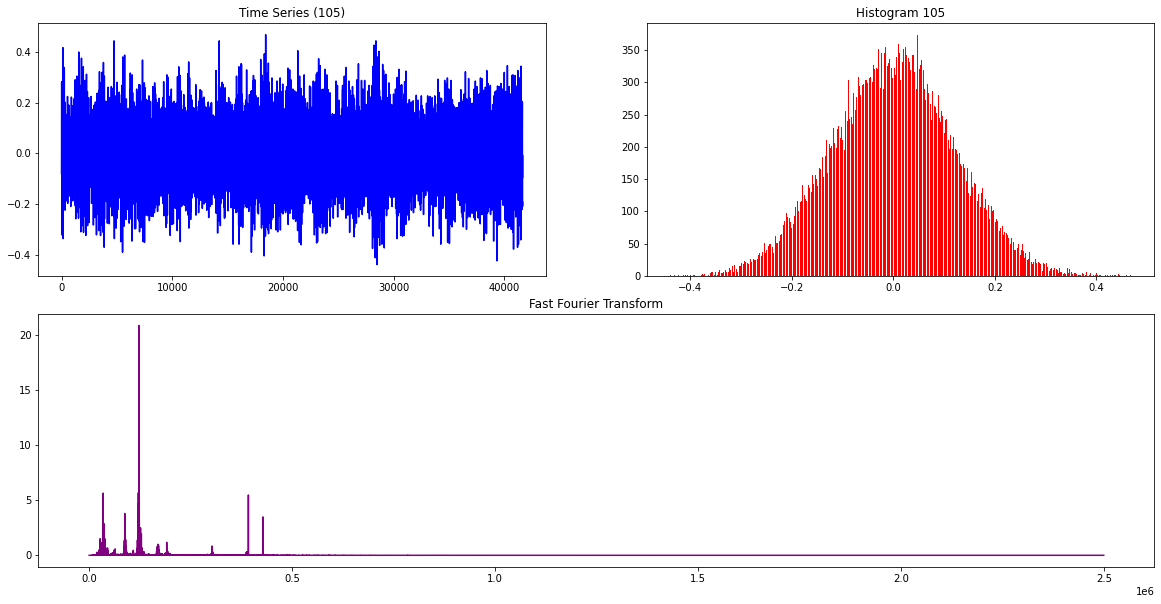

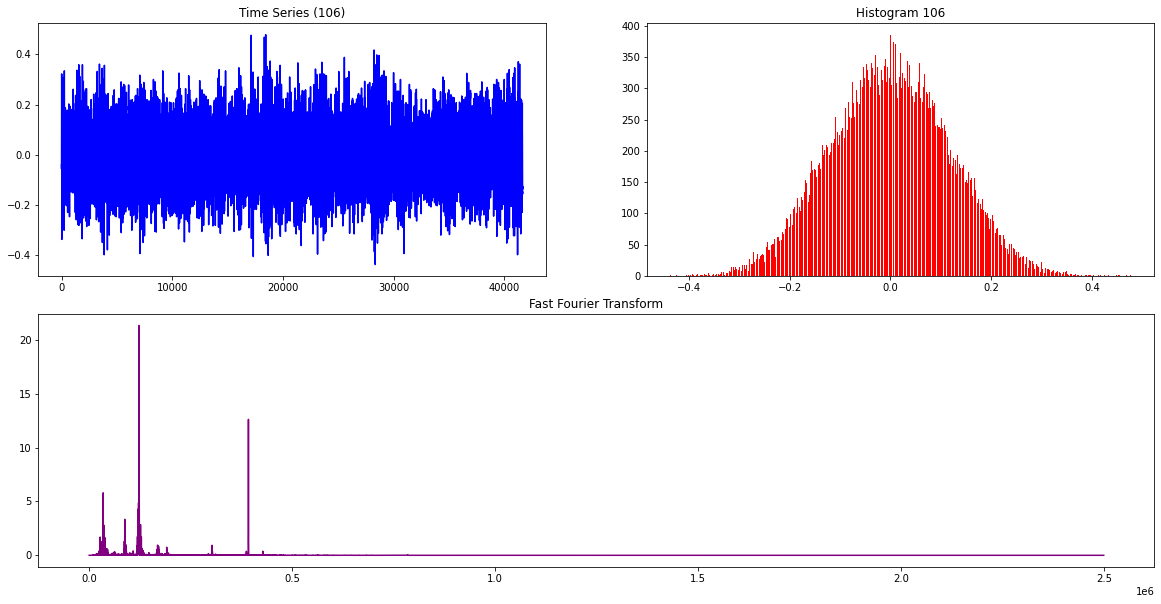

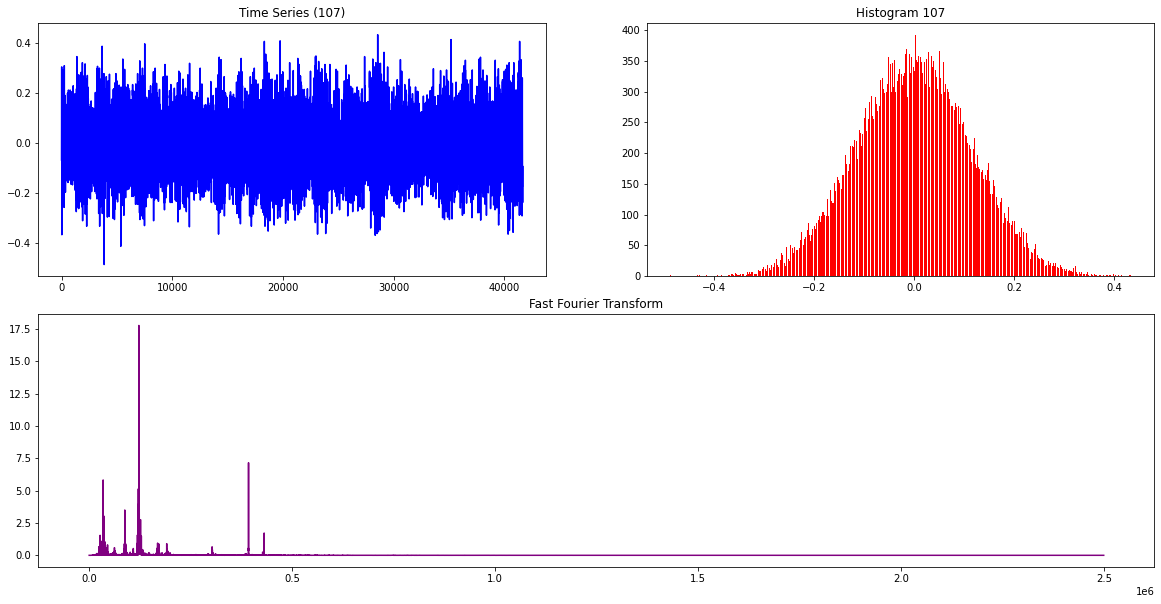

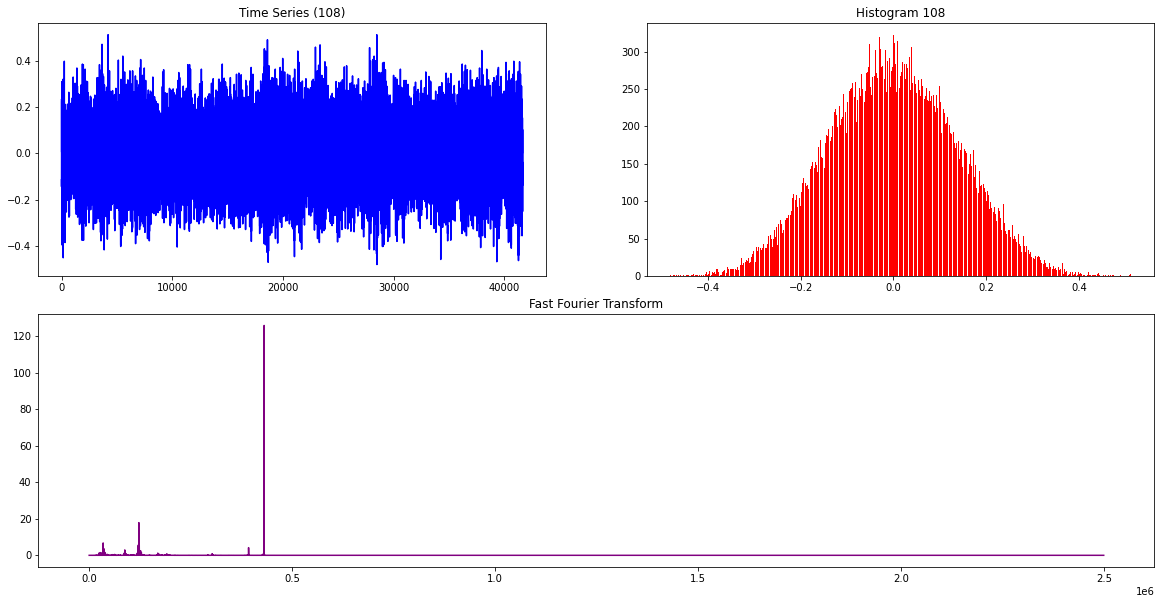

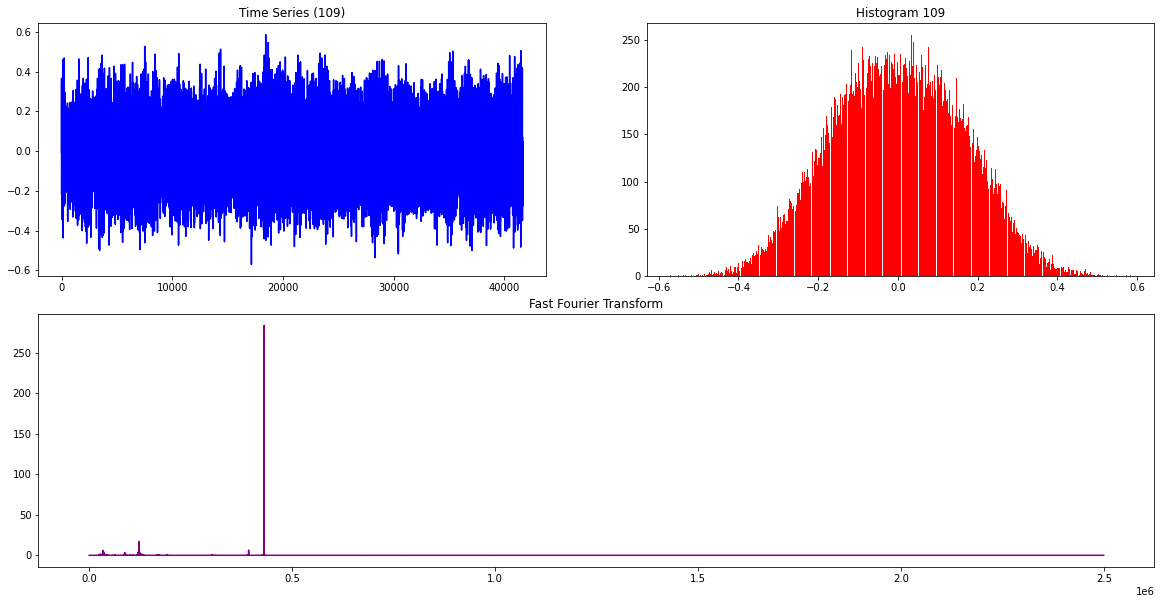

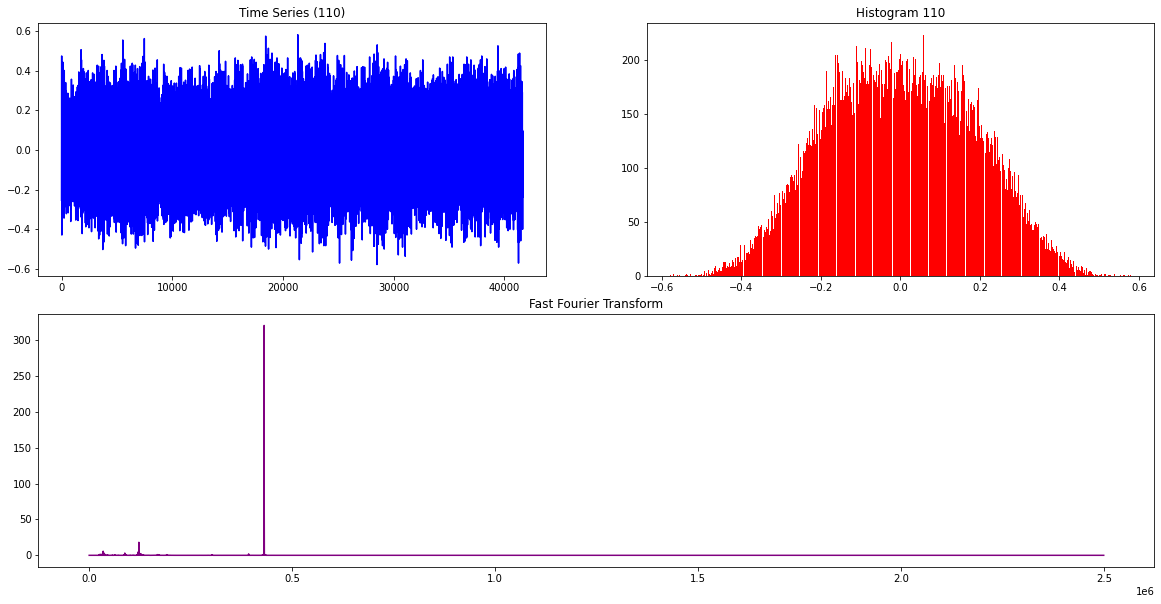

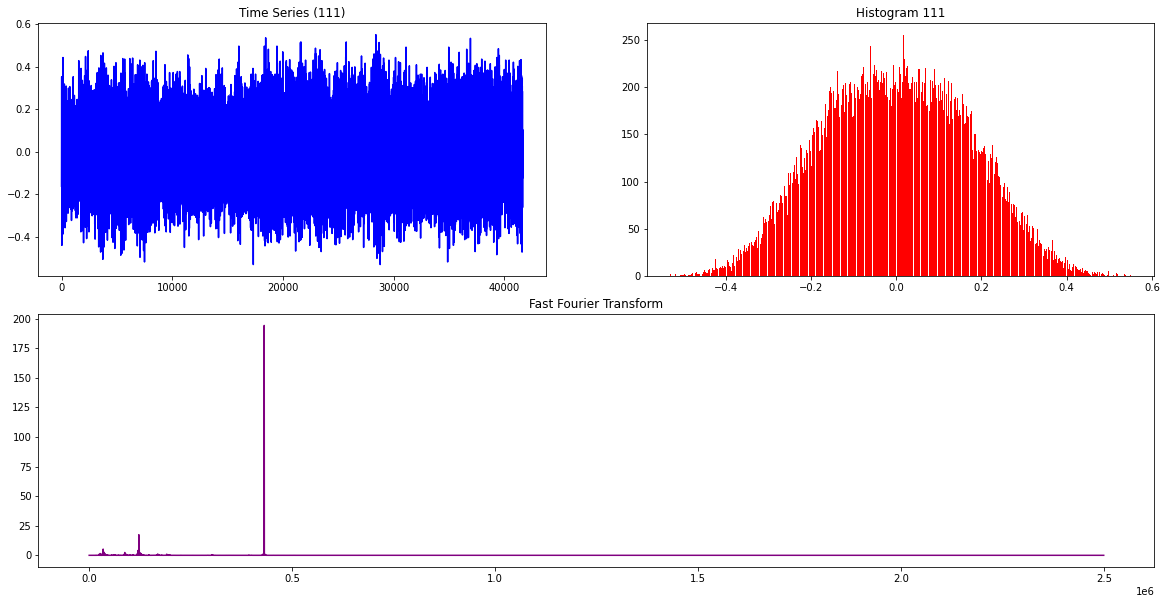

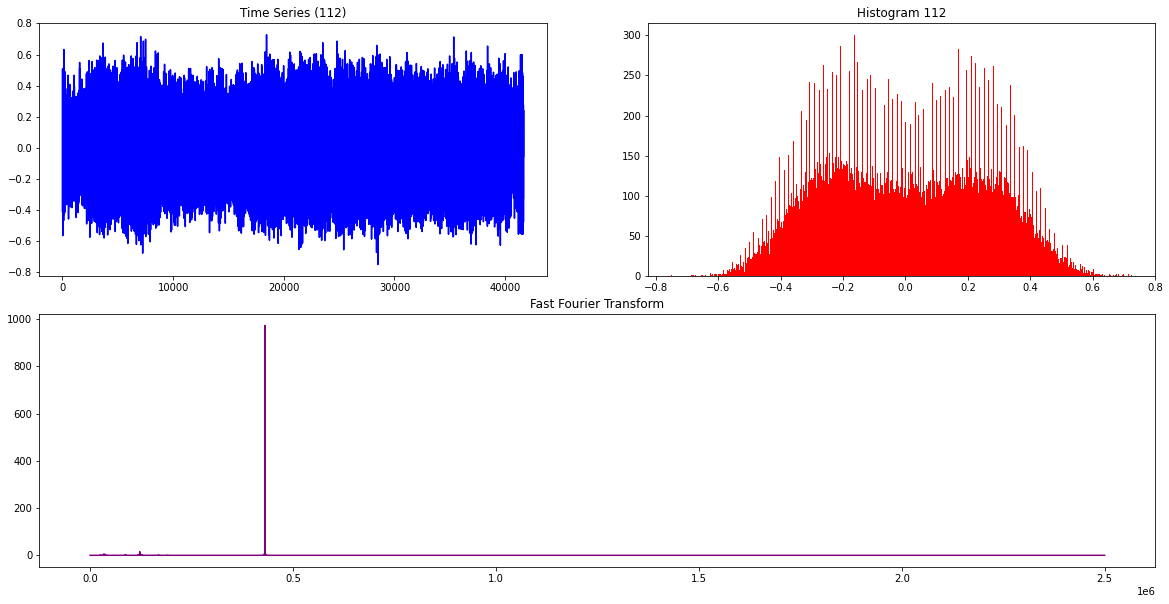

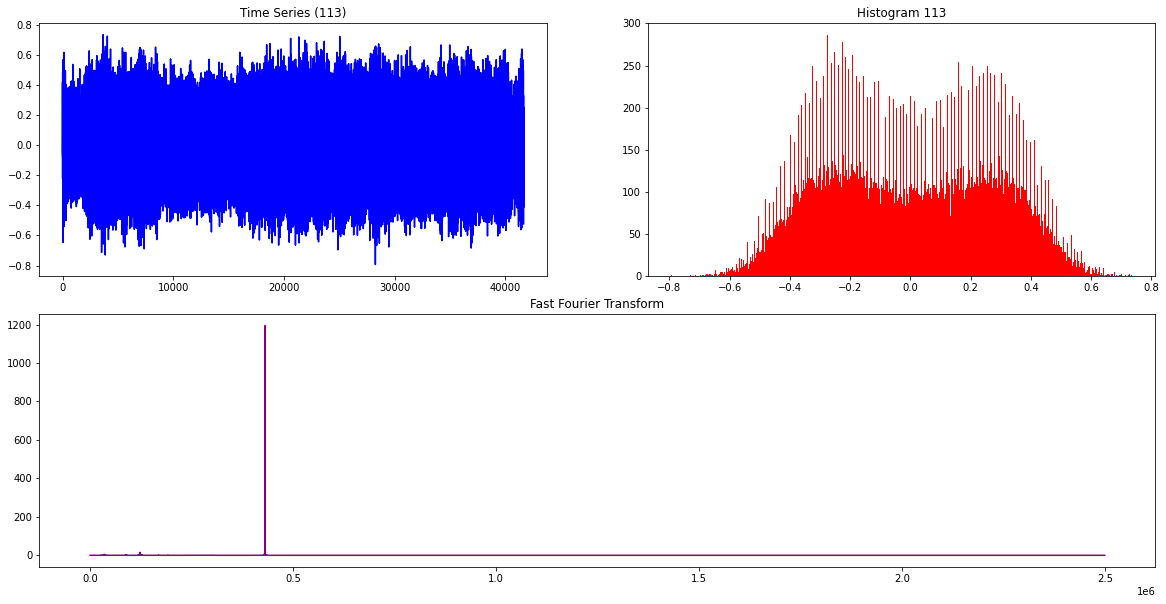

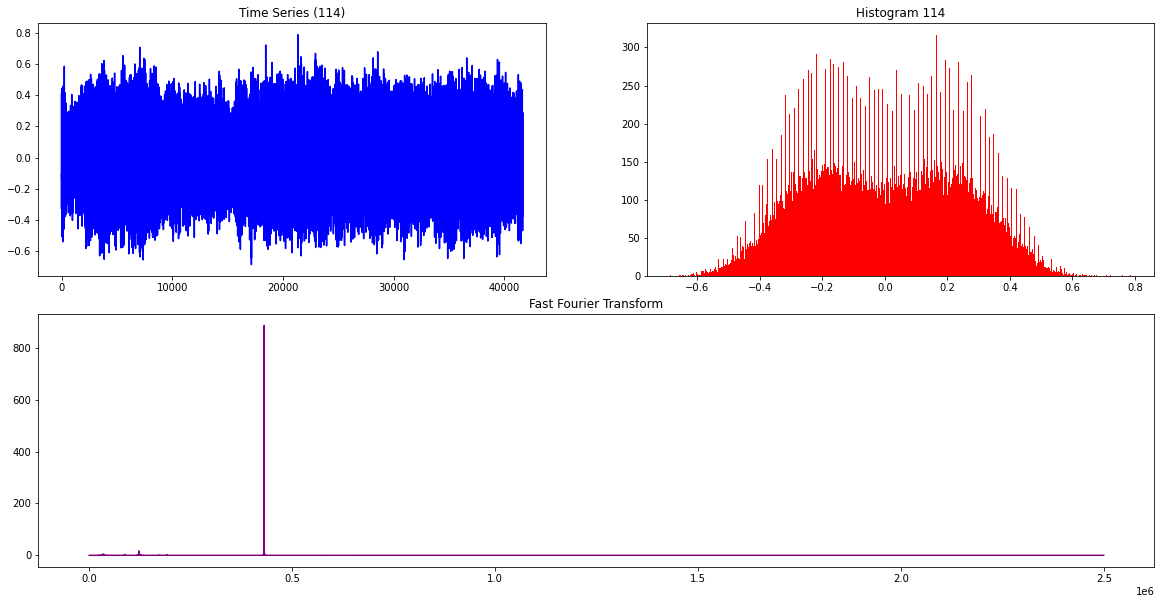

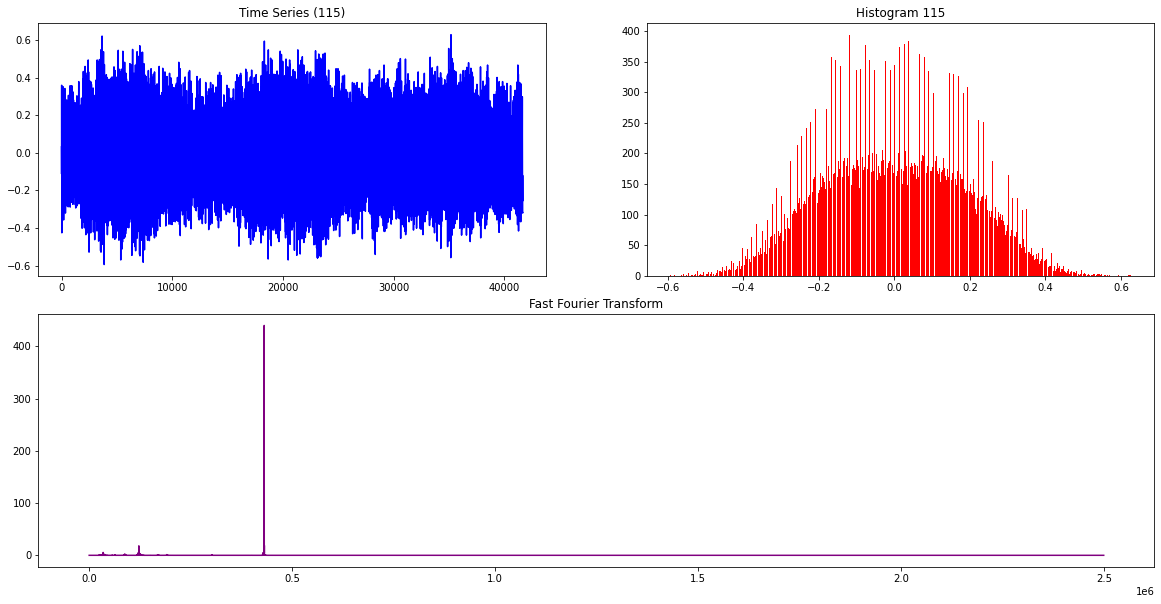

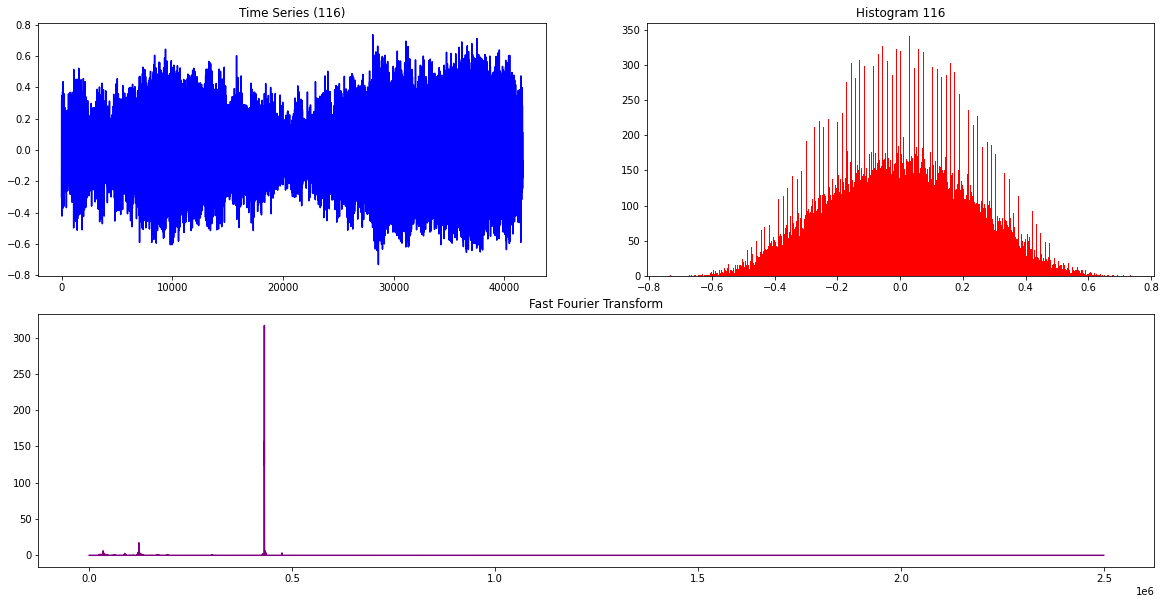

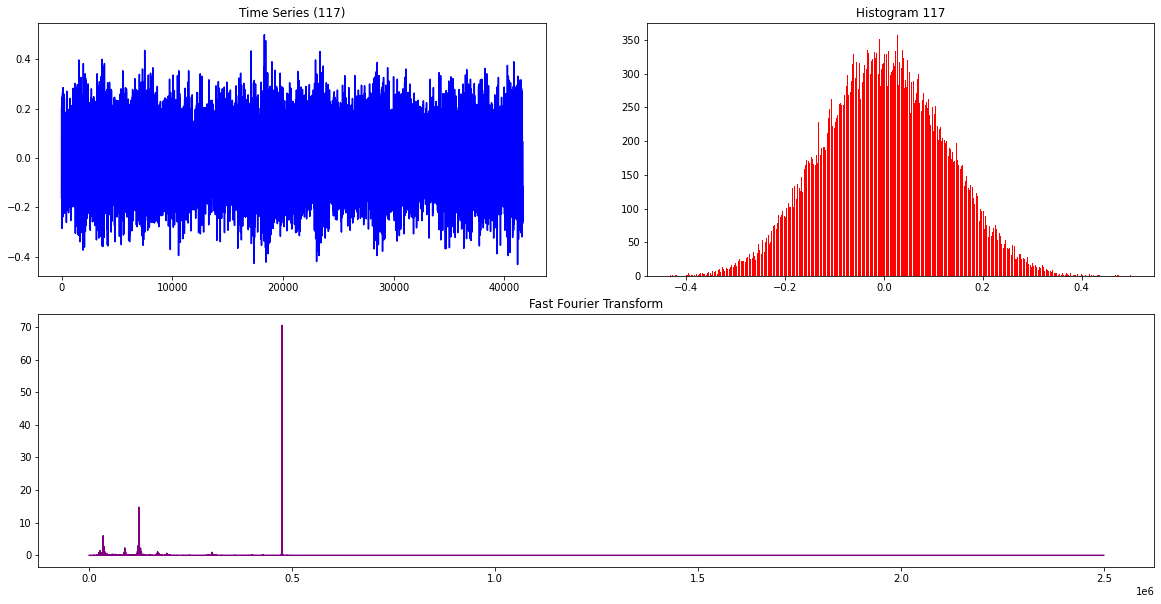

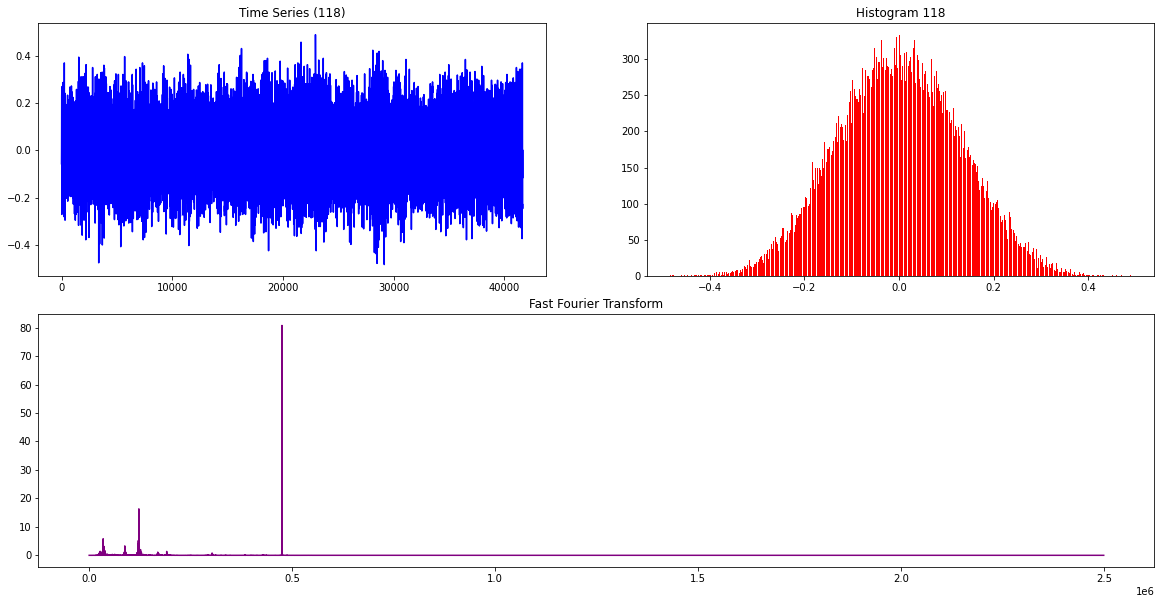

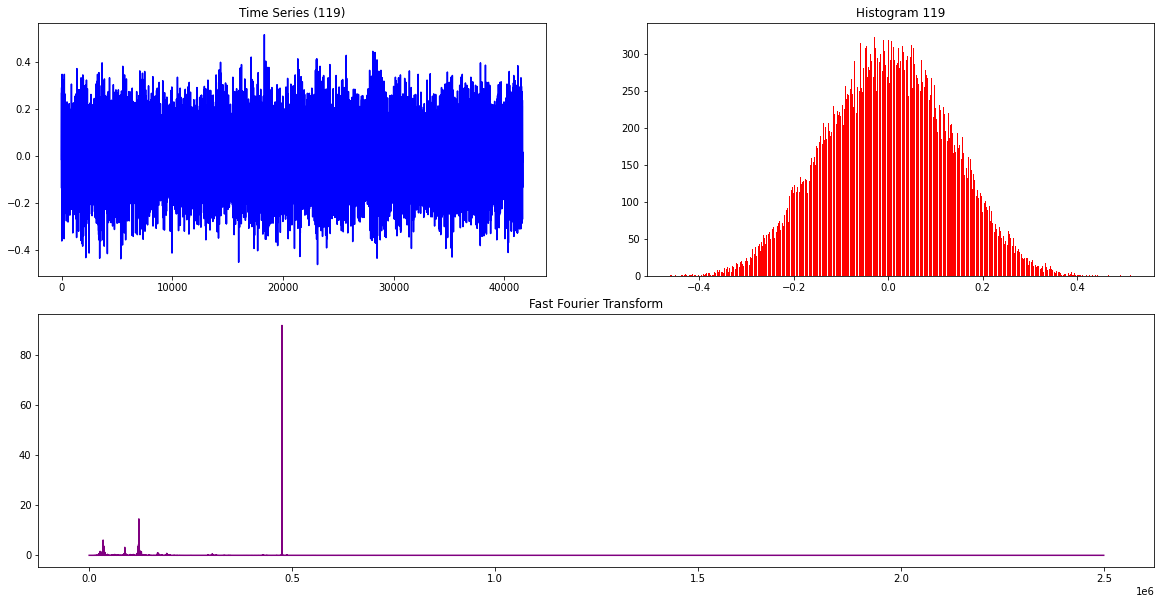

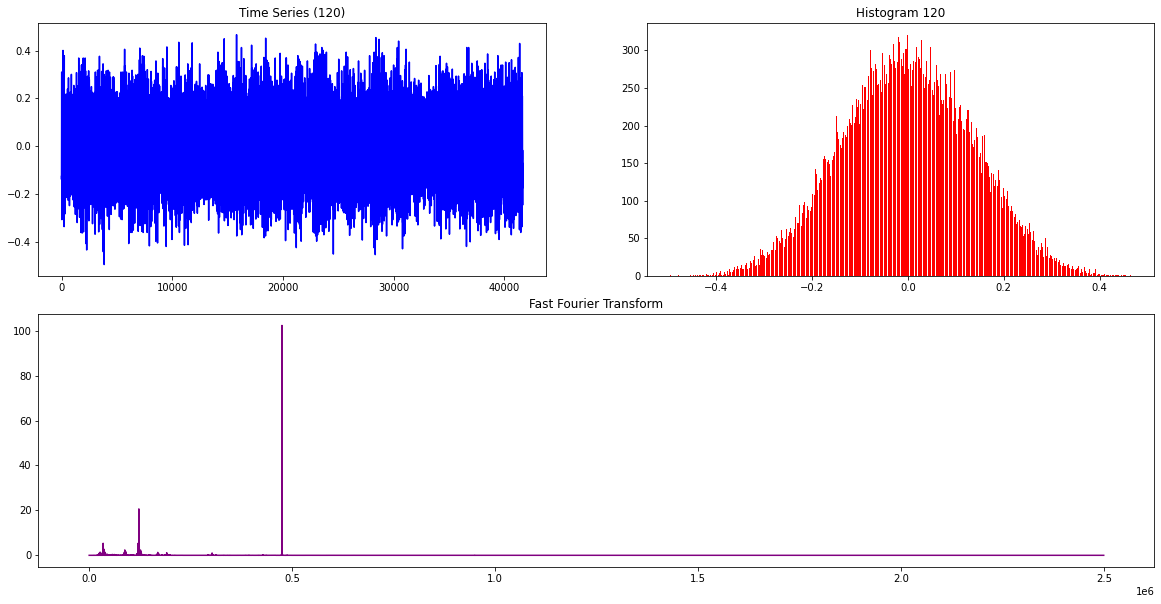

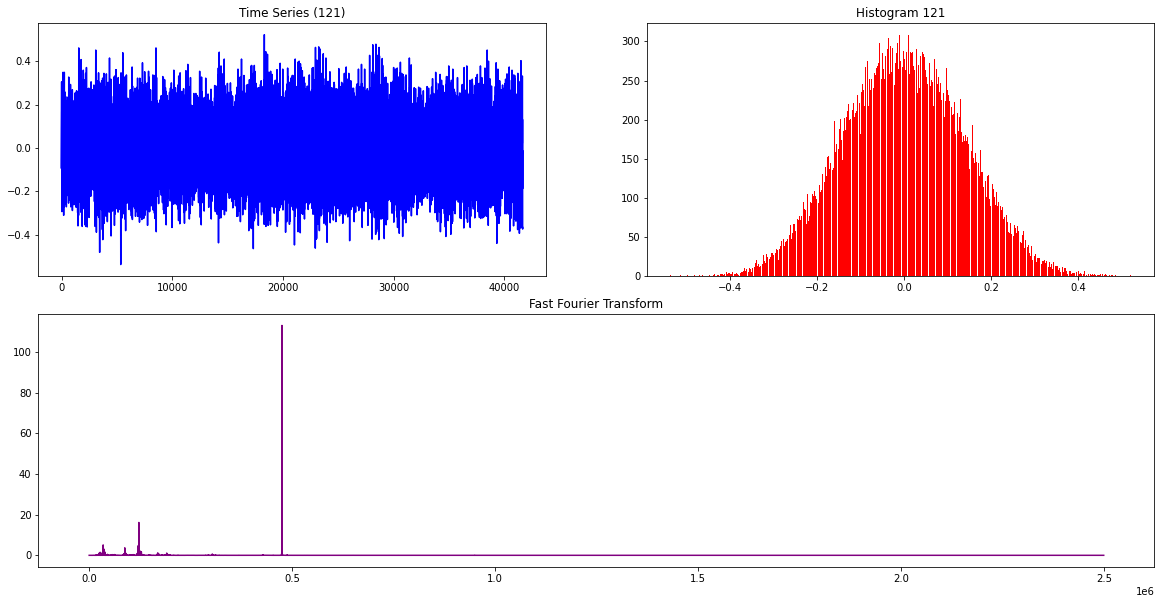

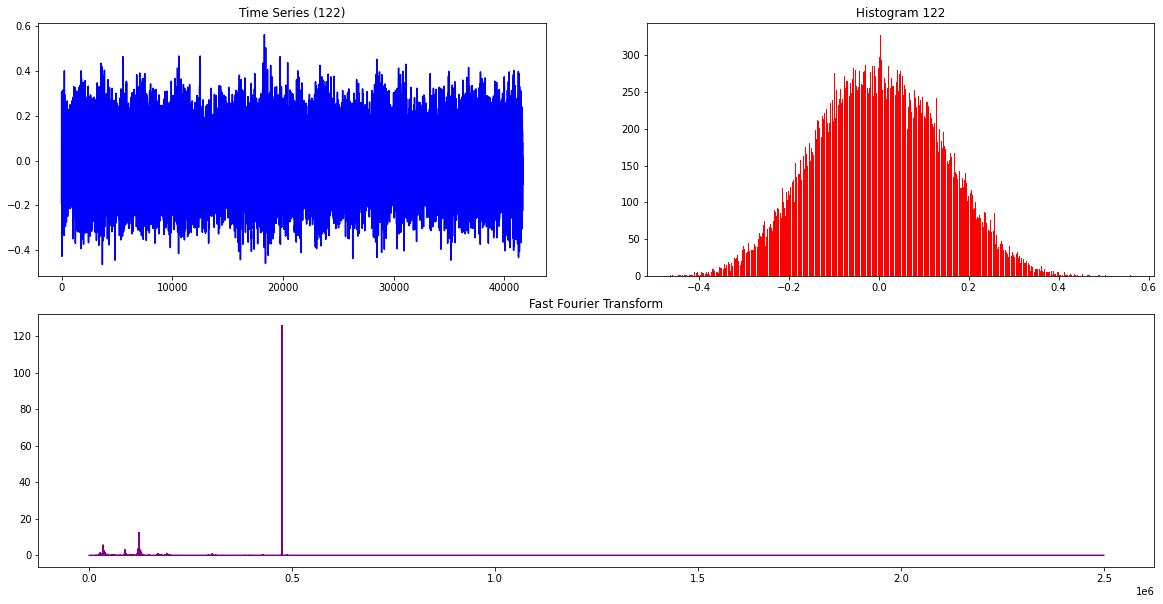

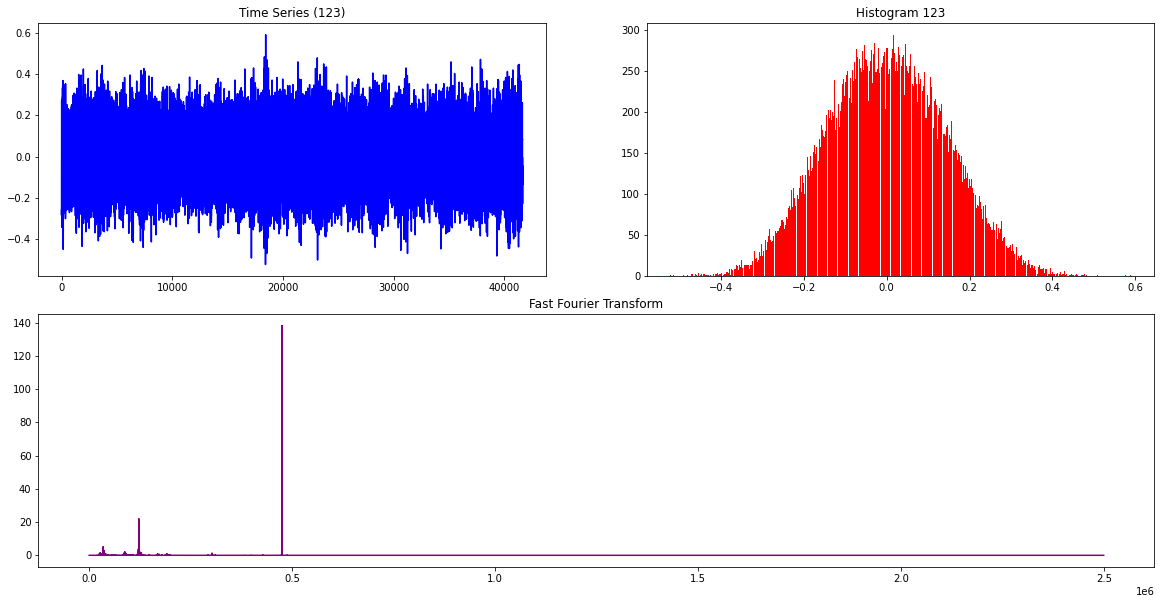

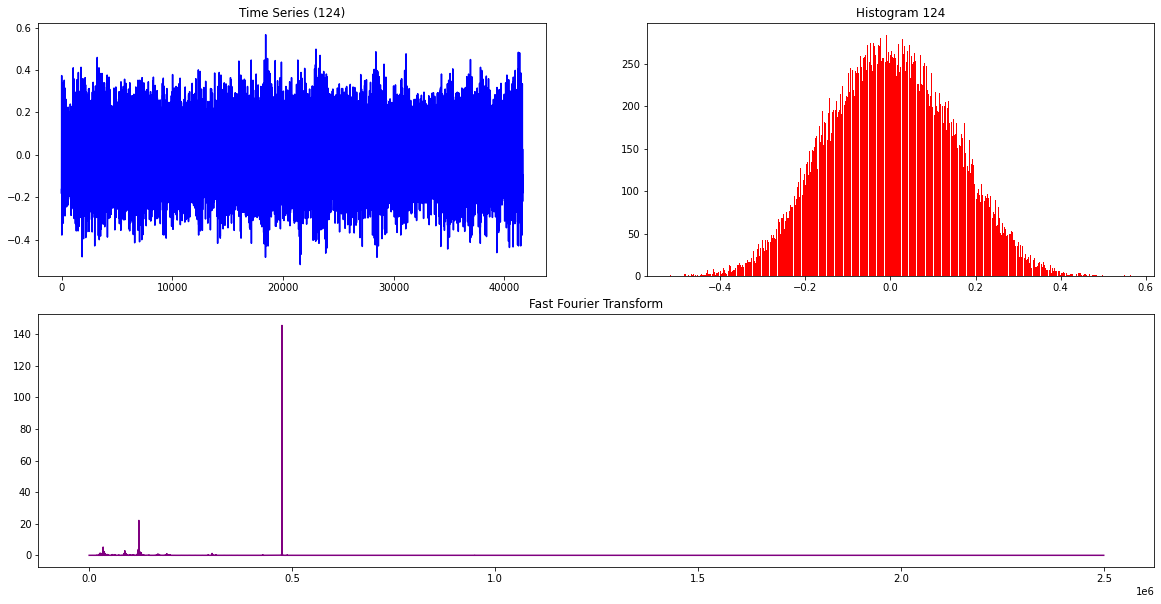

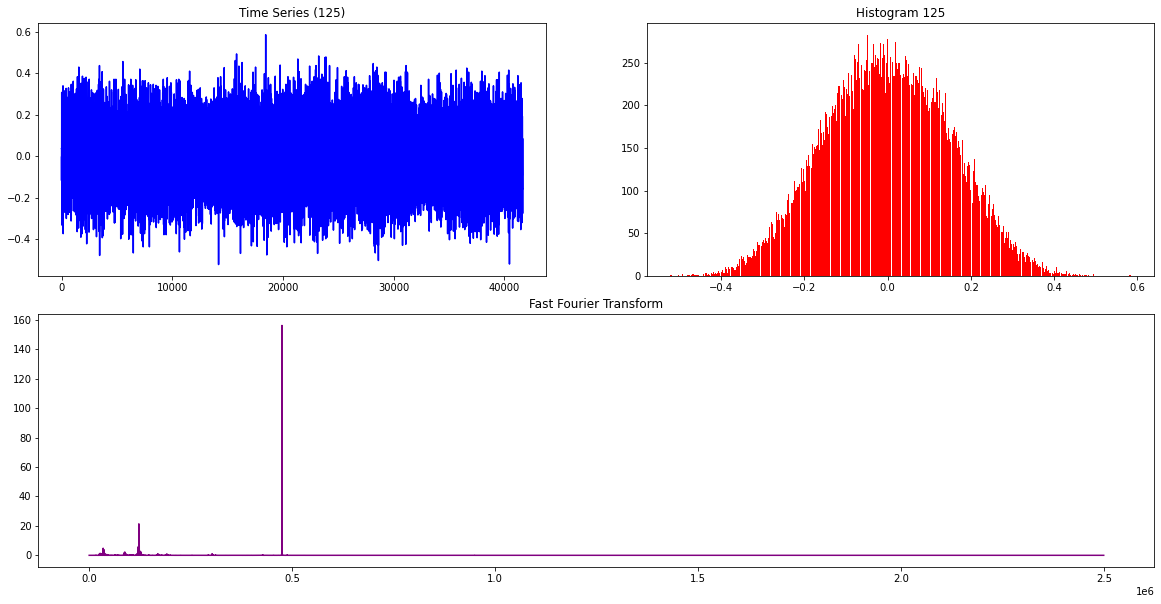

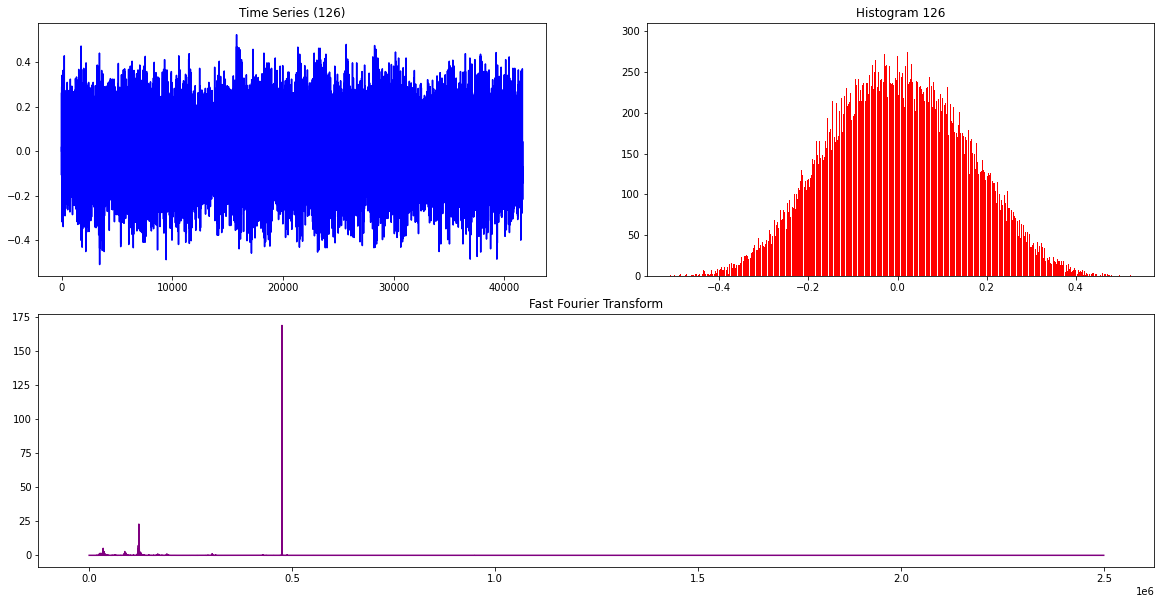

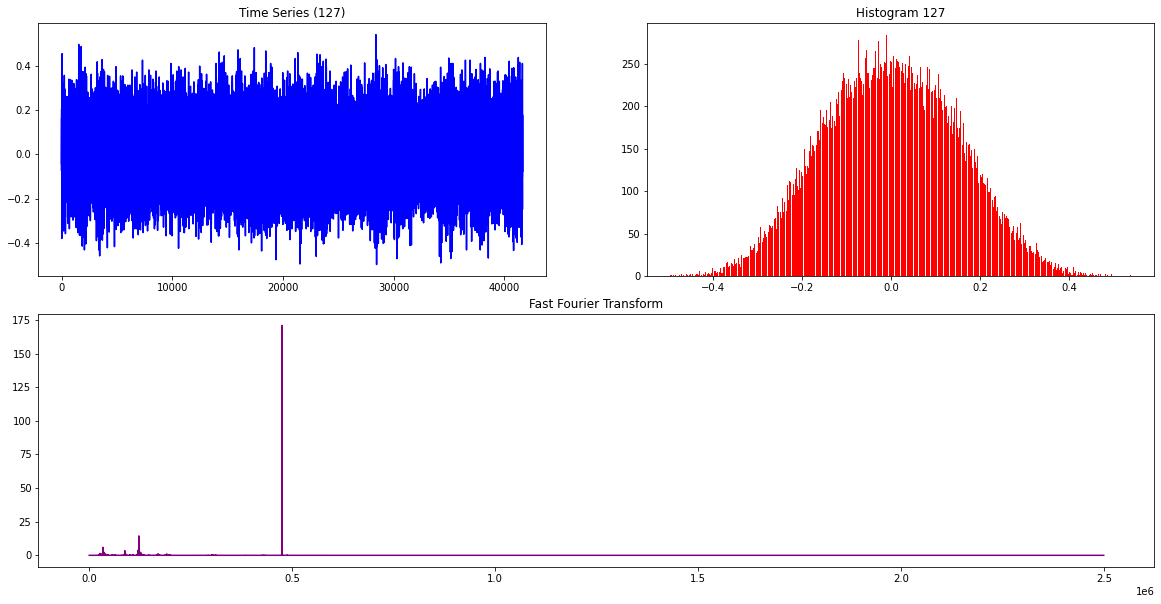

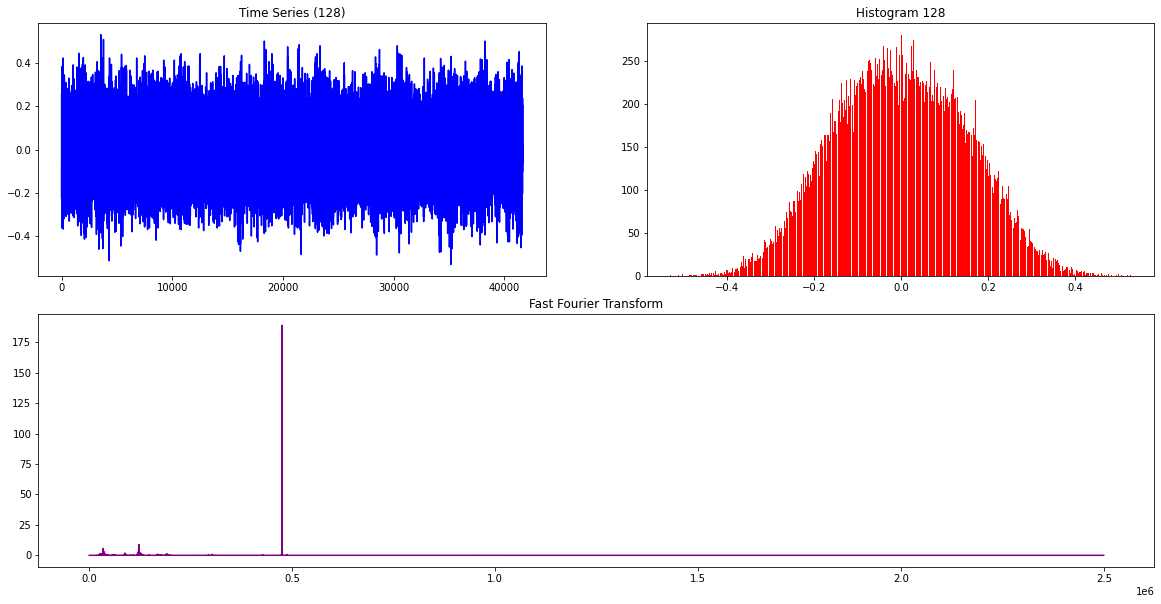

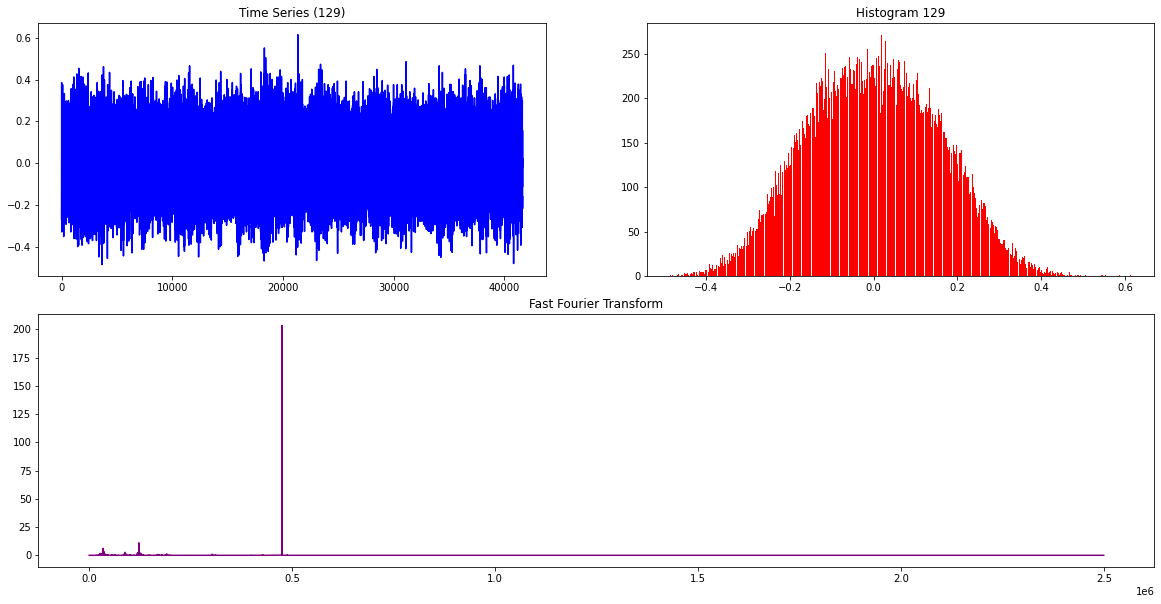

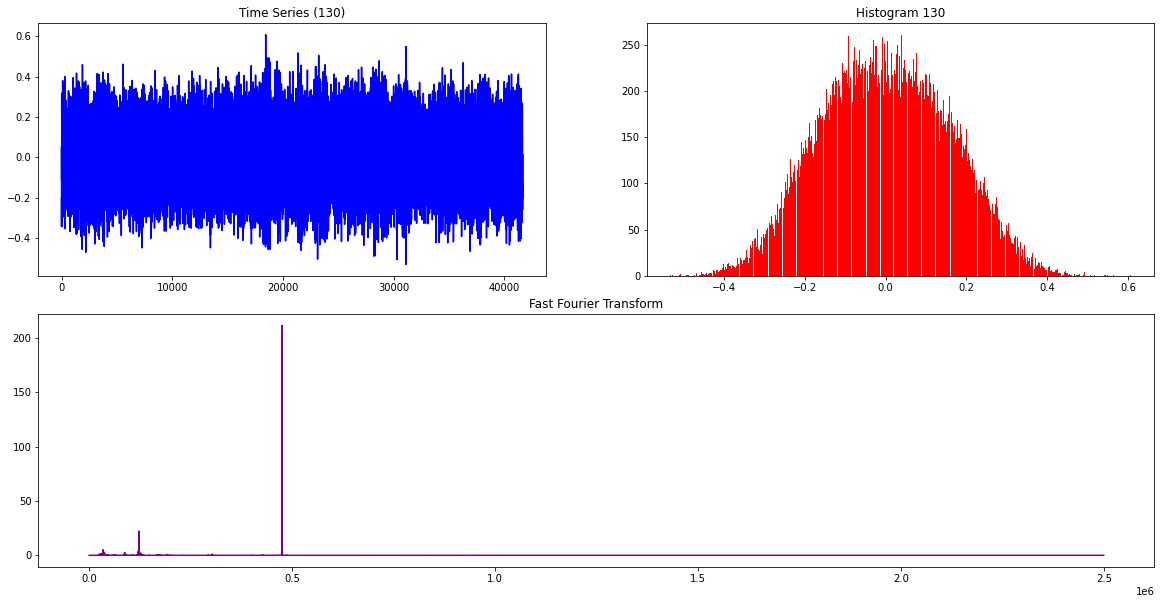

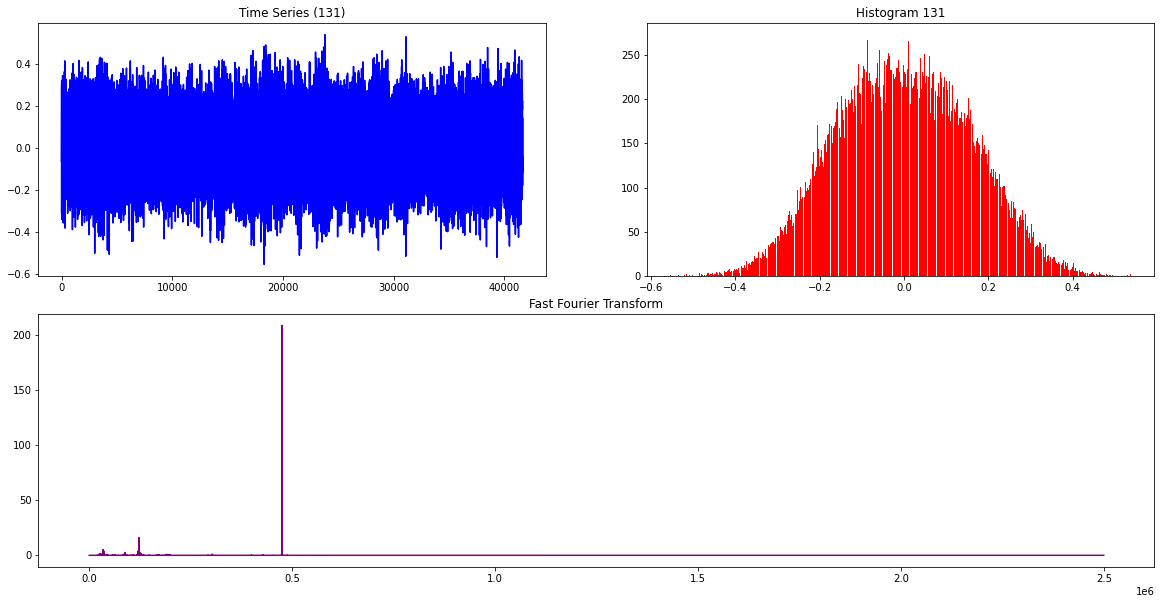

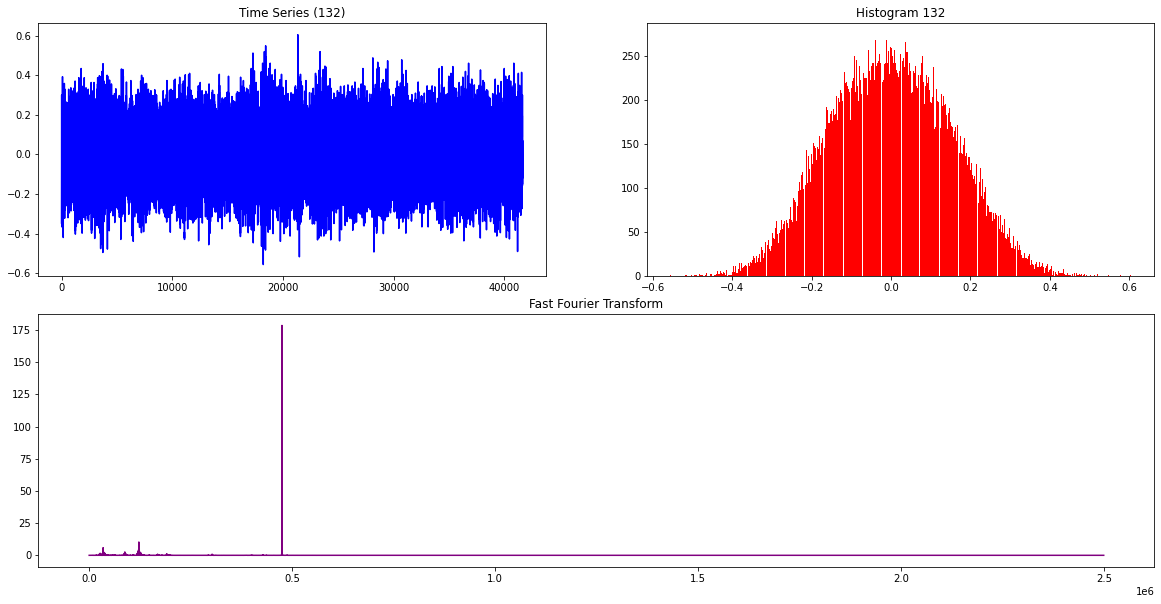

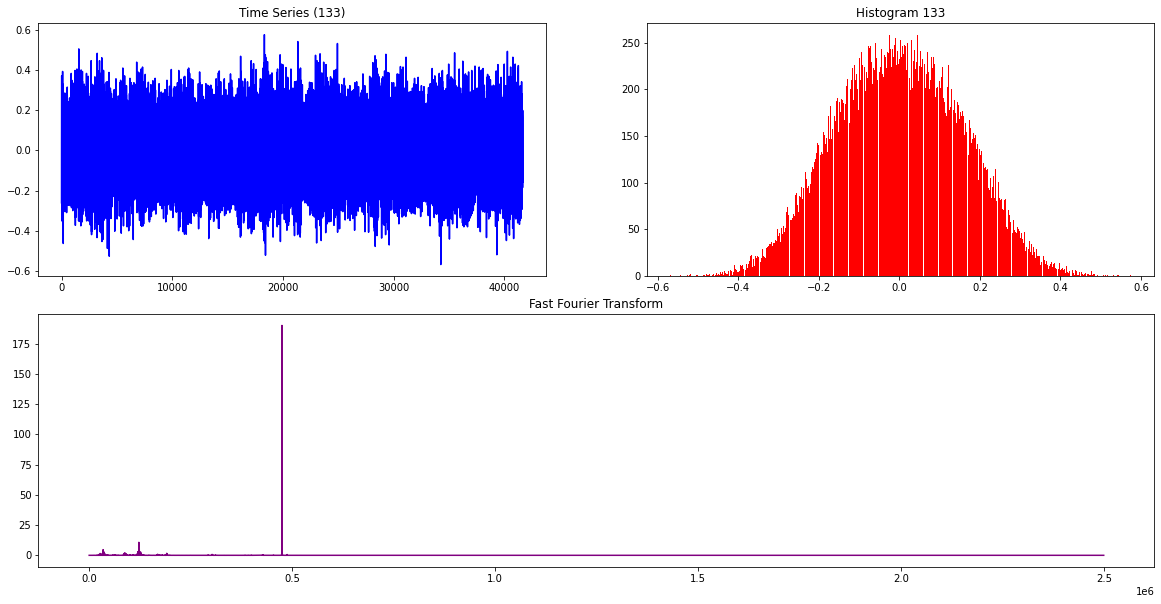

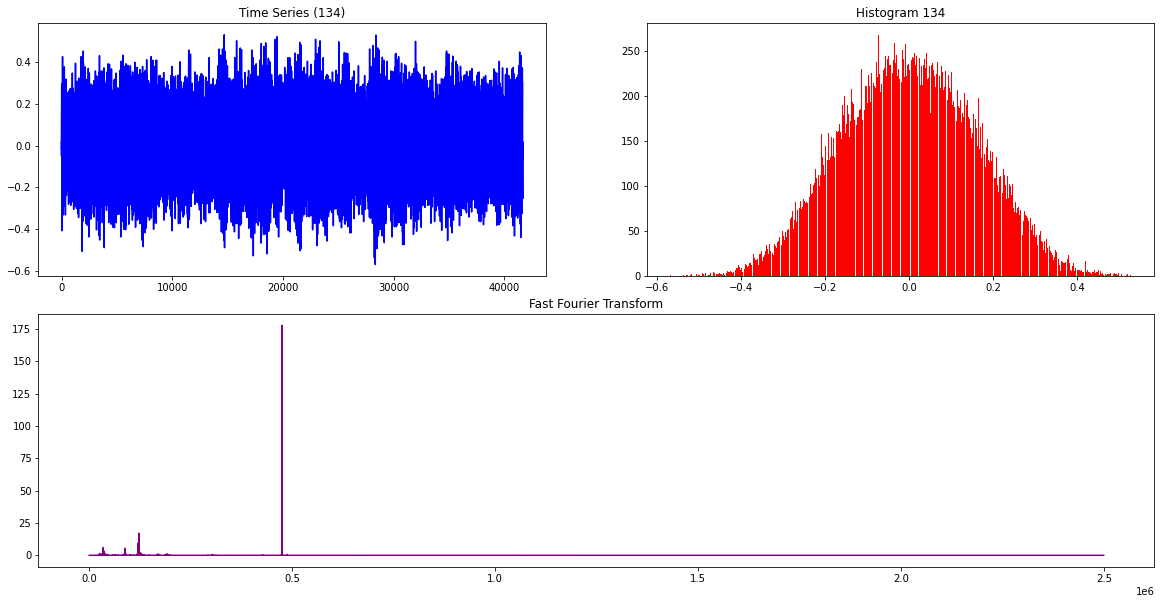

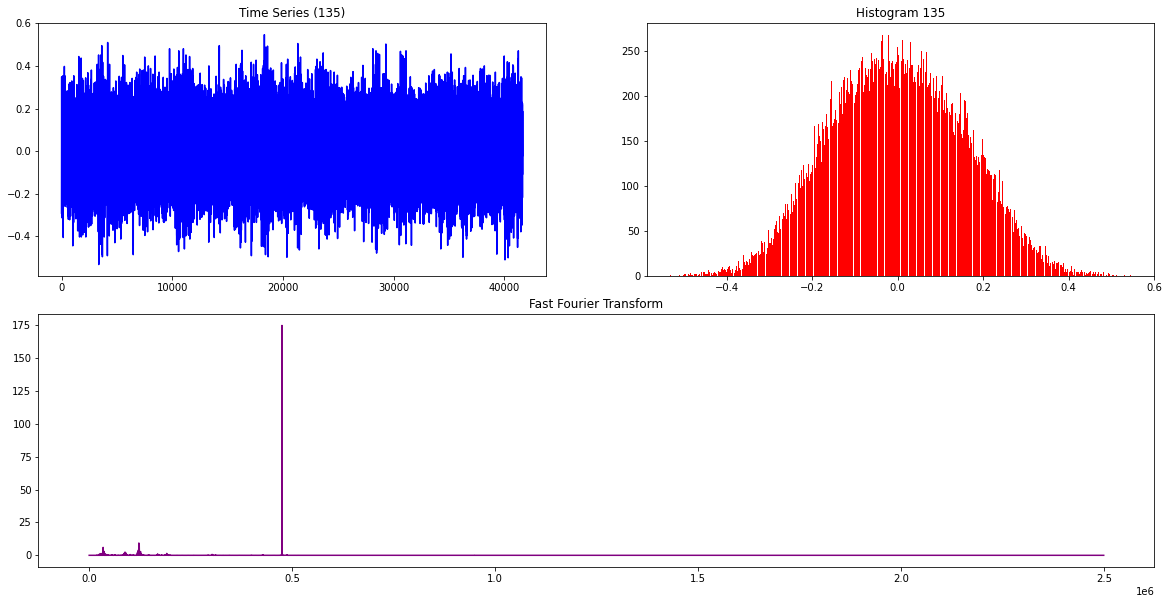

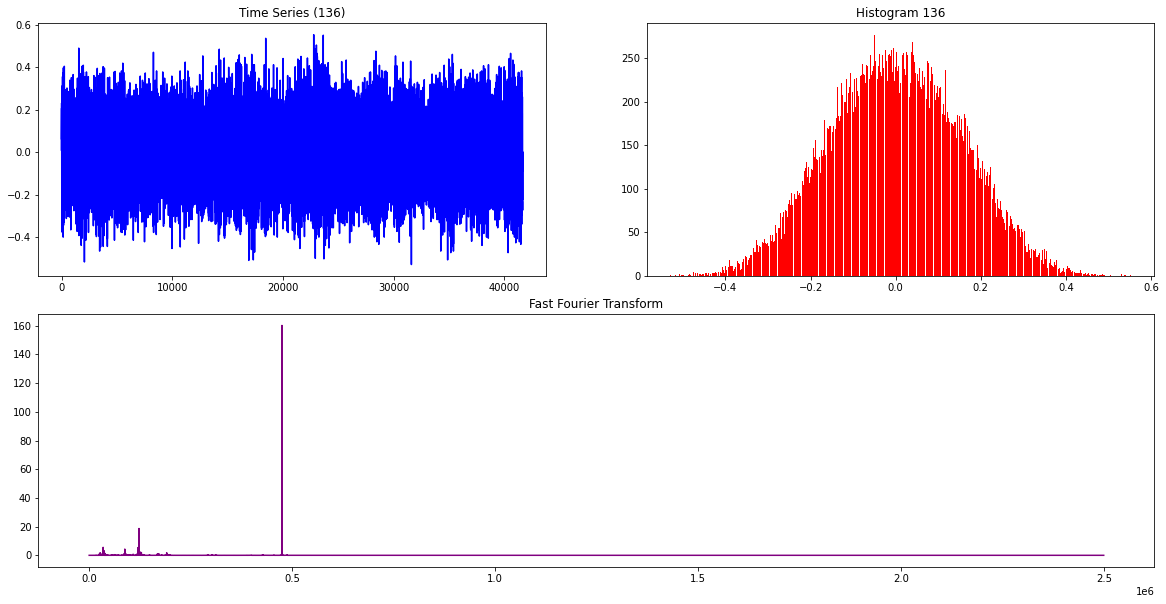

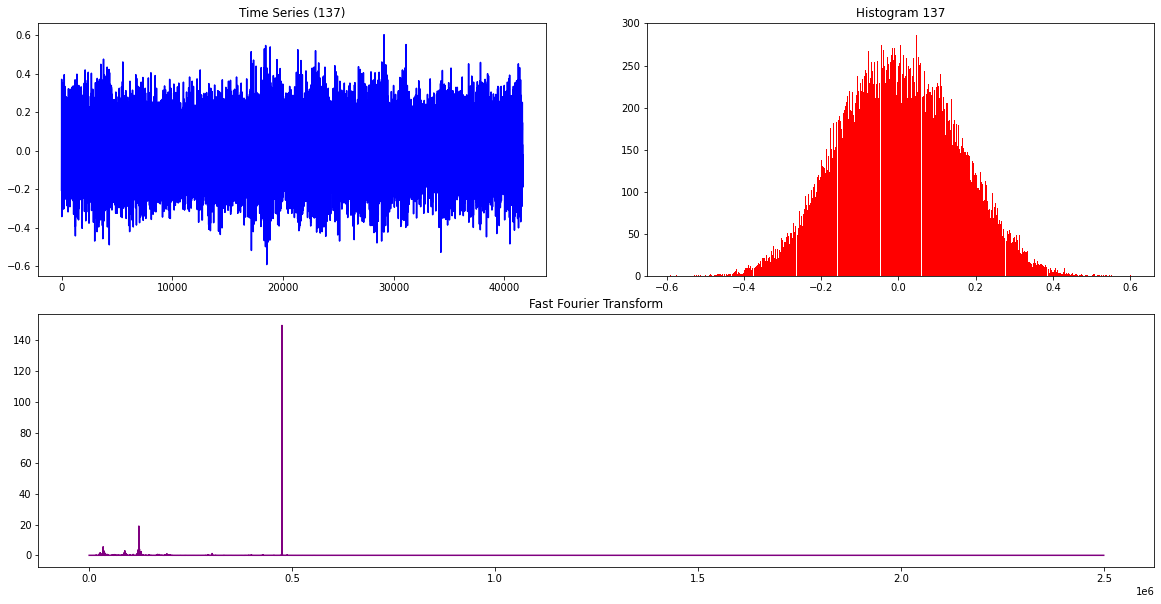

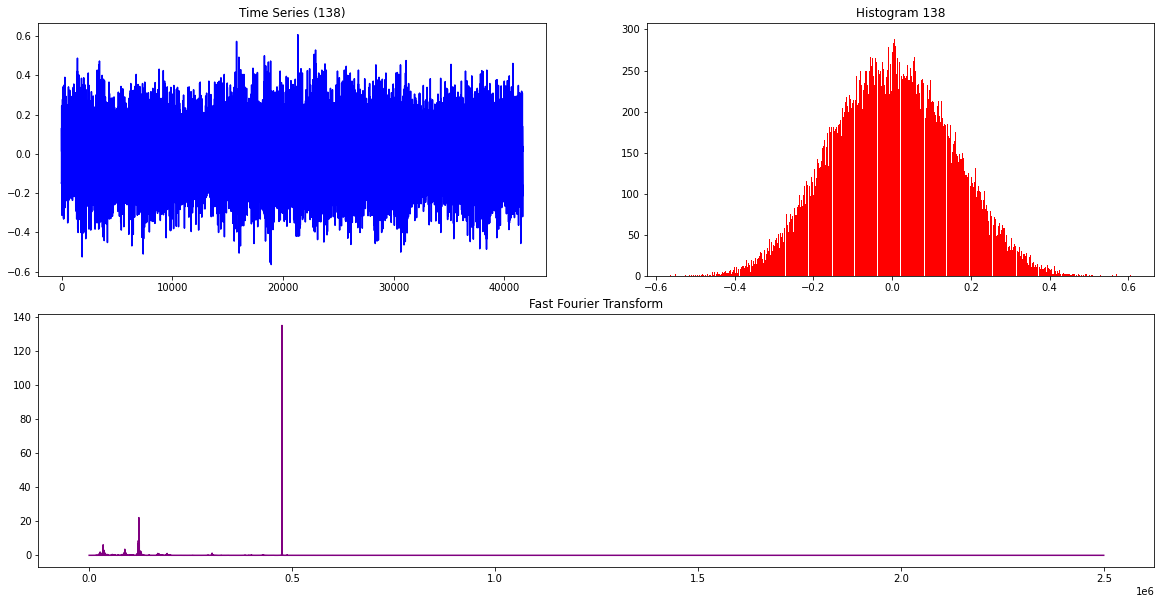

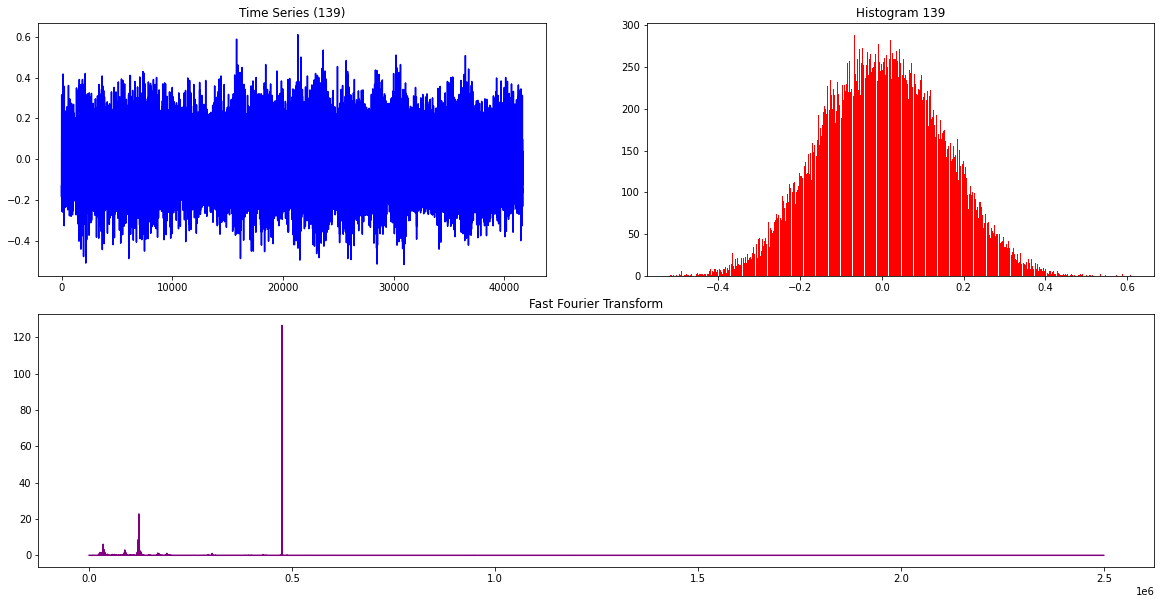

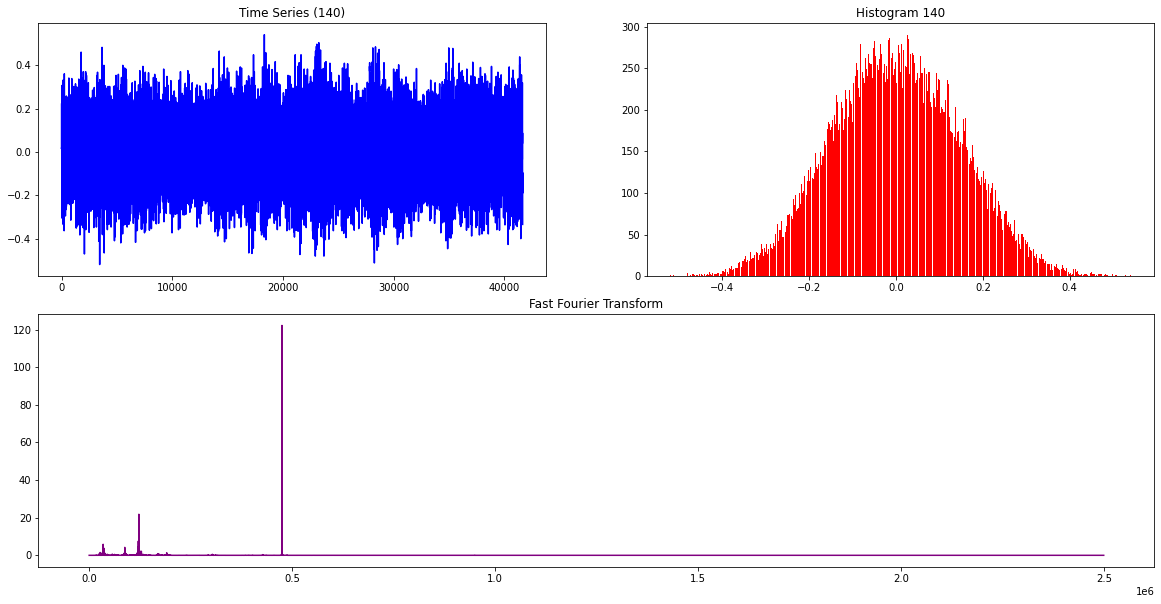

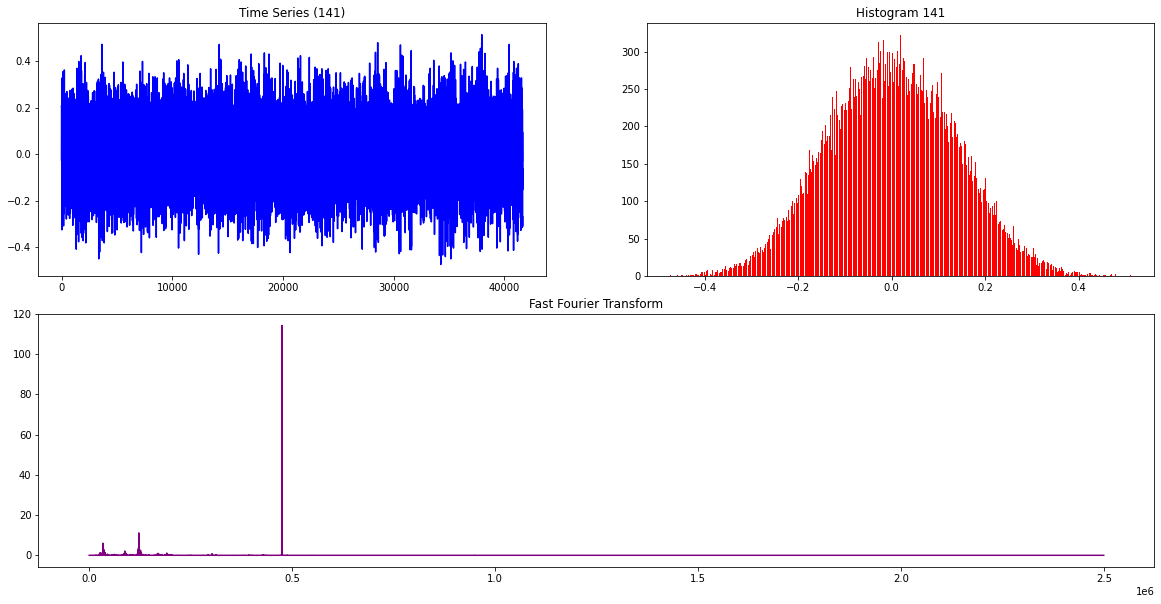

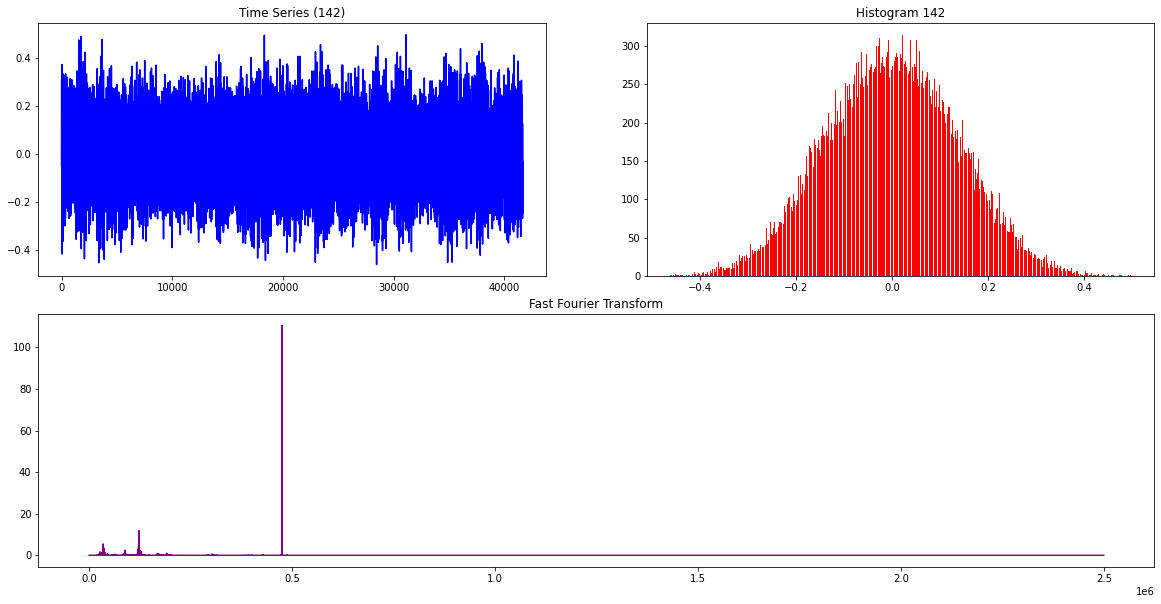

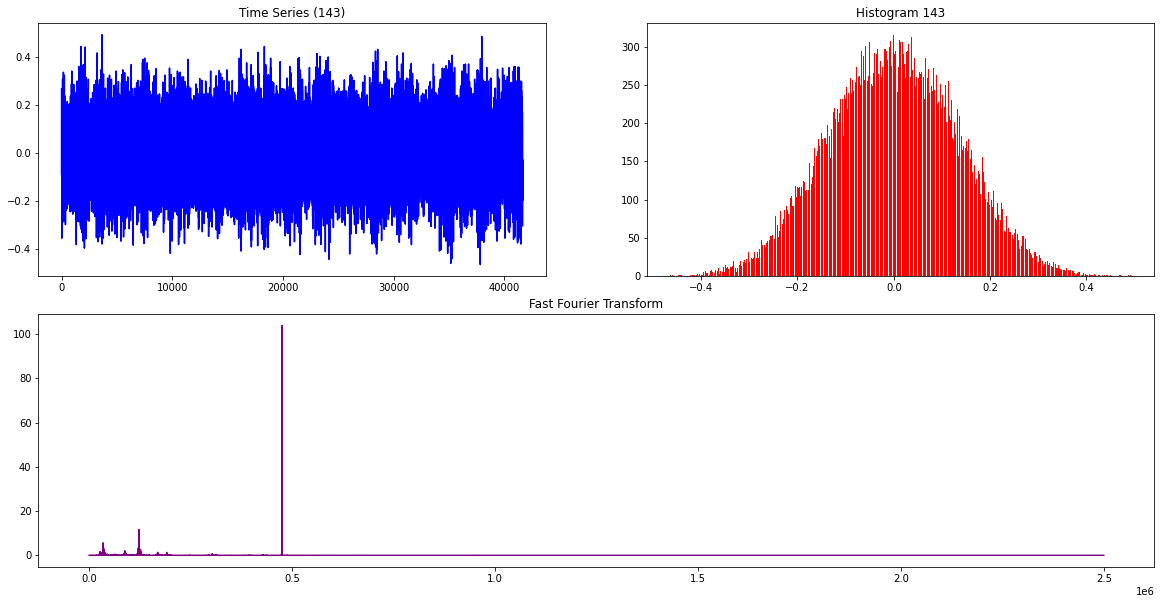

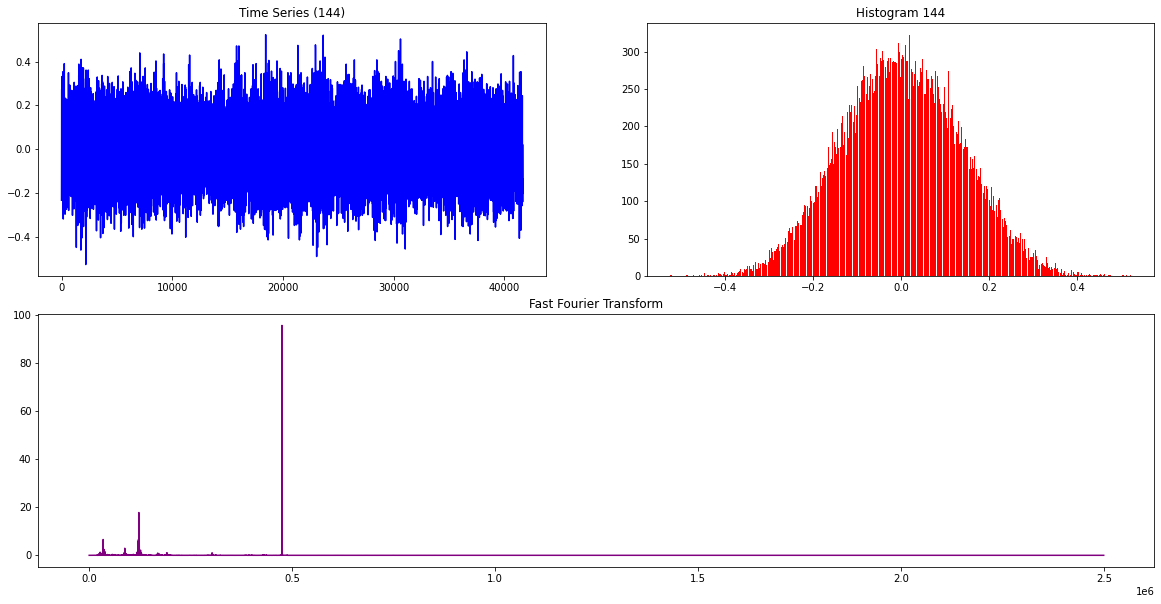

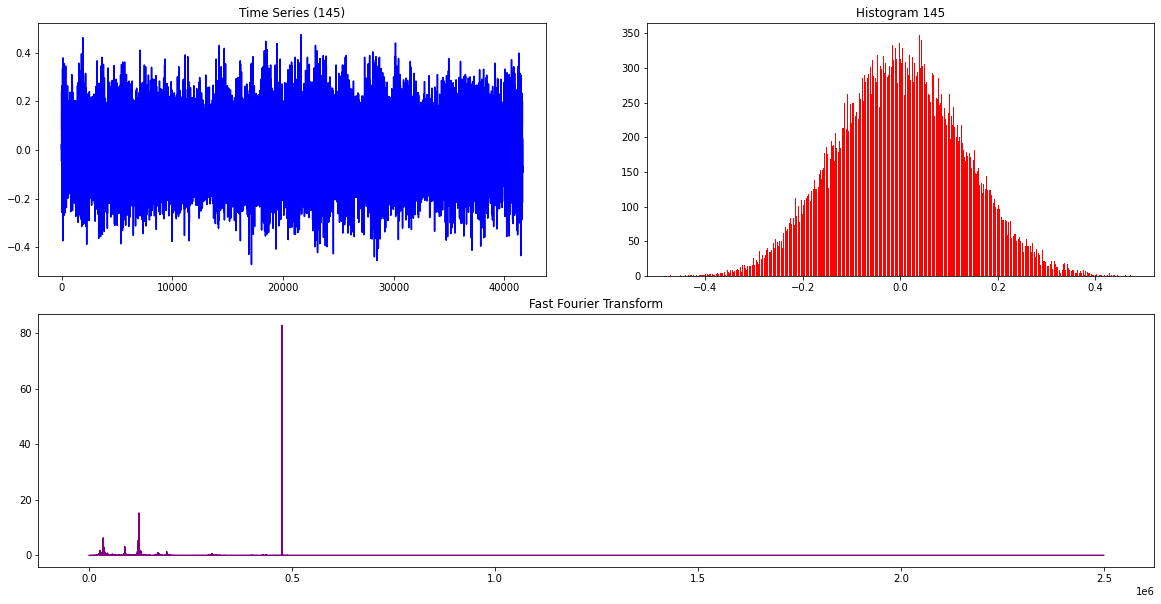

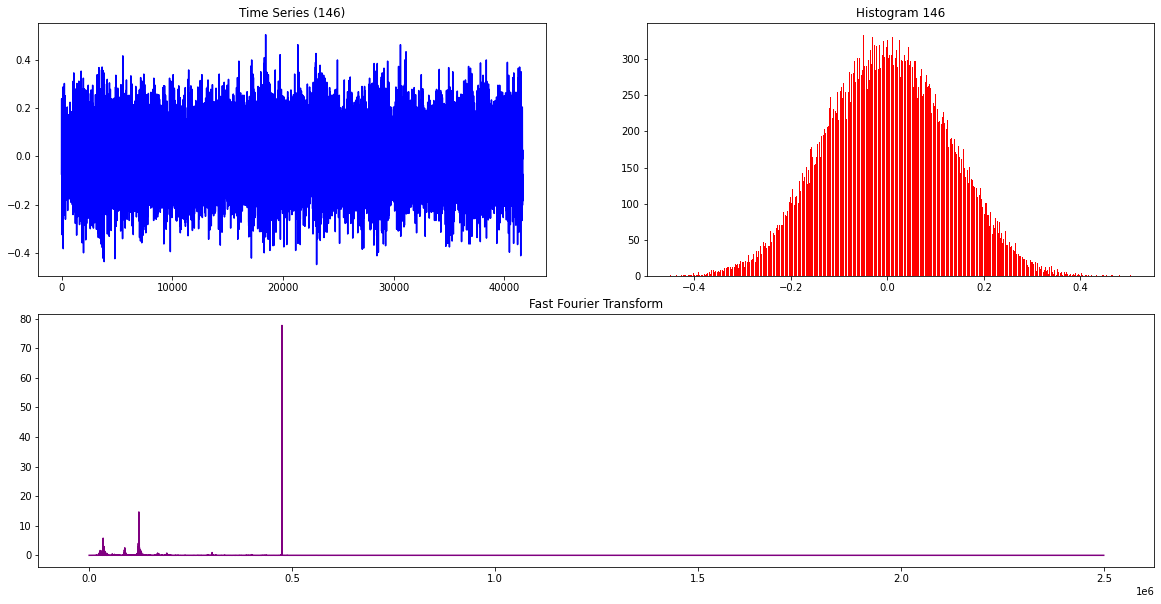

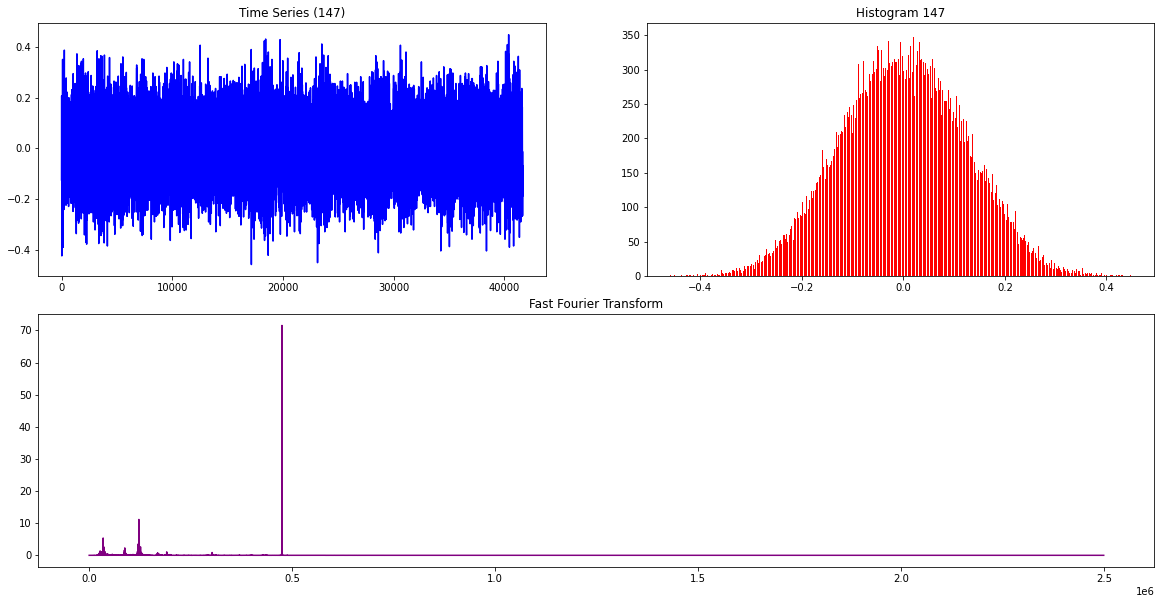

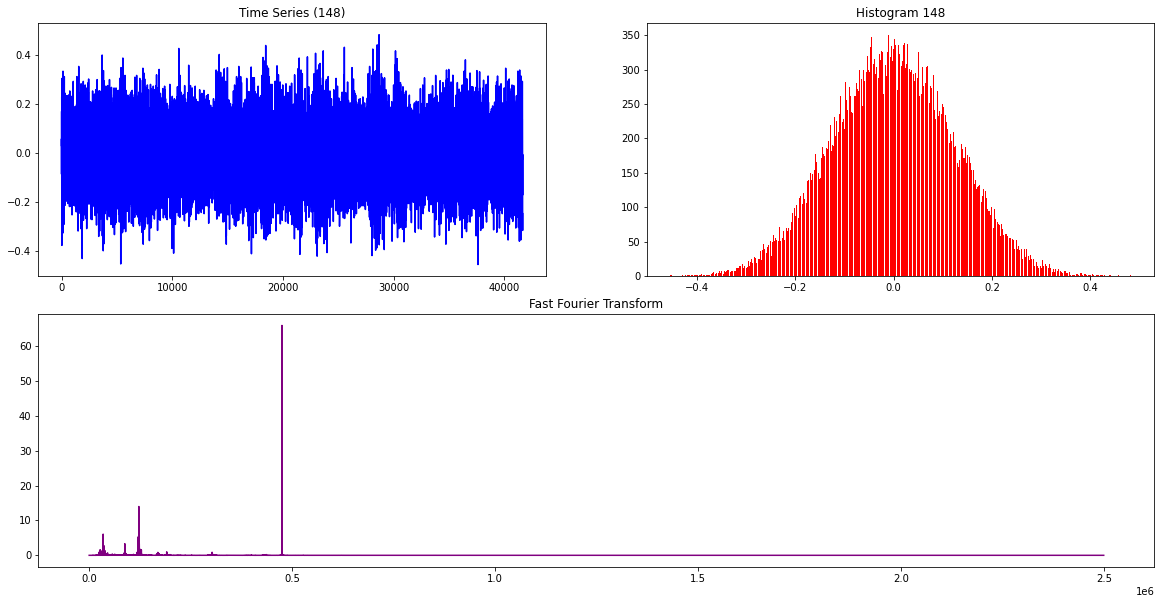

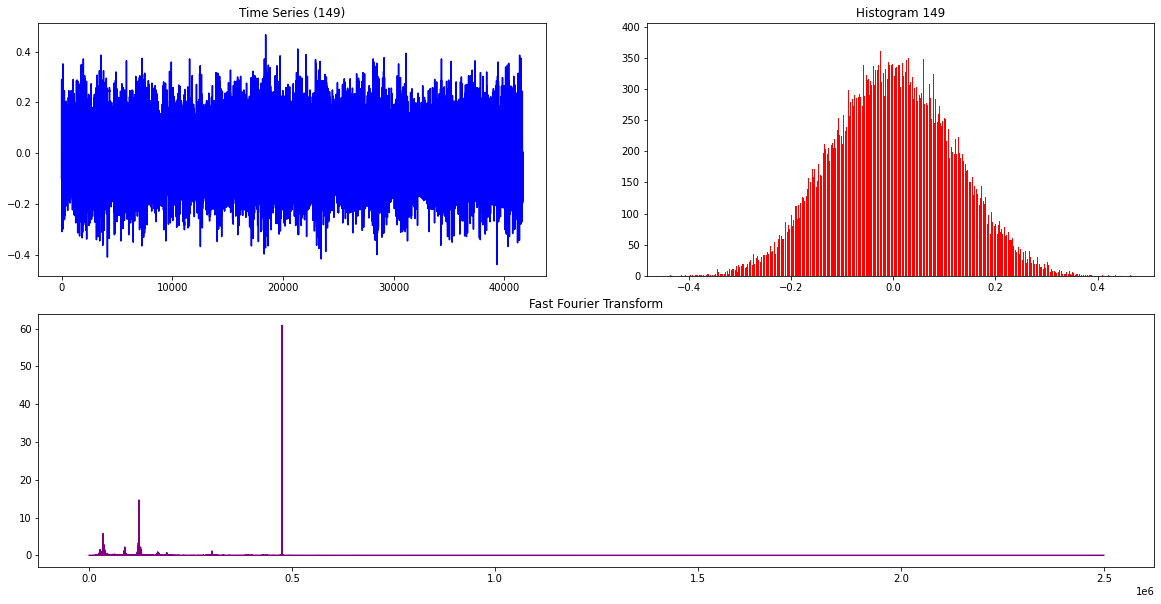

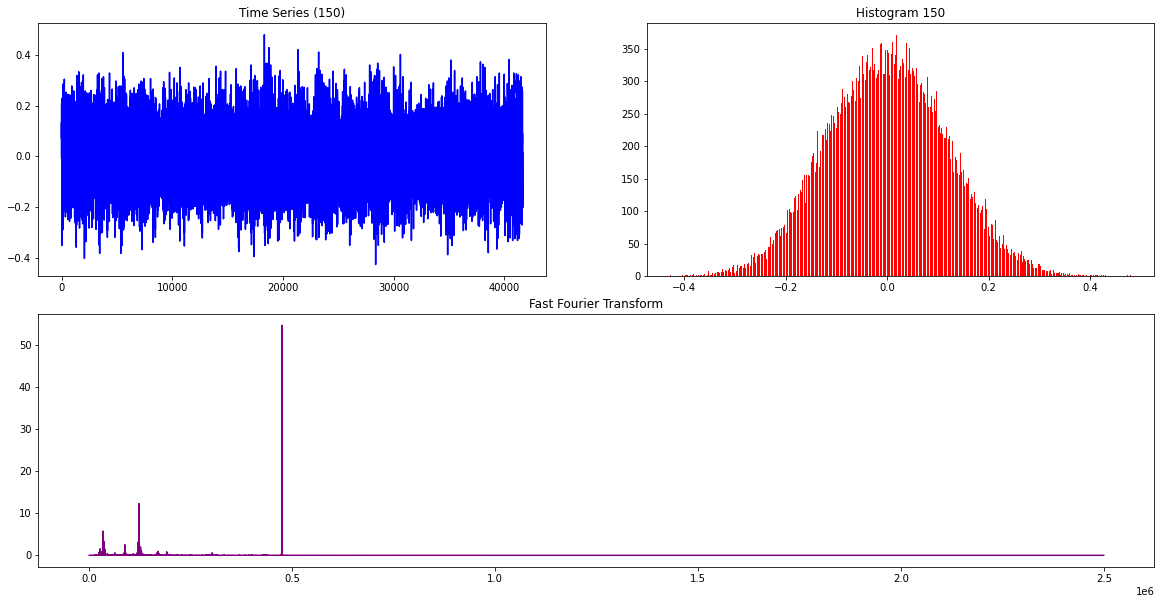

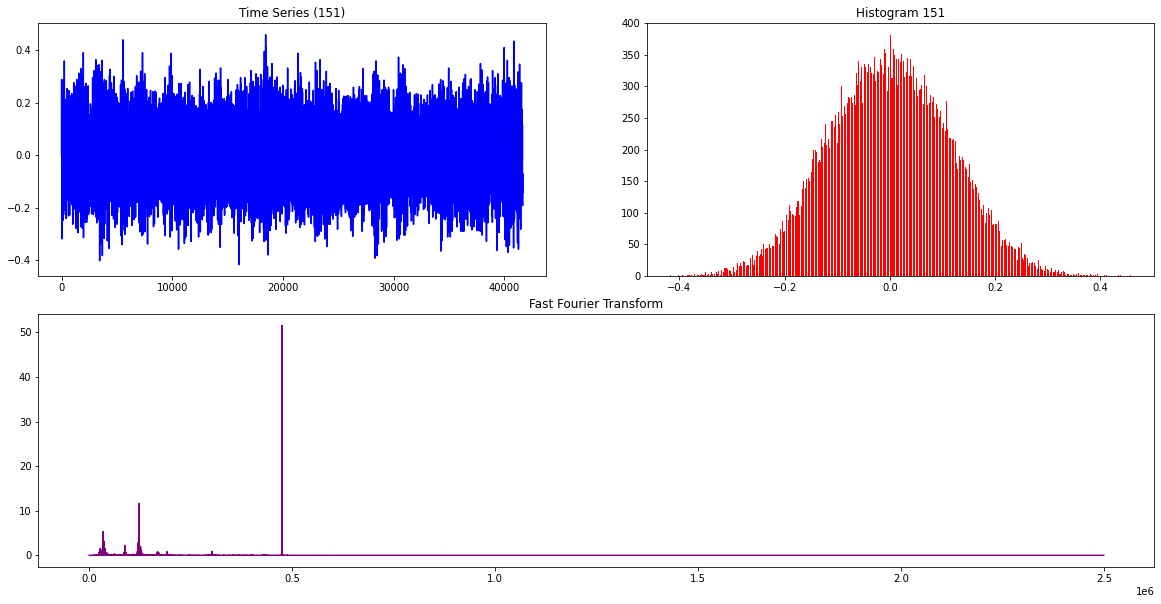

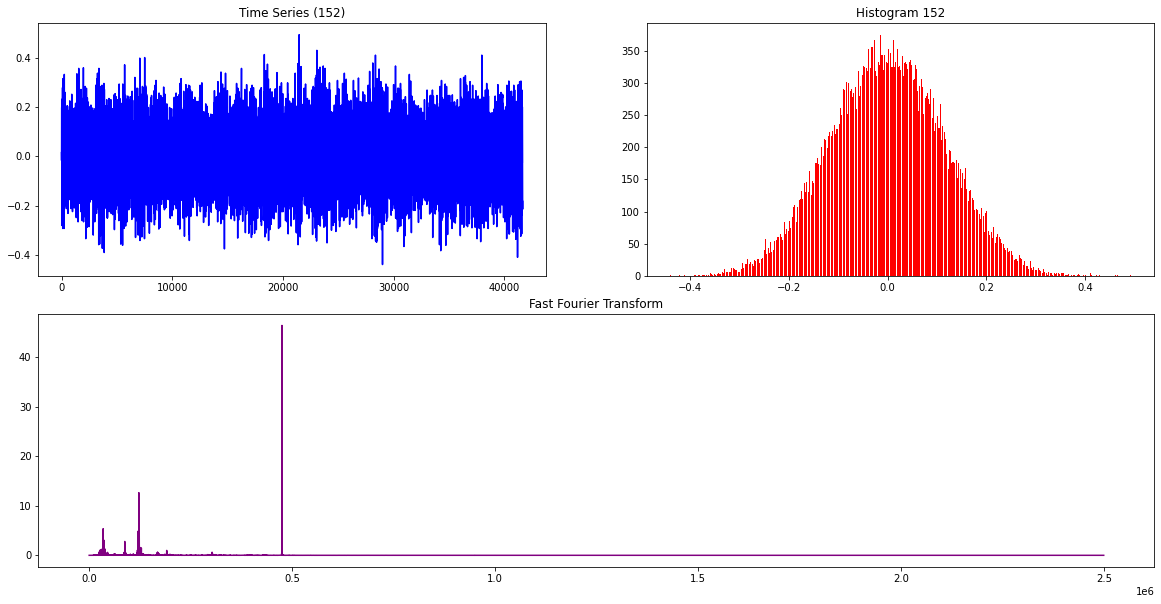

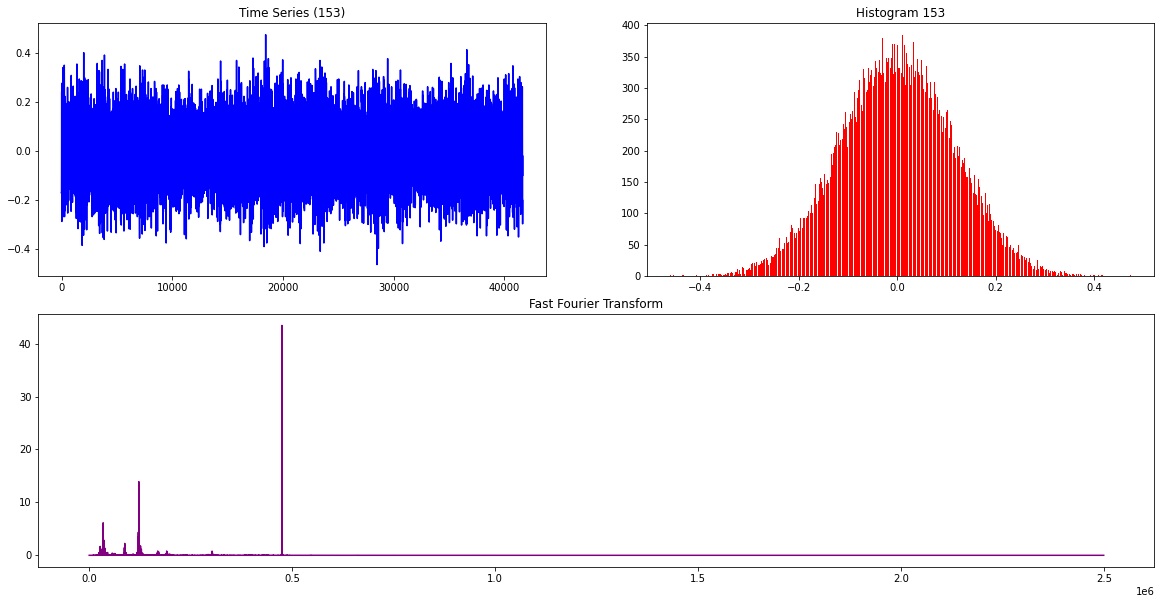

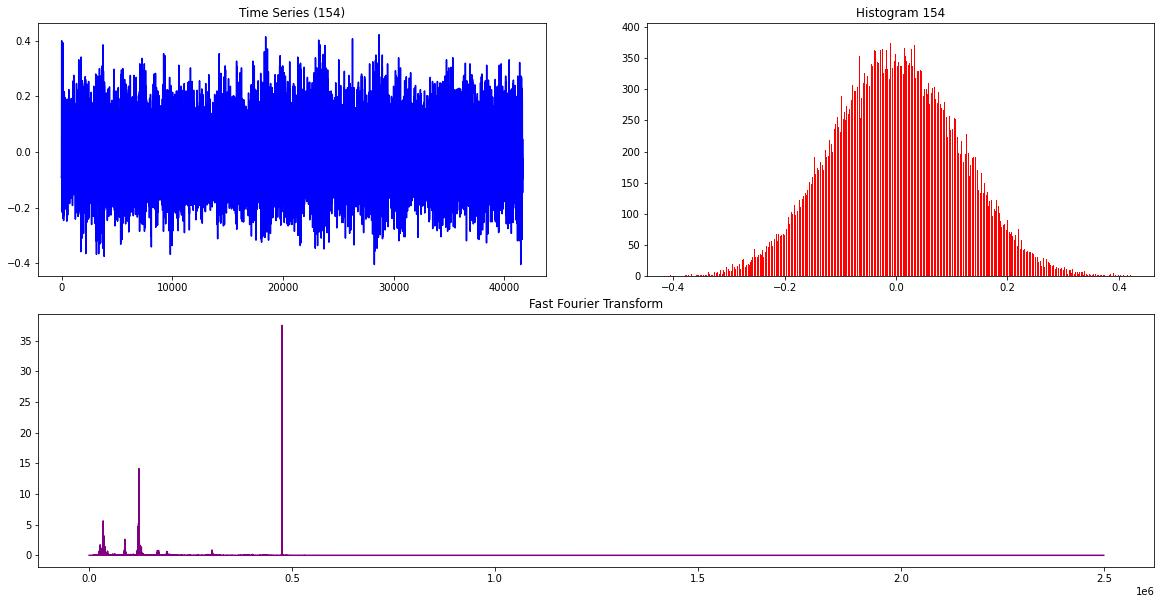

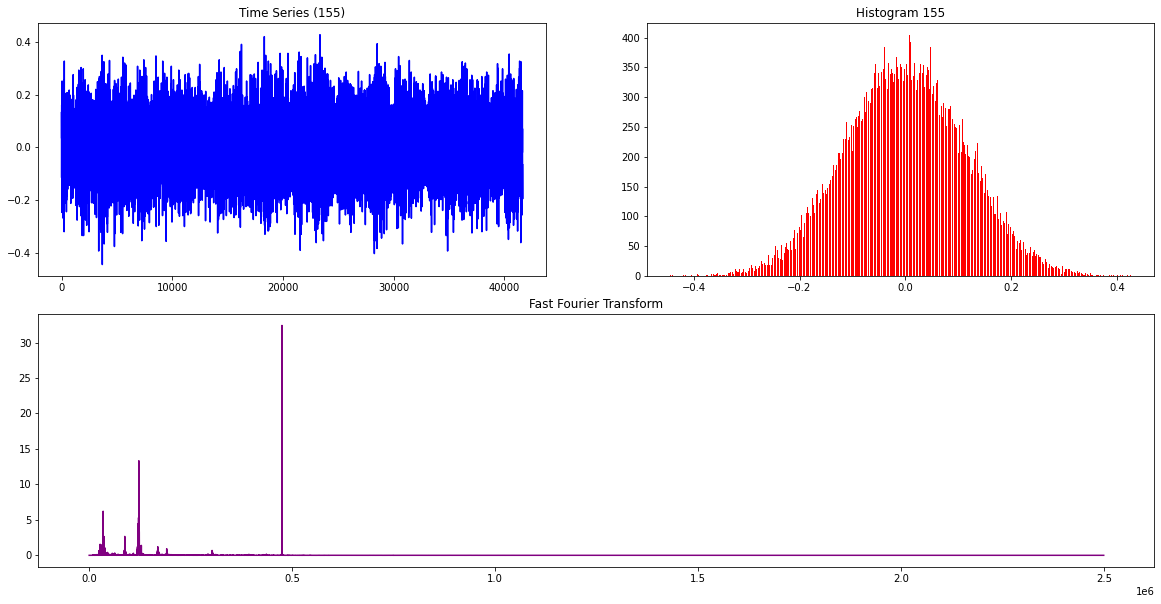

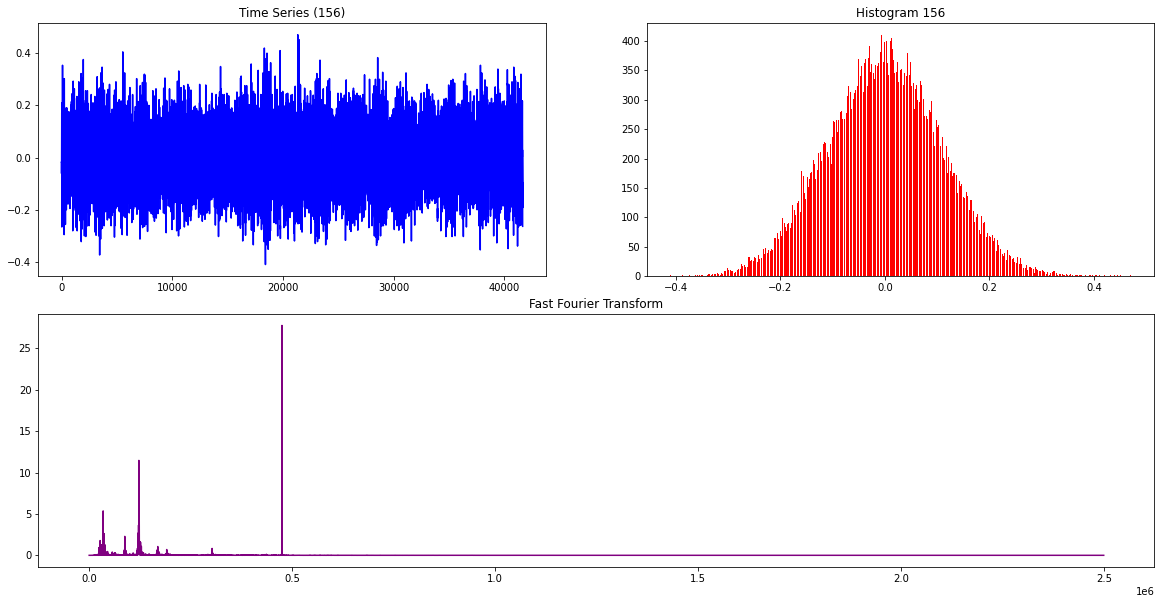

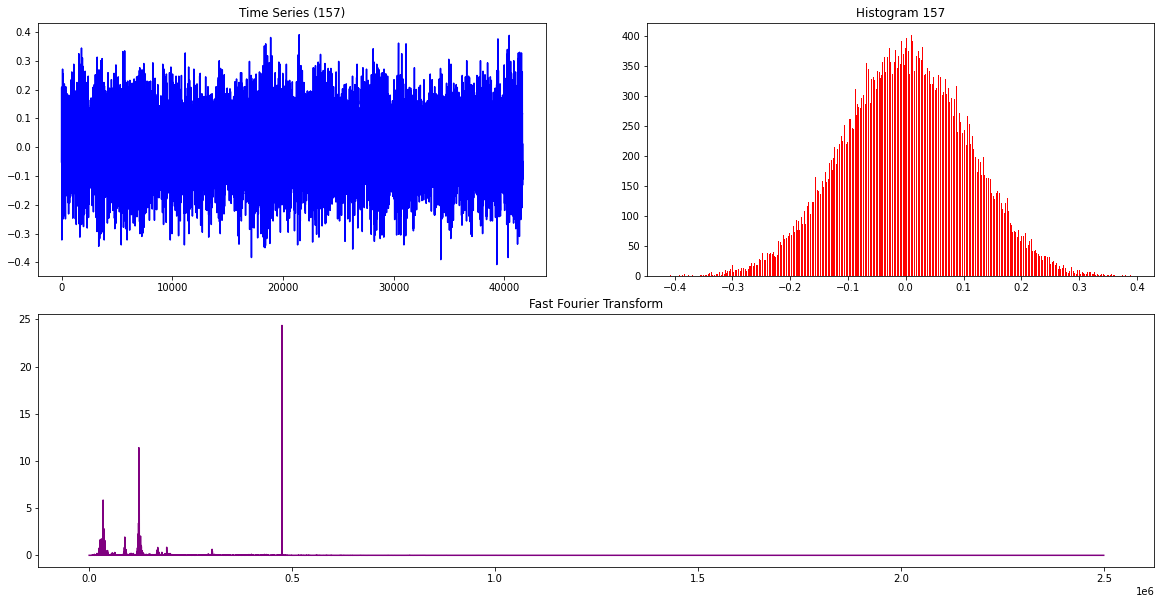

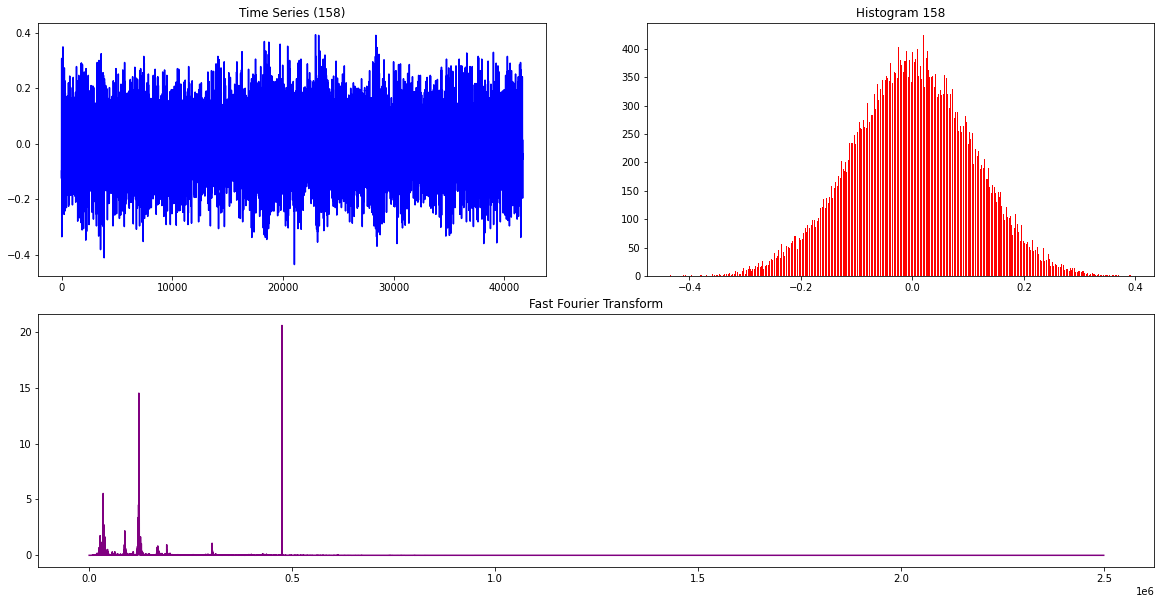

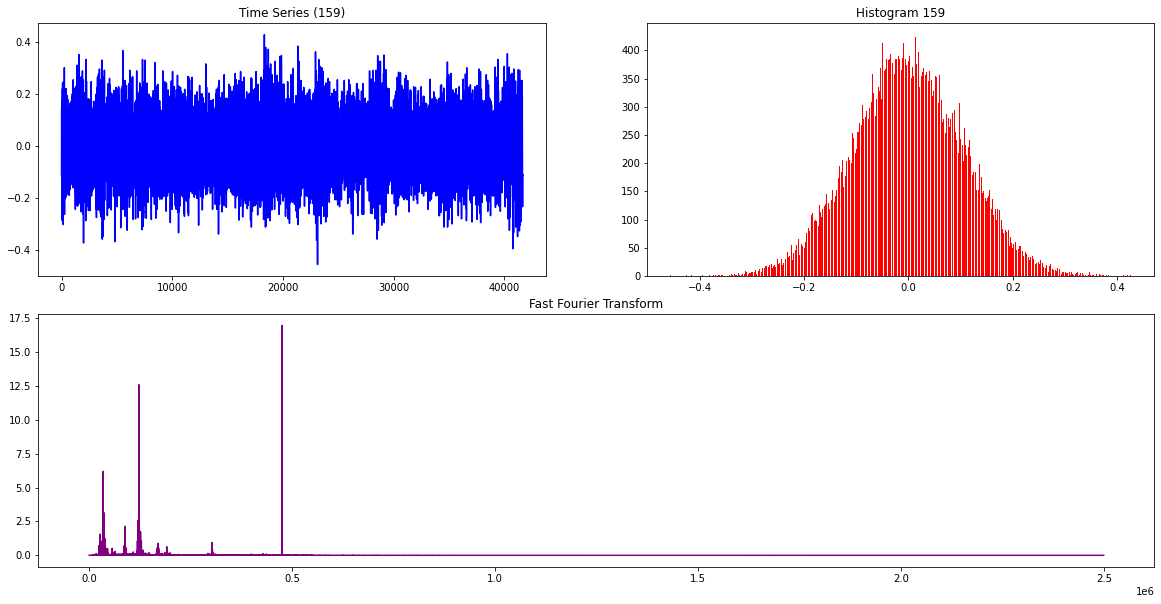

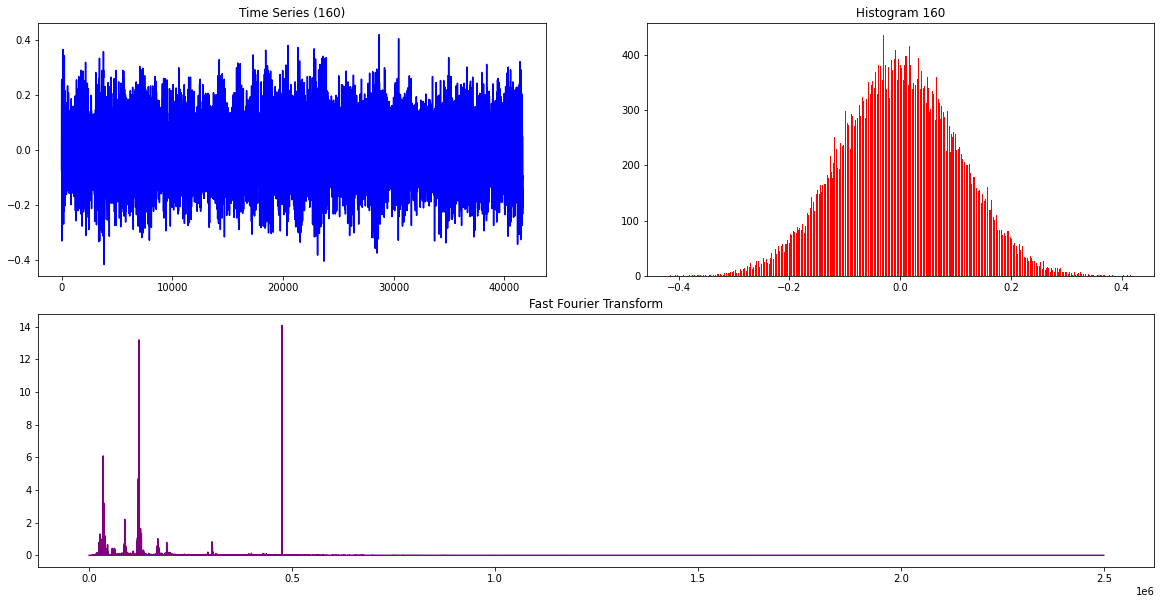

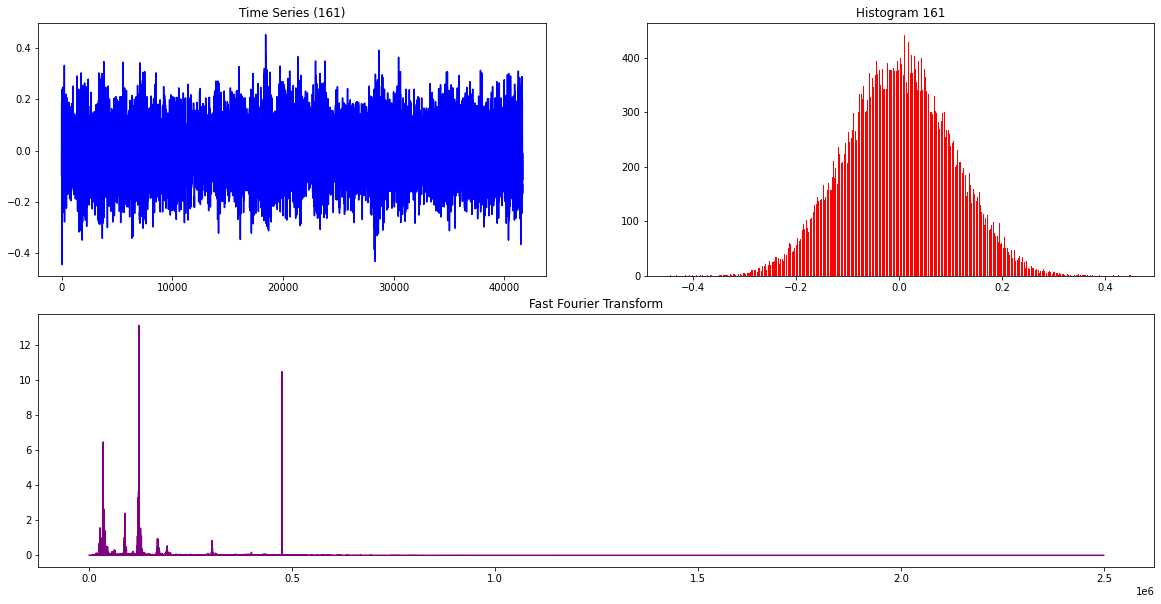

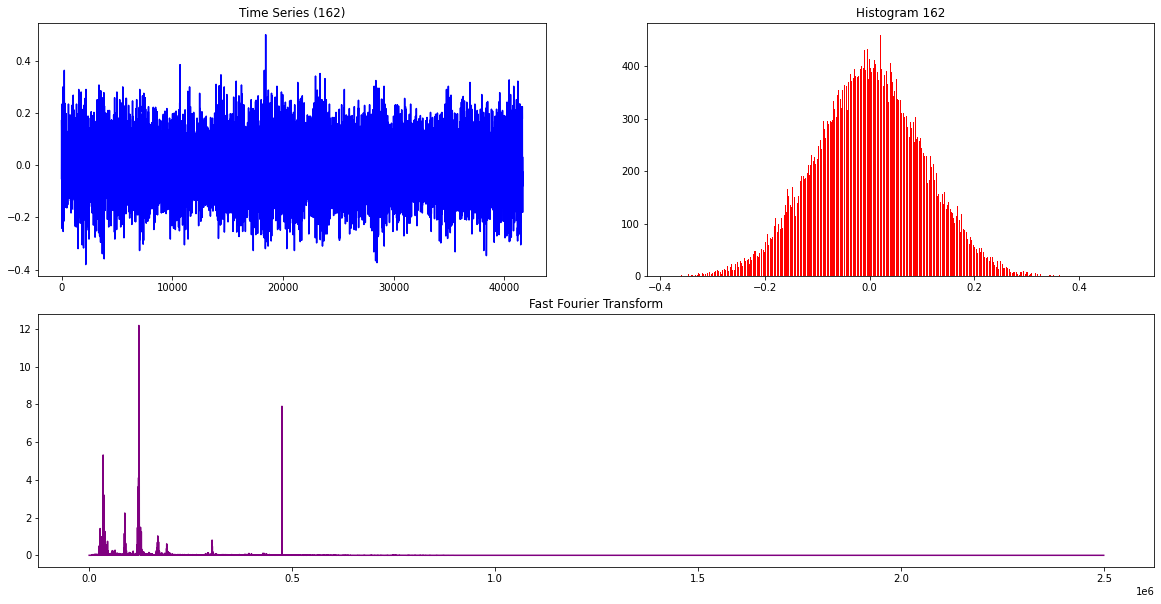

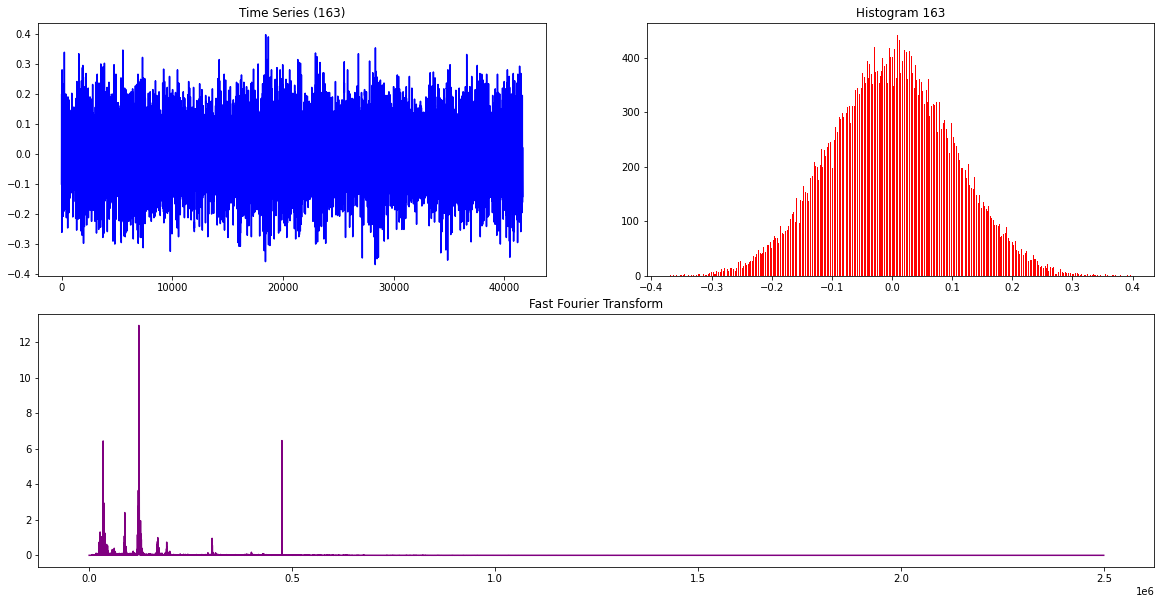

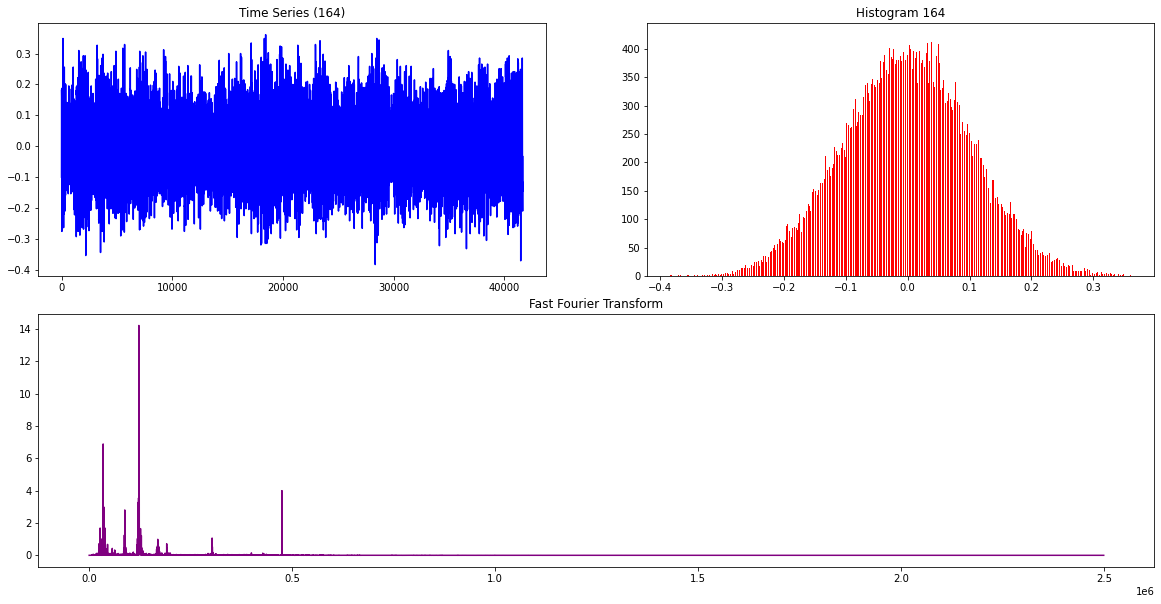

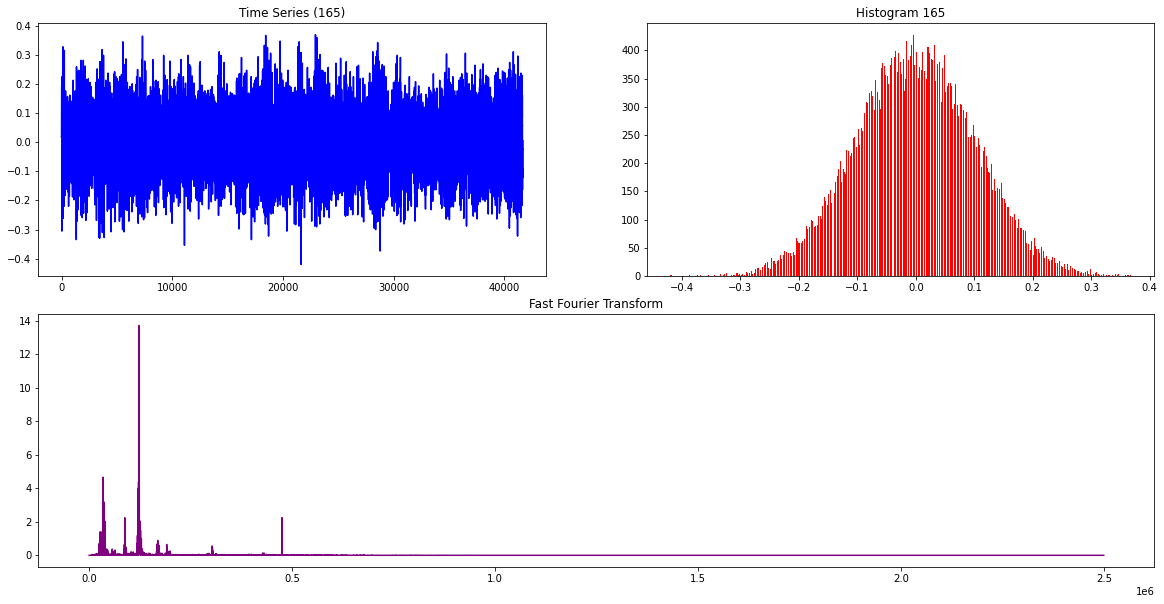

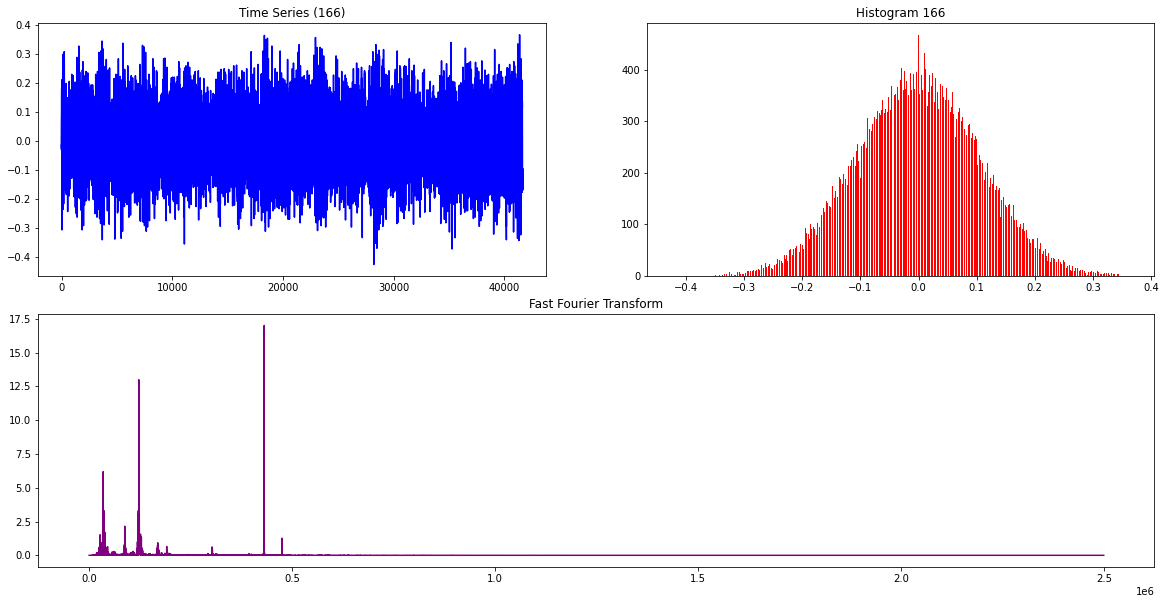

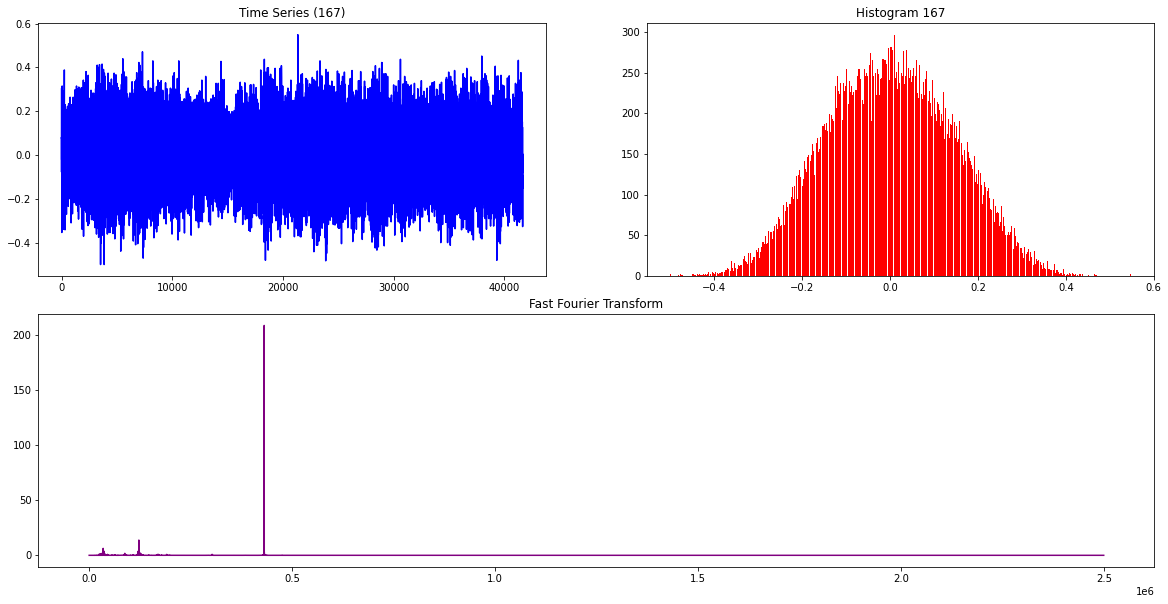

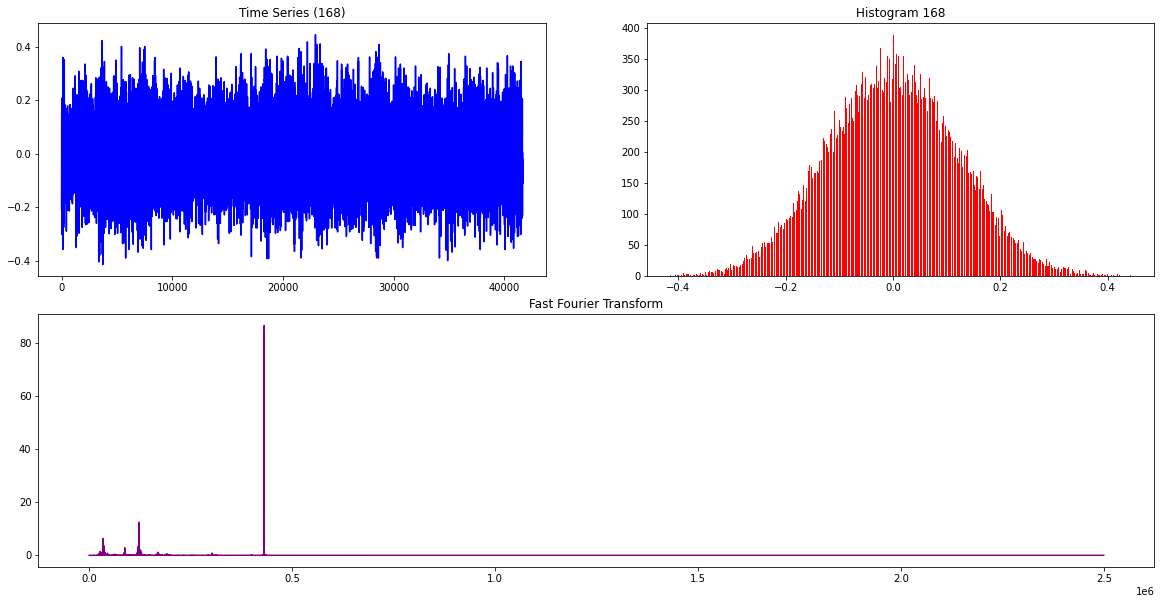

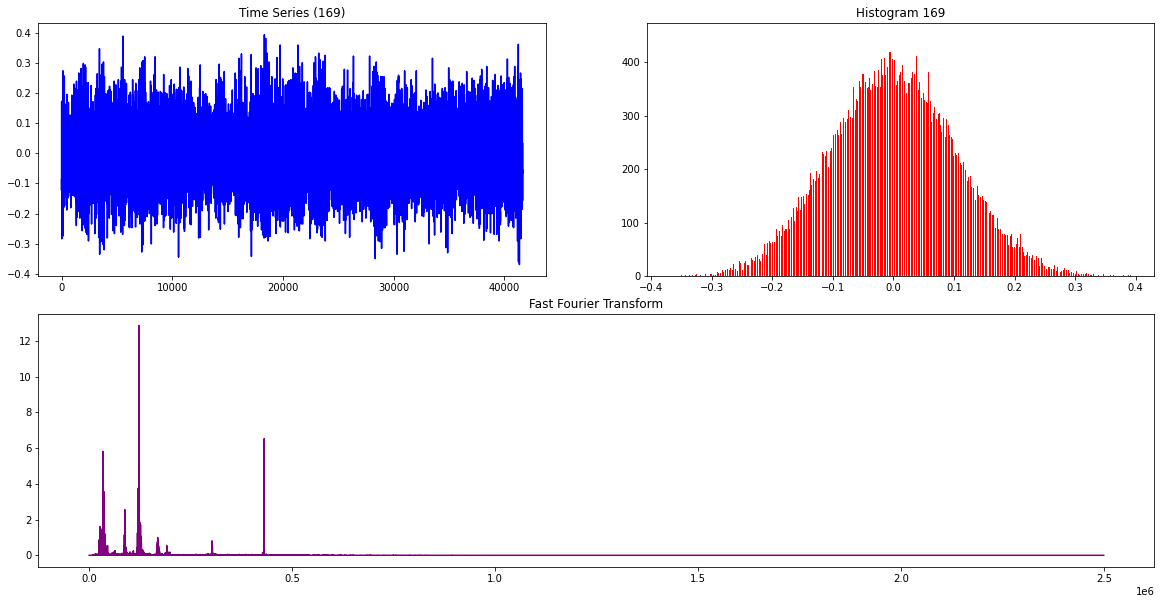

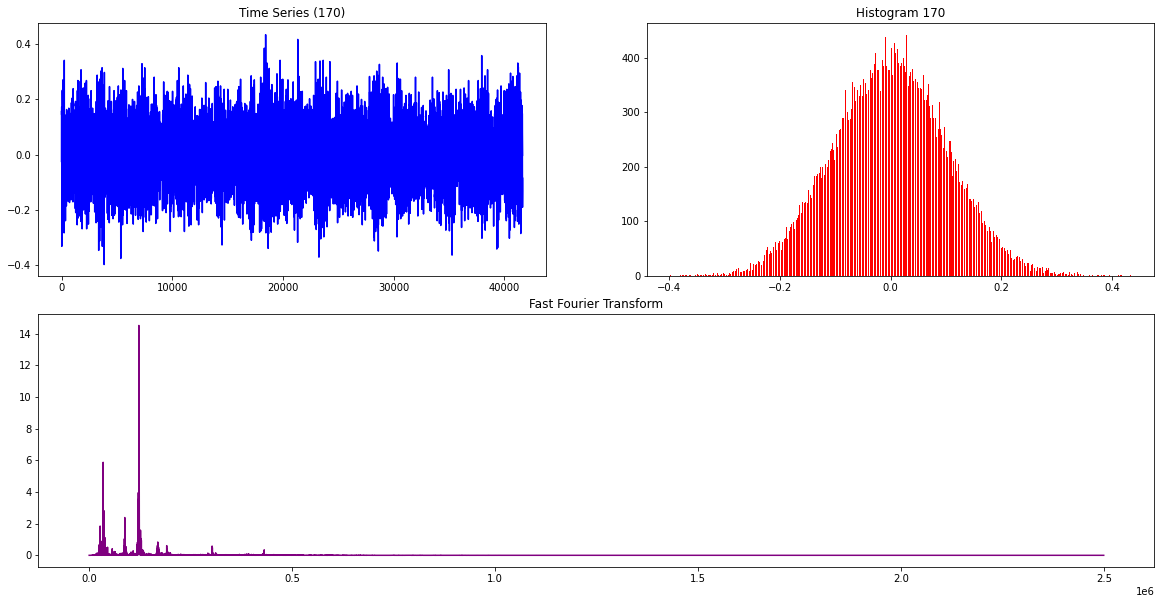

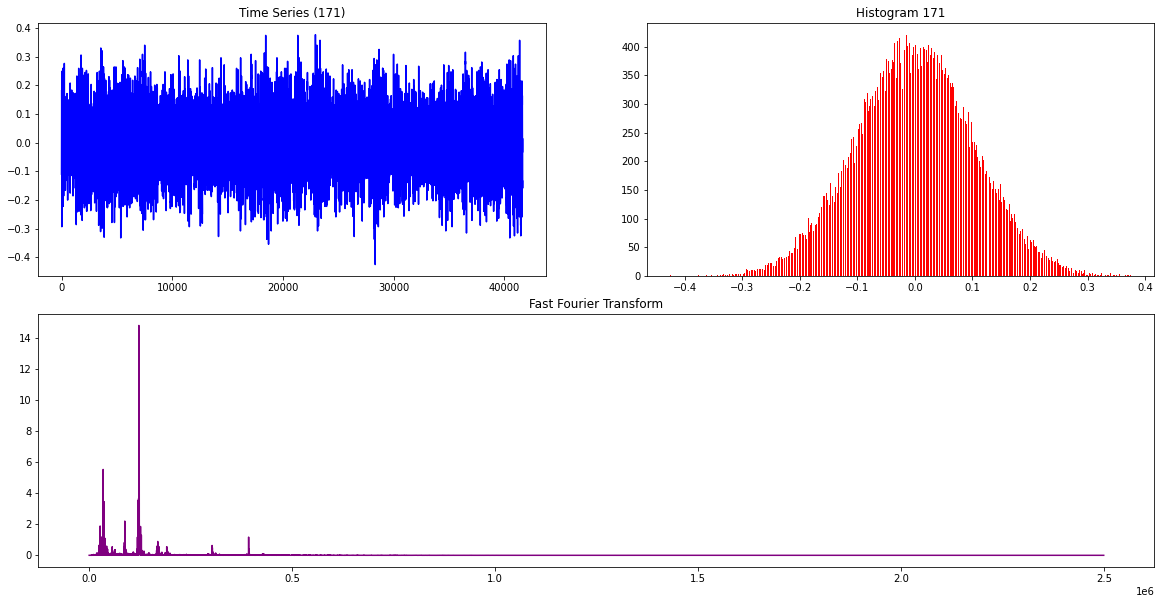

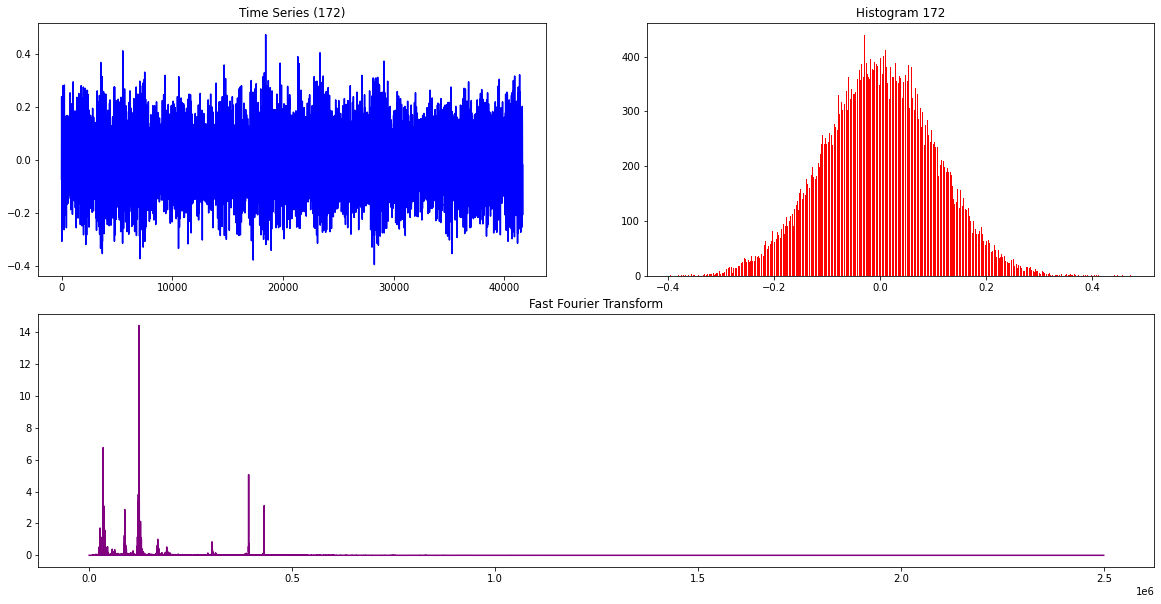

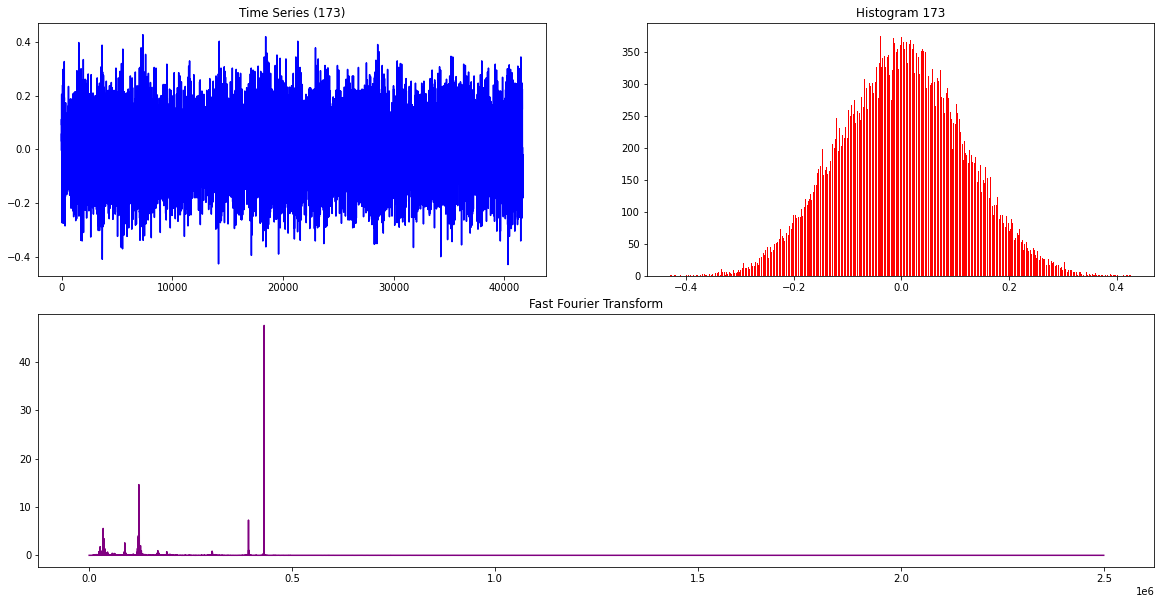

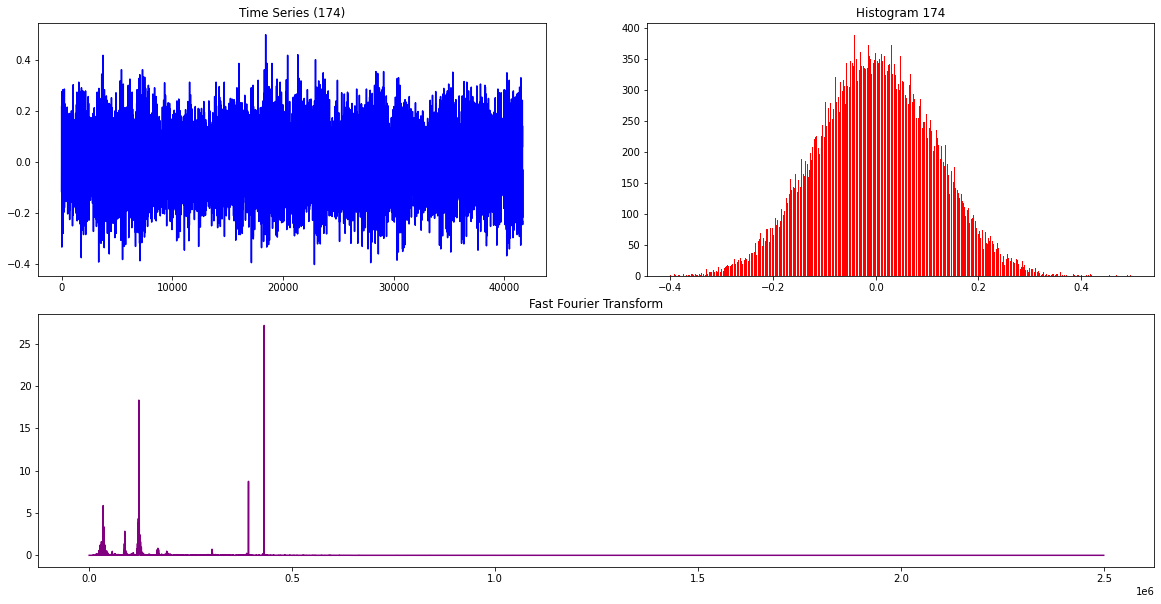

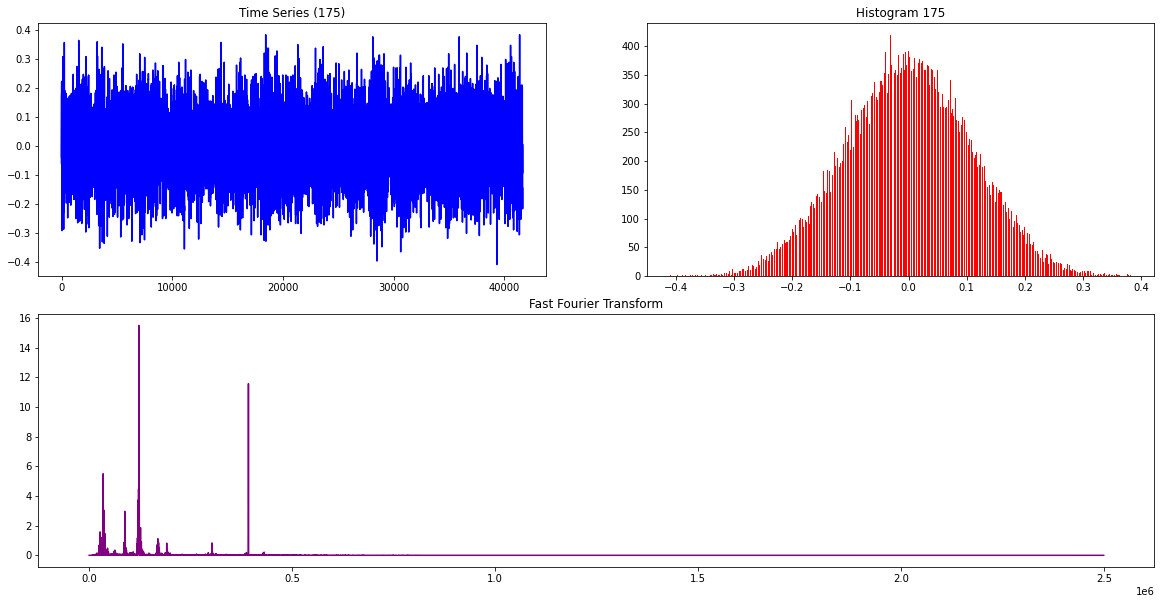

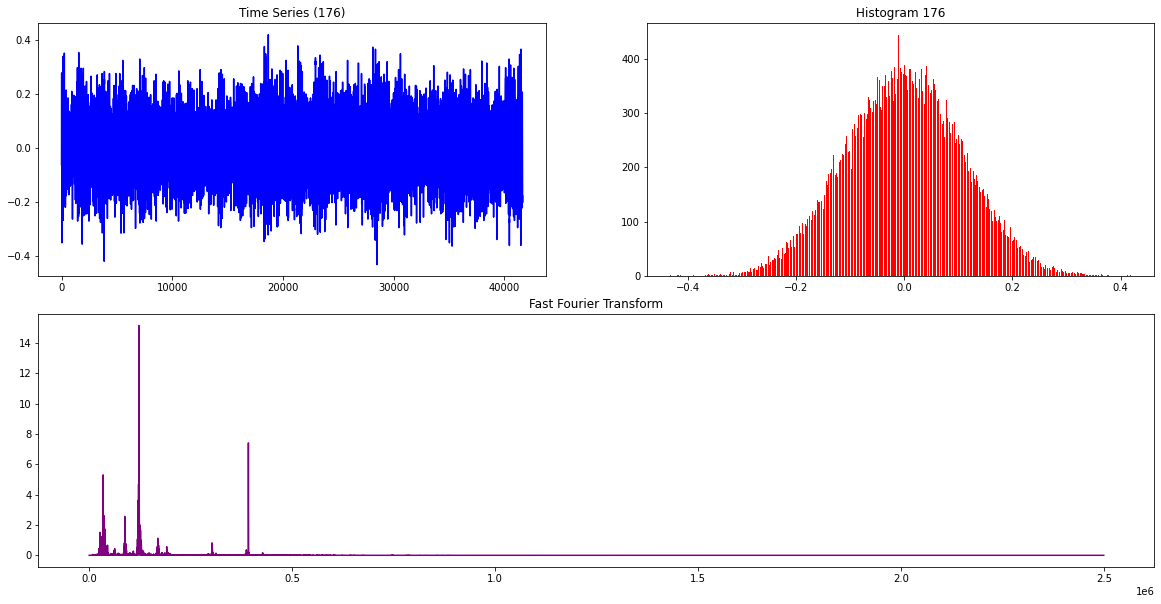

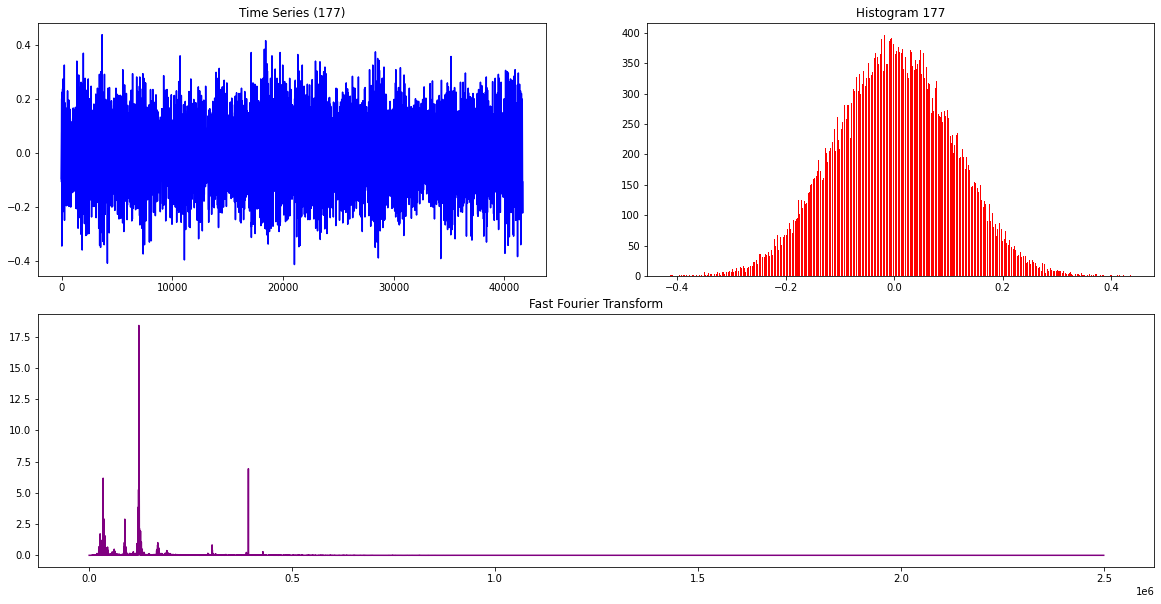

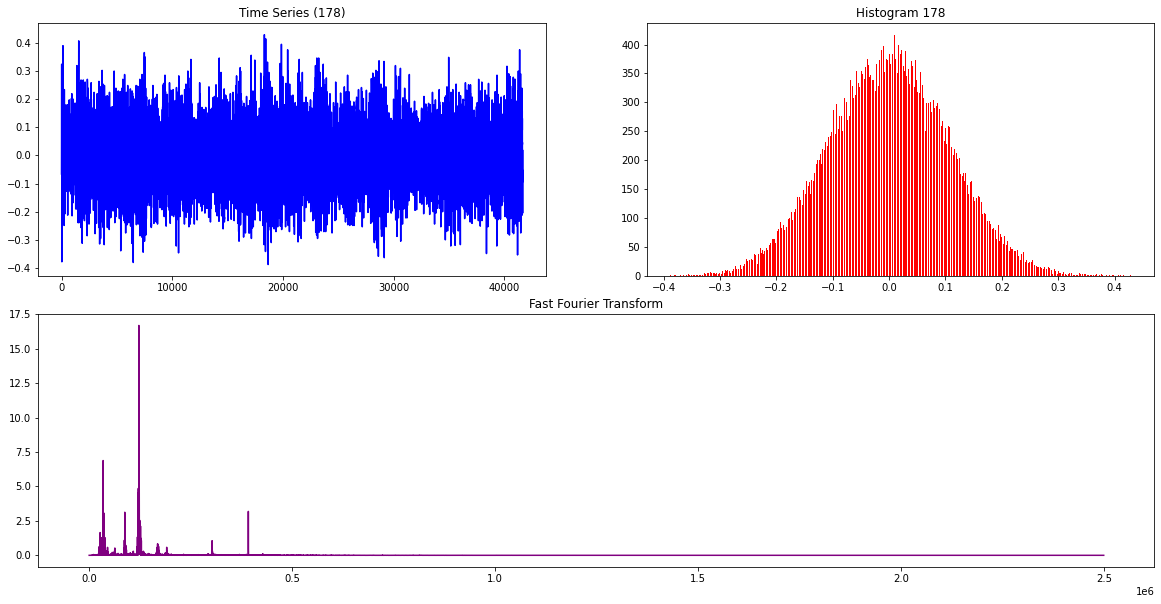

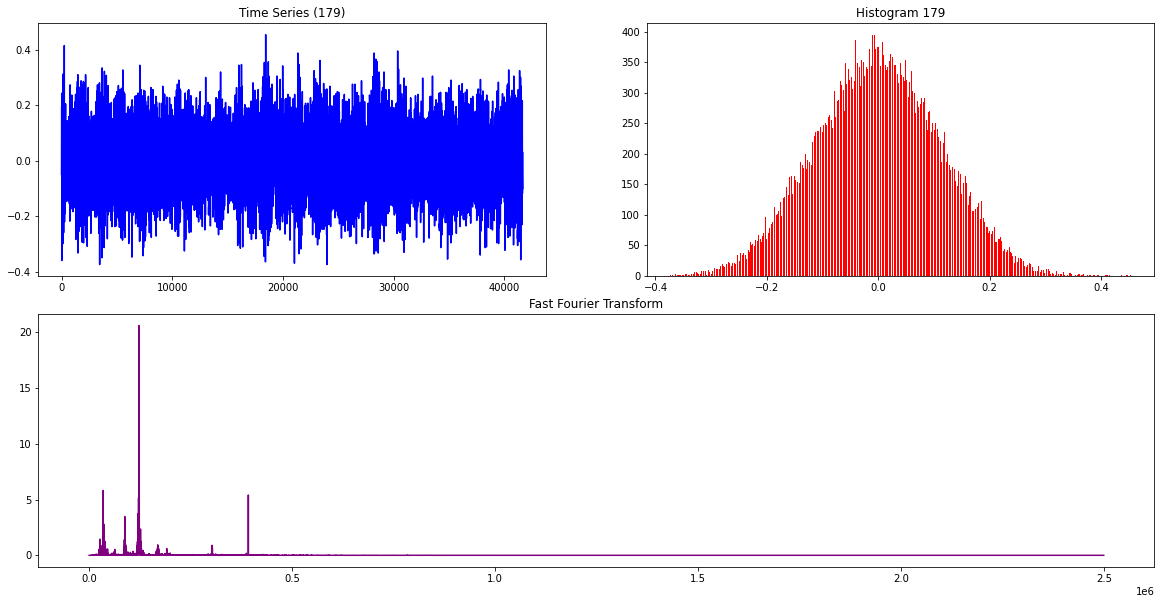

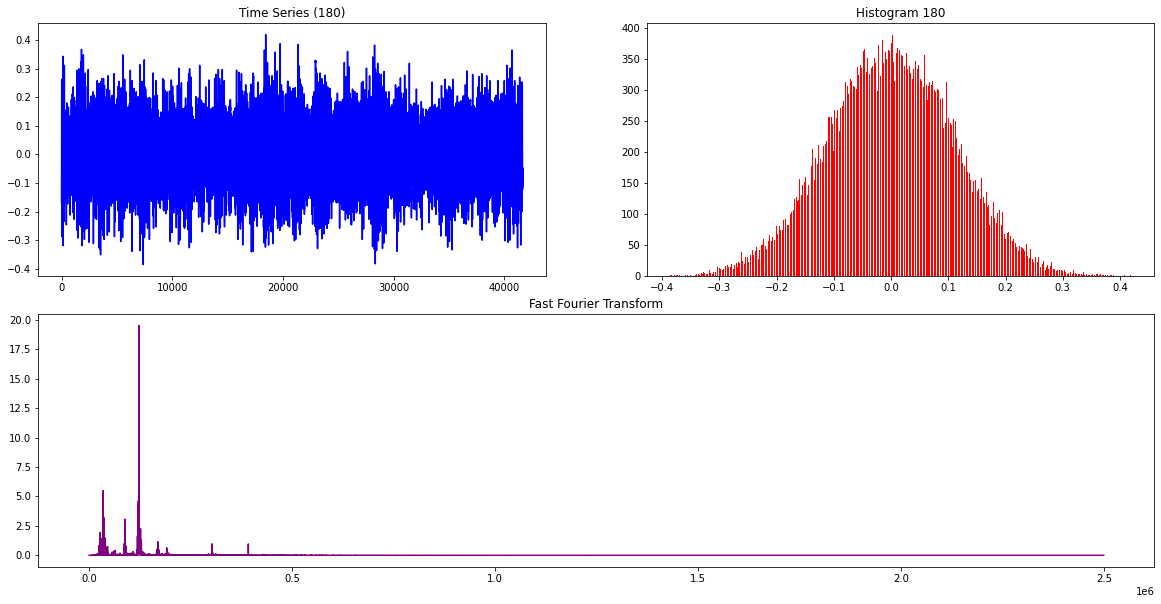

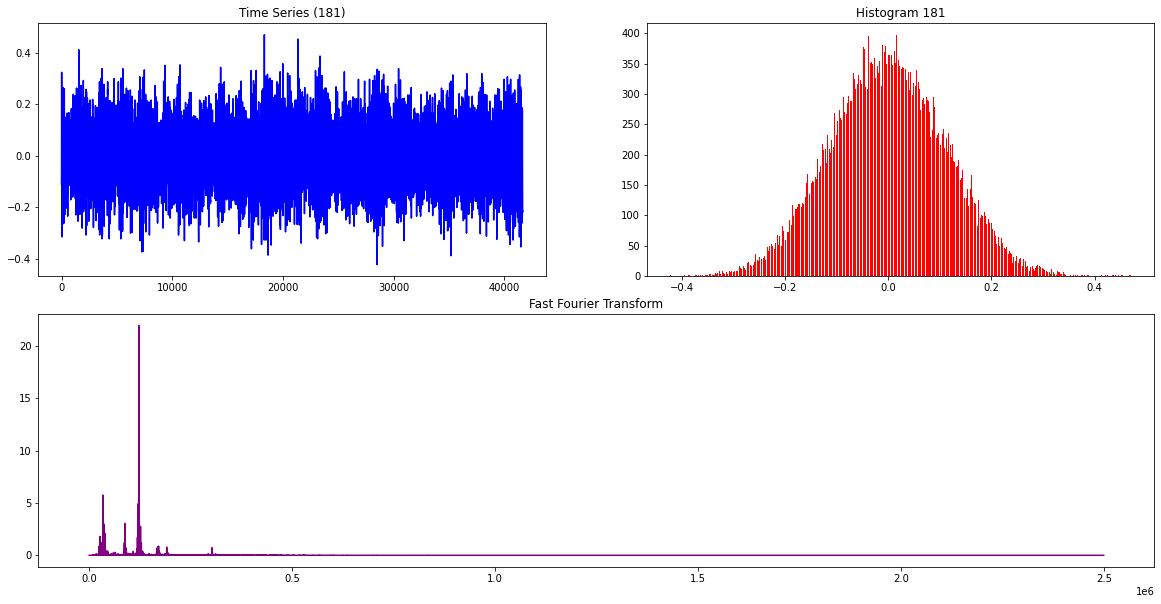

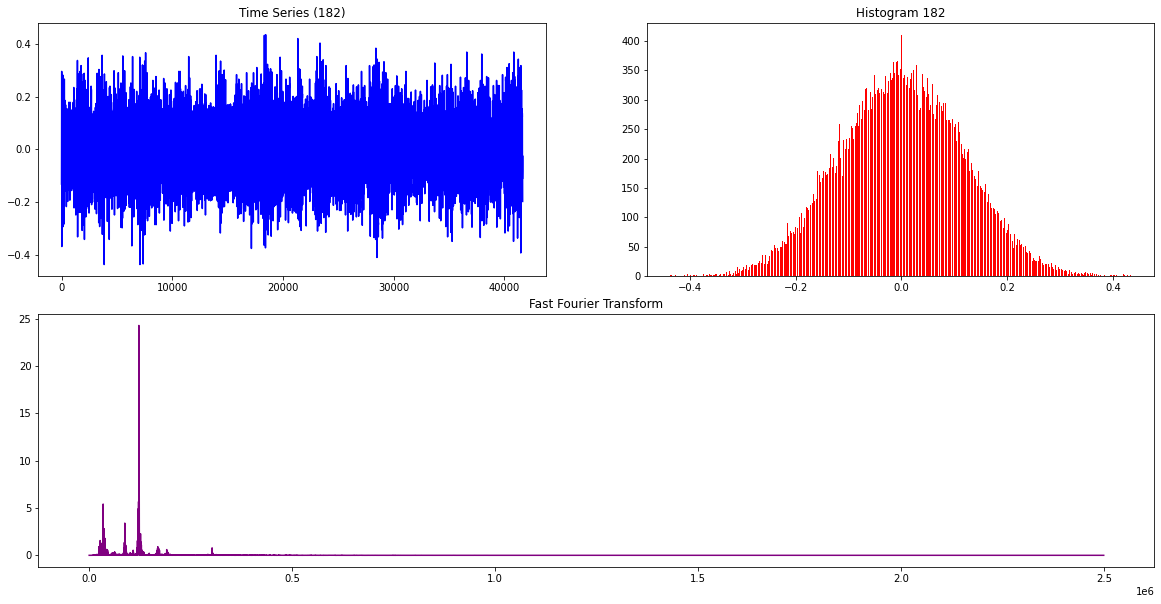

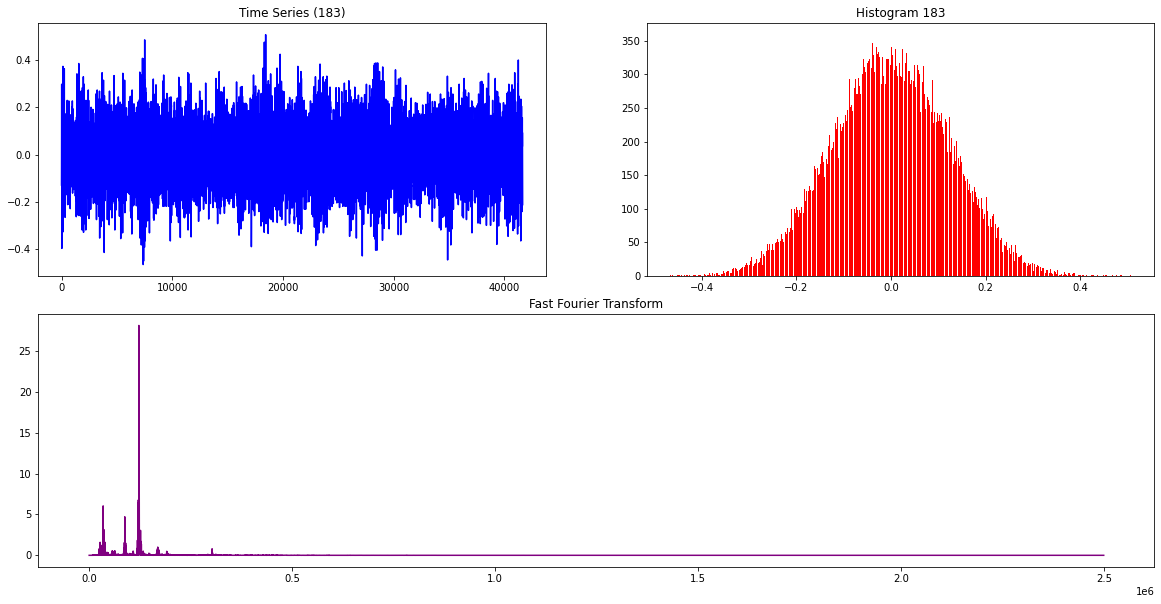

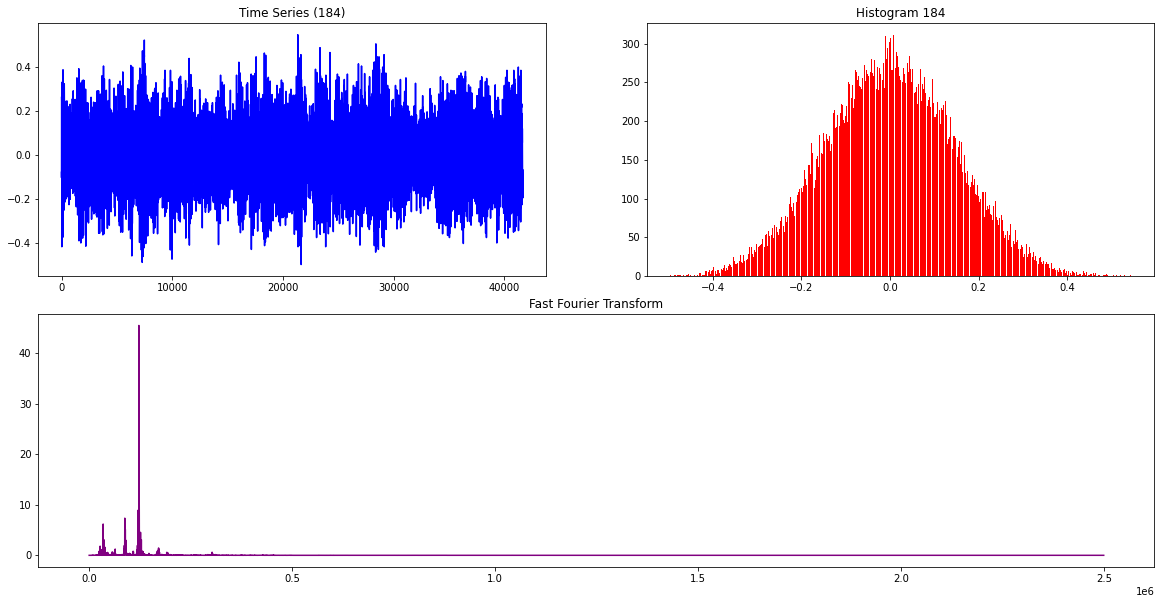

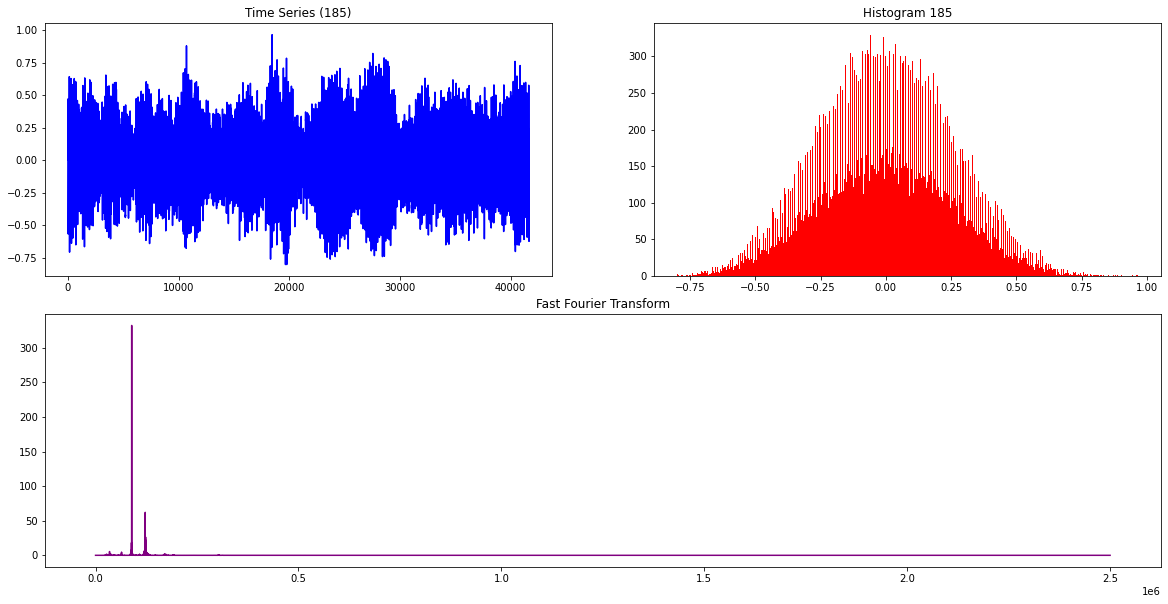

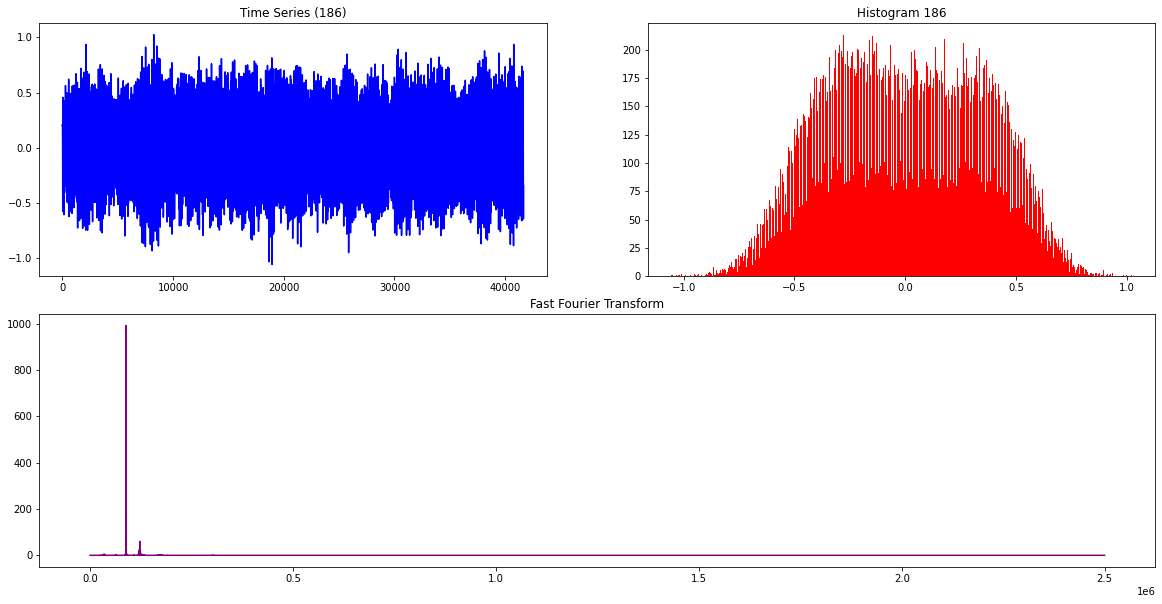

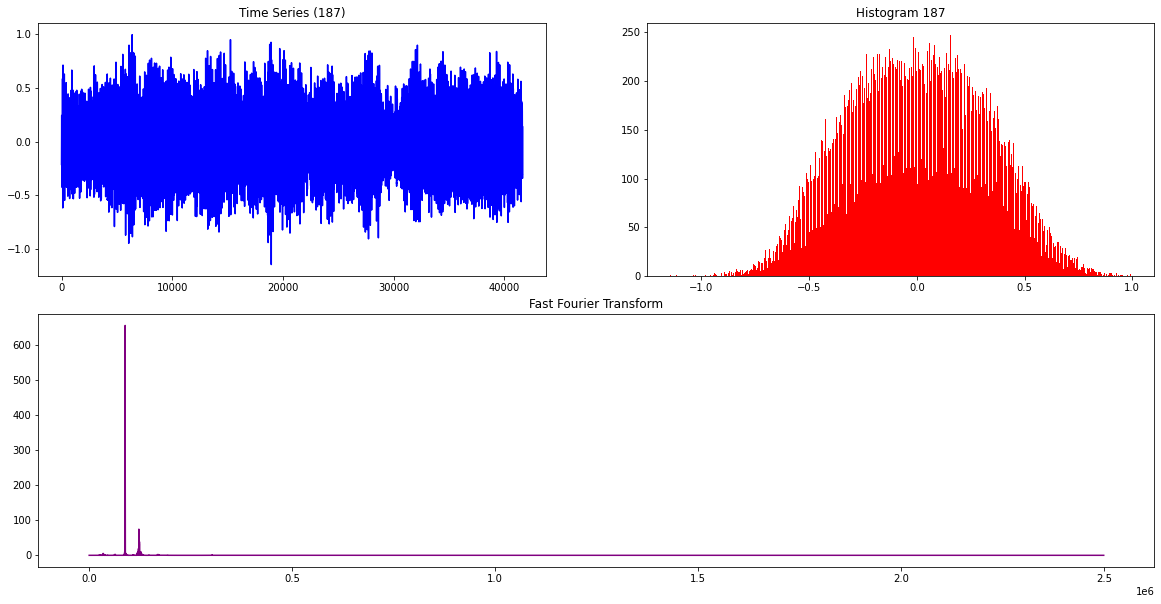

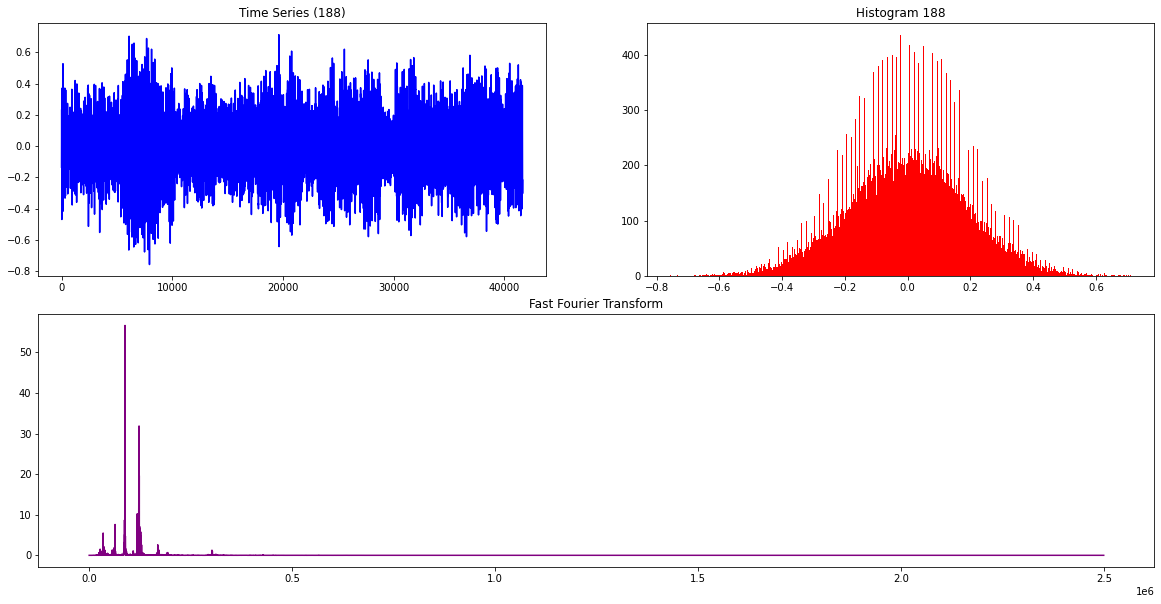

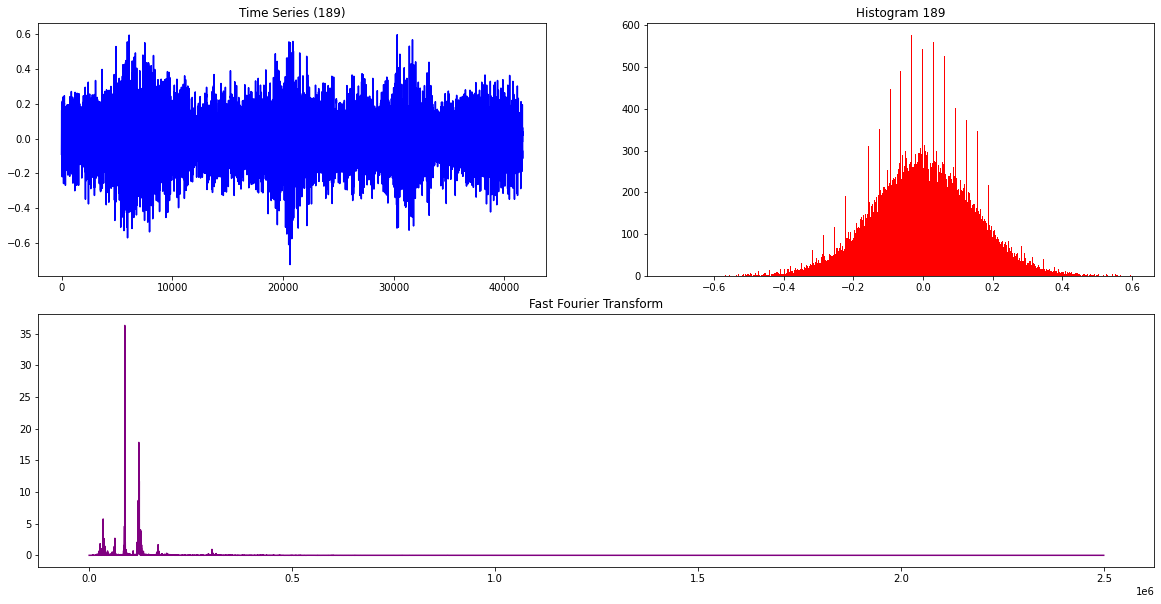

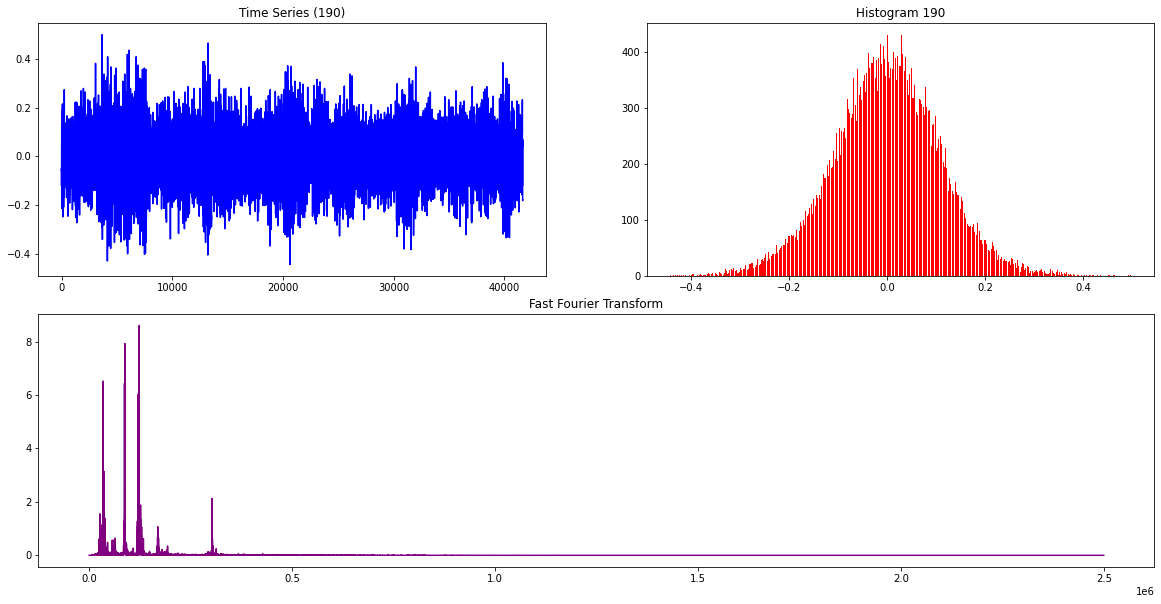

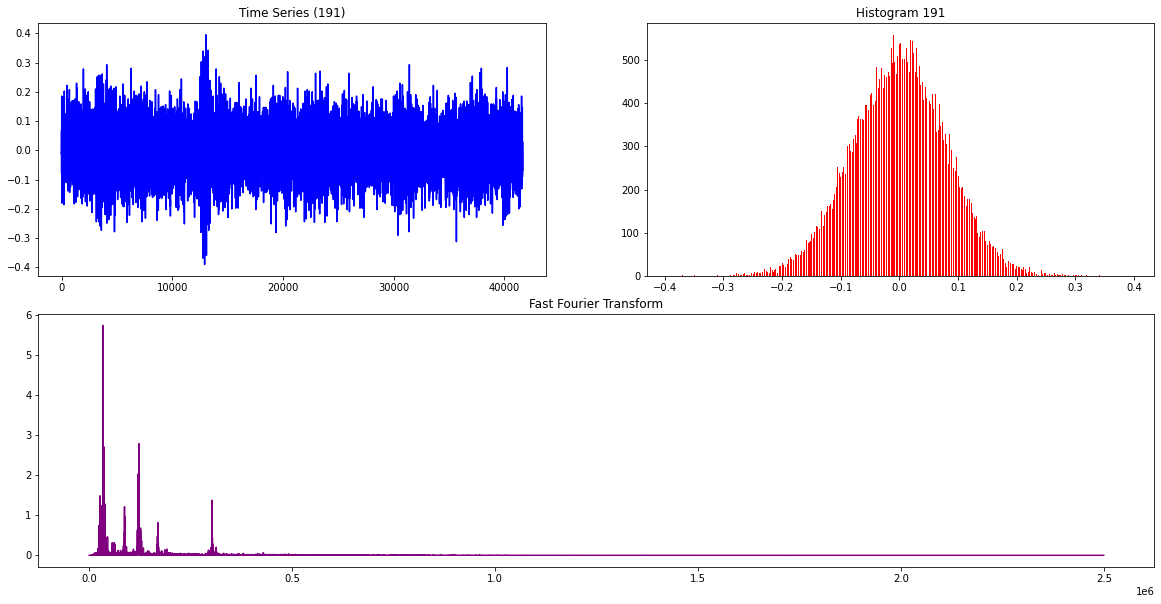

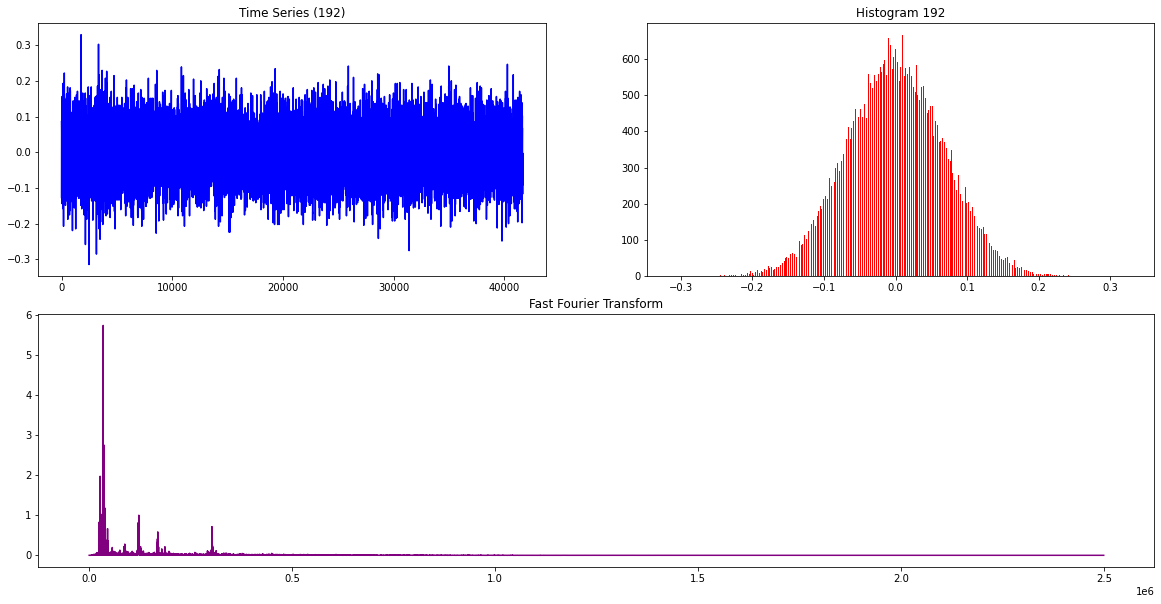

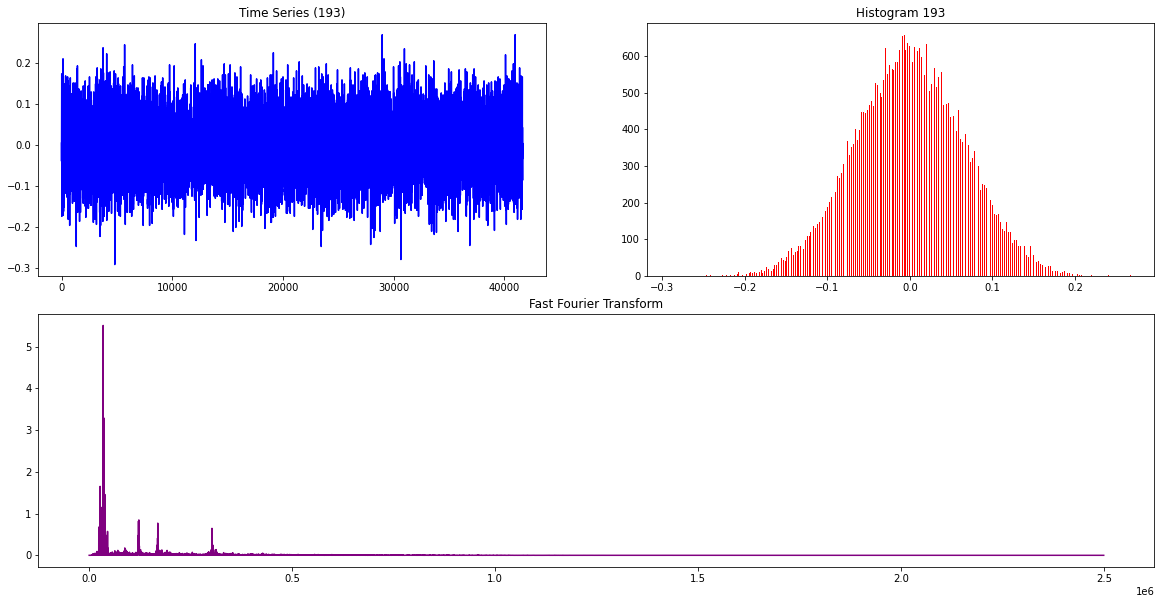

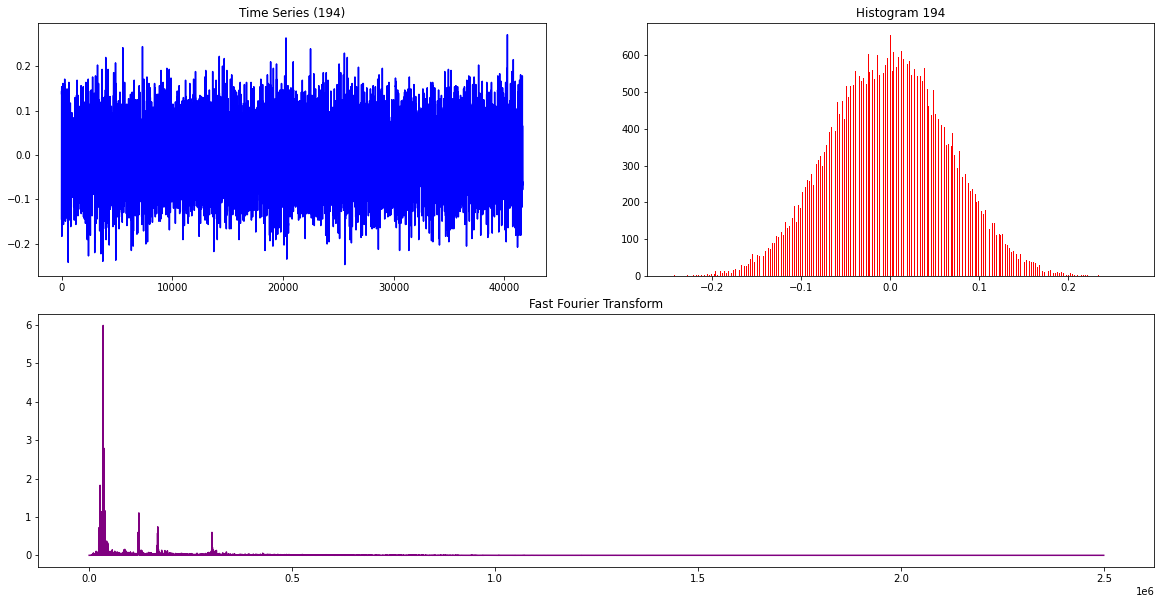

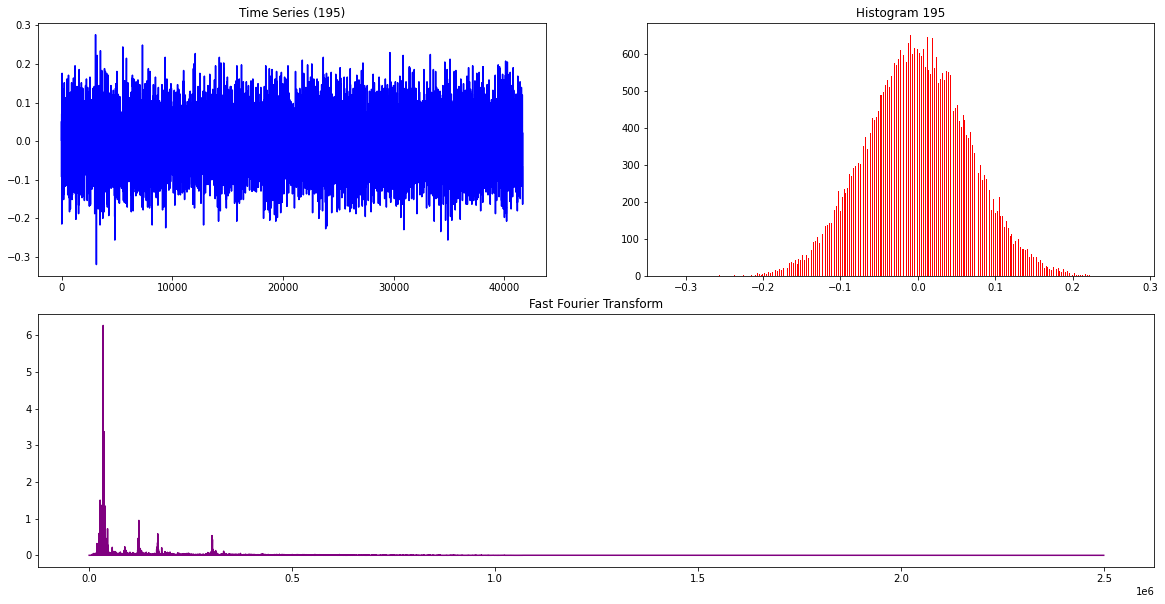

In [8]:
for step in steps:
    step_num = steps.index(step) # Get the current step from index.
    step_df = pd.read_csv(step, skiprows=5) # Skip the first five rows in the csv file.
    step_df = step_df[['AE [V]']] # Restructure the dataframe to get only the 'AE [V]' column.

    step_values = step_df['AE [V]'].to_numpy() # Convert data frame column into a numpy array.
    
    dt = 0.0000002 # Define the steps.
    n = len(step_values) # Get the number of values in the array.
    step_fft = np.fft.fft(step_values, n) # Fast Fourier Transform using the step and number of samples.
    freq = (1. / (dt * n)) * np.arange(n) # Frequencies.
    psd = step_fft * np.conj(step_fft) / n # Power Spectral Density.
    L = np.arange( 1., np.floor(n/2), dtype='int') # Round off to lowest whole number for y-axis representation.

    # Plots
    fig = plt.figure(figsize=(20, 10)) # Set figure size.
    plt.subplots_adjust(wspace= 0.20, hspace= 0.15) # Adjust the spacing of subplots.

    ts_signal_plt = fig.add_subplot(2,2,1) # Place the time-series plot on the first cell of the first row.
    plt.title("Time Series ({})".format(step_num)) # Add subplot title.
    ts_signal_plt.plot(step_values, color="blue") # Plot the signal with the color set to blue.

    ht_plt = fig.add_subplot(2,2,2) # Place the histogram on the second cell of the second row.
    plt.title("Histogram {}".format(step_num)) # Add subplot title.
    ht_plt.hist(step_values, color="red", bins=500) # Plot the signal with the color set to red.

    fft_plt = fig.add_subplot(2,2,(3,4)) # Place the frequency domain plot of FFT on the second row occupying two columns.
    plt.title("Fast Fourier Transform") # Add subplot title.
    fft_plt.plot(freq[L], psd[L], color="purple") # Plot the resulting figure with the color set to violet.
    
    EXPORTS_PATH = './exports' # The 'exports/' path in the current directory.

    EXPORTS_IMAGES_PATH = './{}/images'.format(EXPORTS_PATH) # The 'exports/images/' path in the current directory.
    if not os.path.exists(EXPORTS_IMAGES_PATH):
            os.makedirs(EXPORTS_IMAGES_PATH) # Create the 'exports/images/' directory if it does not exists.
        
    IMG_FILENAME = 'Step-#{}.png'.format(step_num) # File name of the imgae to be exported.
    if not os.path.exists(EXPORTS_IMAGES_PATH):
        os.makedirs(EXPORTS_IMAGES_PATH) # Create the 'images' directory if it does not exists.
    fig.savefig('{}/{}'.format(EXPORTS_IMAGES_PATH, IMG_FILENAME)) # Save and export the plot to an image.

Individual step observation.

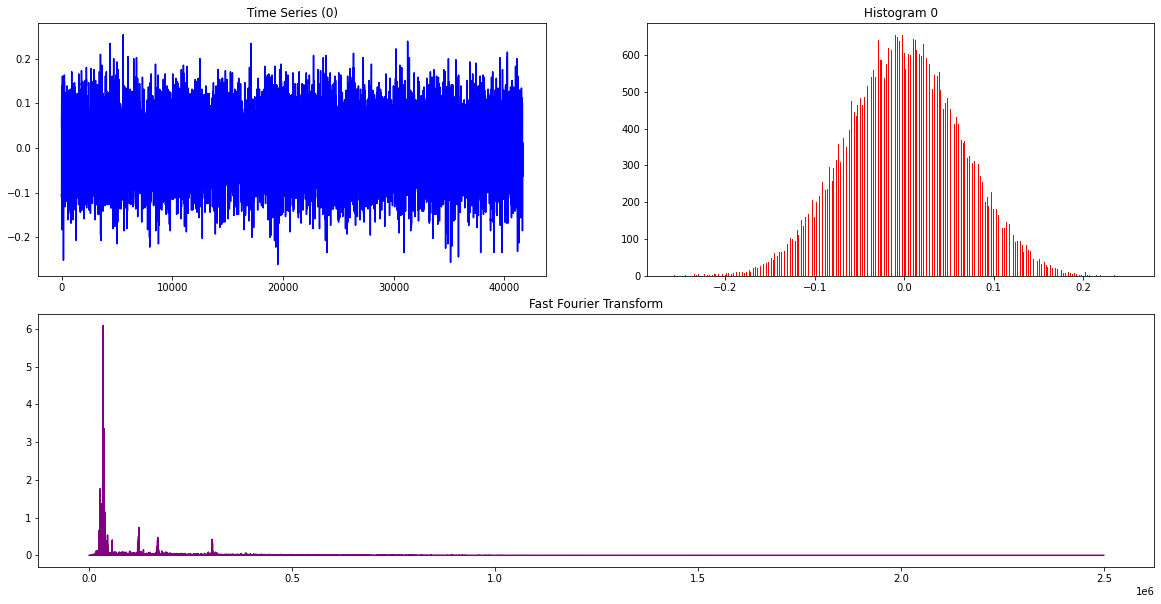

In [9]:
step_num = 0 # Get the current step from index.
step_df = pd.read_csv(steps[step_num], skiprows=5) # Skip the first five rows in the csv file.
step_df = step_df[['AE [V]']] # Restructure the dataframe to get only the 'AE [V]' column.

step_values = step_df['AE [V]'].to_numpy() # Convert data frame column into a numpy array.

dt = 0.0000002 # Define the steps.
n = len(step_values) # Get the number of values in the array.
step_fft = np.fft.fft(step_values, n) # Fast Fourier Transform using the step and number of samples.
freq = (1. / (dt * n)) * np.arange(n) # Frequencies.
psd = step_fft * np.conj(step_fft) / n # Power Spectral Density.
L = np.arange( 1., np.floor(n/2), dtype='int') # Round off to lowest whole number for y-axis representation.

# Plots
fig = plt.figure(figsize=(20, 10)) # Set figure size.
plt.subplots_adjust(wspace= 0.20, hspace= 0.15) # Adjust the spacing of subplots.

ts_signal_plt = fig.add_subplot(2,2,1) # Place the time-series plot on the first cell of the first row.
plt.title("Time Series ({})".format(step_num)) # Add subplot title.
ts_signal_plt.plot(step_values, color="blue") # Plot the signal with the color set to blue.

ht_plt = fig.add_subplot(2,2,2) # Place the histogram on the second cell of the second row.
plt.title("Histogram {}".format(step_num)) # Add subplot title.
ht_plt.hist(step_values, color="red", bins=500) # Plot the signal with the color set to red.

fft_plt = fig.add_subplot(2,2,(3,4)) # Place the frequency domain plot of FFT on the second row occupying two columns.
plt.title("Fast Fourier Transform") # Add subplot title.
fft_plt.plot(freq[L], psd[L], color="purple") # Plot the resulting figure with the color set to violet.